In [4]:
%load_ext autoreload
%autoreload 2

# add src to sys-path
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('./src')
from matplotlib.pyplot import figure
from geopy.distance import geodesic
from sklearn.decomposition import PCA

from data_processing.mtb_data_provider import MtbDataProvider
from data_processing.mtb_data_tagger import MtbDataTagger
from data_processing.mtb_classifier import MtbClassifier
from visualization.mtb_visualizer import MtbVisualizer
from data_processing.helpers import Helpers

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, SpectralClustering, MeanShift, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import geopandas as gpd
from geopandas import GeoDataFrame

from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

SPEED_THRESHOLD = .3
LATITUDE_KEY = 'position_lat'
LONGITUDE_KEY = 'position_long'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
mtb_data_provider = MtbDataProvider()
mtb_data_tagger = MtbDataTagger()
mtb_visualizer = MtbVisualizer()
mtb_classifier = MtbClassifier()

## Data Export

In [80]:
warngau_files=['warngaus2_1', 'warngaus2_2']#'warngaus1_1', 'warngaus1_2', 'warngaus1_3', 
location_based_label_files=['warngaus2_labels', 'warngaus2_labels']
columns = ['SensorAccelerationX_HD', 'SensorAccelerationY_HD', 'SensorAccelerationZ_HD','altitude', 'speed', 'heart_rate', 'SensorHeading', LATITUDE_KEY, LONGITUDE_KEY]
#window_lengths = [50, 100, 150, 200, 300]
#sub_sample_lengths = [25, 50, 75, 100, 150]
window_lengths = [50, 150, 300]
sub_sample_lengths = [25, 75, 150]
nums_clusters = [3, 4, 6, 9, 12]# TODO: ,4,6,8,12,16]
prefix='warngau_s2'

In [ ]:
if False:
    mtb_data_provider.prepare_and_save_samples(
        warngau_files, 
        columns, 
        location_based_label_files=location_based_label_files, 
        prefix='warngau_s2', 
        window_lengths=window_lengths, 
        sub_sample_lengths=sub_sample_lengths, 
        auto_padd_left_right=True,
        norm='l2',
        force_overwrite=True)

## FIDEC

----------------------------------------------------------------
window_length: 50
sub_sample_length: 25
clusters: 3
Ground truth
y (array([1., 2., 3.]), array([238, 428,  70]))


<Figure size 1200x400 with 0 Axes>

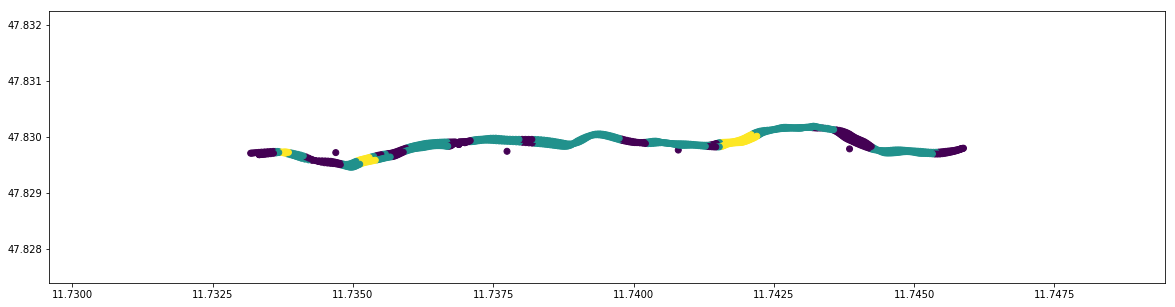


---- Dec ----
...Pretraining...
Pretraining time: 45s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 156)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               78500     
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 3)                 30        
Total params: 1,351,040
Trainable

<Figure size 1200x400 with 0 Axes>

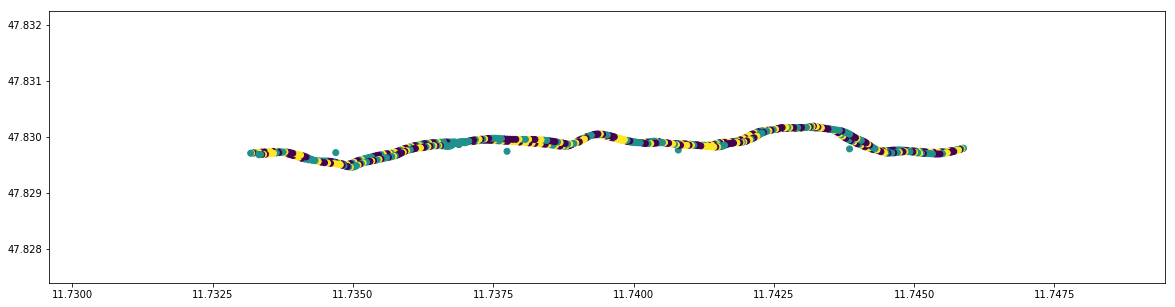

[['score_name', 'score_result'], ['adjusted_rand_score', 0.01076881157406316], ['adjusted_mutual_info_score', 0.010822788649763635], ['homogeneity_score', 0.014923265694047004], ['completeness_score', 0.012388753020679951], ['v_measure_score', 0.013538409948865812], ['fowlkes_mallows_score', 0.3974985196369565], ['silhouette_score', 0.003810611995395067], ['davies_bouldin_score', 6.936567370769961], ['calinski_harabasz_score', 10.254776127718896]]

---- Fidec ----
...Pretraining...
Pretraining time: 45s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 156)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 50

<Figure size 1200x400 with 0 Axes>

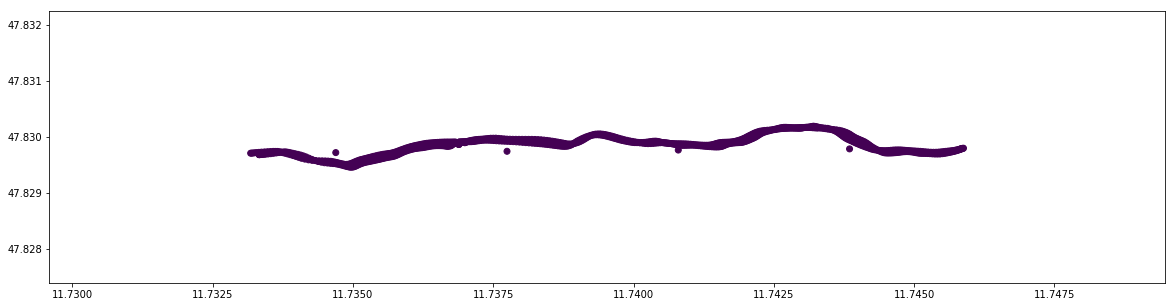

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0], ['adjusted_mutual_info_score', 3.670679701080814e-15], ['homogeneity_score', 1.0131075974986722e-15], ['completeness_score', 1.0], ['v_measure_score', 2.026215194997342e-15], ['fowlkes_mallows_score', 0.6715915400653664], ['silhouette_score', 0], ['davies_bouldin_score', 0], ['calinski_harabasz_score', 0]]

---- Dcec ----
input_shape (52, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
_________________________________________________________________
flatten_40 (Flatten)         (None, 768)               0         

<Figure size 1200x400 with 0 Axes>

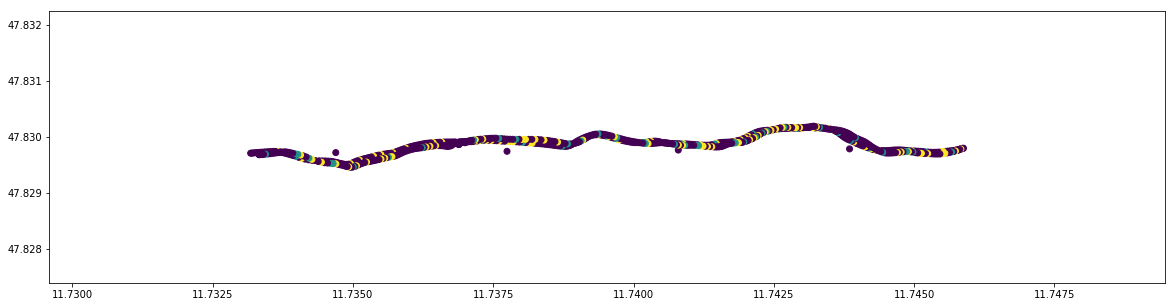

[['score_name', 'score_result'], ['adjusted_rand_score', -0.02396100018285054], ['adjusted_mutual_info_score', 0.0022324532367115875], ['homogeneity_score', 0.005009360096742181], ['completeness_score', 0.006679602639160445], ['v_measure_score', 0.005725150413890897], ['fowlkes_mallows_score', 0.5204177718269899], ['silhouette_score', 0.041306100642211366], ['davies_bouldin_score', 6.7979904325858485], ['calinski_harabasz_score', 6.3059957581957]]

---- Fidcec ----
input_shape (52, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
________________________________________________

saving model to: results/dcec_model_1495.h5
saving model to: results/dcec_model_1610.h5
delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.
saving model to: results/dcec_model_final.h5
Pretrain time:   0.0
Clustering time: 57.052294969558716
Total time:      57.052294969558716
Fidcec
y (array([0, 1, 2]), array([534,   4, 198]))


<Figure size 1200x400 with 0 Axes>

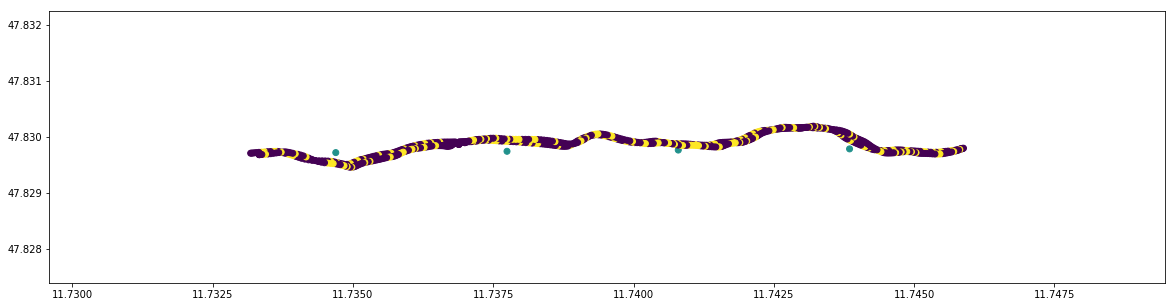

[['score_name', 'score_result'], ['adjusted_rand_score', -0.009670649624800324], ['adjusted_mutual_info_score', 0.00976966465673283], ['homogeneity_score', 0.011365262041614732], ['completeness_score', 0.016725591112869174], ['v_measure_score', 0.013533994482351146], ['fowlkes_mallows_score', 0.5147181983443027], ['silhouette_score', -0.2654557136279098], ['davies_bouldin_score', 7.359846725325557], ['calinski_harabasz_score', 4.583796536825022]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2], dtype=int32), array([209, 195, 332]))


<Figure size 1200x400 with 0 Axes>

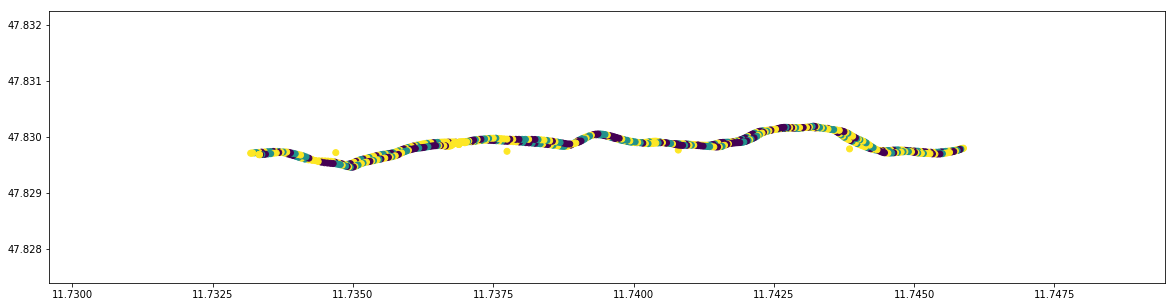

[['score_name', 'score_result'], ['adjusted_rand_score', 0.006842203239025424], ['adjusted_mutual_info_score', 0.012322143985342248], ['homogeneity_score', 0.01643234152985479], ['completeness_score', 0.01390376909030612], ['v_measure_score', 0.01506267465232079], ['fowlkes_mallows_score', 0.4034249262280002], ['silhouette_score', 0.011125437528943658], ['davies_bouldin_score', 6.860218198103496], ['calinski_harabasz_score', 10.20443102350425]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2], dtype=int32), array([149,   4, 583]))


<Figure size 1200x400 with 0 Axes>

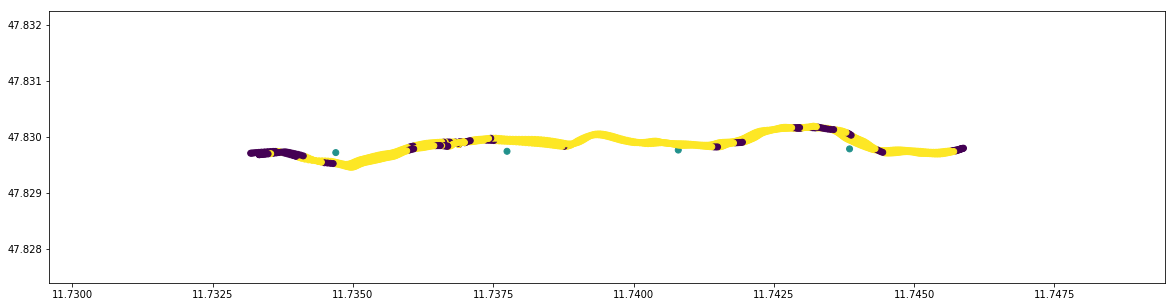

[['score_name', 'score_result'], ['adjusted_rand_score', 0.06144595690779886], ['adjusted_mutual_info_score', 0.02957041778910389], ['homogeneity_score', 0.026656594992070907], ['completeness_score', 0.044936888235822765], ['v_measure_score', 0.03346294595258863], ['fowlkes_mallows_score', 0.5778134342018126], ['silhouette_score', 0.36205416078460695], ['davies_bouldin_score', 1.0566238970979047], ['calinski_harabasz_score', 626.5070991286772]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 25
clusters: 3
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

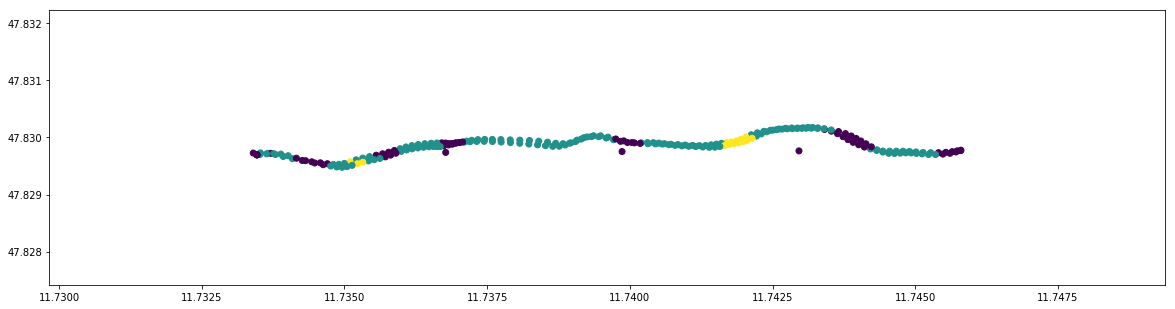


---- Dec ----
...Pretraining...
Pretraining time: 24s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 3)                 30        
Total params: 1,501,040
Trainable

<Figure size 1200x400 with 0 Axes>

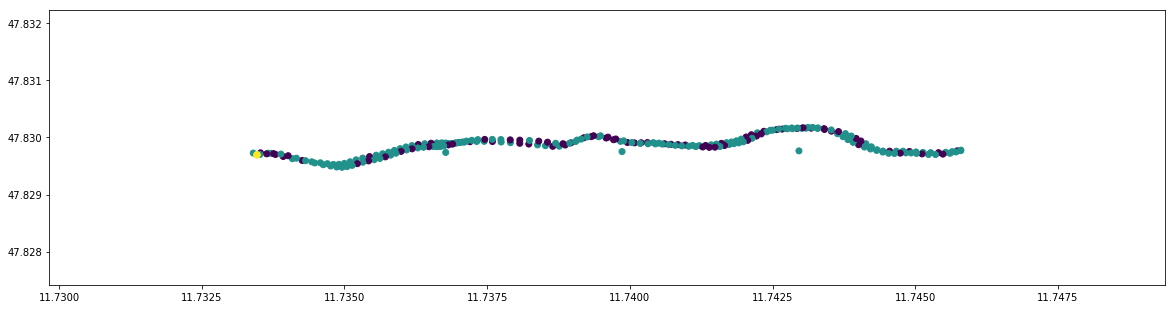

[['score_name', 'score_result'], ['adjusted_rand_score', -0.005105383810225857], ['adjusted_mutual_info_score', 0.024079439500634695], ['homogeneity_score', 0.03293181464956194], ['completeness_score', 0.03772460545596455], ['v_measure_score', 0.035165656928223175], ['fowlkes_mallows_score', 0.5184239850030817], ['silhouette_score', -0.012093941885908135], ['davies_bouldin_score', 6.339952154995082], ['calinski_harabasz_score', 3.0132293655601163]]

---- Fidec ----
...Pretraining...
Pretraining time: 24s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 5

<Figure size 1200x400 with 0 Axes>

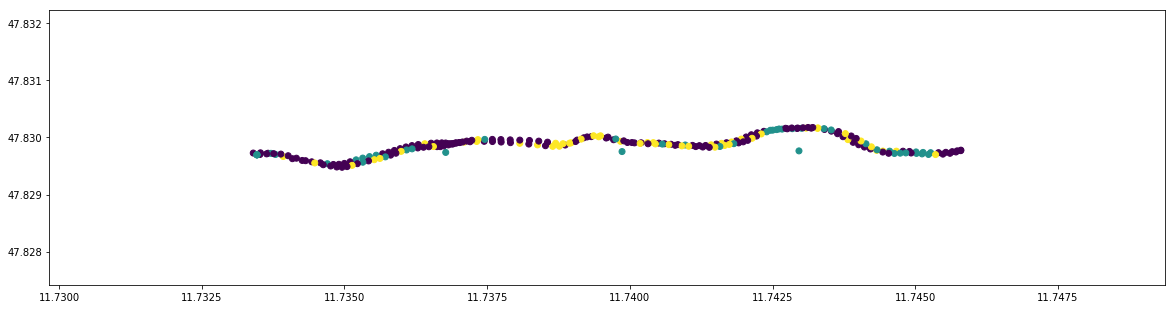

[['score_name', 'score_result'], ['adjusted_rand_score', -0.019967789833943317], ['adjusted_mutual_info_score', 0.012366447821620647], ['homogeneity_score', 0.024147415436229606], ['completeness_score', 0.020539999218306734], ['v_measure_score', 0.022198101994425182], ['fowlkes_mallows_score', 0.4574296229019673], ['silhouette_score', 0.016252740289253737], ['davies_bouldin_score', 8.257043342072029], ['calinski_harabasz_score', 2.1235676921099906]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_______________________________________________

<Figure size 1200x400 with 0 Axes>

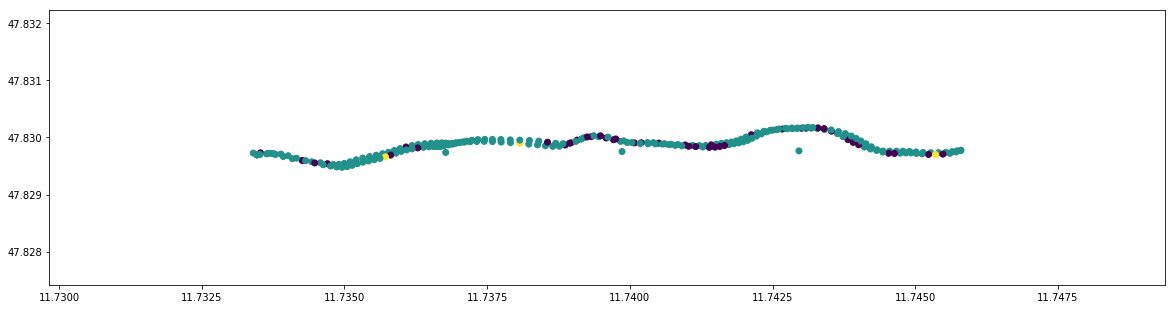

[['score_name', 'score_result'], ['adjusted_rand_score', -0.034052355419169816], ['adjusted_mutual_info_score', -0.004491326907279711], ['homogeneity_score', 0.006951613561031363], ['completeness_score', 0.010543919631300802], ['v_measure_score', 0.008378967807337217], ['fowlkes_mallows_score', 0.5734851695695313], ['silhouette_score', 0.01832953799303916], ['davies_bouldin_score', 6.898864764133024], ['calinski_harabasz_score', 1.481512089578742]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
______________________________________________

<Figure size 1200x400 with 0 Axes>

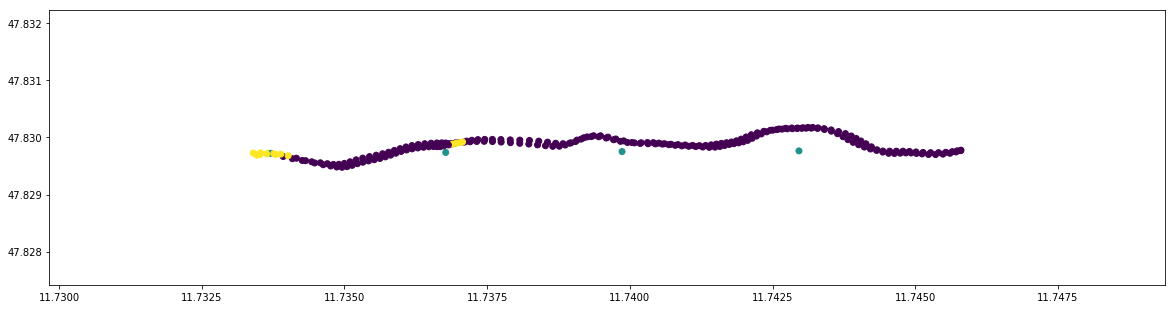

[['score_name', 'score_result'], ['adjusted_rand_score', 0.05812365377441964], ['adjusted_mutual_info_score', 0.046262760909059696], ['homogeneity_score', 0.04337008714430882], ['completeness_score', 0.10363056841648031], ['v_measure_score', 0.06114893523285566], ['fowlkes_mallows_score', 0.6726930087247531], ['silhouette_score', -0.19338700459795796], ['davies_bouldin_score', 5.4927852110489885], ['calinski_harabasz_score', 0.9018556666149093]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2], dtype=int32), array([124,  32,  83]))


<Figure size 1200x400 with 0 Axes>

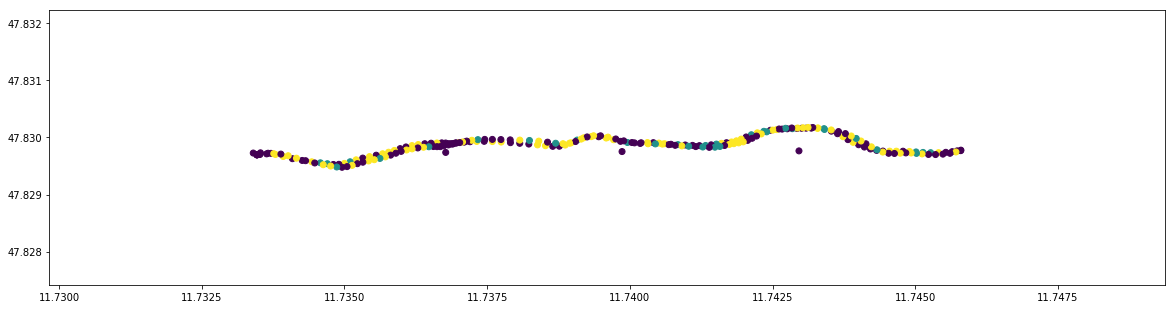

[['score_name', 'score_result'], ['adjusted_rand_score', -0.012428503676557637], ['adjusted_mutual_info_score', 0.022989684719450502], ['homogeneity_score', 0.035916551687695766], ['completeness_score', 0.029898566735773346], ['v_measure_score', 0.032632423773638536], ['fowlkes_mallows_score', 0.44585850129150845], ['silhouette_score', 0.01007133015224885], ['davies_bouldin_score', 8.542747537757942], ['calinski_harabasz_score', 2.101486591866093]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2], dtype=int32), array([ 17,   4, 218]))


<Figure size 1200x400 with 0 Axes>

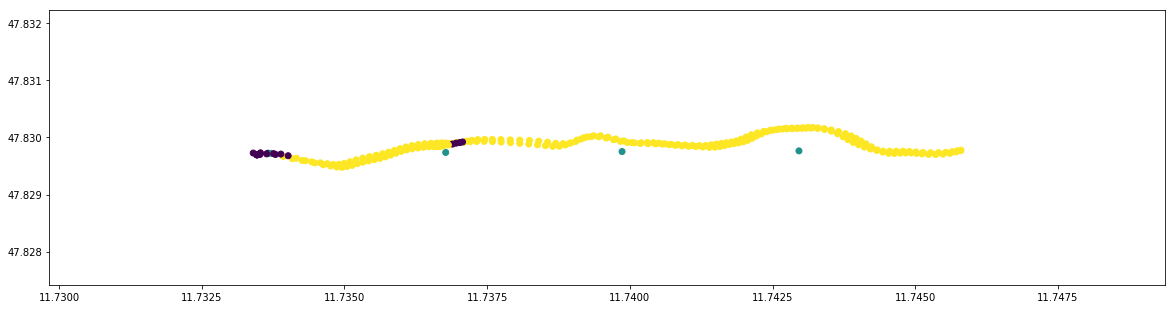

[['score_name', 'score_result'], ['adjusted_rand_score', 0.05812365377441964], ['adjusted_mutual_info_score', 0.046262760909059696], ['homogeneity_score', 0.04337008714430882], ['completeness_score', 0.10363056841648031], ['v_measure_score', 0.06114893523285566], ['fowlkes_mallows_score', 0.6726930087247531], ['silhouette_score', 0.6416988726617079], ['davies_bouldin_score', 0.6986140397259626], ['calinski_harabasz_score', 364.24018660169185]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 75
clusters: 3
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

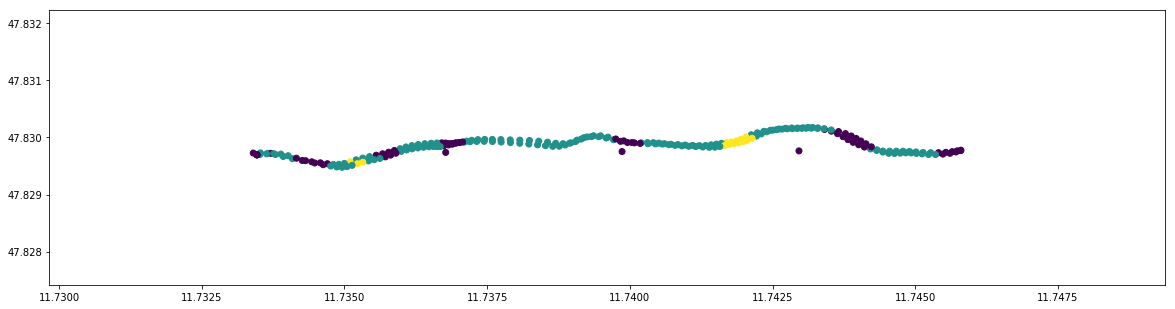


---- Dec ----
...Pretraining...
Pretraining time: 24s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 3)                 30        
Total params: 1,501,040
Trainable

<Figure size 1200x400 with 0 Axes>

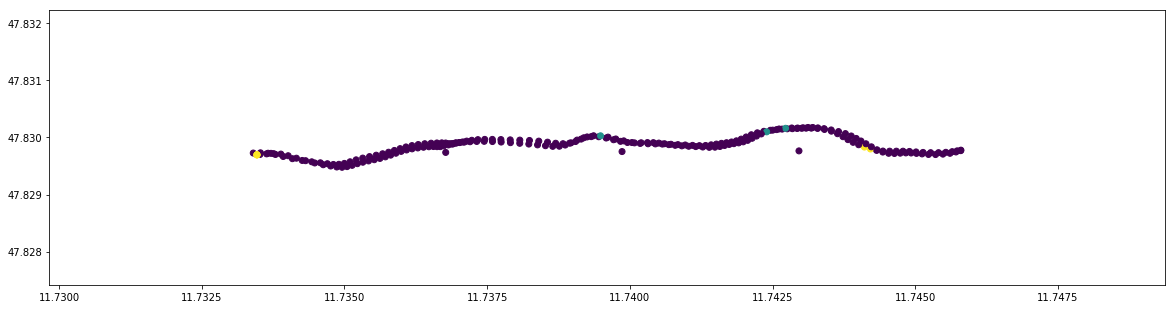

[['score_name', 'score_result'], ['adjusted_rand_score', 0.01834611122930497], ['adjusted_mutual_info_score', 0.02753567392779144], ['homogeneity_score', 0.027302140175620142], ['completeness_score', 0.12041508498137236], ['v_measure_score', 0.04451193184717111], ['fowlkes_mallows_score', 0.6912382055956677], ['silhouette_score', 0.016752793271017804], ['davies_bouldin_score', 2.515172959545815], ['calinski_harabasz_score', 2.3202157583787986]]

---- Fidec ----
...Pretraining...
Pretraining time: 24s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500) 

<Figure size 1200x400 with 0 Axes>

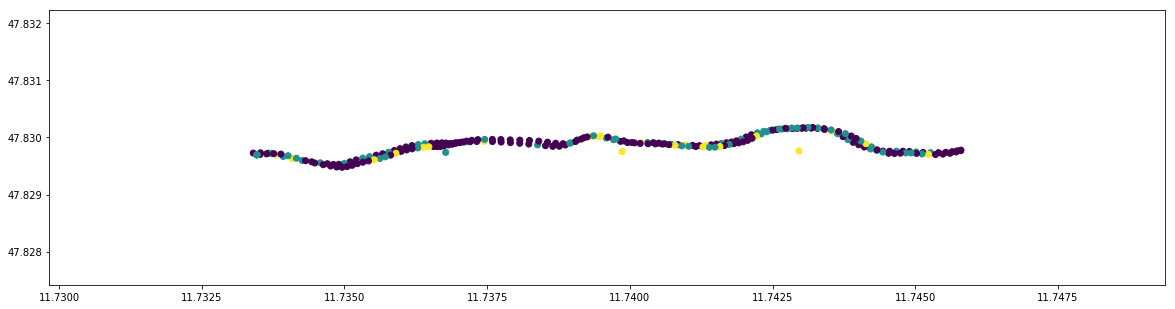

[['score_name', 'score_result'], ['adjusted_rand_score', -0.043685838811392076], ['adjusted_mutual_info_score', 0.007304805579409981], ['homogeneity_score', 0.0184592372726301], ['completeness_score', 0.01742495824346529], ['v_measure_score', 0.017927192406335266], ['fowlkes_mallows_score', 0.4731130173401779], ['silhouette_score', 0.007047209614118185], ['davies_bouldin_score', 8.703584048654355], ['calinski_harabasz_score', 1.695392270965919]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
___________________________________________________

<Figure size 1200x400 with 0 Axes>

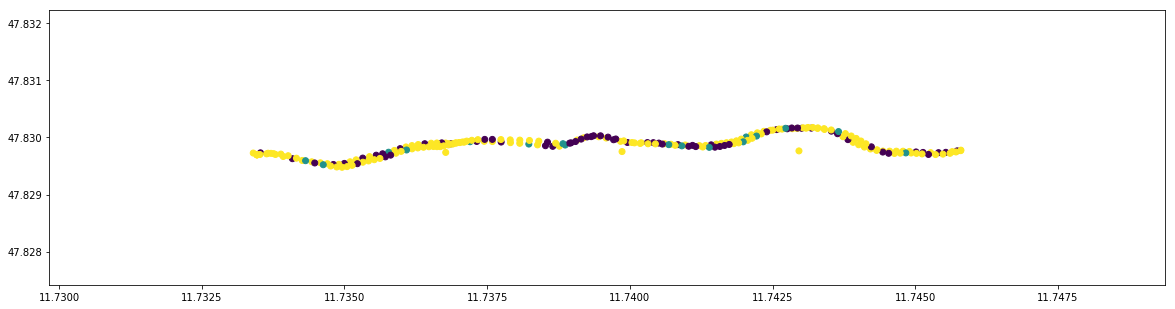

[['score_name', 'score_result'], ['adjusted_rand_score', -0.017740769446142935], ['adjusted_mutual_info_score', -0.004364178022470683], ['homogeneity_score', 0.0067137024534798815], ['completeness_score', 0.006643780900654518], ['v_measure_score', 0.006678558670155647], ['fowlkes_mallows_score', 0.49678345945203667], ['silhouette_score', 0.01101916651523254], ['davies_bouldin_score', 8.359409245817641], ['calinski_harabasz_score', 1.8089191994502913]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
___________________________________________

<Figure size 1200x400 with 0 Axes>

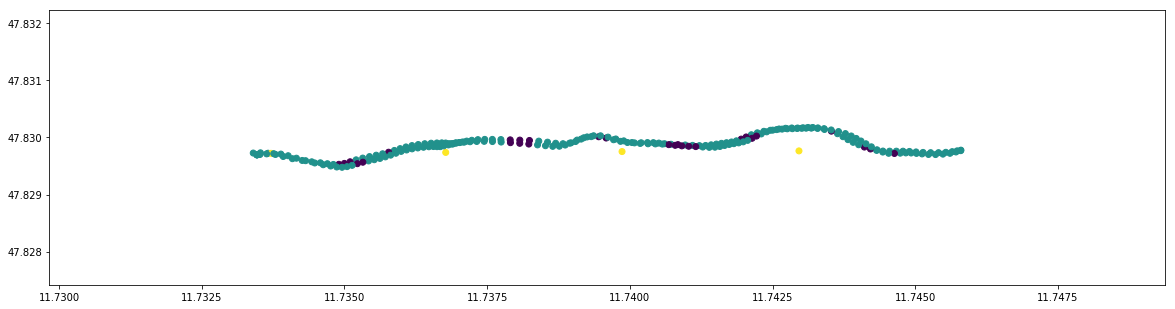

[['score_name', 'score_result'], ['adjusted_rand_score', 0.04573525728378414], ['adjusted_mutual_info_score', 0.05963578959921934], ['homogeneity_score', 0.05641015023940464], ['completeness_score', 0.10328688680908674], ['v_measure_score', 0.07296852728572281], ['fowlkes_mallows_score', 0.639595471092624], ['silhouette_score', -0.19680950354207996], ['davies_bouldin_score', 8.072809673193875], ['calinski_harabasz_score', 0.7124577029904472]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2], dtype=int32), array([110,  29, 100]))


<Figure size 1200x400 with 0 Axes>

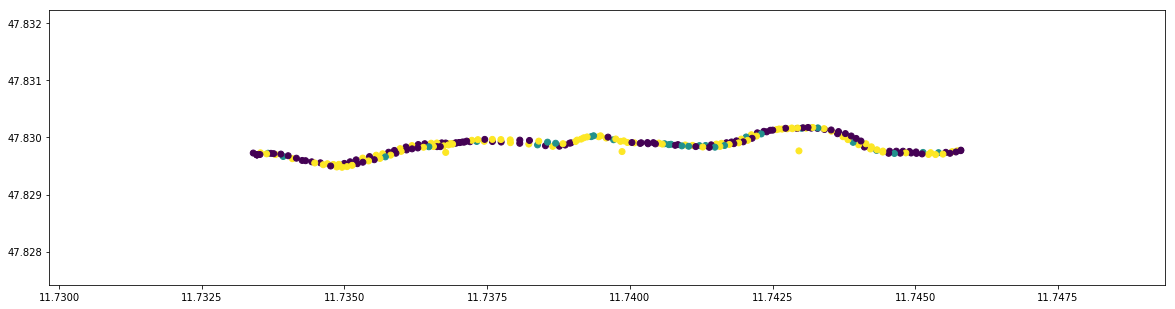

[['score_name', 'score_result'], ['adjusted_rand_score', -0.016914982273648713], ['adjusted_mutual_info_score', 0.011546129529783181], ['homogeneity_score', 0.023473001769534804], ['completeness_score', 0.019526544335078697], ['v_measure_score', 0.021318671997843496], ['fowlkes_mallows_score', 0.43987217986094906], ['silhouette_score', 0.0017715980936749216], ['davies_bouldin_score', 8.716594516286351], ['calinski_harabasz_score', 2.0590956388008723]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2], dtype=int32), array([181,   4,  54]))


<Figure size 1200x400 with 0 Axes>

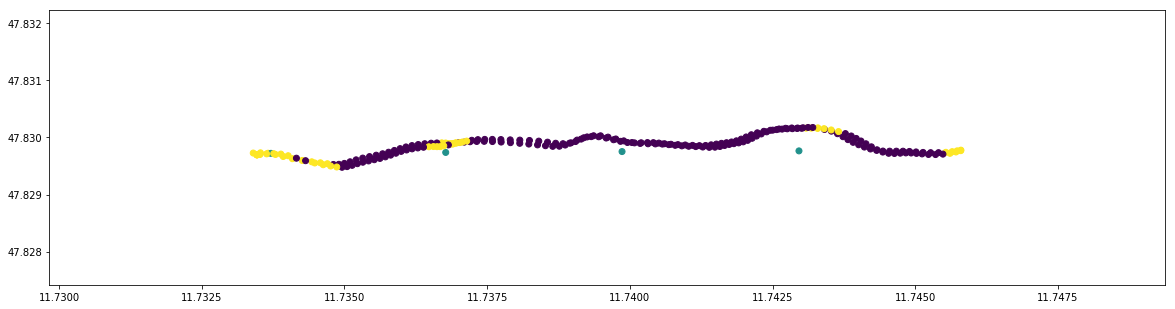

[['score_name', 'score_result'], ['adjusted_rand_score', 0.1508277520617085], ['adjusted_mutual_info_score', 0.11607324171181028], ['homogeneity_score', 0.11140376949249821], ['completeness_score', 0.1473064066546069], ['v_measure_score', 0.12686388464585843], ['fowlkes_mallows_score', 0.6284532873532865], ['silhouette_score', 0.4248500837790103], ['davies_bouldin_score', 0.9402154885082469], ['calinski_harabasz_score', 338.56440688653237]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 150
clusters: 3
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

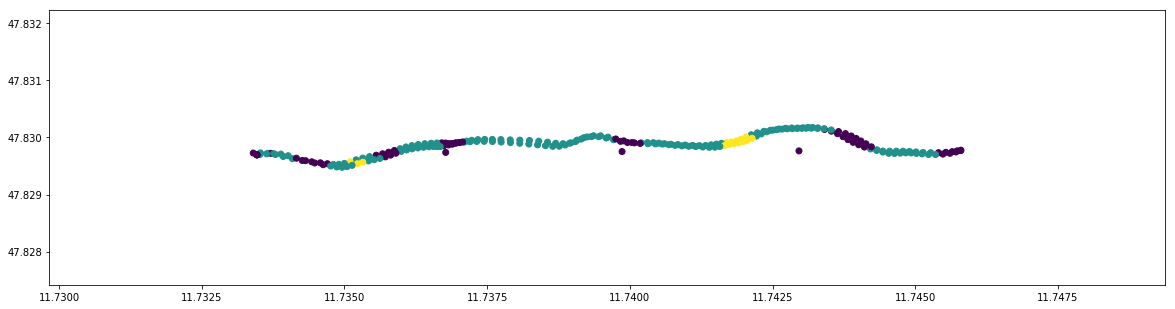


---- Dec ----
...Pretraining...
Pretraining time: 28s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 3)                 30        
Total params: 1,501,040
Trainable

<Figure size 1200x400 with 0 Axes>

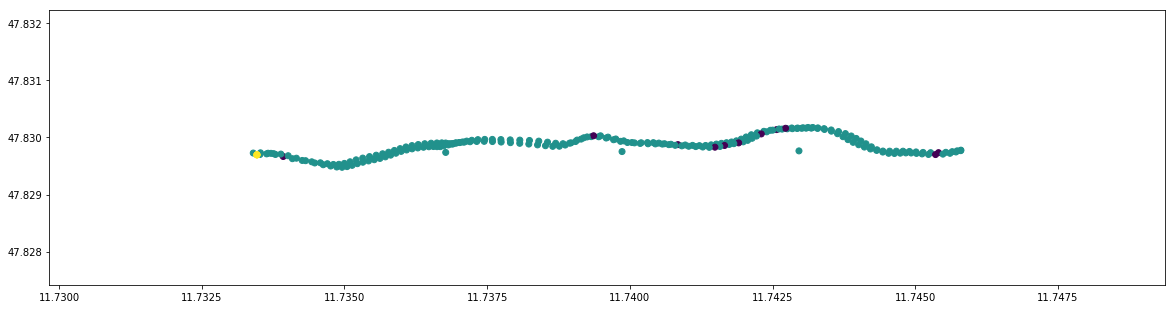

[['score_name', 'score_result'], ['adjusted_rand_score', 0.027784806813967246], ['adjusted_mutual_info_score', 0.037403355008117686], ['homogeneity_score', 0.03556368575320139], ['completeness_score', 0.10676666815874306], ['v_measure_score', 0.053354974971297715], ['fowlkes_mallows_score', 0.6776099833965072], ['silhouette_score', -0.01321572147716201], ['davies_bouldin_score', 3.7201715566815783], ['calinski_harabasz_score', 2.5730080714323647]]

---- Fidec ----
...Pretraining...
Pretraining time: 29s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 50

<Figure size 1200x400 with 0 Axes>

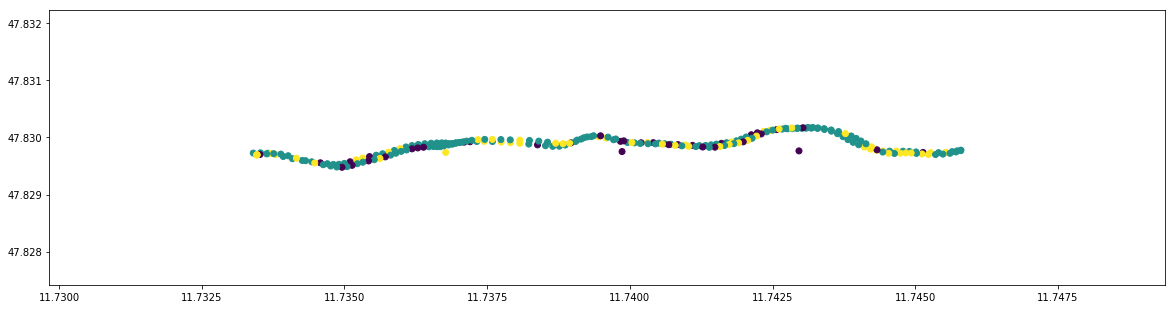

[['score_name', 'score_result'], ['adjusted_rand_score', -0.0292265832667725], ['adjusted_mutual_info_score', 0.0023094967432447694], ['homogeneity_score', 0.013335098418967125], ['completeness_score', 0.011685533411226938], ['v_measure_score', 0.012455939496203461], ['fowlkes_mallows_score', 0.46200269198425653], ['silhouette_score', 0.013422134611662922], ['davies_bouldin_score', 9.06624336698088], ['calinski_harabasz_score', 1.711725555912344]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

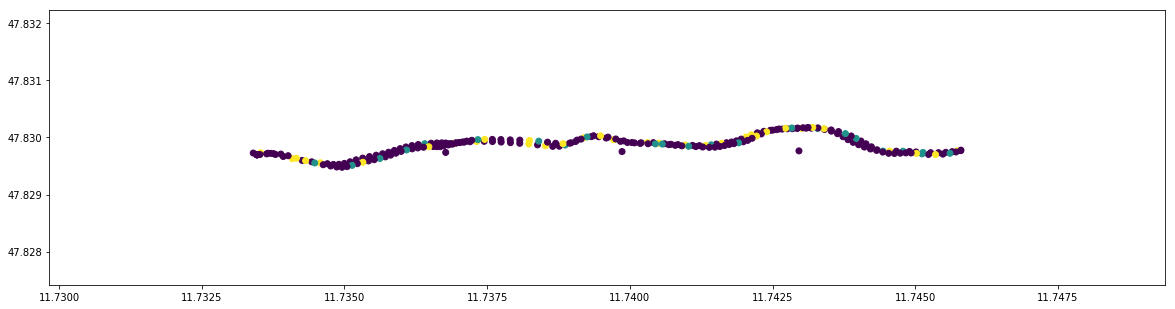

[['score_name', 'score_result'], ['adjusted_rand_score', -0.05514093366737267], ['adjusted_mutual_info_score', 0.008739763188118803], ['homogeneity_score', 0.019310069675404586], ['completeness_score', 0.022112938761021494], ['v_measure_score', 0.02061667678525191], ['fowlkes_mallows_score', 0.5296460841375266], ['silhouette_score', 0.014936638706350182], ['davies_bouldin_score', 7.716177797606638], ['calinski_harabasz_score', 1.6484900739209594]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_______________________________________________

<Figure size 1200x400 with 0 Axes>

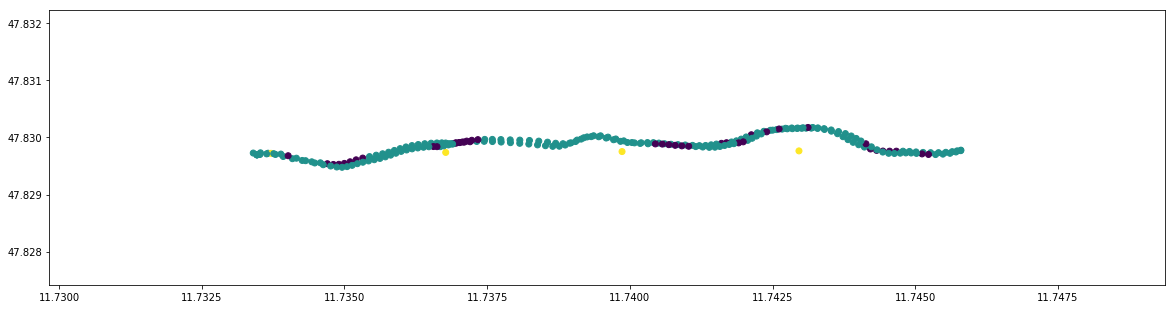

[['score_name', 'score_result'], ['adjusted_rand_score', 0.006709791204714712], ['adjusted_mutual_info_score', 0.026558875247122412], ['homogeneity_score', 0.03281927166133689], ['completeness_score', 0.04826822339532916], ['v_measure_score', 0.039072064937124396], ['fowlkes_mallows_score', 0.5878935193792452], ['silhouette_score', -0.19681204704846808], ['davies_bouldin_score', 8.541698992595299], ['calinski_harabasz_score', 0.78630974276674]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2], dtype=int32), array([224,   3,  12]))


<Figure size 1200x400 with 0 Axes>

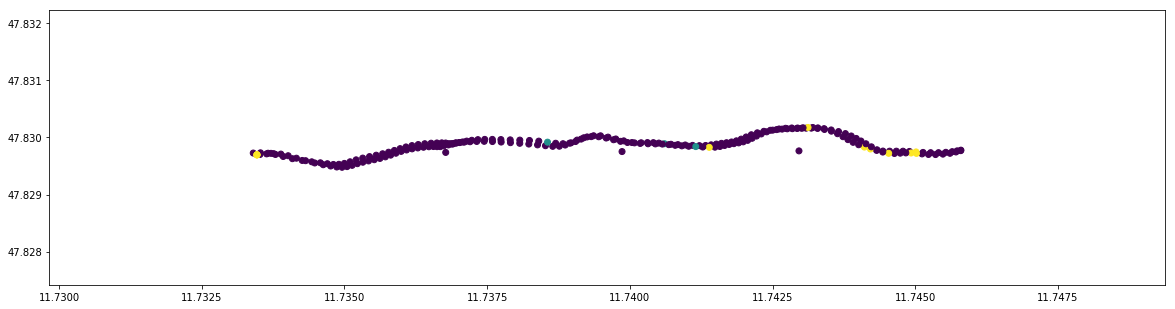

[['score_name', 'score_result'], ['adjusted_rand_score', -0.01039247062603134], ['adjusted_mutual_info_score', 0.0024399841405635574], ['homogeneity_score', 0.012483535127215499], ['completeness_score', 0.0381804933691319], ['v_measure_score', 0.018815224303860432], ['fowlkes_mallows_score', 0.6635407905048785], ['silhouette_score', 0.044498143400574265], ['davies_bouldin_score', 3.442780643440399], ['calinski_harabasz_score', 2.1378668655535247]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2], dtype=int32), array([192,   4,  43]))


<Figure size 1200x400 with 0 Axes>

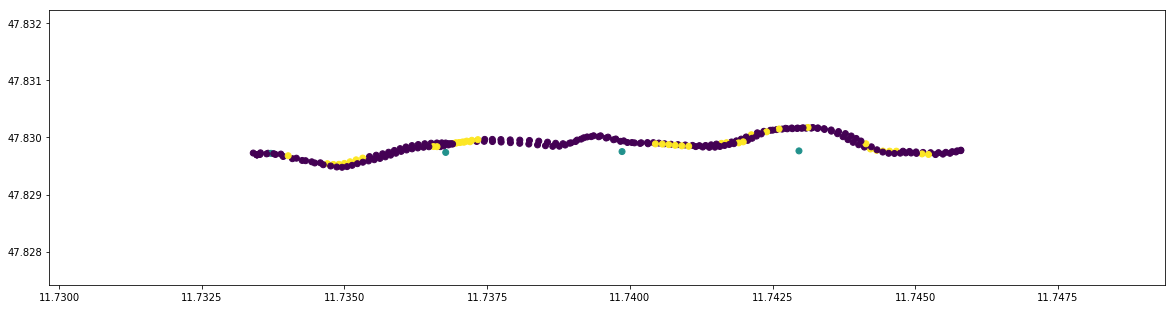

[['score_name', 'score_result'], ['adjusted_rand_score', 0.006709791204714712], ['adjusted_mutual_info_score', 0.026558875247122412], ['homogeneity_score', 0.03281927166133689], ['completeness_score', 0.04826822339532916], ['v_measure_score', 0.039072064937124396], ['fowlkes_mallows_score', 0.5878935193792452], ['silhouette_score', 0.42840067989326147], ['davies_bouldin_score', 0.7564556322429521], ['calinski_harabasz_score', 246.0633413467164]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 25
clusters: 3
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

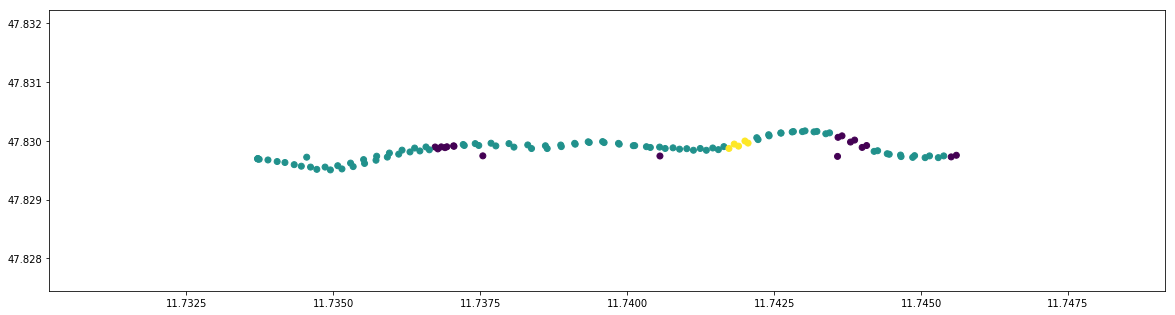


---- Dec ----
...Pretraining...
Pretraining time: 29s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 3)                 30        
Total params: 1,723,040
Trainable

<Figure size 1200x400 with 0 Axes>

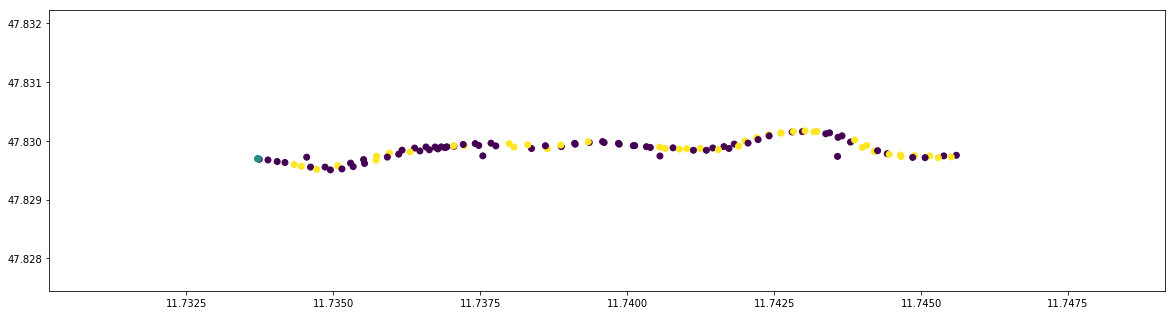

[['score_name', 'score_result'], ['adjusted_rand_score', -0.03598288585761144], ['adjusted_mutual_info_score', -0.008657596036683783], ['homogeneity_score', 0.019223058517283467], ['completeness_score', 0.014518210540921304], ['v_measure_score', 0.016542614939167956], ['fowlkes_mallows_score', 0.558378669824], ['silhouette_score', -0.0008143181918647673], ['davies_bouldin_score', 5.838850646099918], ['calinski_harabasz_score', 2.4921143315874787]]

---- Fidec ----
...Pretraining...
Pretraining time: 28s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 50

<Figure size 1200x400 with 0 Axes>

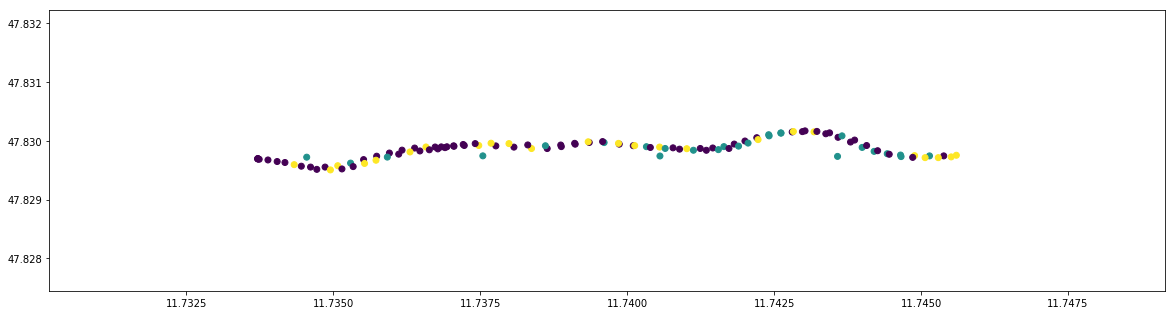

[['score_name', 'score_result'], ['adjusted_rand_score', -0.014905216929211262], ['adjusted_mutual_info_score', -0.001110739479540926], ['homogeneity_score', 0.03107748997478279], ['completeness_score', 0.018978887495337608], ['v_measure_score', 0.023566075520385282], ['fowlkes_mallows_score', 0.5213402798221493], ['silhouette_score', 0.006773414654223995], ['davies_bouldin_score', 7.1084697816805935], ['calinski_harabasz_score', 1.3865242149324608]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
______________________________________________

<Figure size 1200x400 with 0 Axes>

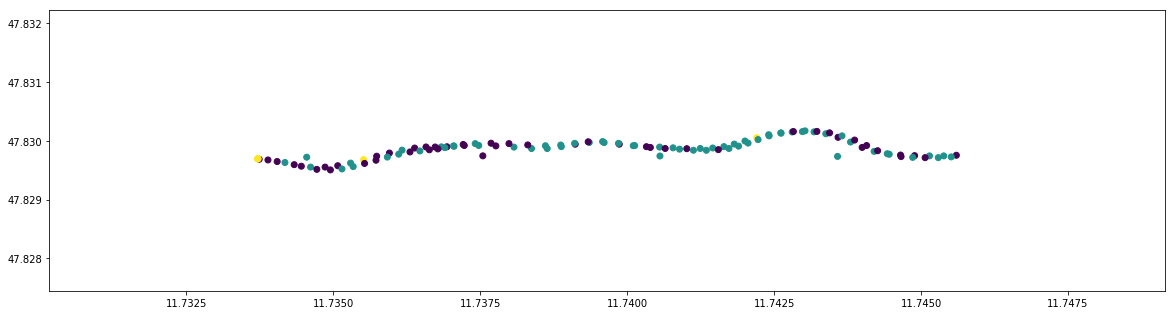

[['score_name', 'score_result'], ['adjusted_rand_score', -0.030918141856902292], ['adjusted_mutual_info_score', 0.02659407884067227], ['homogeneity_score', 0.06177660992870869], ['completeness_score', 0.04330882617126588], ['v_measure_score', 0.0509199478090797], ['fowlkes_mallows_score', 0.5395450840128297], ['silhouette_score', 0.01282132156981503], ['davies_bouldin_score', 6.67163023415601], ['calinski_harabasz_score', 2.0336899395317665]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
____________________________________________________

<Figure size 1200x400 with 0 Axes>

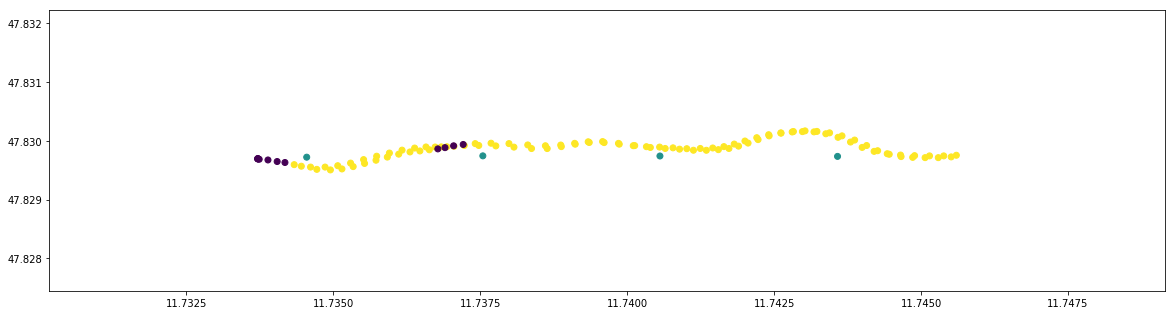

[['score_name', 'score_result'], ['adjusted_rand_score', 0.13086392810023117], ['adjusted_mutual_info_score', 0.04826881366666554], ['homogeneity_score', 0.07111083621032363], ['completeness_score', 0.08947664836118464], ['v_measure_score', 0.07924352639607651], ['fowlkes_mallows_score', 0.750126009649435], ['silhouette_score', -0.10953645751230812], ['davies_bouldin_score', 4.529738986905076], ['calinski_harabasz_score', 1.0548253150155495]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2], dtype=int32), array([42, 18, 58]))


<Figure size 1200x400 with 0 Axes>

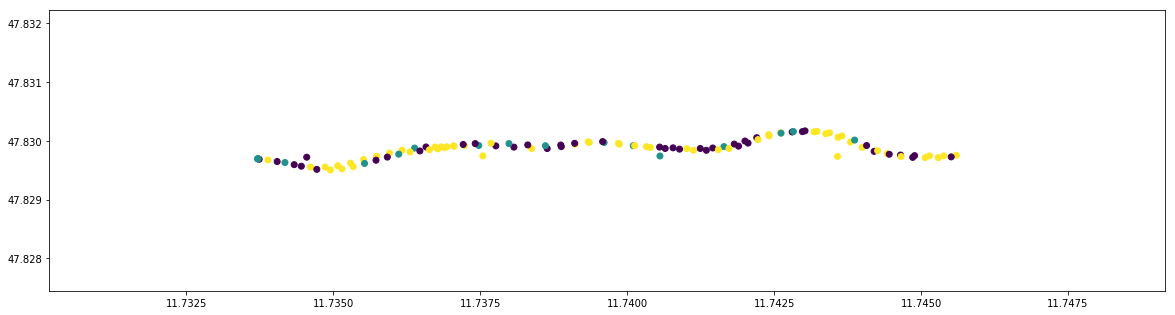

[['score_name', 'score_result'], ['adjusted_rand_score', -0.01938482059166243], ['adjusted_mutual_info_score', 0.041637363753272656], ['homogeneity_score', 0.08681119160140187], ['completeness_score', 0.05149503040036322], ['v_measure_score', 0.06464416258219959], ['fowlkes_mallows_score', 0.4986845563372543], ['silhouette_score', 0.005219612001941863], ['davies_bouldin_score', 7.5380371356874365], ['calinski_harabasz_score', 1.5010921345264083]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2], dtype=int32), array([102,   4,  12]))


<Figure size 1200x400 with 0 Axes>

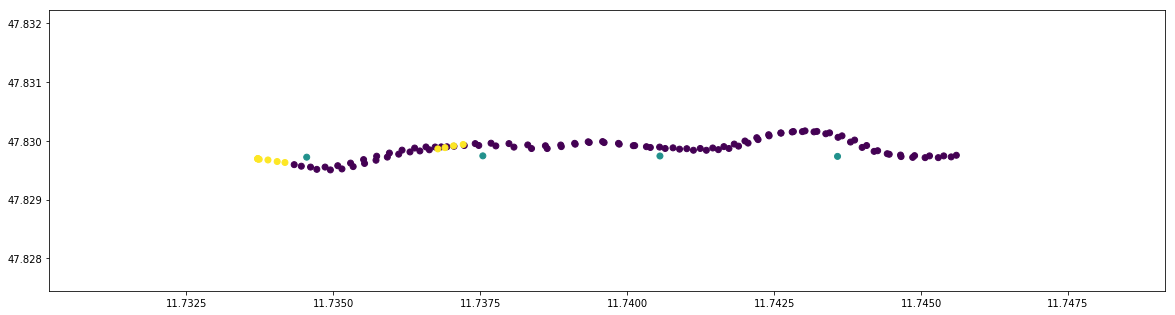

[['score_name', 'score_result'], ['adjusted_rand_score', 0.13086392810023117], ['adjusted_mutual_info_score', 0.04826881366666558], ['homogeneity_score', 0.07111083621032363], ['completeness_score', 0.08947664836118464], ['v_measure_score', 0.07924352639607651], ['fowlkes_mallows_score', 0.750126009649435], ['silhouette_score', 0.654962598487899], ['davies_bouldin_score', 0.7886341743308988], ['calinski_harabasz_score', 247.41717849316686]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 75
clusters: 3
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

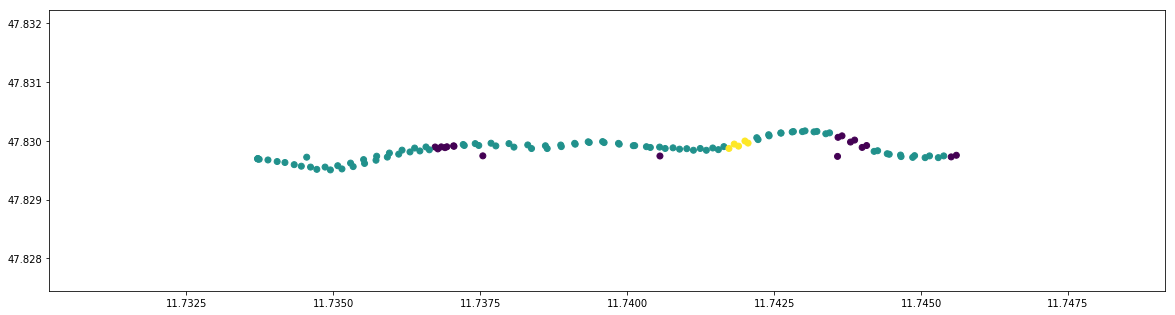


---- Dec ----
...Pretraining...
Pretraining time: 30s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 3)                 30        
Total params: 1,723,040
Trainable

<Figure size 1200x400 with 0 Axes>

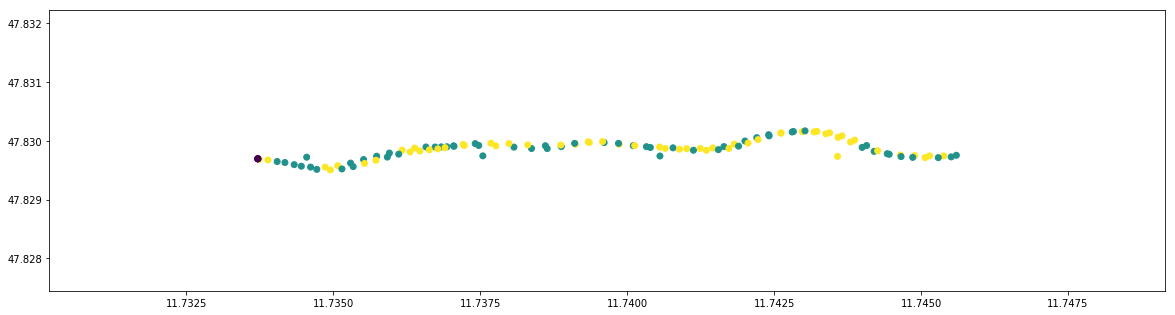

[['score_name', 'score_result'], ['adjusted_rand_score', -0.019061470393925938], ['adjusted_mutual_info_score', -0.007487374156794714], ['homogeneity_score', 0.020226410798635266], ['completeness_score', 0.01472865981504043], ['v_measure_score', 0.017045190795054874], ['fowlkes_mallows_score', 0.5486361726920987], ['silhouette_score', -0.0019450813323496601], ['davies_bouldin_score', 6.0345018708369835], ['calinski_harabasz_score', 2.4652287520630862]]

---- Fidec ----
...Pretraining...
Pretraining time: 30s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (Non

<Figure size 1200x400 with 0 Axes>

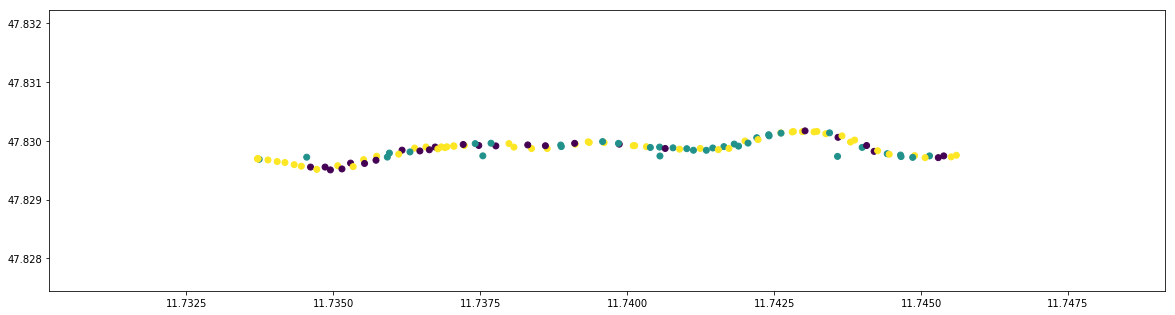

[['score_name', 'score_result'], ['adjusted_rand_score', -0.022572043062358795], ['adjusted_mutual_info_score', 0.0010600226213102273], ['homogeneity_score', 0.03380779958039397], ['completeness_score', 0.01930724066759598], ['v_measure_score', 0.024578172957902194], ['fowlkes_mallows_score', 0.4828738924327262], ['silhouette_score', -0.005851684611323457], ['davies_bouldin_score', 7.305177423870695], ['calinski_harabasz_score', 1.3518053814421411]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_______________________________________________

<Figure size 1200x400 with 0 Axes>

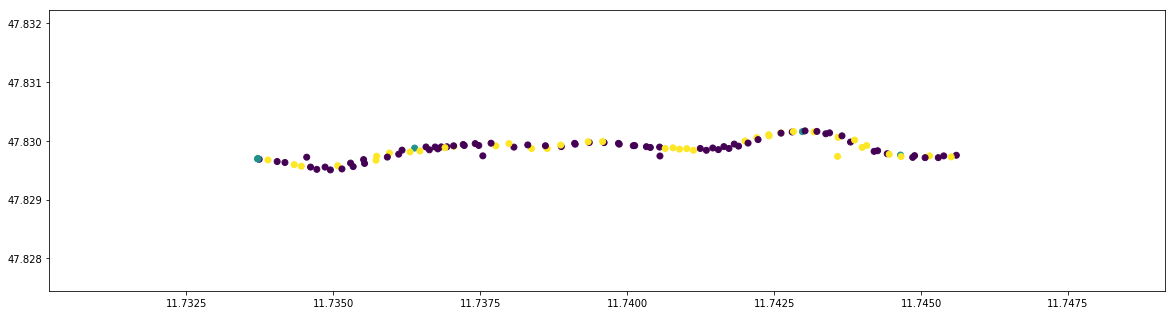

[['score_name', 'score_result'], ['adjusted_rand_score', -0.020873386432298933], ['adjusted_mutual_info_score', 0.00033169910218261103], ['homogeneity_score', 0.03128762407597843], ['completeness_score', 0.022309170874299785], ['v_measure_score', 0.026046369093875657], ['fowlkes_mallows_score', 0.558357625493984], ['silhouette_score', -0.002985751012793969], ['davies_bouldin_score', 6.627547466179507], ['calinski_harabasz_score', 1.8802547052444882]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
____________________________________________

<Figure size 1200x400 with 0 Axes>

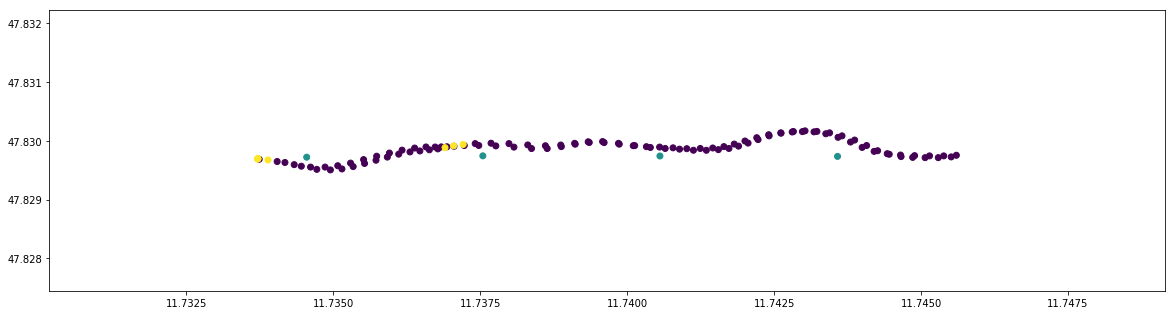

[['score_name', 'score_result'], ['adjusted_rand_score', 0.13329326082425194], ['adjusted_mutual_info_score', 0.04559021819924193], ['homogeneity_score', 0.0651003004590387], ['completeness_score', 0.0984850342433279], ['v_measure_score', 0.0783860647609337], ['fowlkes_mallows_score', 0.7730237333311195], ['silhouette_score', -0.1042199598394268], ['davies_bouldin_score', 3.926628663672048], ['calinski_harabasz_score', 1.2669067252062212]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2], dtype=int32), array([85, 21, 12]))


<Figure size 1200x400 with 0 Axes>

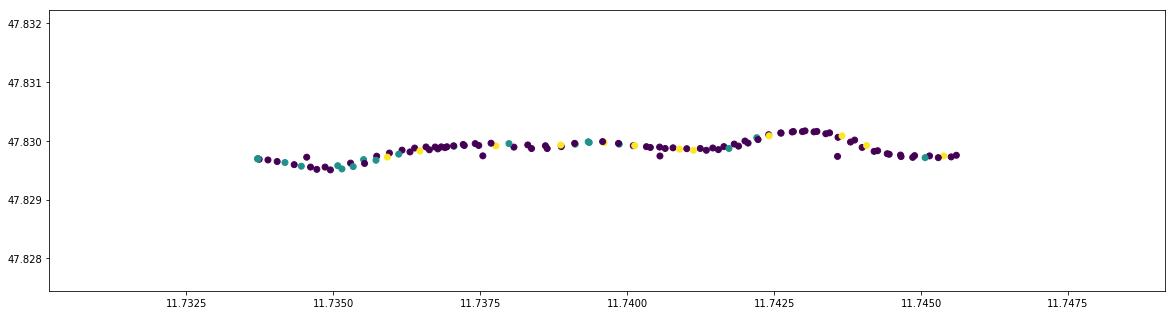

[['score_name', 'score_result'], ['adjusted_rand_score', -0.06360263935113117], ['adjusted_mutual_info_score', -0.004520740260654387], ['homogeneity_score', 0.027175222356214113], ['completeness_score', 0.020849589567215457], ['v_measure_score', 0.02359581265735107], ['fowlkes_mallows_score', 0.5861689386685913], ['silhouette_score', 0.015049877396725272], ['davies_bouldin_score', 5.944818147624318], ['calinski_harabasz_score', 1.496611286221419]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2], dtype=int32), array([106,   4,   8]))


<Figure size 1200x400 with 0 Axes>

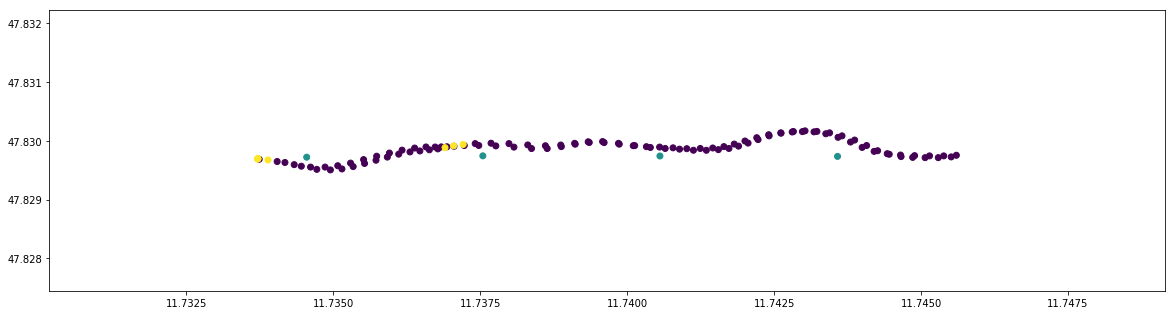

[['score_name', 'score_result'], ['adjusted_rand_score', 0.13329326082425194], ['adjusted_mutual_info_score', 0.04559021819924193], ['homogeneity_score', 0.0651003004590387], ['completeness_score', 0.0984850342433279], ['v_measure_score', 0.0783860647609337], ['fowlkes_mallows_score', 0.7730237333311195], ['silhouette_score', 0.6029663880943328], ['davies_bouldin_score', 0.5459066052743485], ['calinski_harabasz_score', 269.44342300697764]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 150
clusters: 3
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

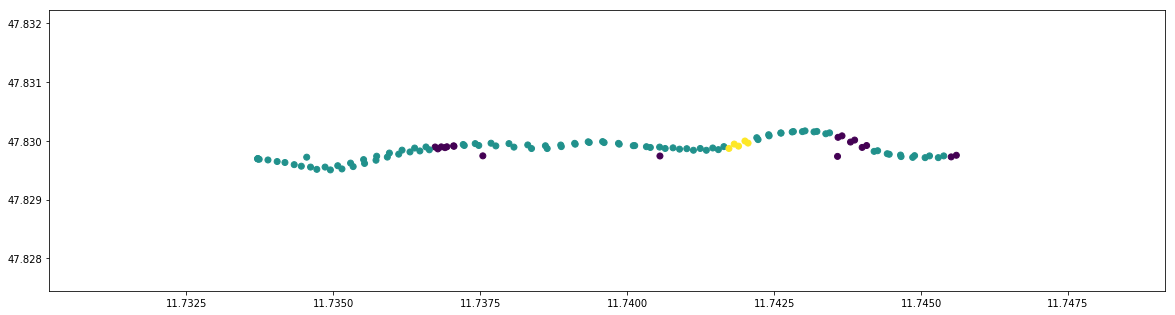


---- Dec ----
...Pretraining...
Pretraining time: 31s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 3)                 30        
Total params: 1,723,040
Trainable

<Figure size 1200x400 with 0 Axes>

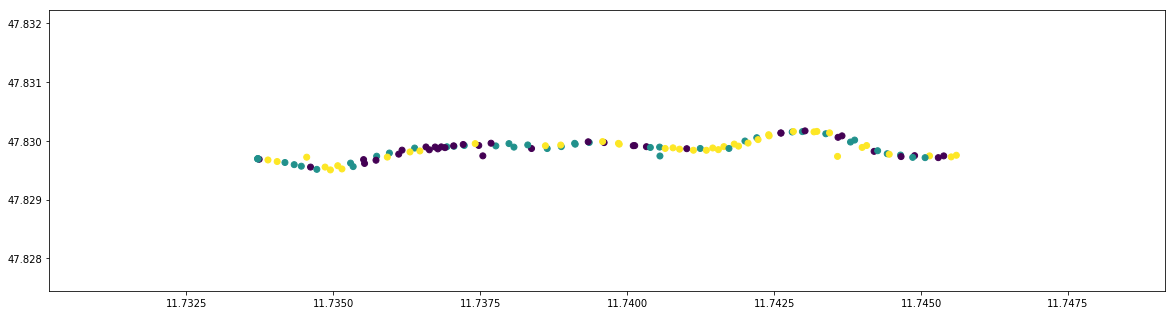

[['score_name', 'score_result'], ['adjusted_rand_score', 4.888751569289743e-05], ['adjusted_mutual_info_score', 0.005361104368327462], ['homogeneity_score', 0.039778852275487525], ['completeness_score', 0.021617670184669393], ['v_measure_score', 0.02801220897728275], ['fowlkes_mallows_score', 0.47018820421266727], ['silhouette_score', -0.009115882047859238], ['davies_bouldin_score', 7.72556486694302], ['calinski_harabasz_score', 1.4201900823188098]]

---- Fidec ----
...Pretraining...
Pretraining time: 31s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 

<Figure size 1200x400 with 0 Axes>

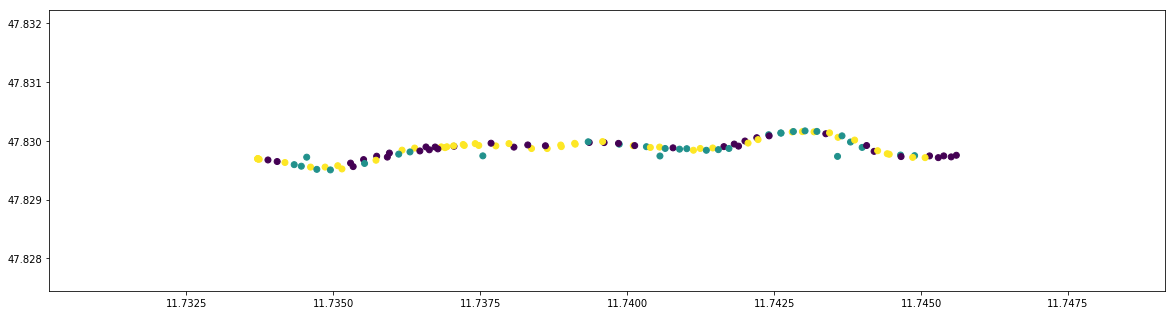

[['score_name', 'score_result'], ['adjusted_rand_score', 0.010187861129527572], ['adjusted_mutual_info_score', -0.009840092460347146], ['homogeneity_score', 0.01881930809483787], ['completeness_score', 0.0103640091723076], ['v_measure_score', 0.013366779377816789], ['fowlkes_mallows_score', 0.4830529078978602], ['silhouette_score', -0.0008780021427306444], ['davies_bouldin_score', 7.210590007735715], ['calinski_harabasz_score', 1.4988148630644076]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
________________________________________________

<Figure size 1200x400 with 0 Axes>

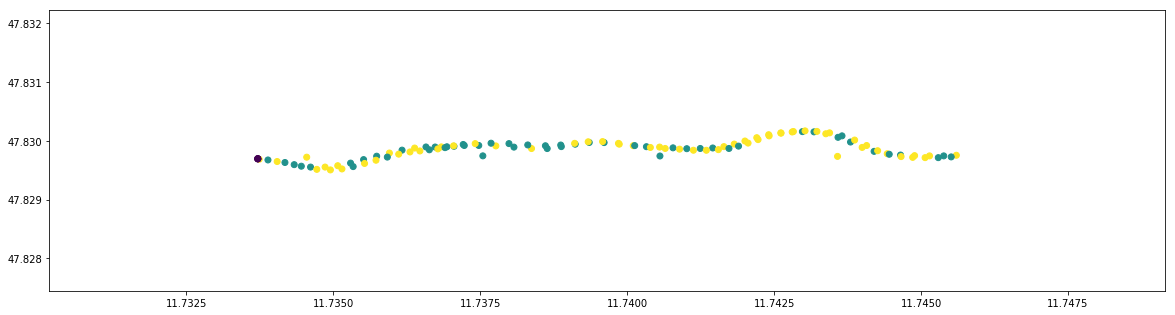

[['score_name', 'score_result'], ['adjusted_rand_score', -0.012923502151693694], ['adjusted_mutual_info_score', -0.00872398833226658], ['homogeneity_score', 0.018838730874358285], ['completeness_score', 0.013778383278721522], ['v_measure_score', 0.015916015945088378], ['fowlkes_mallows_score', 0.5535806139312983], ['silhouette_score', -0.002724150504837676], ['davies_bouldin_score', 6.540523322581225], ['calinski_harabasz_score', 2.333518561113529]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_____________________________________________

<Figure size 1200x400 with 0 Axes>

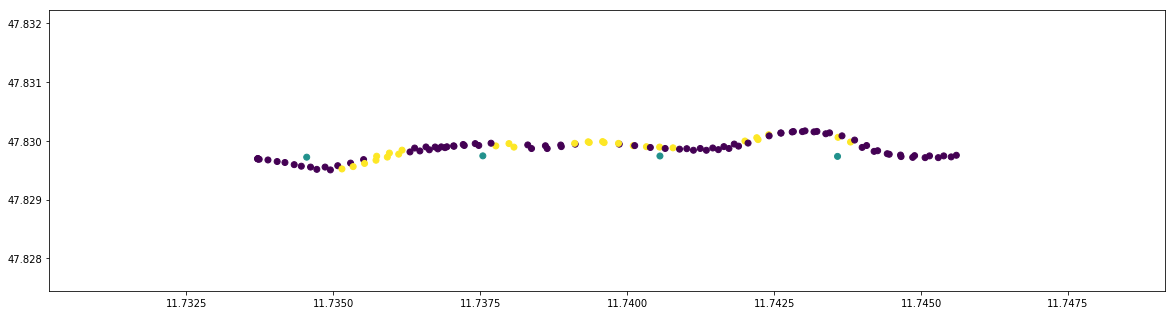

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0160680348631177], ['adjusted_mutual_info_score', 0.033458381452342284], ['homogeneity_score', 0.06441015685807579], ['completeness_score', 0.05584698250157199], ['v_measure_score', 0.05982368983880013], ['fowlkes_mallows_score', 0.6323607538365239], ['silhouette_score', -0.11767486304660986], ['davies_bouldin_score', 7.384491704100668], ['calinski_harabasz_score', 0.8005953854789578]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2], dtype=int32), array([  4, 113,   1]))


<Figure size 1200x400 with 0 Axes>

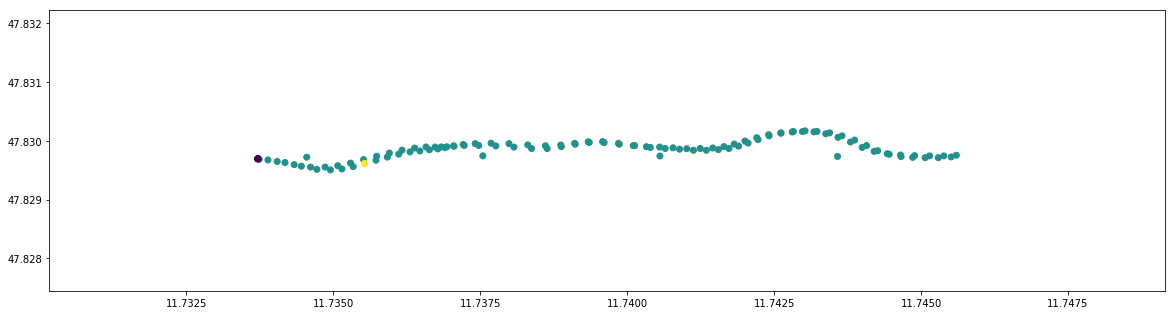

[['score_name', 'score_result'], ['adjusted_rand_score', -0.05874841916257178], ['adjusted_mutual_info_score', -0.009363996152147619], ['homogeneity_score', 0.015808540007843482], ['completeness_score', 0.047865958550423915], ['v_measure_score', 0.023767471684624886], ['fowlkes_mallows_score', 0.7709331844500704], ['silhouette_score', -0.003295345714838097], ['davies_bouldin_score', 1.005459940364348], ['calinski_harabasz_score', 2.314277821347107]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2], dtype=int32), array([79,  4, 35]))


<Figure size 1200x400 with 0 Axes>

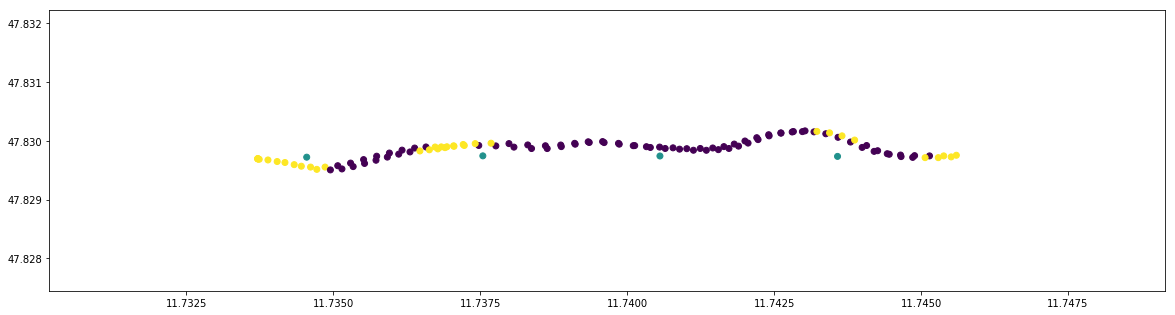

[['score_name', 'score_result'], ['adjusted_rand_score', 0.17579085954084417], ['adjusted_mutual_info_score', 0.12943513047348007], ['homogeneity_score', 0.17100512496837642], ['completeness_score', 0.13686442514025224], ['v_measure_score', 0.15204178598744686], ['fowlkes_mallows_score', 0.6698176210121424], ['silhouette_score', 0.37354052273547056], ['davies_bouldin_score', 0.9106612696384145], ['calinski_harabasz_score', 200.9720511220978]]
----------------------------------------------------------------
window_length: 50
sub_sample_length: 25
clusters: 4
Ground truth
y (array([1., 2., 3.]), array([238, 428,  70]))


<Figure size 1200x400 with 0 Axes>

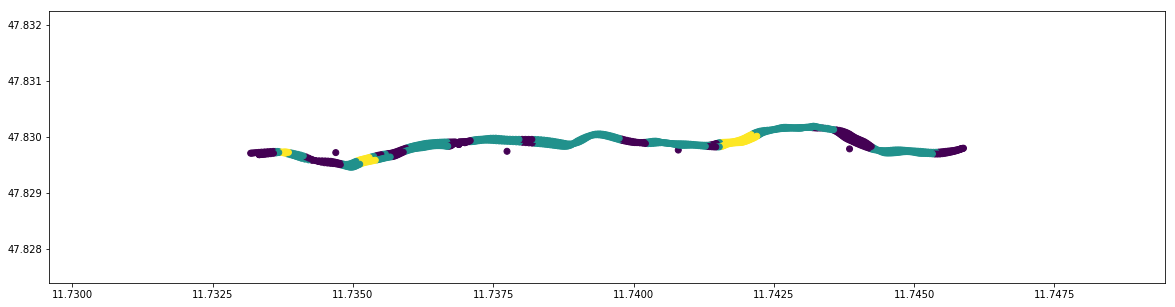


---- Dec ----
...Pretraining...
Pretraining time: 59s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 156)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               78500     
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 4)                 40        
Total params: 1,351,050
Trainable

<Figure size 1200x400 with 0 Axes>

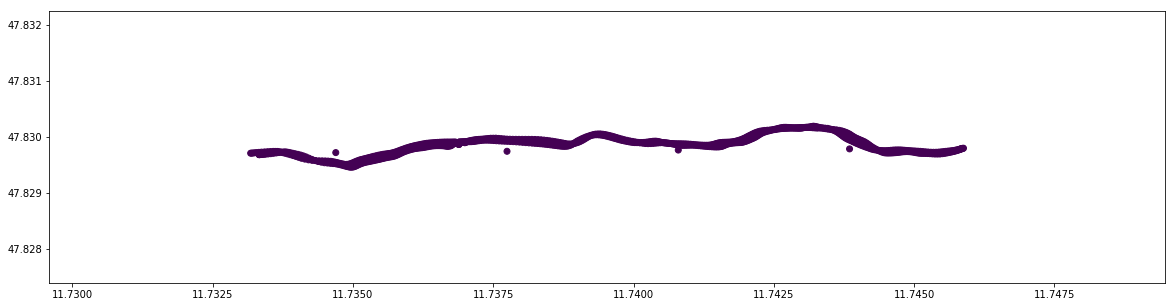

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0], ['adjusted_mutual_info_score', 3.670679701080814e-15], ['homogeneity_score', 1.0131075974986722e-15], ['completeness_score', 1.0], ['v_measure_score', 2.026215194997342e-15], ['fowlkes_mallows_score', 0.6715915400653664], ['silhouette_score', 0], ['davies_bouldin_score', 0], ['calinski_harabasz_score', 0]]

---- Fidec ----
...Pretraining...
Pretraining time: 59s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 156)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)          78500       input[0][0]                      
_______________________

<Figure size 1200x400 with 0 Axes>

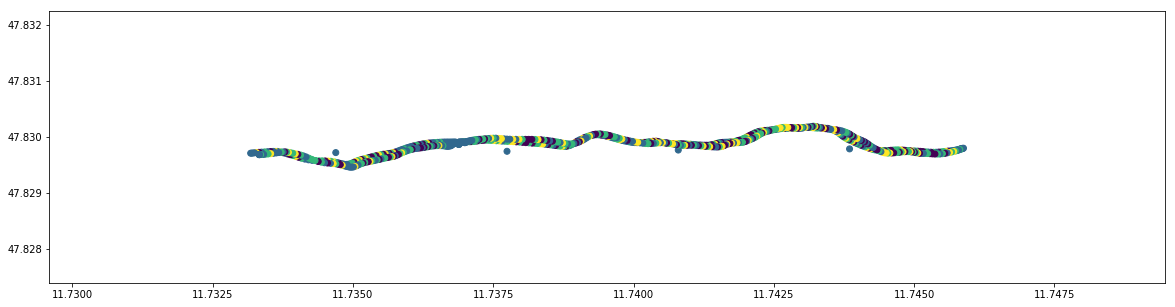

[['score_name', 'score_result'], ['adjusted_rand_score', 0.022436869627969005], ['adjusted_mutual_info_score', 0.026265883758280067], ['homogeneity_score', 0.0371644470216282], ['completeness_score', 0.024901184988410808], ['v_measure_score', 0.02982129530648681], ['fowlkes_mallows_score', 0.3621760893044022], ['silhouette_score', -0.016526529473299342], ['davies_bouldin_score', 8.407224966502202], ['calinski_harabasz_score', 6.705062770847232]]

---- Dcec ----
input_shape (52, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
____________________________________________________

saving model to: results/dcec_model_2760.h5
saving model to: results/dcec_model_2875.h5
saving model to: results/dcec_model_2990.h5
saving model to: results/dcec_model_3105.h5
saving model to: results/dcec_model_3220.h5
saving model to: results/dcec_model_3335.h5
saving model to: results/dcec_model_3450.h5
saving model to: results/dcec_model_3565.h5
saving model to: results/dcec_model_3680.h5
saving model to: results/dcec_model_3795.h5
saving model to: results/dcec_model_3910.h5
saving model to: results/dcec_model_4025.h5
saving model to: results/dcec_model_4140.h5
saving model to: results/dcec_model_4255.h5
saving model to: results/dcec_model_4370.h5
saving model to: results/dcec_model_4485.h5
saving model to: results/dcec_model_4600.h5
saving model to: results/dcec_model_4715.h5
saving model to: results/dcec_model_4830.h5
saving model to: results/dcec_model_4945.h5
saving model to: results/dcec_model_5060.h5
saving model to: results/dcec_model_5175.h5
saving model to: results/dcec_mo

<Figure size 1200x400 with 0 Axes>

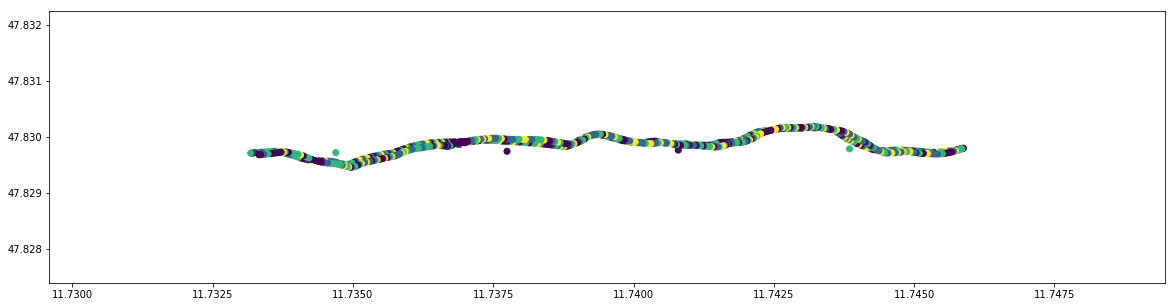

[['score_name', 'score_result'], ['adjusted_rand_score', 0.00618813166071411], ['adjusted_mutual_info_score', 0.006603118738397114], ['homogeneity_score', 0.012818235041217575], ['completeness_score', 0.008466708062293691], ['v_measure_score', 0.010197655069131851], ['fowlkes_mallows_score', 0.34490740514569845], ['silhouette_score', -0.016147740966786926], ['davies_bouldin_score', 7.1490947021882345], ['calinski_harabasz_score', 7.519788200722575]]

---- Fidcec ----
input_shape (52, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
______________________________________________

saving model to: results/dcec_model_1495.h5
saving model to: results/dcec_model_1610.h5
saving model to: results/dcec_model_1725.h5
saving model to: results/dcec_model_1840.h5
saving model to: results/dcec_model_1955.h5
saving model to: results/dcec_model_2070.h5
saving model to: results/dcec_model_2185.h5
saving model to: results/dcec_model_2300.h5
saving model to: results/dcec_model_2415.h5
saving model to: results/dcec_model_2530.h5
saving model to: results/dcec_model_2645.h5
saving model to: results/dcec_model_2760.h5
saving model to: results/dcec_model_2875.h5
saving model to: results/dcec_model_2990.h5
saving model to: results/dcec_model_3105.h5
saving model to: results/dcec_model_3220.h5
saving model to: results/dcec_model_3335.h5
delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.
saving model to: results/dcec_model_final.h5
Pretrain time:   9.5367431640625e-07
Clustering time: 120.36899614334106
Total time:      120.36899709701538
Fidcec
y (array([0, 

<Figure size 1200x400 with 0 Axes>

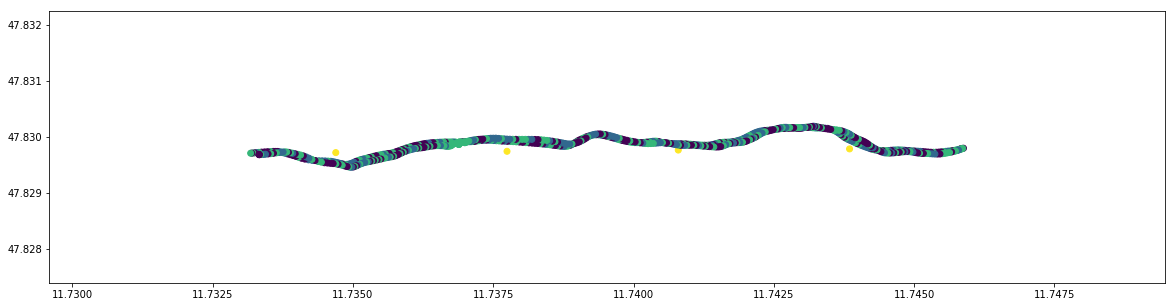

[['score_name', 'score_result'], ['adjusted_rand_score', 0.007895330000722761], ['adjusted_mutual_info_score', 0.015019534711179703], ['homogeneity_score', 0.021408700871038973], ['completeness_score', 0.01735465121491851], ['v_measure_score', 0.019169680463006128], ['fowlkes_mallows_score', 0.394253380831754], ['silhouette_score', -0.26181274072556887], ['davies_bouldin_score', 6.957610035269017], ['calinski_harabasz_score', 5.661885492682541]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3], dtype=int32), array([121, 156, 129, 330]))


<Figure size 1200x400 with 0 Axes>

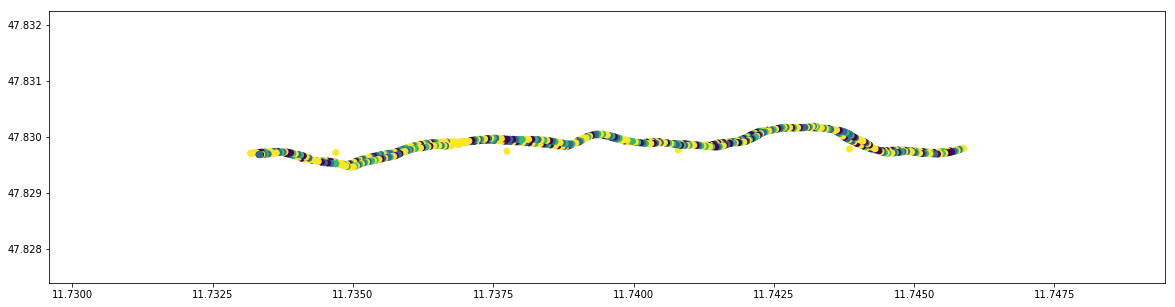

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0009118402609078896], ['adjusted_mutual_info_score', 0.0076537653613780714], ['homogeneity_score', 0.0138086434371127], ['completeness_score', 0.009673770075897752], ['v_measure_score', 0.01137716458290556], ['fowlkes_mallows_score', 0.37012817750983956], ['silhouette_score', 0.014839952141590508], ['davies_bouldin_score', 6.279618711503606], ['calinski_harabasz_score', 9.298691976059336]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3], dtype=int32), array([579,   4,  89,  64]))


<Figure size 1200x400 with 0 Axes>

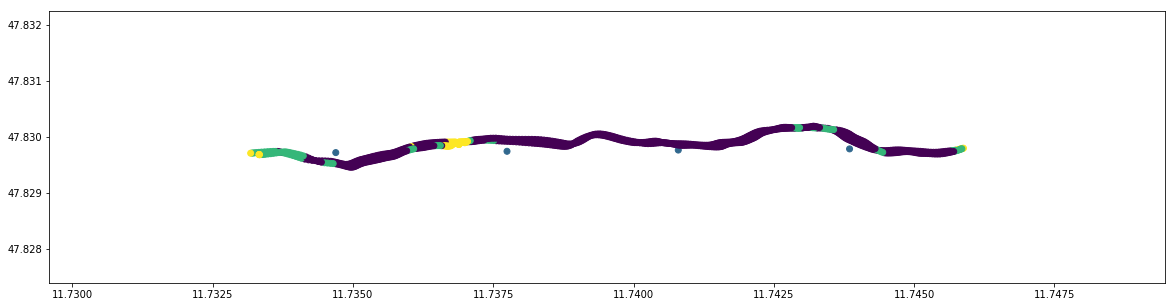

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09108222259608509], ['adjusted_mutual_info_score', 0.087848401189425], ['homogeneity_score', 0.08152504438480408], ['completeness_score', 0.10761011572250155], ['v_measure_score', 0.09276878456182908], ['fowlkes_mallows_score', 0.5810527142892562], ['silhouette_score', 0.4035727850891885], ['davies_bouldin_score', 0.8754850664256638], ['calinski_harabasz_score', 576.1507792764975]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 25
clusters: 4
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

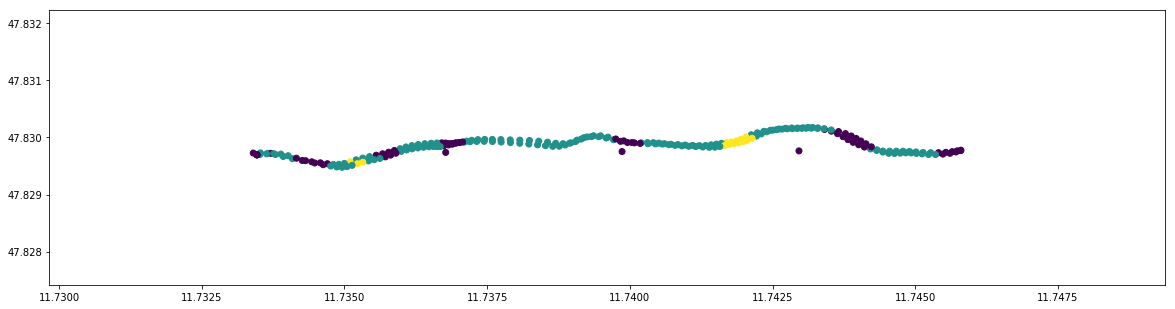


---- Dec ----
...Pretraining...
Pretraining time: 32s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 4)                 40        
Total params: 1,501,050
Trainable

<Figure size 1200x400 with 0 Axes>

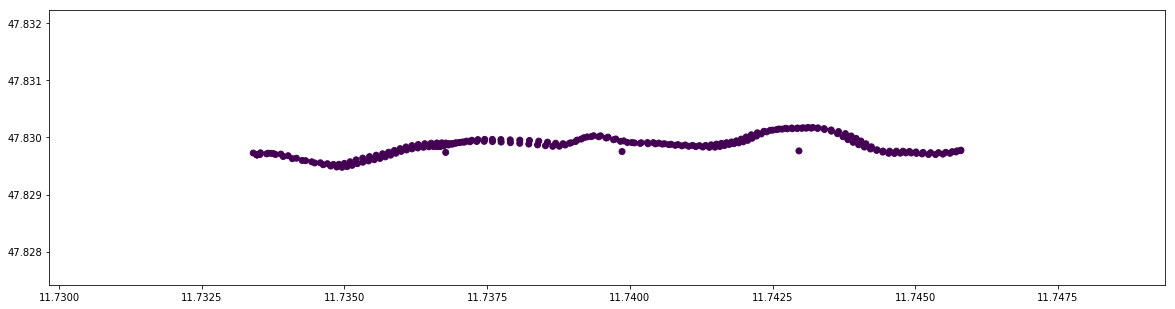

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0], ['adjusted_mutual_info_score', 6.143160615060988e-16], ['homogeneity_score', 3.071580307530494e-16], ['completeness_score', 1.0], ['v_measure_score', 6.143160615060987e-16], ['fowlkes_mallows_score', 0.7112095781324128], ['silhouette_score', 0], ['davies_bouldin_score', 0], ['calinski_harabasz_score', 0]]

---- Fidec ----
...Pretraining...
Pretraining time: 35s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)          228500      input[0][0]                      
________________________

<Figure size 1200x400 with 0 Axes>

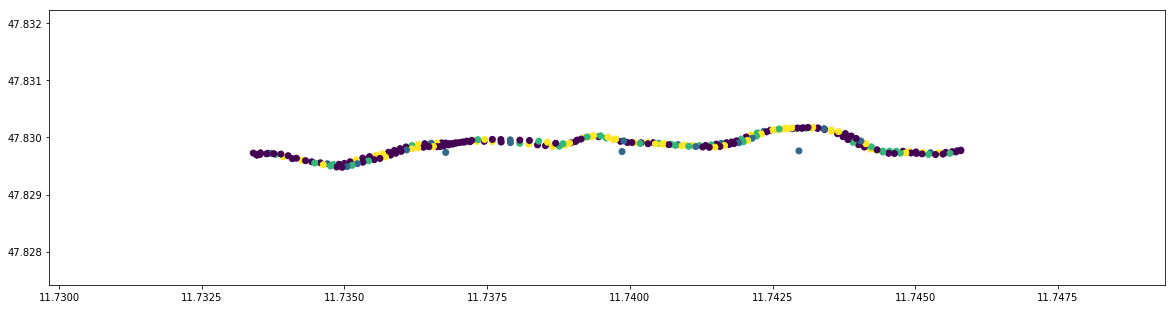

[['score_name', 'score_result'], ['adjusted_rand_score', -0.013928603995238547], ['adjusted_mutual_info_score', 0.018473102590038242], ['homogeneity_score', 0.0390474305899503], ['completeness_score', 0.026619551909597382], ['v_measure_score', 0.031657465166234564], ['fowlkes_mallows_score', 0.4122939679976819], ['silhouette_score', -0.016669472630847962], ['davies_bouldin_score', 7.633499254741585], ['calinski_harabasz_score', 1.8389955617674068]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
________________________________________________

<Figure size 1200x400 with 0 Axes>

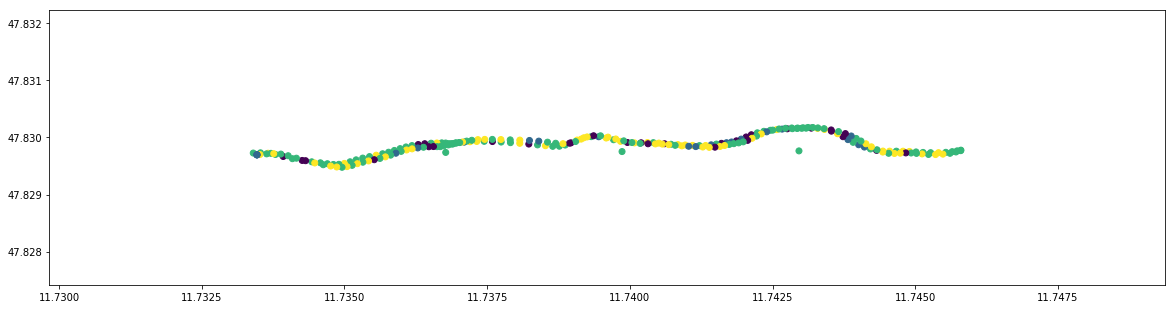

[['score_name', 'score_result'], ['adjusted_rand_score', 0.008160682409170622], ['adjusted_mutual_info_score', 0.01056259476589539], ['homogeneity_score', 0.029425611331867513], ['completeness_score', 0.02013974879988287], ['v_measure_score', 0.023912846347995263], ['fowlkes_mallows_score', 0.4250722952373551], ['silhouette_score', 0.007767728766095379], ['davies_bouldin_score', 8.158531576695648], ['calinski_harabasz_score', 1.800229182222374]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

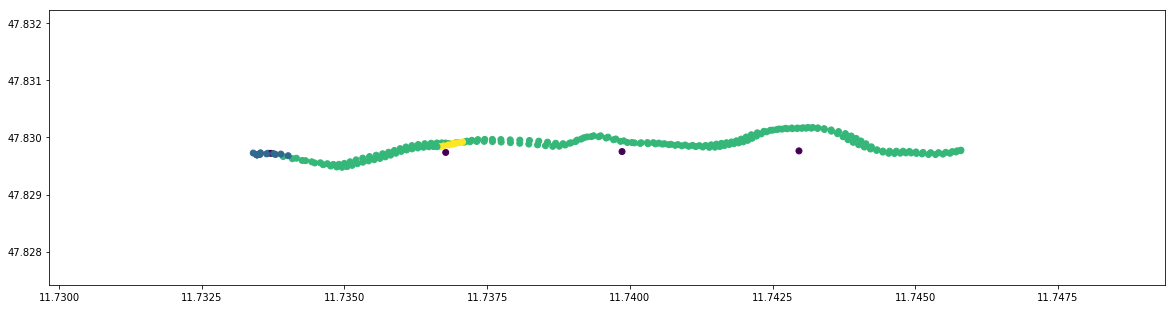

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09439120659624266], ['adjusted_mutual_info_score', 0.08258492320546867], ['homogeneity_score', 0.08031845368990234], ['completeness_score', 0.14018536909304874], ['v_measure_score', 0.10212496031495072], ['fowlkes_mallows_score', 0.6695665938227914], ['silhouette_score', -0.21206381859955026], ['davies_bouldin_score', 6.215357350686759], ['calinski_harabasz_score', 0.7991287950565031]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3], dtype=int32), array([  1, 221,   8,   9]))


<Figure size 1200x400 with 0 Axes>

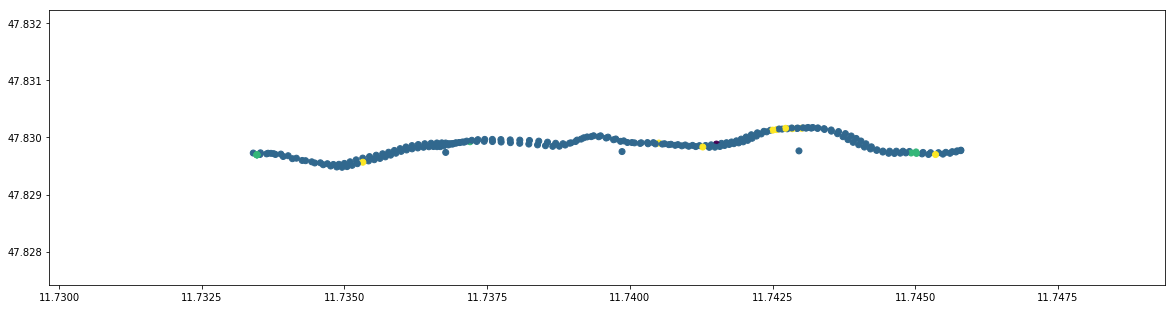

[['score_name', 'score_result'], ['adjusted_rand_score', -0.015151233793088153], ['adjusted_mutual_info_score', 0.0126131735766669], ['homogeneity_score', 0.0241837368578016], ['completeness_score', 0.05914900574039879], ['v_measure_score', 0.034330899131052764], ['fowlkes_mallows_score', 0.6526928391960788], ['silhouette_score', 0.03435775708455554], ['davies_bouldin_score', 3.2123502133410113], ['calinski_harabasz_score', 1.9945524944002384]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3], dtype=int32), array([212,   4,  10,  13]))


<Figure size 1200x400 with 0 Axes>

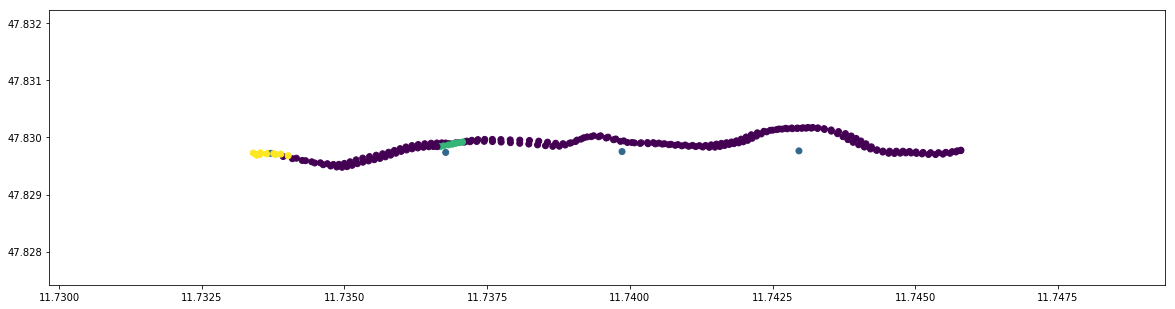

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09439120659624266], ['adjusted_mutual_info_score', 0.08258492320546866], ['homogeneity_score', 0.08031845368990234], ['completeness_score', 0.14018536909304874], ['v_measure_score', 0.10212496031495072], ['fowlkes_mallows_score', 0.6695665938227914], ['silhouette_score', 0.6256593414795306], ['davies_bouldin_score', 0.6670475697527218], ['calinski_harabasz_score', 354.17691303656056]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 75
clusters: 4
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

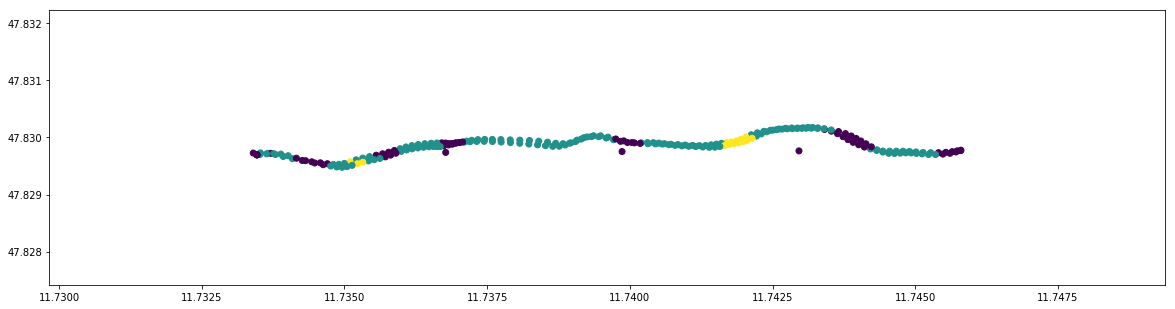


---- Dec ----
...Pretraining...
Pretraining time: 33s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 4)                 40        
Total params: 1,501,050
Trainable

<Figure size 1200x400 with 0 Axes>

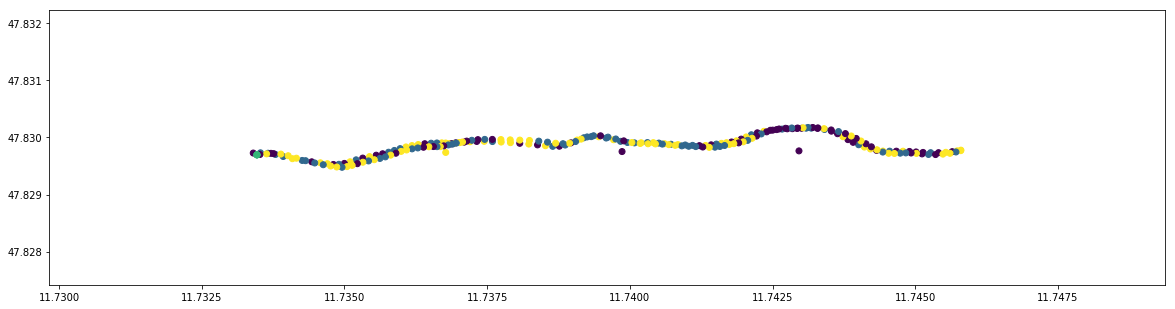

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0075290482520521665], ['adjusted_mutual_info_score', 0.0204400342962669], ['homogeneity_score', 0.04048700794752838], ['completeness_score', 0.02832975172399395], ['v_measure_score', 0.033334521668142235], ['fowlkes_mallows_score', 0.4080851904310484], ['silhouette_score', -0.011308537406261834], ['davies_bouldin_score', 6.440801436147308], ['calinski_harabasz_score', 2.664890966170391]]

---- Fidec ----
...Pretraining...
Pretraining time: 33s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)

<Figure size 1200x400 with 0 Axes>

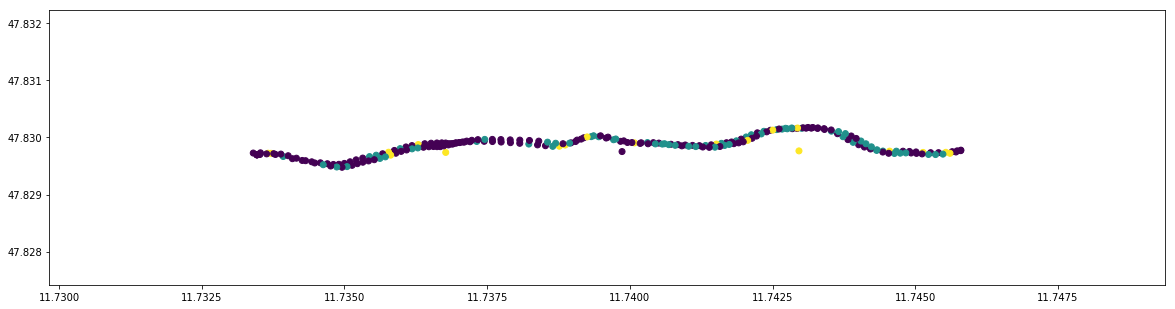

[['score_name', 'score_result'], ['adjusted_rand_score', -0.008656166027776578], ['adjusted_mutual_info_score', 0.0008804072348481241], ['homogeneity_score', 0.011927794361188522], ['completeness_score', 0.011599880387302804], ['v_measure_score', 0.011761552244596877], ['fowlkes_mallows_score', 0.49798224082552894], ['silhouette_score', -0.006083618499816458], ['davies_bouldin_score', 8.340262853731756], ['calinski_harabasz_score', 1.6977513425501616]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
____________________________________________

<Figure size 1200x400 with 0 Axes>

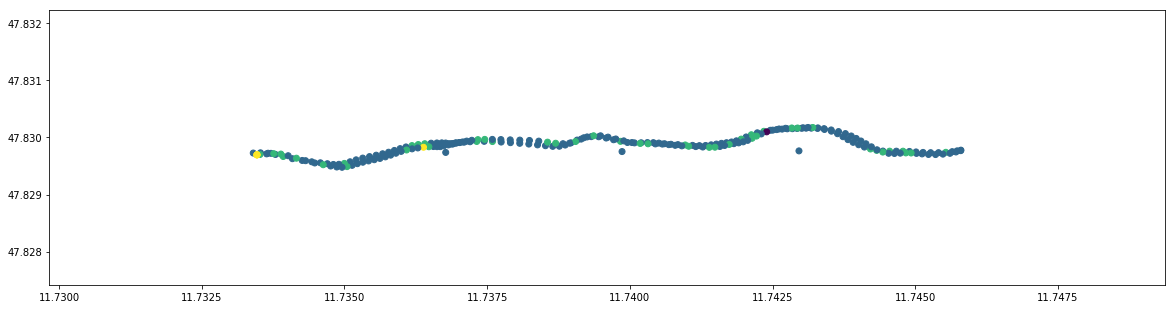

[['score_name', 'score_result'], ['adjusted_rand_score', -0.029090991075429194], ['adjusted_mutual_info_score', 0.030131246947684844], ['homogeneity_score', 0.04095227719887325], ['completeness_score', 0.05486674134816699], ['v_measure_score', 0.04689920716701852], ['fowlkes_mallows_score', 0.5622031295964491], ['silhouette_score', 0.001014351042572262], ['davies_bouldin_score', 5.558242042775802], ['calinski_harabasz_score', 2.0073035349138055]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
________________________________________________

<Figure size 1200x400 with 0 Axes>

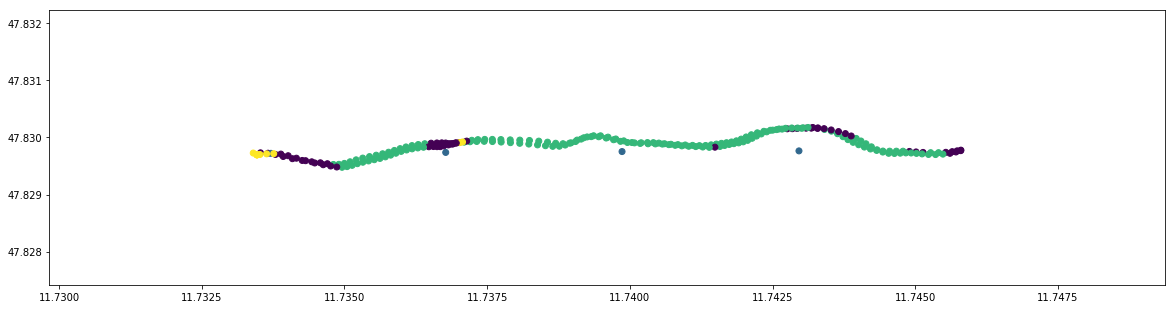

[['score_name', 'score_result'], ['adjusted_rand_score', 0.1406556512852833], ['adjusted_mutual_info_score', 0.11059049797487543], ['homogeneity_score', 0.12452739272909828], ['completeness_score', 0.12595806213074626], ['v_measure_score', 0.12523864173373295], ['fowlkes_mallows_score', 0.5897446435960404], ['silhouette_score', -0.18610269234161808], ['davies_bouldin_score', 9.181518681098204], ['calinski_harabasz_score', 1.03059279469935]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3], dtype=int32), array([199,  14,  18,   8]))


<Figure size 1200x400 with 0 Axes>

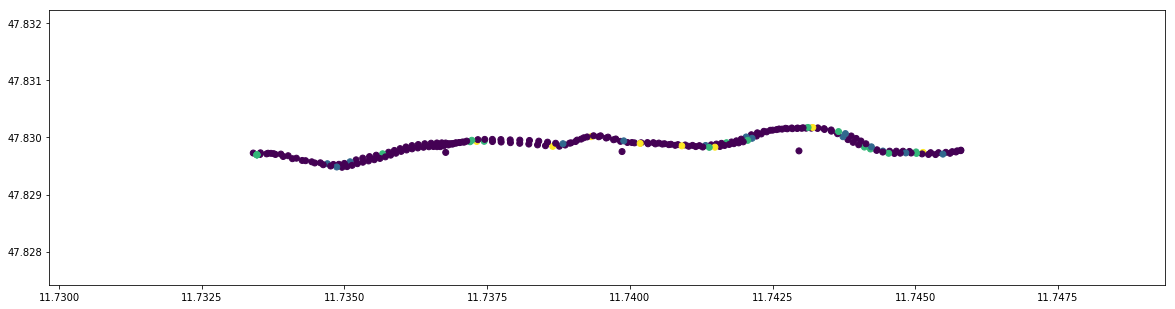

[['score_name', 'score_result'], ['adjusted_rand_score', 0.06292072048293845], ['adjusted_mutual_info_score', 0.01368956869195649], ['homogeneity_score', 0.028967759491222024], ['completeness_score', 0.03756189945686095], ['v_measure_score', 0.0327097443968233], ['fowlkes_mallows_score', 0.6222693956862944], ['silhouette_score', 0.024588390525314526], ['davies_bouldin_score', 5.0648052720040955], ['calinski_harabasz_score', 1.939575236872022]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3], dtype=int32), array([170,   4,  10,  55]))


<Figure size 1200x400 with 0 Axes>

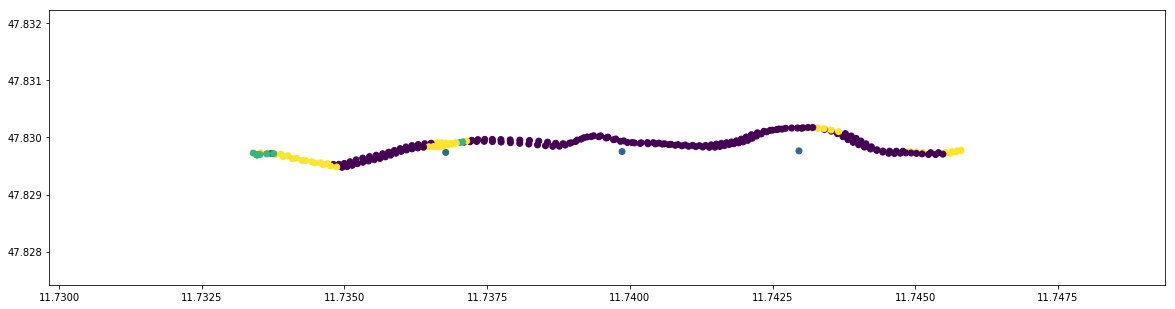

[['score_name', 'score_result'], ['adjusted_rand_score', 0.14167666539168763], ['adjusted_mutual_info_score', 0.10709290954233548], ['homogeneity_score', 0.11965493336926991], ['completeness_score', 0.12449397512028901], ['v_measure_score', 0.1220264992381137], ['fowlkes_mallows_score', 0.5982990888301402], ['silhouette_score', 0.37967633631420755], ['davies_bouldin_score', 1.0143599663481688], ['calinski_harabasz_score', 301.07362120559566]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 150
clusters: 4
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

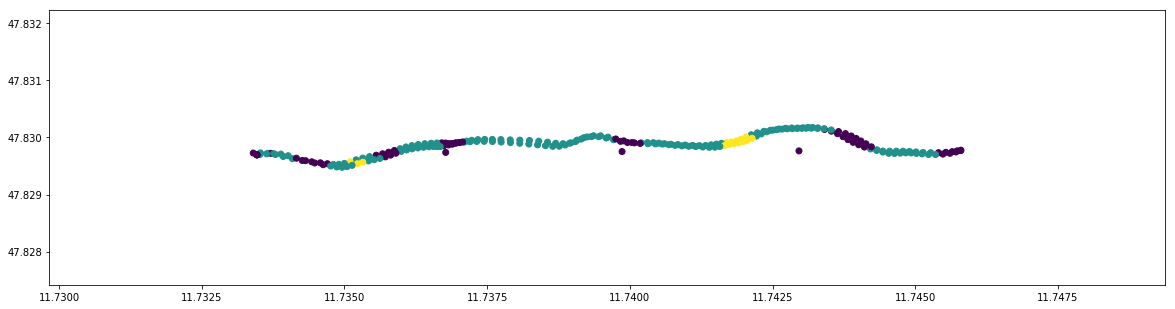


---- Dec ----
...Pretraining...
Pretraining time: 34s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 4)                 40        
Total params: 1,501,050
Trainable

<Figure size 1200x400 with 0 Axes>

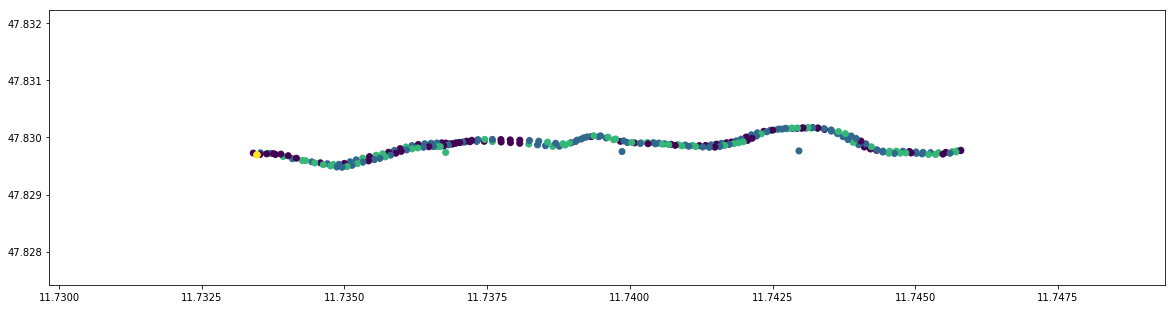

[['score_name', 'score_result'], ['adjusted_rand_score', 0.016936530165921743], ['adjusted_mutual_info_score', 0.012327574151475488], ['homogeneity_score', 0.03068923429683557], ['completeness_score', 0.02169720888071532], ['v_measure_score', 0.02542149023826068], ['fowlkes_mallows_score', 0.4189097418438702], ['silhouette_score', -0.012412879418499107], ['davies_bouldin_score', 6.288641259420207], ['calinski_harabasz_score', 2.718462164759126]]

---- Fidec ----
...Pretraining...
Pretraining time: 34s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)

<Figure size 1200x400 with 0 Axes>

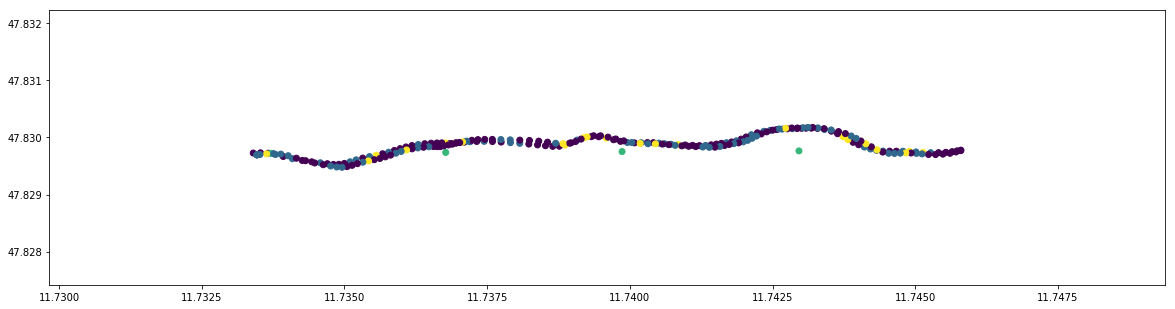

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0072780207090277745], ['adjusted_mutual_info_score', 0.03486334701653958], ['homogeneity_score', 0.05421878704948172], ['completeness_score', 0.044934884274422014], ['v_measure_score', 0.04914220298730686], ['fowlkes_mallows_score', 0.47028606881260476], ['silhouette_score', -0.19366682053077394], ['davies_bouldin_score', 7.460518024268708], ['calinski_harabasz_score', 1.3242377027190126]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

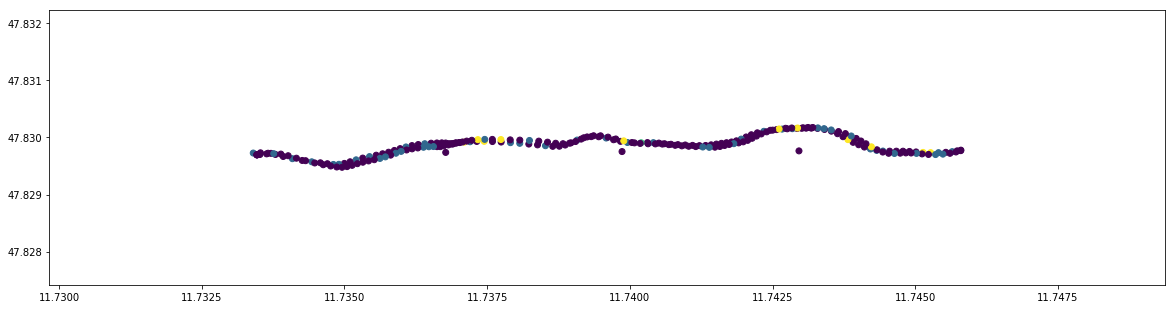

[['score_name', 'score_result'], ['adjusted_rand_score', -0.050242978080218235], ['adjusted_mutual_info_score', 0.0015464632529569938], ['homogeneity_score', 0.01674255109053515], ['completeness_score', 0.019508843549300974], ['v_measure_score', 0.018020151394810183], ['fowlkes_mallows_score', 0.5311969223135254], ['silhouette_score', 0.016821830860160727], ['davies_bouldin_score', 6.242986794430262], ['calinski_harabasz_score', 1.4832374610151262]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_____________________________________________

<Figure size 1200x400 with 0 Axes>

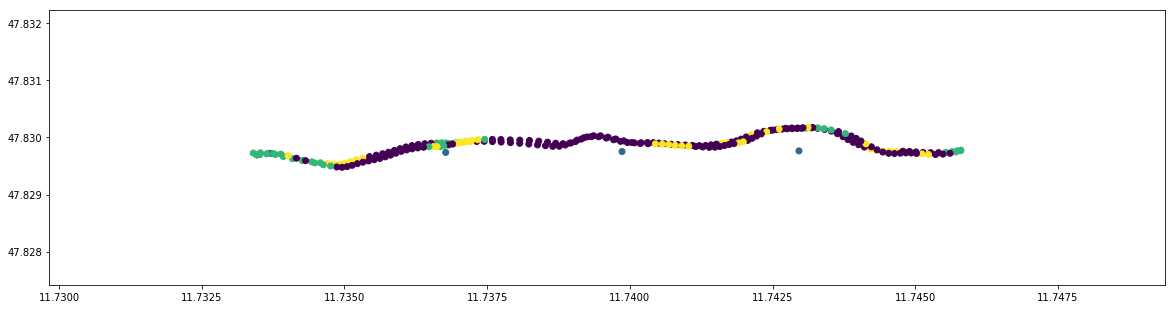

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07139128902443137], ['adjusted_mutual_info_score', 0.07791151028340829], ['homogeneity_score', 0.1006291810131434], ['completeness_score', 0.08398887706745256], ['v_measure_score', 0.0915591031709551], ['fowlkes_mallows_score', 0.5171559220366496], ['silhouette_score', -0.19335141331286337], ['davies_bouldin_score', 8.942805358452567], ['calinski_harabasz_score', 0.8839519186297353]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3], dtype=int32), array([57, 31, 52, 99]))


<Figure size 1200x400 with 0 Axes>

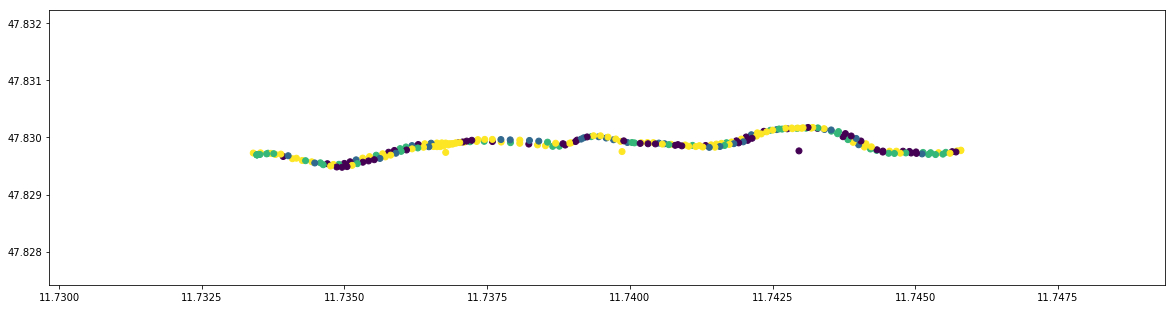

[['score_name', 'score_result'], ['adjusted_rand_score', -0.0029303381613052827], ['adjusted_mutual_info_score', 0.0018794886790478402], ['homogeneity_score', 0.01877289386669039], ['completeness_score', 0.01171068897791463], ['v_measure_score', 0.01442373243387433], ['fowlkes_mallows_score', 0.380845103232573], ['silhouette_score', 0.0005919228015641137], ['davies_bouldin_score', 7.723274205292458], ['calinski_harabasz_score', 2.018652044340031]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3], dtype=int32), array([150,   4,  45,  40]))


<Figure size 1200x400 with 0 Axes>

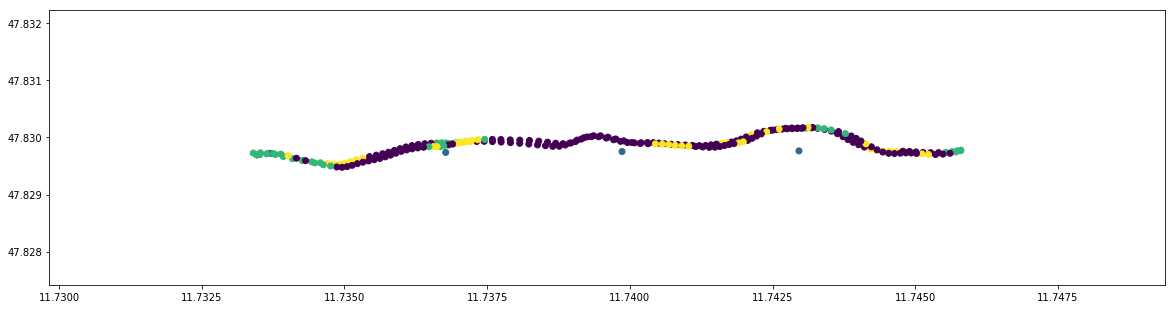

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07139128902443137], ['adjusted_mutual_info_score', 0.07791151028340829], ['homogeneity_score', 0.1006291810131434], ['completeness_score', 0.08398887706745256], ['v_measure_score', 0.0915591031709551], ['fowlkes_mallows_score', 0.5171559220366496], ['silhouette_score', 0.43464676822794895], ['davies_bouldin_score', 0.8504910971603472], ['calinski_harabasz_score', 269.26223306143424]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 25
clusters: 4
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

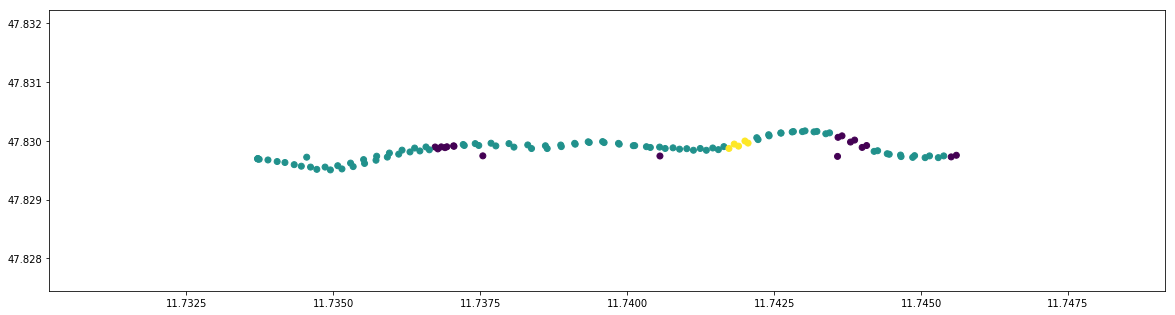


---- Dec ----
...Pretraining...
Pretraining time: 35s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 4)                 40        
Total params: 1,723,050
Trainable

<Figure size 1200x400 with 0 Axes>

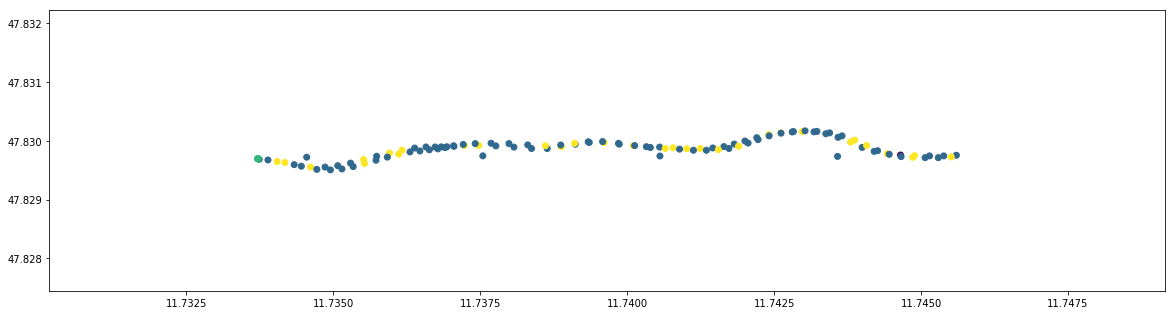

[['score_name', 'score_result'], ['adjusted_rand_score', -0.05533460258955372], ['adjusted_mutual_info_score', -0.016863611285847898], ['homogeneity_score', 0.0193627061220559], ['completeness_score', 0.015182357477485614], ['v_measure_score', 0.01701959674958905], ['fowlkes_mallows_score', 0.5848375443365232], ['silhouette_score', -0.00012256845098582113], ['davies_bouldin_score', 4.305336640236676], ['calinski_harabasz_score', 2.1661715913329416]]

---- Fidec ----
...Pretraining...
Pretraining time: 35s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 

<Figure size 1200x400 with 0 Axes>

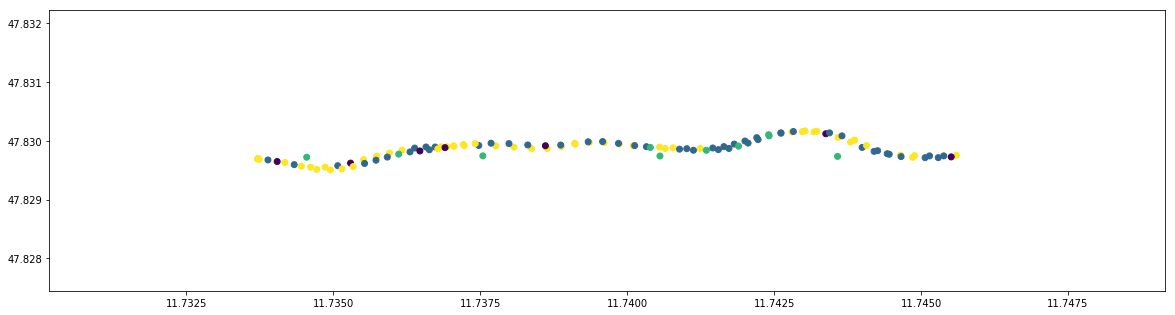

[['score_name', 'score_result'], ['adjusted_rand_score', 0.04352951098830484], ['adjusted_mutual_info_score', 0.03524809974110971], ['homogeneity_score', 0.09527678047844514], ['completeness_score', 0.05146511019954187], ['v_measure_score', 0.06683067778567624], ['fowlkes_mallows_score', 0.5234625165500748], ['silhouette_score', -0.03588159398147742], ['davies_bouldin_score', 6.303854052468215], ['calinski_harabasz_score', 1.243936317408846]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
______________________________________________________

<Figure size 1200x400 with 0 Axes>

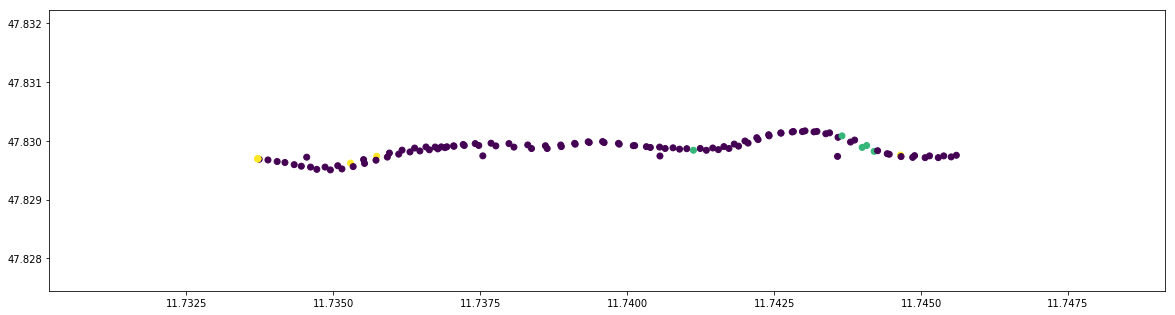

[['score_name', 'score_result'], ['adjusted_rand_score', 0.031799982278733284], ['adjusted_mutual_info_score', 0.040027186915083605], ['homogeneity_score', 0.06122267973465775], ['completeness_score', 0.09160851877880372], ['v_measure_score', 0.07339494894646238], ['fowlkes_mallows_score', 0.7457207920558351], ['silhouette_score', 0.011936631450734968], ['davies_bouldin_score', 3.4701744247990387], ['calinski_harabasz_score', 1.828313147239549]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

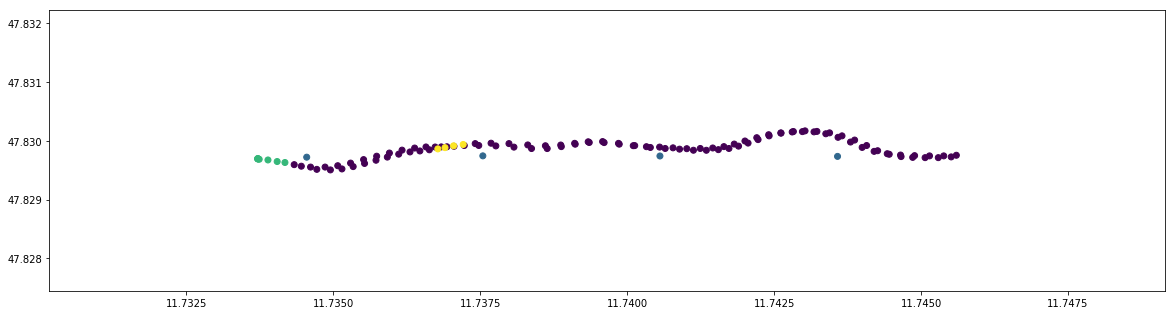

[['score_name', 'score_result'], ['adjusted_rand_score', 0.13977760019289842], ['adjusted_mutual_info_score', 0.10261578161587981], ['homogeneity_score', 0.13515027857644904], ['completeness_score', 0.1495898243017099], ['v_measure_score', 0.1420039272460972], ['fowlkes_mallows_score', 0.7508023600401704], ['silhouette_score', -0.14377665603709272], ['davies_bouldin_score', 4.229870016031493], ['calinski_harabasz_score', 1.0288093663696447]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3], dtype=int32), array([112,   1,   4,   1]))


<Figure size 1200x400 with 0 Axes>

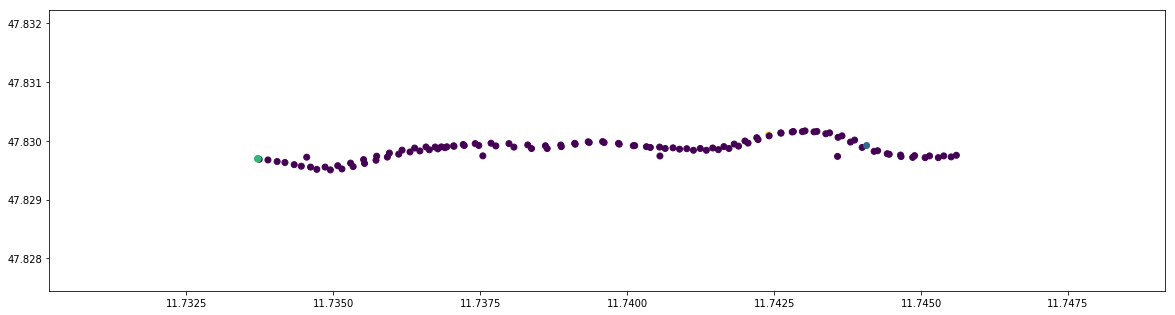

[['score_name', 'score_result'], ['adjusted_rand_score', -0.011515181561287311], ['adjusted_mutual_info_score', 0.017566336257851284], ['homogeneity_score', 0.04229853613702753], ['completeness_score', 0.10273268551206957], ['v_measure_score', 0.05992423095076662], ['fowlkes_mallows_score', 0.7746728687080802], ['silhouette_score', -0.002512862434447629], ['davies_bouldin_score', 0.9683493936455234], ['calinski_harabasz_score', 1.9927316233275525]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3], dtype=int32), array([102,   4,   4,   8]))


<Figure size 1200x400 with 0 Axes>

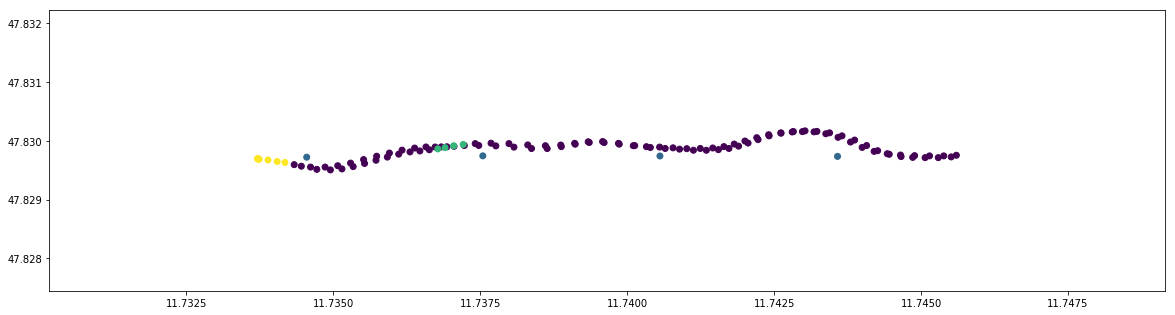

[['score_name', 'score_result'], ['adjusted_rand_score', 0.13977760019289842], ['adjusted_mutual_info_score', 0.10261578161587981], ['homogeneity_score', 0.13515027857644904], ['completeness_score', 0.1495898243017099], ['v_measure_score', 0.1420039272460972], ['fowlkes_mallows_score', 0.7508023600401704], ['silhouette_score', 0.6658650203008316], ['davies_bouldin_score', 0.369623337435511], ['calinski_harabasz_score', 299.8363223496855]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 75
clusters: 4
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

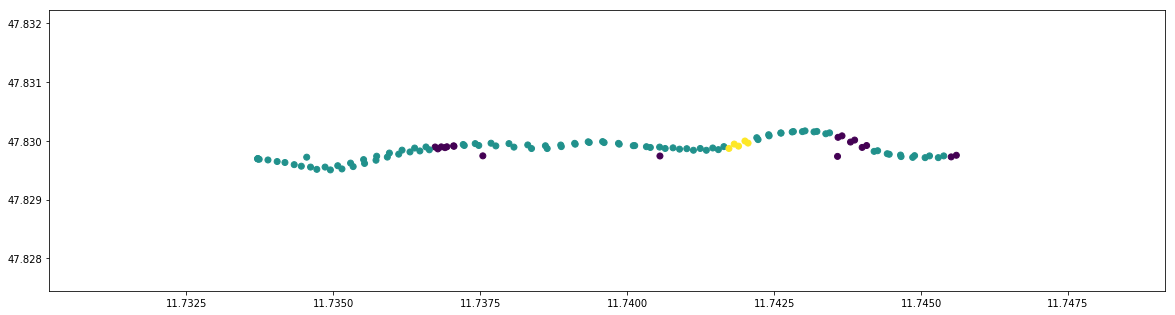


---- Dec ----
...Pretraining...
Pretraining time: 36s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 4)                 40        
Total params: 1,723,050
Trainable

<Figure size 1200x400 with 0 Axes>

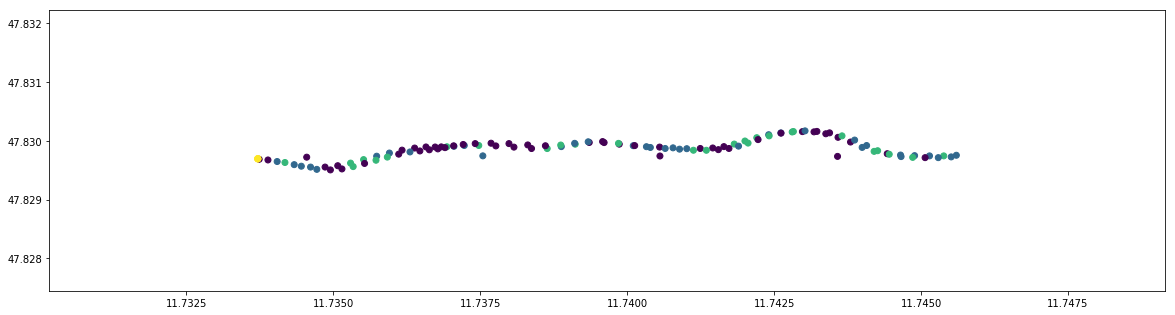

[['score_name', 'score_result'], ['adjusted_rand_score', -0.008955822311321868], ['adjusted_mutual_info_score', 0.0019686081792620264], ['homogeneity_score', 0.04854652877359896], ['completeness_score', 0.02462219540271571], ['v_measure_score', 0.03267303430648173], ['fowlkes_mallows_score', 0.46505403011392143], ['silhouette_score', -0.0008316093095796356], ['davies_bouldin_score', 5.763229808746614], ['calinski_harabasz_score', 2.1212811021537346]]

---- Fidec ----
...Pretraining...
Pretraining time: 36s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None,

<Figure size 1200x400 with 0 Axes>

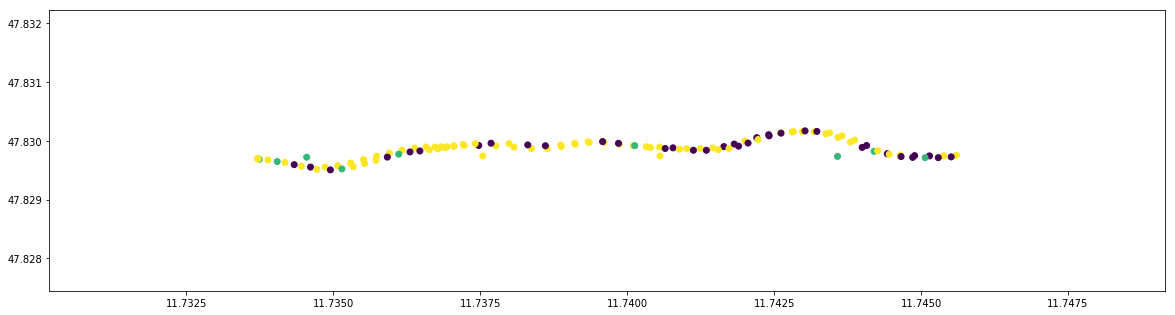

[['score_name', 'score_result'], ['adjusted_rand_score', -0.02799540114841877], ['adjusted_mutual_info_score', 0.00043729552497082097], ['homogeneity_score', 0.032074037985805964], ['completeness_score', 0.02248036008668137], ['v_measure_score', 0.02643364967190224], ['fowlkes_mallows_score', 0.5564194079390324], ['silhouette_score', -0.003328354761277802], ['davies_bouldin_score', 6.950697423889875], ['calinski_harabasz_score', 1.2814060541747794]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_______________________________________________

<Figure size 1200x400 with 0 Axes>

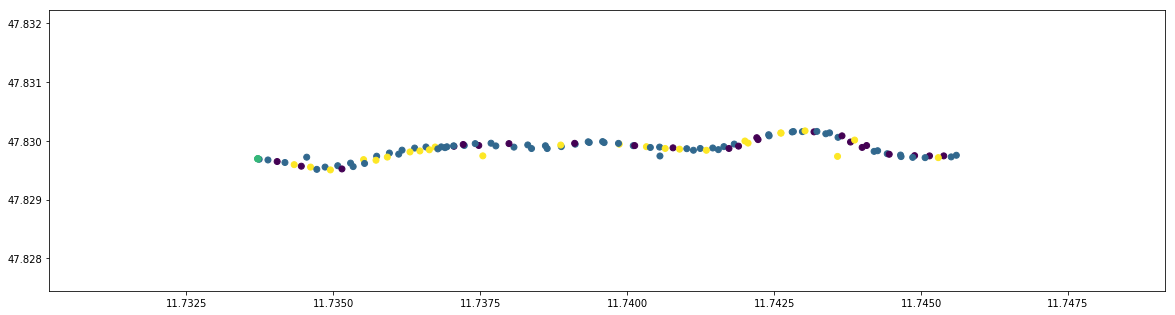

[['score_name', 'score_result'], ['adjusted_rand_score', 0.04217080512427569], ['adjusted_mutual_info_score', -0.002174968284578574], ['homogeneity_score', 0.04282727334431734], ['completeness_score', 0.02345118772577991], ['v_measure_score', 0.030306992973740215], ['fowlkes_mallows_score', 0.5345539094151842], ['silhouette_score', -0.0022076377521406845], ['davies_bouldin_score', 5.852676862390888], ['calinski_harabasz_score', 1.9624141174057417]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
______________________________________________

<Figure size 1200x400 with 0 Axes>

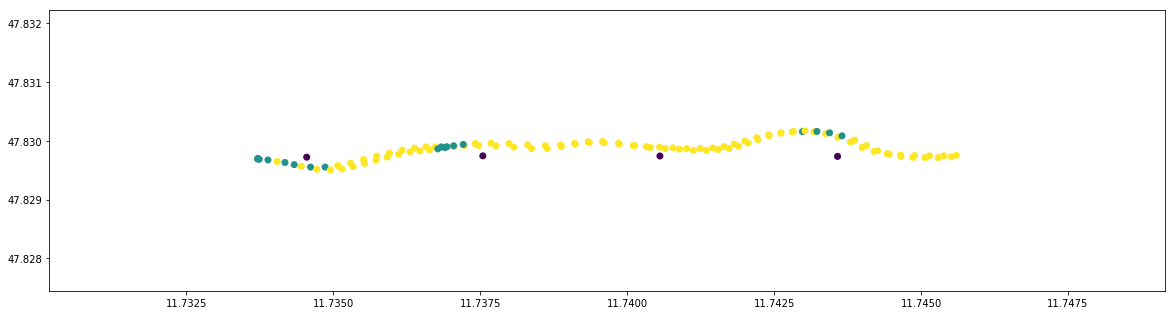

[['score_name', 'score_result'], ['adjusted_rand_score', 0.16483887760977303], ['adjusted_mutual_info_score', 0.07363231380615974], ['homogeneity_score', 0.10102130408169936], ['completeness_score', 0.10078793990160549], ['v_measure_score', 0.10090448706512609], ['fowlkes_mallows_score', 0.7210599129515887], ['silhouette_score', -0.11244435882783149], ['davies_bouldin_score', 5.801769367303835], ['calinski_harabasz_score', 0.9233213654555352]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3], dtype=int32), array([112,   1,   1,   4]))


<Figure size 1200x400 with 0 Axes>

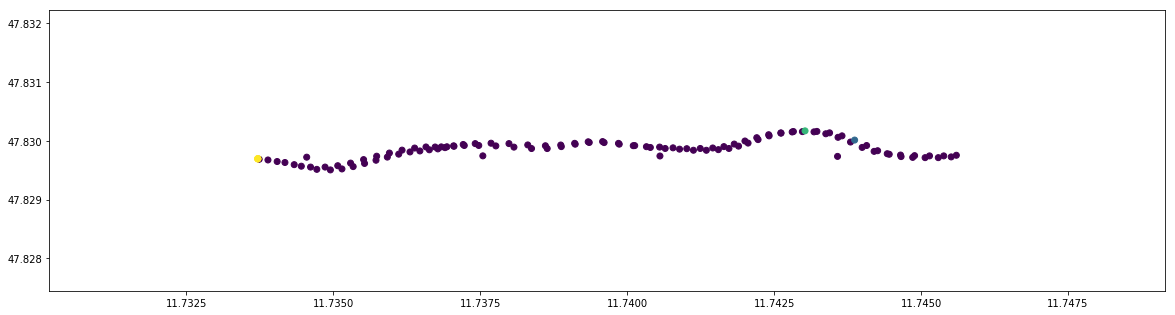

[['score_name', 'score_result'], ['adjusted_rand_score', -0.011515181561287311], ['adjusted_mutual_info_score', 0.017566336257851284], ['homogeneity_score', 0.04229853613702753], ['completeness_score', 0.10273268551206957], ['v_measure_score', 0.05992423095076662], ['fowlkes_mallows_score', 0.7746728687080802], ['silhouette_score', -0.0026643032498507068], ['davies_bouldin_score', 0.9881523172455728], ['calinski_harabasz_score', 1.9131075720381576]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3], dtype=int32), array([ 8,  4, 31, 75]))


<Figure size 1200x400 with 0 Axes>

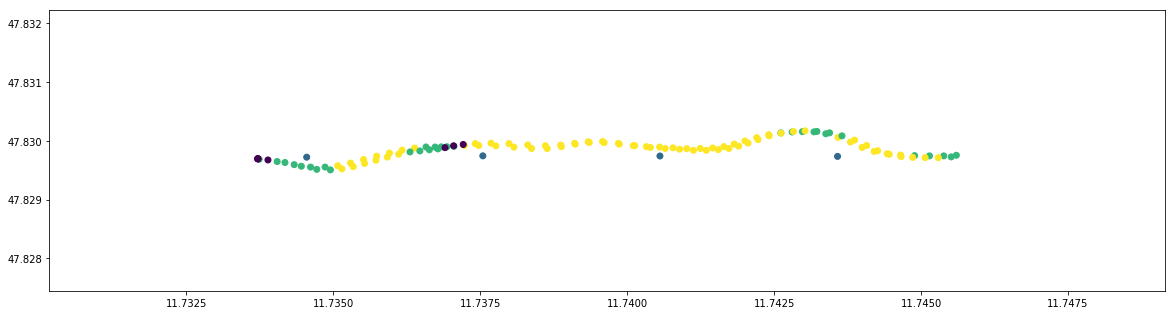

[['score_name', 'score_result'], ['adjusted_rand_score', 0.11674354406785668], ['adjusted_mutual_info_score', 0.07198336553429052], ['homogeneity_score', 0.13404989121042618], ['completeness_score', 0.0852240259203913], ['v_measure_score', 0.10420091502563293], ['fowlkes_mallows_score', 0.6165598339765143], ['silhouette_score', 0.3611294962951726], ['davies_bouldin_score', 0.964425014383405], ['calinski_harabasz_score', 252.3211293090303]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 150
clusters: 4
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

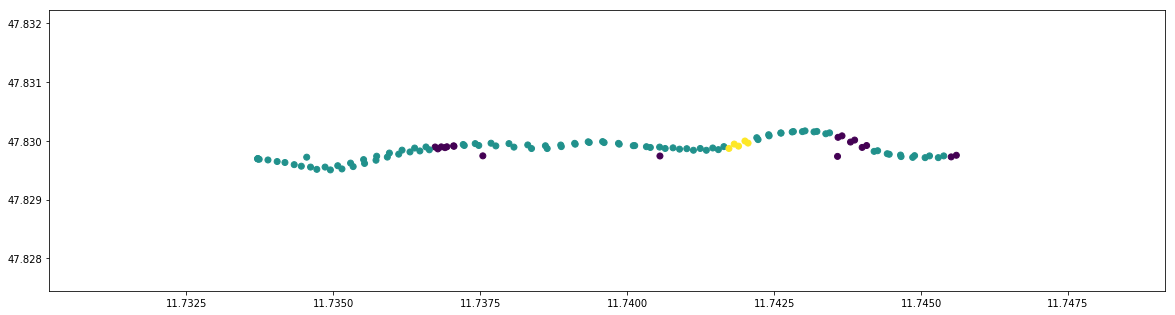


---- Dec ----
...Pretraining...
Pretraining time: 36s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 4)                 40        
Total params: 1,723,050
Trainable

<Figure size 1200x400 with 0 Axes>

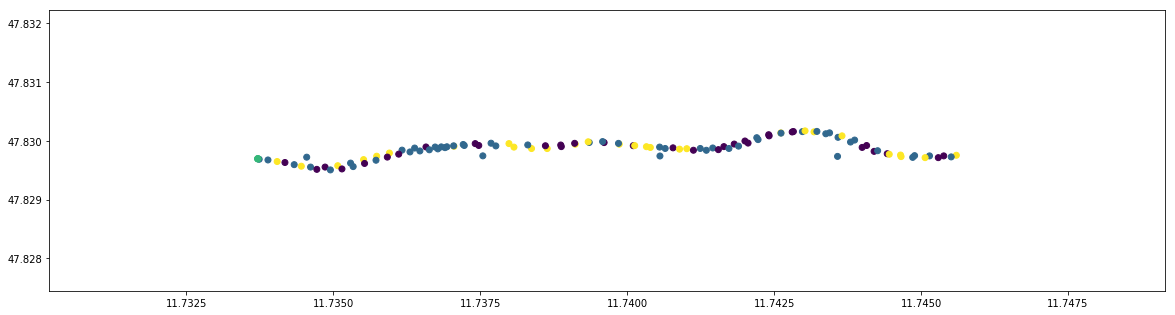

[['score_name', 'score_result'], ['adjusted_rand_score', -0.03238116122640576], ['adjusted_mutual_info_score', 0.02607597406422777], ['homogeneity_score', 0.08323514838384774], ['completeness_score', 0.04228375632920384], ['v_measure_score', 0.0560791179676663], ['fowlkes_mallows_score', 0.452468479890782], ['silhouette_score', 2.1628469931563058e-05], ['davies_bouldin_score', 5.651352343370474], ['calinski_harabasz_score', 2.1455007287961756]]

---- Fidec ----
...Pretraining...
Pretraining time: 36s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500) 

<Figure size 1200x400 with 0 Axes>

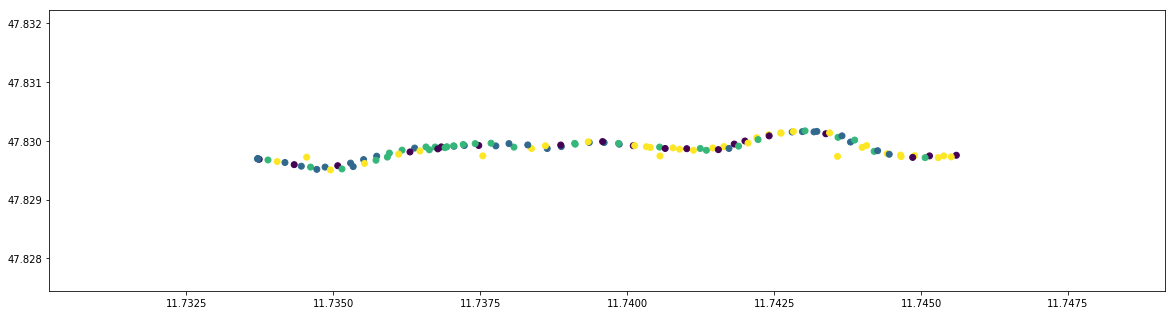

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0025161910305684875], ['adjusted_mutual_info_score', -0.016902489710021115], ['homogeneity_score', 0.022168545021340018], ['completeness_score', 0.009667925018921978], ['v_measure_score', 0.013464044900321345], ['fowlkes_mallows_score', 0.41416563121697003], ['silhouette_score', -0.010999328996648513], ['davies_bouldin_score', 6.884175884621593], ['calinski_harabasz_score', 1.305945436306675]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_____________________________________________

<Figure size 1200x400 with 0 Axes>

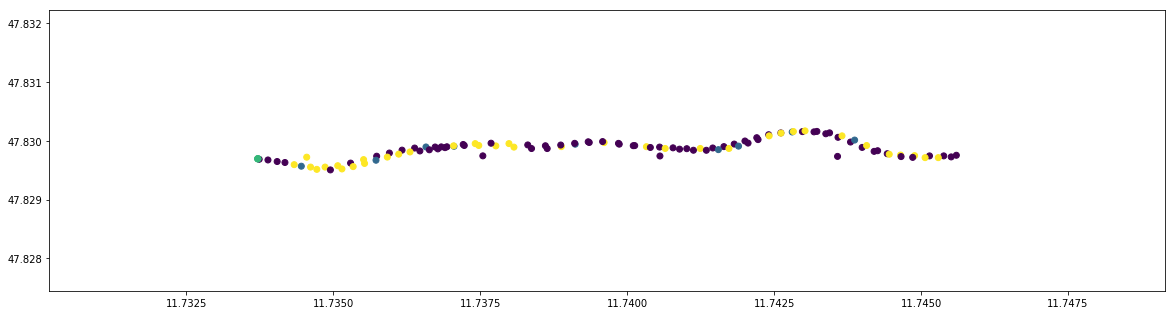

[['score_name', 'score_result'], ['adjusted_rand_score', -0.02409782284521329], ['adjusted_mutual_info_score', -0.004793682529798798], ['homogeneity_score', 0.038654647277958185], ['completeness_score', 0.023316347862172175], ['v_measure_score', 0.02908732384834006], ['fowlkes_mallows_score', 0.5297962712871149], ['silhouette_score', -0.0022988144578624382], ['davies_bouldin_score', 5.896374364838205], ['calinski_harabasz_score', 1.9131152750061515]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
____________________________________________

<Figure size 1200x400 with 0 Axes>

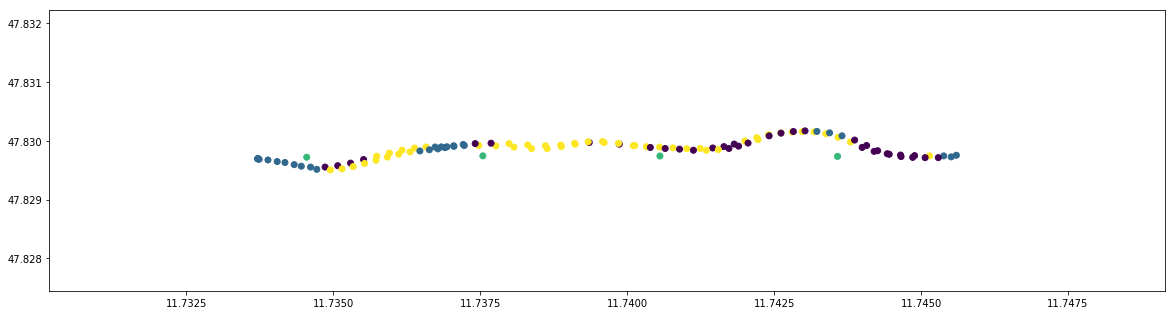

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09908662190354303], ['adjusted_mutual_info_score', 0.10371317560193156], ['homogeneity_score', 0.1959542471017809], ['completeness_score', 0.09853221307546658], ['v_measure_score', 0.13112864759116052], ['fowlkes_mallows_score', 0.5252047823889914], ['silhouette_score', -0.11188075539670203], ['davies_bouldin_score', 7.454623737434589], ['calinski_harabasz_score', 0.9261066900056059]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3], dtype=int32), array([  1, 115,   1,   1]))


<Figure size 1200x400 with 0 Axes>

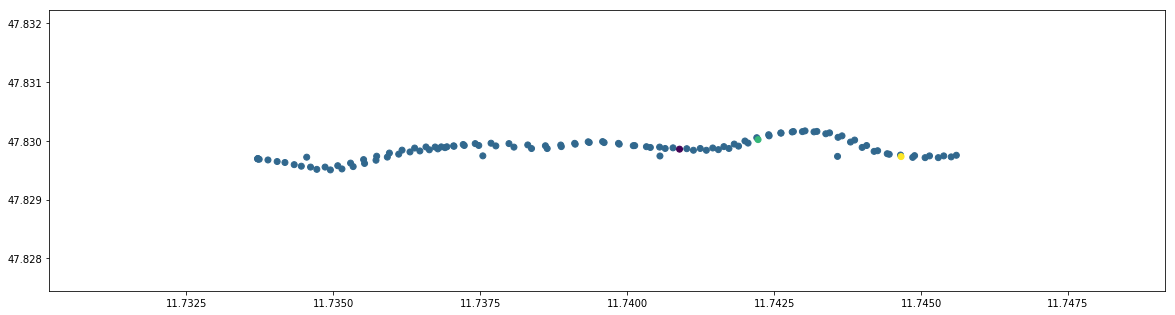

[['score_name', 'score_result'], ['adjusted_rand_score', -0.03817584871279807], ['adjusted_mutual_info_score', -0.02748082283720098], ['homogeneity_score', 0.009392860693250758], ['completeness_score', 0.038199081736583776], ['v_measure_score', 0.015078126045845368], ['fowlkes_mallows_score', 0.7895986270485195], ['silhouette_score', 0.06153074255041775], ['davies_bouldin_score', 0.8400460778469349], ['calinski_harabasz_score', 1.389106385670859]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3], dtype=int32), array([35,  4, 29, 50]))


<Figure size 1200x400 with 0 Axes>

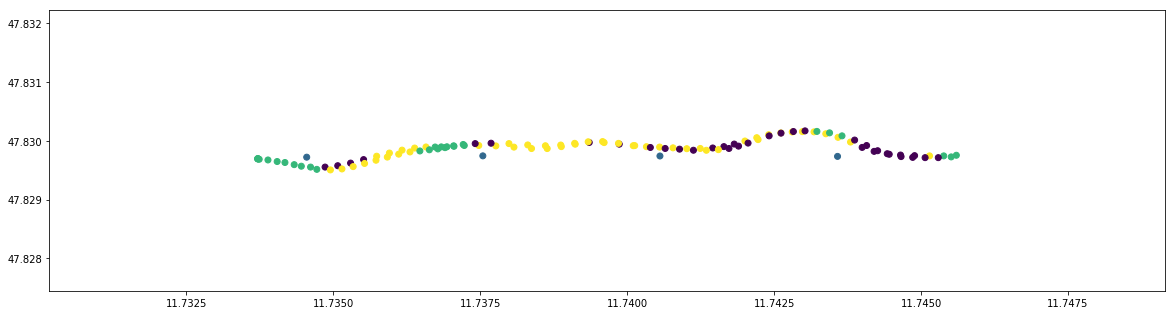

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09908662190354303], ['adjusted_mutual_info_score', 0.10371317560193156], ['homogeneity_score', 0.1959542471017809], ['completeness_score', 0.09853221307546658], ['v_measure_score', 0.13112864759116052], ['fowlkes_mallows_score', 0.5252047823889914], ['silhouette_score', 0.36479606134694326], ['davies_bouldin_score', 0.8387800577594906], ['calinski_harabasz_score', 201.71771545945225]]
----------------------------------------------------------------
window_length: 50
sub_sample_length: 25
clusters: 6
Ground truth
y (array([1., 2., 3.]), array([238, 428,  70]))


<Figure size 1200x400 with 0 Axes>

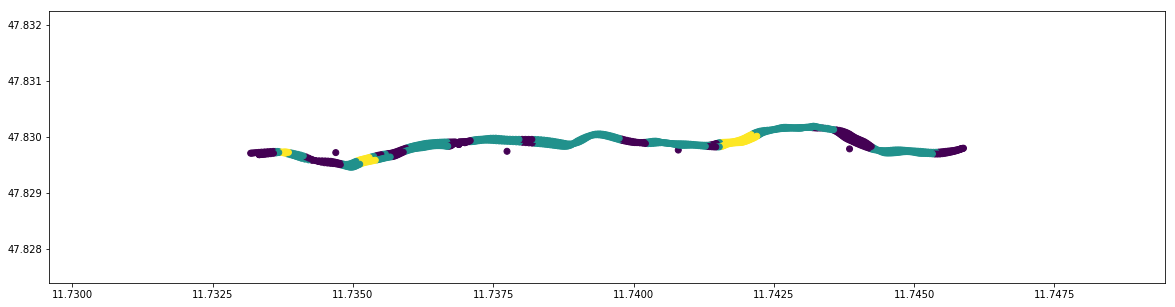


---- Dec ----
...Pretraining...
Pretraining time: 66s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 156)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               78500     
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 6)                 60        
Total params: 1,351,070
Trainable

<Figure size 1200x400 with 0 Axes>

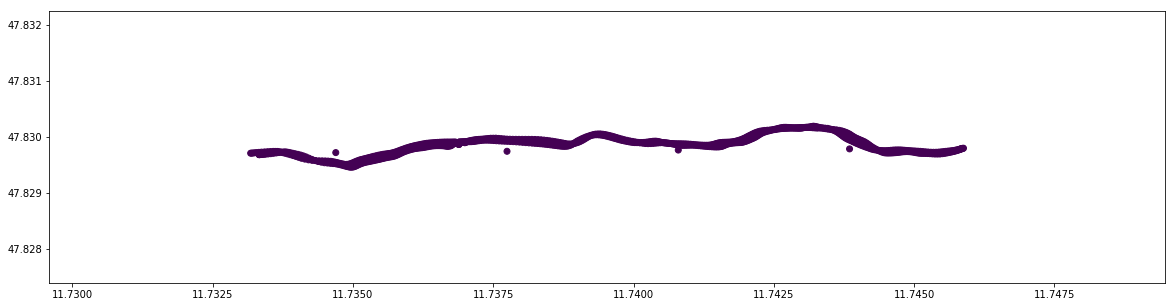

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0], ['adjusted_mutual_info_score', 3.670679701080814e-15], ['homogeneity_score', 1.0131075974986722e-15], ['completeness_score', 1.0], ['v_measure_score', 2.026215194997342e-15], ['fowlkes_mallows_score', 0.6715915400653664], ['silhouette_score', 0], ['davies_bouldin_score', 0], ['calinski_harabasz_score', 0]]

---- Fidec ----
...Pretraining...
Pretraining time: 66s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 156)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)          78500       input[0][0]                      
_______________________

<Figure size 1200x400 with 0 Axes>

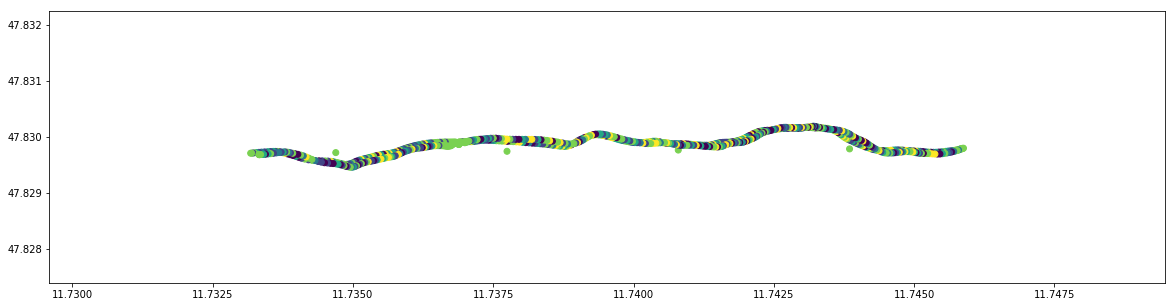

[['score_name', 'score_result'], ['adjusted_rand_score', 0.003750802002848722], ['adjusted_mutual_info_score', 0.009506232131207309], ['homogeneity_score', 0.021272750437236497], ['completeness_score', 0.011272056656895457], ['v_measure_score', 0.01473584694989713], ['fowlkes_mallows_score', 0.30209267279684826], ['silhouette_score', -0.02210917816817943], ['davies_bouldin_score', 8.782194621107493], ['calinski_harabasz_score', 5.445858403866218]]

---- Dcec ----
input_shape (52, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
__________________________________________________

saving model to: results/dcec_model_2760.h5
saving model to: results/dcec_model_2875.h5
saving model to: results/dcec_model_2990.h5
saving model to: results/dcec_model_3105.h5
saving model to: results/dcec_model_3220.h5
saving model to: results/dcec_model_3335.h5
saving model to: results/dcec_model_3450.h5
saving model to: results/dcec_model_3565.h5
saving model to: results/dcec_model_3680.h5
saving model to: results/dcec_model_3795.h5
saving model to: results/dcec_model_3910.h5
saving model to: results/dcec_model_4025.h5
saving model to: results/dcec_model_4140.h5
saving model to: results/dcec_model_4255.h5
saving model to: results/dcec_model_4370.h5
saving model to: results/dcec_model_4485.h5
saving model to: results/dcec_model_4600.h5
saving model to: results/dcec_model_4715.h5
saving model to: results/dcec_model_4830.h5
saving model to: results/dcec_model_4945.h5
saving model to: results/dcec_model_5060.h5
saving model to: results/dcec_model_5175.h5
saving model to: results/dcec_mo

<Figure size 1200x400 with 0 Axes>

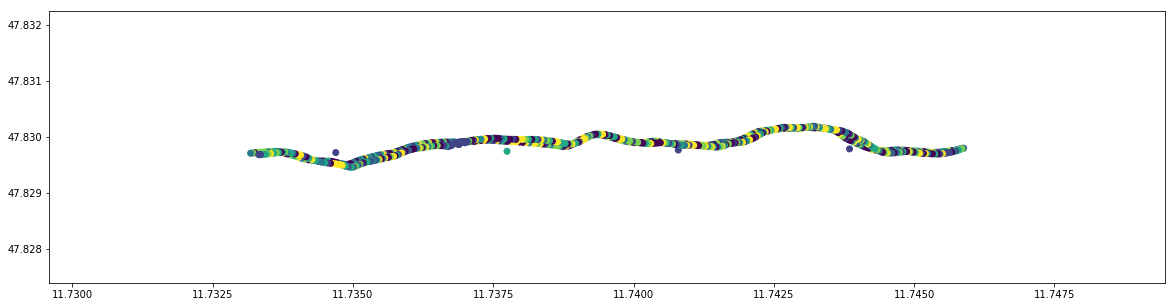

[['score_name', 'score_result'], ['adjusted_rand_score', 0.014658112531248239], ['adjusted_mutual_info_score', 0.015427276632892721], ['homogeneity_score', 0.03036428319771084], ['completeness_score', 0.01544970447820377], ['v_measure_score', 0.020479300139321713], ['fowlkes_mallows_score', 0.28982894669429654], ['silhouette_score', -0.06050382117417415], ['davies_bouldin_score', 12.263899069020063], ['calinski_harabasz_score', 3.871219955227769]]

---- Fidcec ----
input_shape (52, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
________________________________________________

saving model to: results/dcec_model_1495.h5
saving model to: results/dcec_model_1610.h5
saving model to: results/dcec_model_1725.h5
saving model to: results/dcec_model_1840.h5
saving model to: results/dcec_model_1955.h5
saving model to: results/dcec_model_2070.h5
saving model to: results/dcec_model_2185.h5
saving model to: results/dcec_model_2300.h5
saving model to: results/dcec_model_2415.h5
saving model to: results/dcec_model_2530.h5
saving model to: results/dcec_model_2645.h5
saving model to: results/dcec_model_2760.h5
saving model to: results/dcec_model_2875.h5
saving model to: results/dcec_model_2990.h5
saving model to: results/dcec_model_3105.h5
saving model to: results/dcec_model_3220.h5
saving model to: results/dcec_model_3335.h5
saving model to: results/dcec_model_3450.h5
saving model to: results/dcec_model_3565.h5
saving model to: results/dcec_model_3680.h5
saving model to: results/dcec_model_3795.h5
saving model to: results/dcec_model_3910.h5
saving model to: results/dcec_mo

<Figure size 1200x400 with 0 Axes>

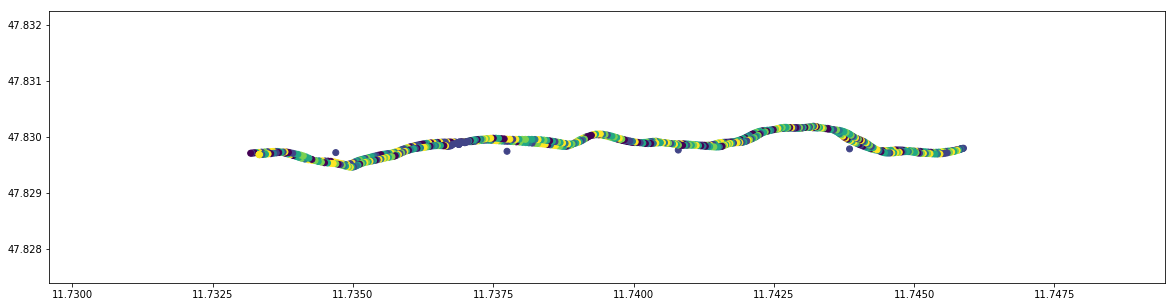

[['score_name', 'score_result'], ['adjusted_rand_score', 0.014966350289162798], ['adjusted_mutual_info_score', 0.016410301740872463], ['homogeneity_score', 0.031739264513244665], ['completeness_score', 0.016227128856286376], ['v_measure_score', 0.021474916035164646], ['fowlkes_mallows_score', 0.2921993512022438], ['silhouette_score', -0.0580137575051022], ['davies_bouldin_score', 11.539003011976858], ['calinski_harabasz_score', 3.952784742441525]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 59, 138,  97,  99, 250,  93]))


<Figure size 1200x400 with 0 Axes>

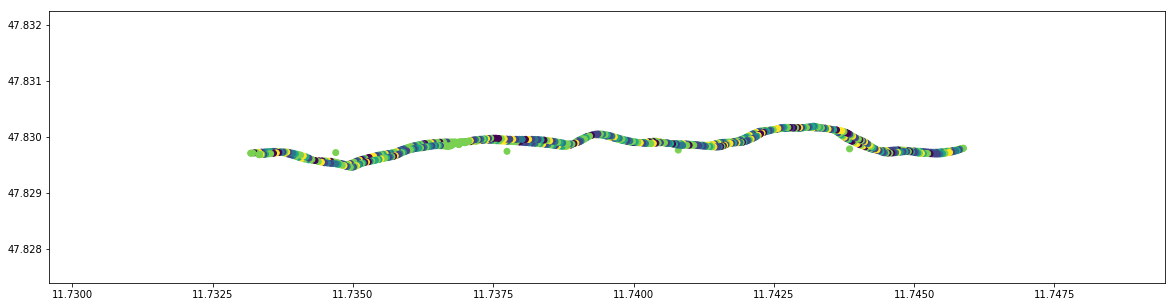

[['score_name', 'score_result'], ['adjusted_rand_score', 0.005579416422938717], ['adjusted_mutual_info_score', 0.010924496213901378], ['homogeneity_score', 0.02316653839818457], ['completeness_score', 0.012457599150850136], ['v_measure_score', 0.01620246658210993], ['fowlkes_mallows_score', 0.31008660596587095], ['silhouette_score', -0.0011354126935067734], ['davies_bouldin_score', 5.687676138840708], ['calinski_harabasz_score', 7.911976250474376]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([281,   4, 249,  27, 116,  59]))


<Figure size 1200x400 with 0 Axes>

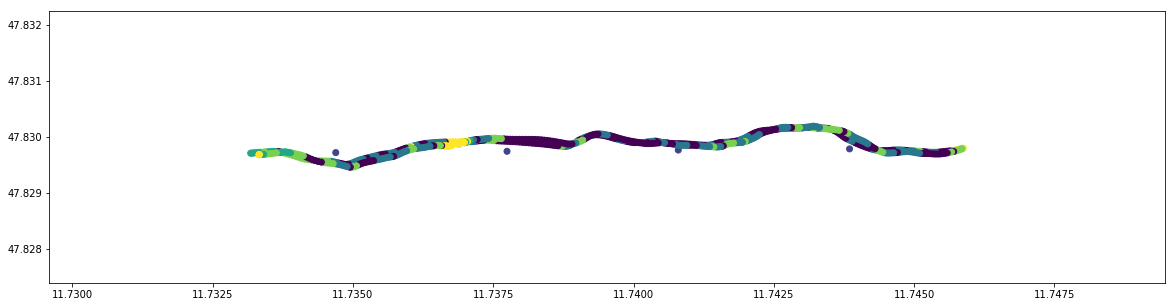

[['score_name', 'score_result'], ['adjusted_rand_score', 0.05694944738959523], ['adjusted_mutual_info_score', 0.0697544792235103], ['homogeneity_score', 0.09532193776471899], ['completeness_score', 0.06256695117191419], ['v_measure_score', 0.07554683633413872], ['fowlkes_mallows_score', 0.40048655098171465], ['silhouette_score', 0.26283106006126855], ['davies_bouldin_score', 1.0096580129959667], ['calinski_harabasz_score', 542.6768397548151]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 25
clusters: 6
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

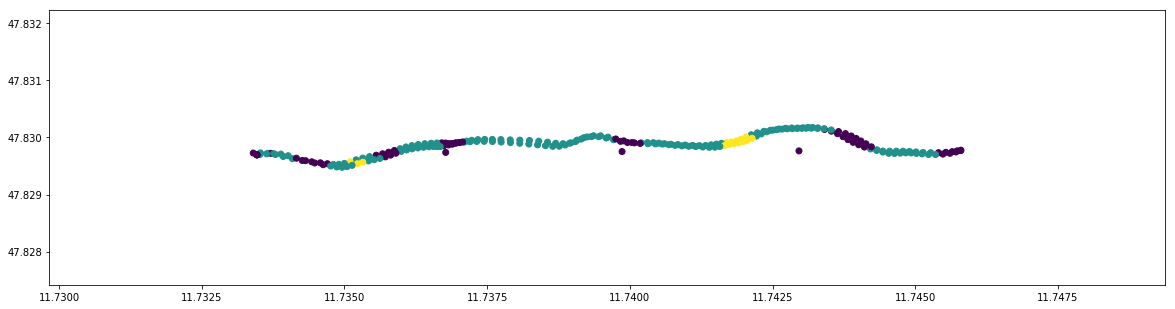


---- Dec ----
...Pretraining...
Pretraining time: 38s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 6)                 60        
Total params: 1,501,070
Trainable

<Figure size 1200x400 with 0 Axes>

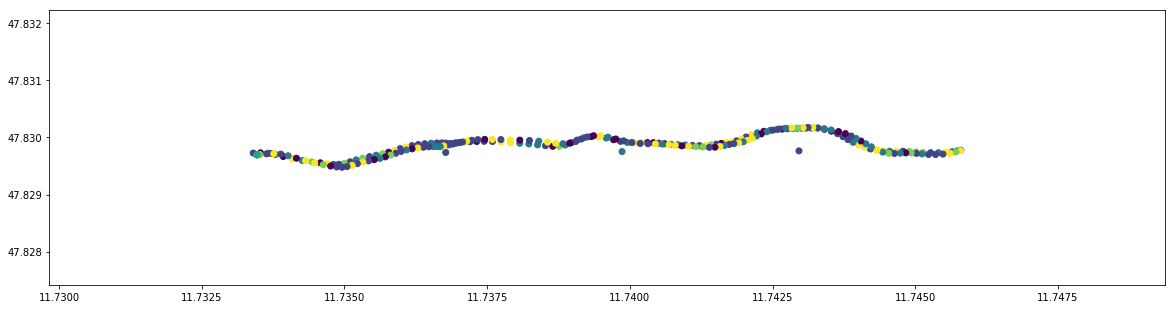

[['score_name', 'score_result'], ['adjusted_rand_score', -0.005429261048398268], ['adjusted_mutual_info_score', 0.02641341514009825], ['homogeneity_score', 0.06540910239490395], ['completeness_score', 0.03391842580701898], ['v_measure_score', 0.04467188153872346], ['fowlkes_mallows_score', 0.3360908392916595], ['silhouette_score', -0.01305876089676832], ['davies_bouldin_score', 6.012034109659527], ['calinski_harabasz_score', 2.3813069076122897]]

---- Fidec ----
...Pretraining...
Pretraining time: 38s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)

<Figure size 1200x400 with 0 Axes>

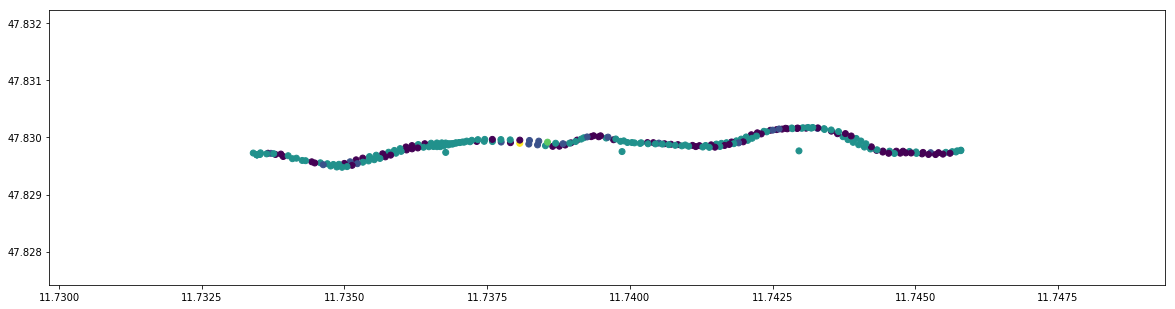

[['score_name', 'score_result'], ['adjusted_rand_score', -0.003243817303139339], ['adjusted_mutual_info_score', 0.03221949783886055], ['homogeneity_score', 0.053178339508253535], ['completeness_score', 0.046899002159897646], ['v_measure_score', 0.049841672807962915], ['fowlkes_mallows_score', 0.47736253091204295], ['silhouette_score', -0.023883938758897046], ['davies_bouldin_score', 5.797874452564262], ['calinski_harabasz_score', 1.273532654634855]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_______________________________________________

<Figure size 1200x400 with 0 Axes>

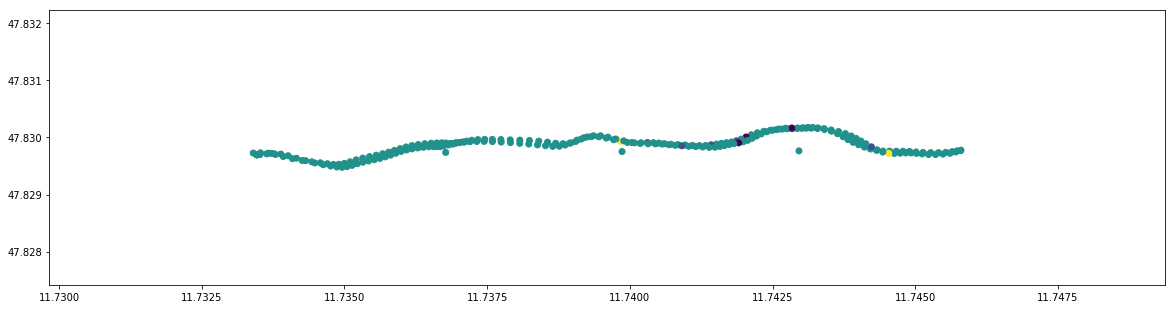

[['score_name', 'score_result'], ['adjusted_rand_score', 0.029933911955370054], ['adjusted_mutual_info_score', 0.016959846500494914], ['homogeneity_score', 0.026233804623944597], ['completeness_score', 0.09179010089554111], ['v_measure_score', 0.04080535316479977], ['fowlkes_mallows_score', 0.6895778437676918], ['silhouette_score', 0.03437912196286009], ['davies_bouldin_score', 3.256991442410542], ['calinski_harabasz_score', 1.3079575761621152]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

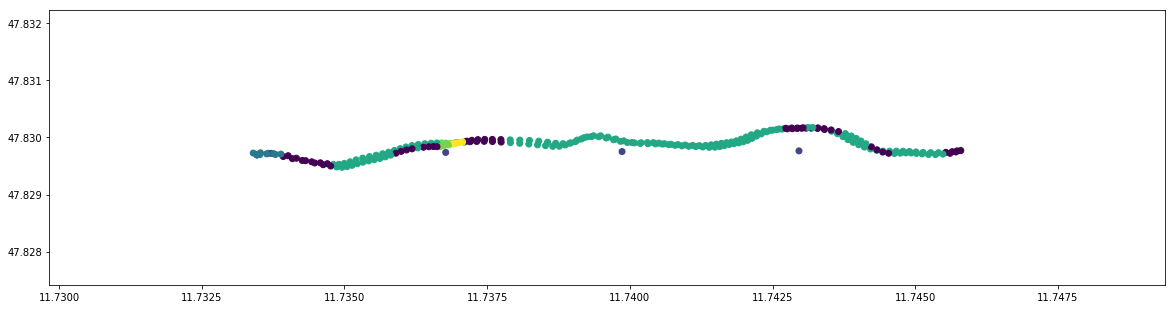

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08258846139486191], ['adjusted_mutual_info_score', 0.1030815799097331], ['homogeneity_score', 0.14268155296545007], ['completeness_score', 0.110553426980817], ['v_measure_score', 0.12457942935547421], ['fowlkes_mallows_score', 0.5270860464840301], ['silhouette_score', -0.22005451047404623], ['davies_bouldin_score', 8.419102303680404], ['calinski_harabasz_score', 0.7117153837752814]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([  1,   1, 230,   1,   1,   5]))


<Figure size 1200x400 with 0 Axes>

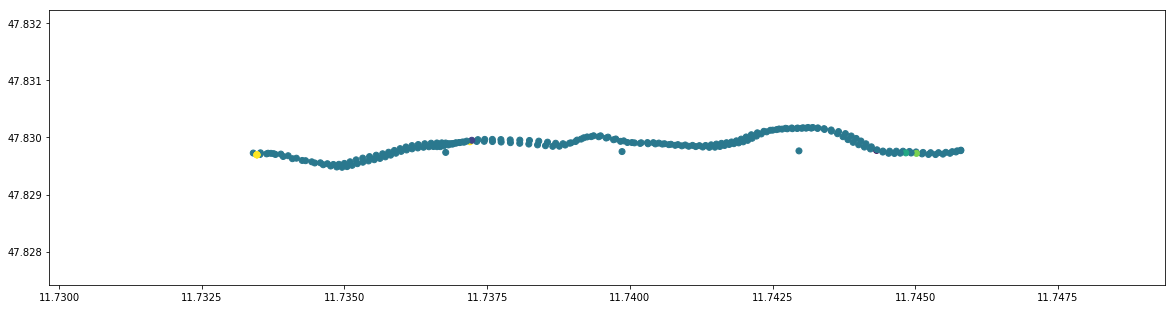

[['score_name', 'score_result'], ['adjusted_rand_score', 0.005710012743710681], ['adjusted_mutual_info_score', 0.00280480330672221], ['homogeneity_score', 0.02397883109674576], ['completeness_score', 0.09308608334677747], ['v_measure_score', 0.03813432027248142], ['fowlkes_mallows_score', 0.6865660549878656], ['silhouette_score', -0.01141633912604486], ['davies_bouldin_score', 1.1094521978004717], ['calinski_harabasz_score', 1.870154657415958]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 57,   4,   4,  12,  10, 152]))


<Figure size 1200x400 with 0 Axes>

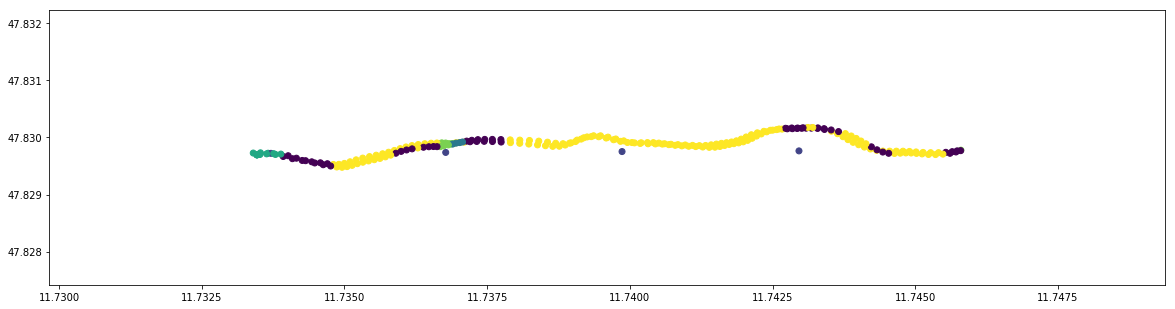

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08258846139486191], ['adjusted_mutual_info_score', 0.10308157990973311], ['homogeneity_score', 0.14268155296545007], ['completeness_score', 0.110553426980817], ['v_measure_score', 0.12457942935547421], ['fowlkes_mallows_score', 0.5270860464840301], ['silhouette_score', 0.319842796587671], ['davies_bouldin_score', 0.8109421763663508], ['calinski_harabasz_score', 366.14168192103494]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 75
clusters: 6
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

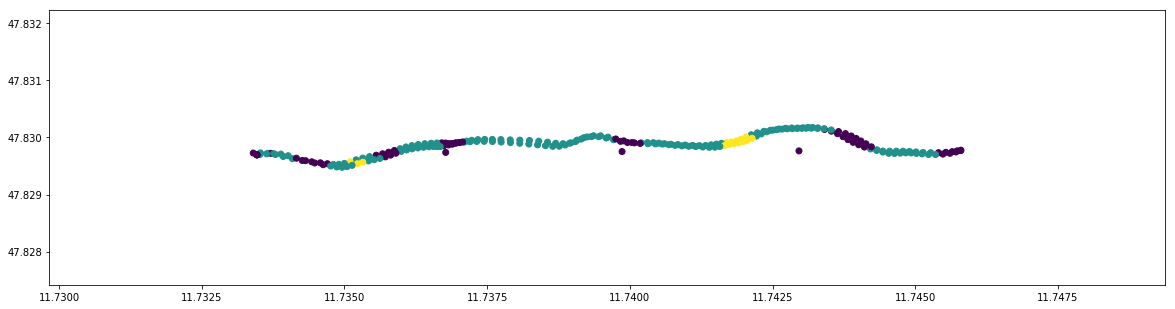


---- Dec ----
...Pretraining...
Pretraining time: 38s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 6)                 60        
Total params: 1,501,070
Trainable

<Figure size 1200x400 with 0 Axes>

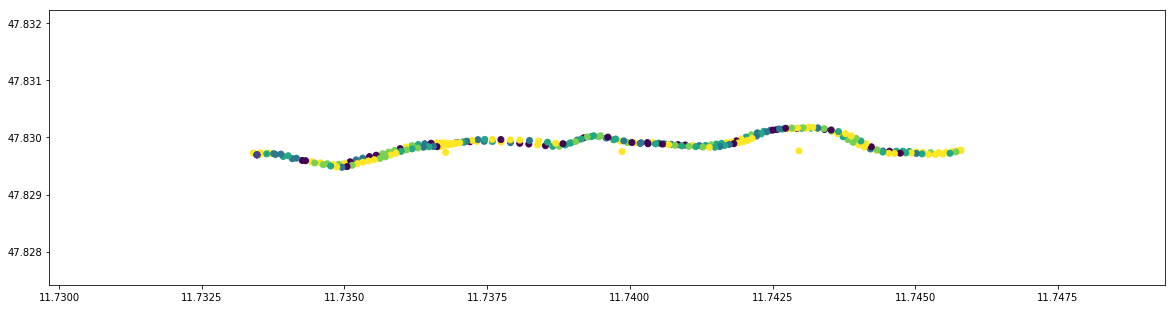

[['score_name', 'score_result'], ['adjusted_rand_score', 0.006821057387650244], ['adjusted_mutual_info_score', 0.06026124621545613], ['homogeneity_score', 0.11531468991618808], ['completeness_score', 0.0584629576733187], ['v_measure_score', 0.07758924037925641], ['fowlkes_mallows_score', 0.33770658178397545], ['silhouette_score', -0.014239819129562483], ['davies_bouldin_score', 6.245712046095257], ['calinski_harabasz_score', 2.3583742892047703]]

---- Fidec ----
...Pretraining...
Pretraining time: 39s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)

<Figure size 1200x400 with 0 Axes>

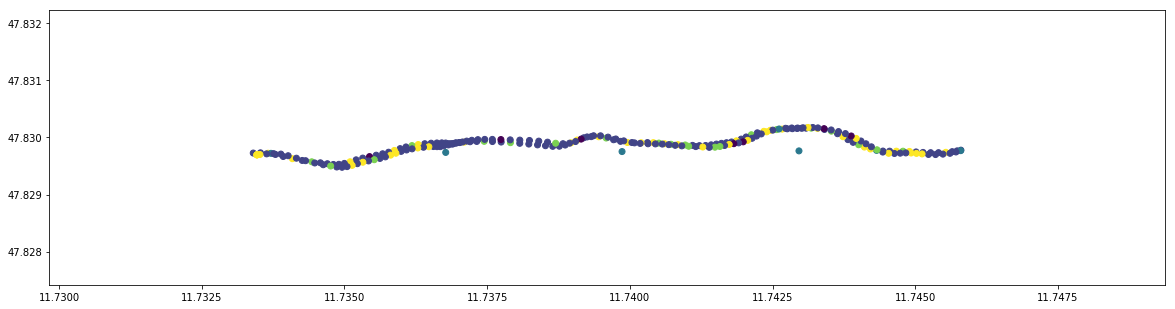

[['score_name', 'score_result'], ['adjusted_rand_score', 0.005389455524727383], ['adjusted_mutual_info_score', 0.019911514093462177], ['homogeneity_score', 0.04419463293726541], ['completeness_score', 0.03554188204846948], ['v_measure_score', 0.039398773104460494], ['fowlkes_mallows_score', 0.49616330652924534], ['silhouette_score', -0.08037091551328543], ['davies_bouldin_score', 6.349524491123358], ['calinski_harabasz_score', 1.4469410423043456]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

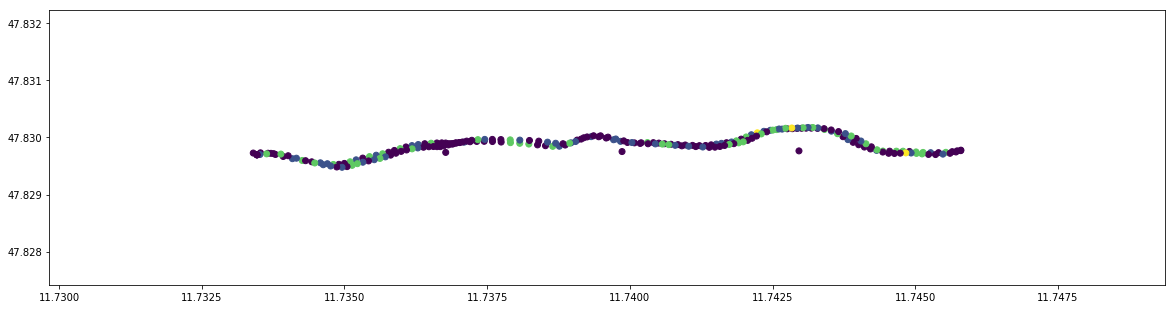

[['score_name', 'score_result'], ['adjusted_rand_score', -0.011959727281676128], ['adjusted_mutual_info_score', 0.01525018376544497], ['homogeneity_score', 0.033025212833186234], ['completeness_score', 0.02607530847173599], ['v_measure_score', 0.02914162491146569], ['fowlkes_mallows_score', 0.44834498917086507], ['silhouette_score', 0.015558961696228363], ['davies_bouldin_score', 7.404301999678674], ['calinski_harabasz_score', 1.787787576546894]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
________________________________________________

<Figure size 1200x400 with 0 Axes>

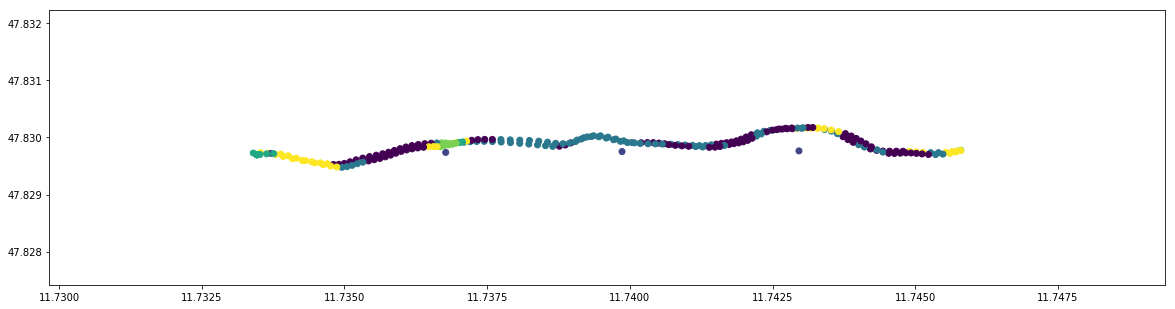

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07588035511494881], ['adjusted_mutual_info_score', 0.10061815928738485], ['homogeneity_score', 0.16045660300045492], ['completeness_score', 0.0945657814823118], ['v_measure_score', 0.11899899757827297], ['fowlkes_mallows_score', 0.4359075379536832], ['silhouette_score', -0.2135841439888194], ['davies_bouldin_score', 8.968335630328735], ['calinski_harabasz_score', 0.9115898503481983]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 21,   1, 177,   1,  38,   1]))


<Figure size 1200x400 with 0 Axes>

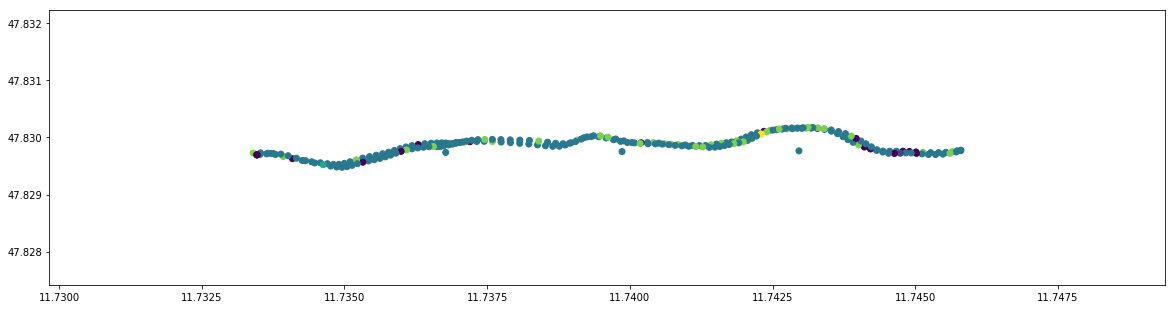

[['score_name', 'score_result'], ['adjusted_rand_score', -0.02429890729686597], ['adjusted_mutual_info_score', -0.0021280350195525977], ['homogeneity_score', 0.021761390582204332], ['completeness_score', 0.02219959846227062], ['v_measure_score', 0.021978310470532475], ['fowlkes_mallows_score', 0.5303328658409017], ['silhouette_score', 0.02018532652563082], ['davies_bouldin_score', 4.0632332643517985], ['calinski_harabasz_score', 1.7106225914590647]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([95,  4, 10, 12, 39, 79]))


<Figure size 1200x400 with 0 Axes>

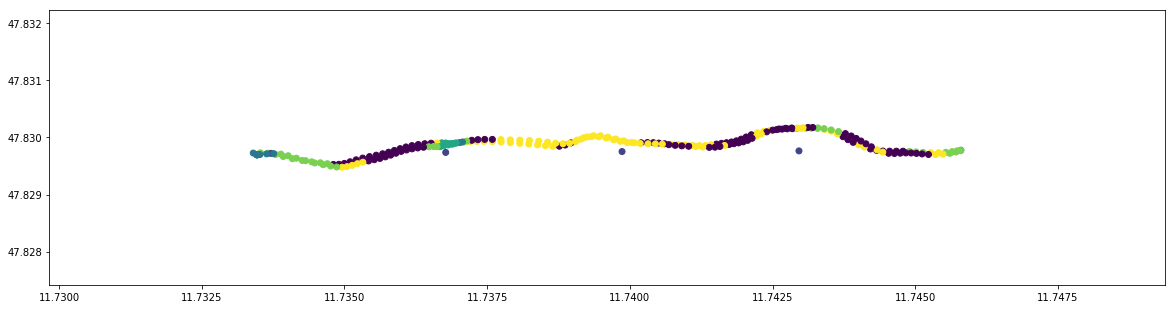

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07588035511494881], ['adjusted_mutual_info_score', 0.10061815928738485], ['homogeneity_score', 0.16045660300045492], ['completeness_score', 0.0945657814823118], ['v_measure_score', 0.11899899757827297], ['fowlkes_mallows_score', 0.4359075379536832], ['silhouette_score', 0.3217795502608105], ['davies_bouldin_score', 0.8597451118063084], ['calinski_harabasz_score', 337.99923521208757]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 150
clusters: 6
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

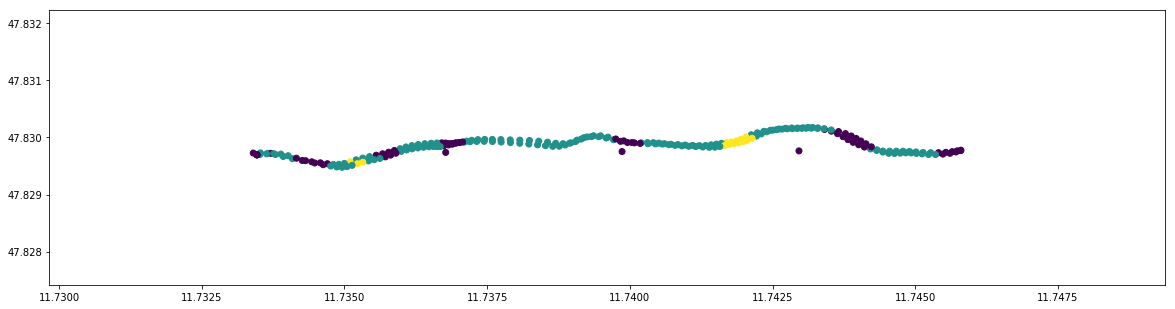


---- Dec ----
...Pretraining...
Pretraining time: 39s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 6)                 60        
Total params: 1,501,070
Trainable

<Figure size 1200x400 with 0 Axes>

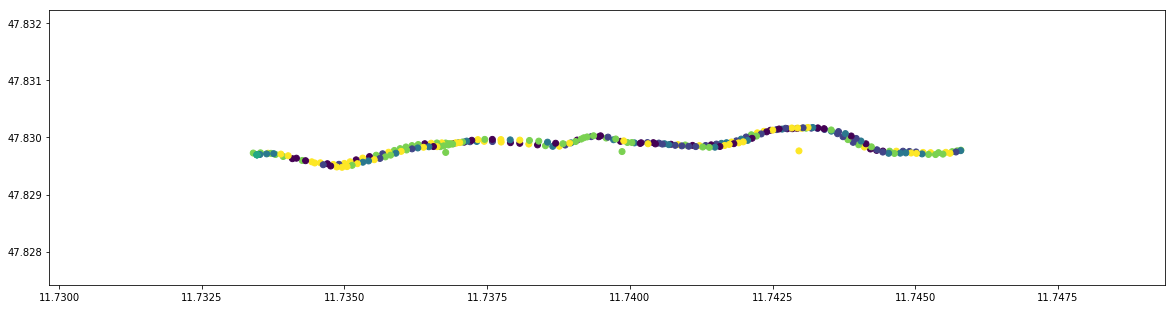

[['score_name', 'score_result'], ['adjusted_rand_score', 0.010679545453647011], ['adjusted_mutual_info_score', 0.03755205035623555], ['homogeneity_score', 0.08299871352347267], ['completeness_score', 0.04106162031890453], ['v_measure_score', 0.05494200371874572], ['fowlkes_mallows_score', 0.3262105512092736], ['silhouette_score', -0.01816579494498515], ['davies_bouldin_score', 6.199083645550123], ['calinski_harabasz_score', 2.3006764822867627]]

---- Fidec ----
...Pretraining...
Pretraining time: 39s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500) 

<Figure size 1200x400 with 0 Axes>

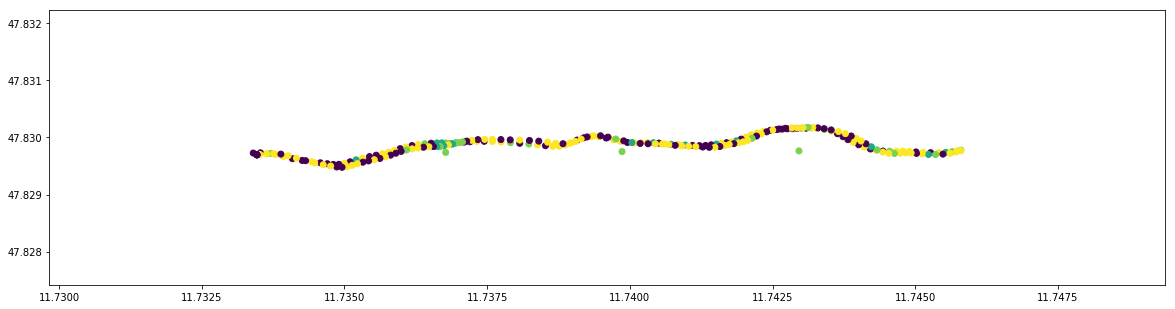

[['score_name', 'score_result'], ['adjusted_rand_score', 0.04317937573622096], ['adjusted_mutual_info_score', 0.016227902013247558], ['homogeneity_score', 0.03610388699703026], ['completeness_score', 0.025236119234985768], ['v_measure_score', 0.029707267836172915], ['fowlkes_mallows_score', 0.4464560083581399], ['silhouette_score', -0.09139802490496803], ['davies_bouldin_score', 8.133648283695027], ['calinski_harabasz_score', 1.444351639776895]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
___________________________________________________

<Figure size 1200x400 with 0 Axes>

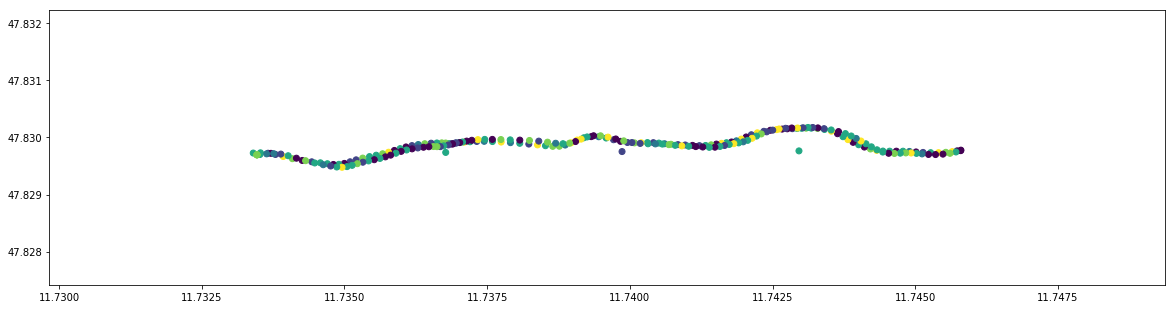

[['score_name', 'score_result'], ['adjusted_rand_score', -0.0037249339022527323], ['adjusted_mutual_info_score', -0.005041976539955946], ['homogeneity_score', 0.020201999307592762], ['completeness_score', 0.009675327479341522], ['v_measure_score', 0.013084233434422795], ['fowlkes_mallows_score', 0.31058926866538805], ['silhouette_score', -0.010533624351197793], ['davies_bouldin_score', 7.050171478967026], ['calinski_harabasz_score', 1.645331968907451]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
__________________________________________

<Figure size 1200x400 with 0 Axes>

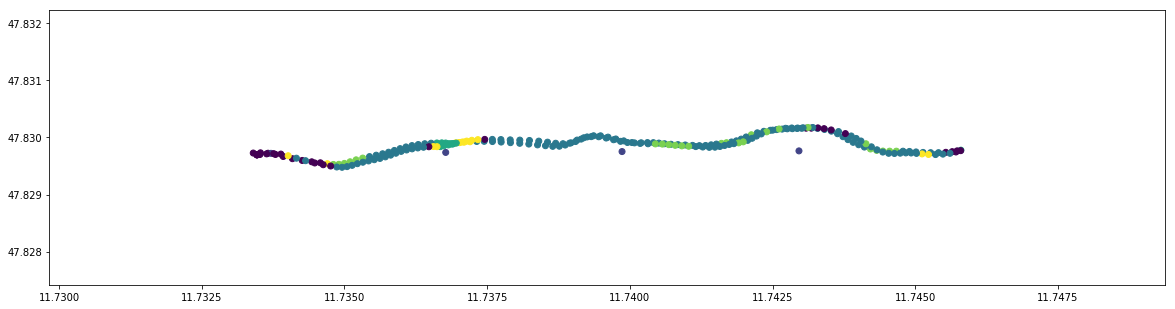

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08010469599681305], ['adjusted_mutual_info_score', 0.09327765410464024], ['homogeneity_score', 0.14153760340215812], ['completeness_score', 0.09496844792595072], ['v_measure_score', 0.1136681826344811], ['fowlkes_mallows_score', 0.5040060850313234], ['silhouette_score', -0.21501719382255816], ['davies_bouldin_score', 7.932418046851687], ['calinski_harabasz_score', 0.8066492129579677]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 5,  1, 71,  1, 66, 95]))


<Figure size 1200x400 with 0 Axes>

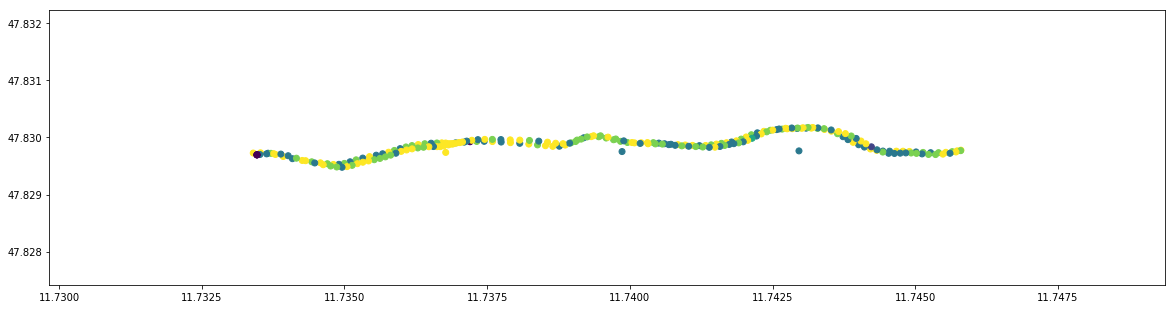

[['score_name', 'score_result'], ['adjusted_rand_score', 0.012257312112646397], ['adjusted_mutual_info_score', 0.02232437172262959], ['homogeneity_score', 0.051743744648697645], ['completeness_score', 0.03479573066540182], ['v_measure_score', 0.041610176070066125], ['fowlkes_mallows_score', 0.4100535264450118], ['silhouette_score', -0.006430844165403869], ['davies_bouldin_score', 4.783875008072379], ['calinski_harabasz_score', 2.0426136832790984]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 15,   4, 148,  13,  26,  33]))


<Figure size 1200x400 with 0 Axes>

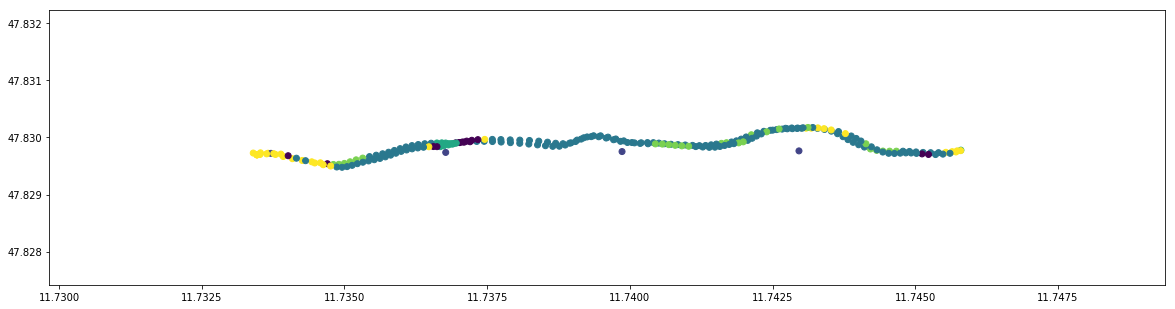

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08010469599681305], ['adjusted_mutual_info_score', 0.09327765410464024], ['homogeneity_score', 0.1415376034021581], ['completeness_score', 0.0949684479259507], ['v_measure_score', 0.11366818263448109], ['fowlkes_mallows_score', 0.5040060850313234], ['silhouette_score', 0.4590998317449005], ['davies_bouldin_score', 0.7967684583118605], ['calinski_harabasz_score', 253.24943727461604]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 25
clusters: 6
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

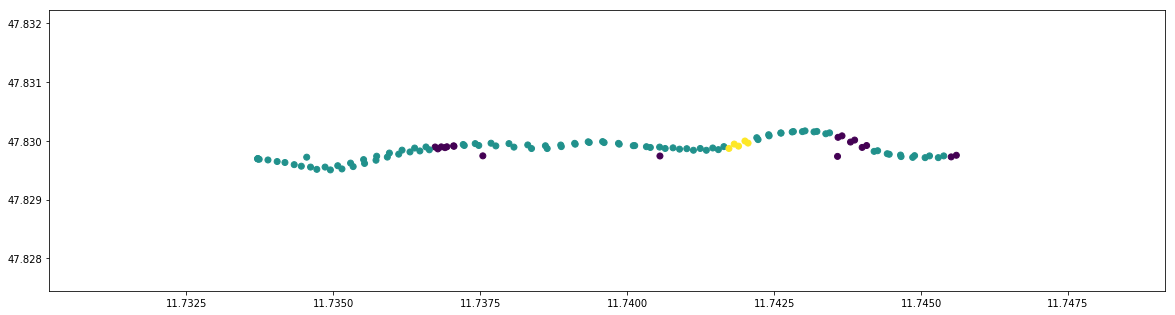


---- Dec ----
...Pretraining...
Pretraining time: 40s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 6)                 60        
Total params: 1,723,070
Trainable

<Figure size 1200x400 with 0 Axes>

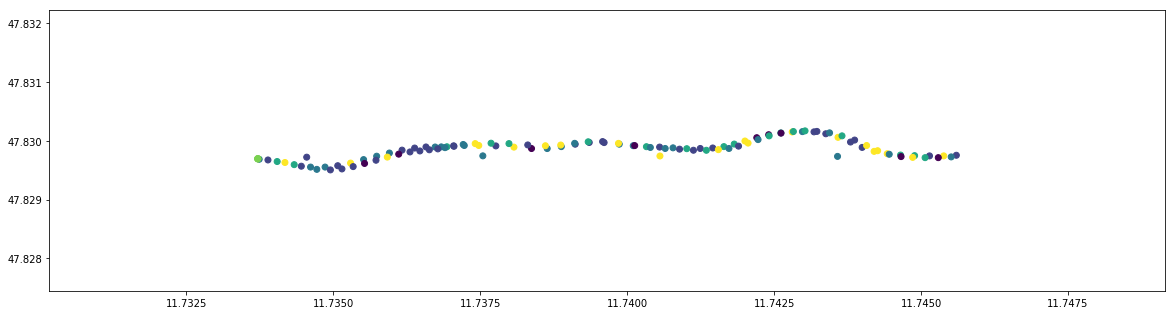

[['score_name', 'score_result'], ['adjusted_rand_score', -0.021572660942972437], ['adjusted_mutual_info_score', -0.010237793484487253], ['homogeneity_score', 0.0599775905161238], ['completeness_score', 0.022078386091022528], ['v_measure_score', 0.03227573310263681], ['fowlkes_mallows_score', 0.36037434015526176], ['silhouette_score', 0.000114767941421081], ['davies_bouldin_score', 5.078847764024569], ['calinski_harabasz_score', 1.8636013980407802]]

---- Fidec ----
...Pretraining...
Pretraining time: 40s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 5

<Figure size 1200x400 with 0 Axes>

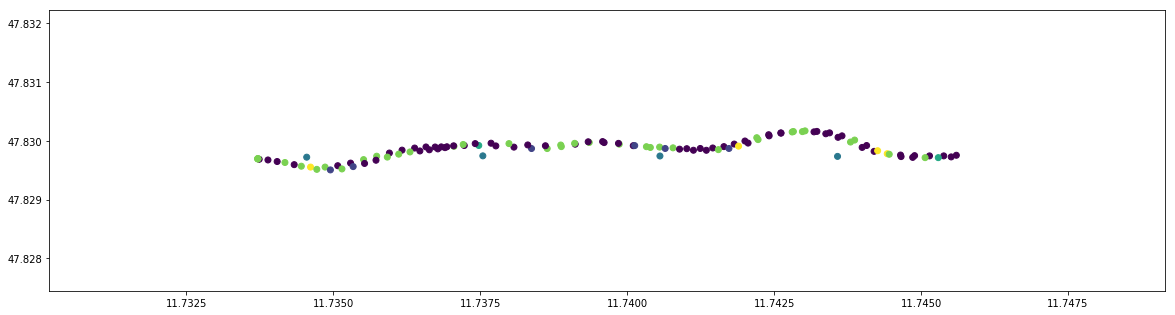

[['score_name', 'score_result'], ['adjusted_rand_score', 0.009925208939013774], ['adjusted_mutual_info_score', 0.055455246068688395], ['homogeneity_score', 0.14515150887971273], ['completeness_score', 0.07535421427899788], ['v_measure_score', 0.09920629493293642], ['fowlkes_mallows_score', 0.5216592820988849], ['silhouette_score', -0.1143910735109906], ['davies_bouldin_score', 4.795753042650102], ['calinski_harabasz_score', 1.1352712118418053]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
____________________________________________________

<Figure size 1200x400 with 0 Axes>

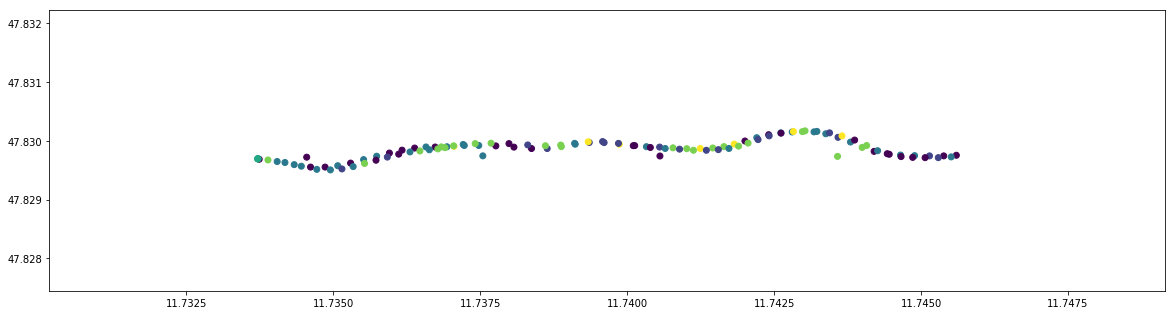

[['score_name', 'score_result'], ['adjusted_rand_score', 0.012330385259447848], ['adjusted_mutual_info_score', 0.005650985181213197], ['homogeneity_score', 0.08760808091093826], ['completeness_score', 0.03254125464012073], ['v_measure_score', 0.04745555780861769], ['fowlkes_mallows_score', 0.3890929904770476], ['silhouette_score', -0.002156431269494359], ['davies_bouldin_score', 5.443213588213168], ['calinski_harabasz_score', 1.6254361859899895]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
________________________________________________

<Figure size 1200x400 with 0 Axes>

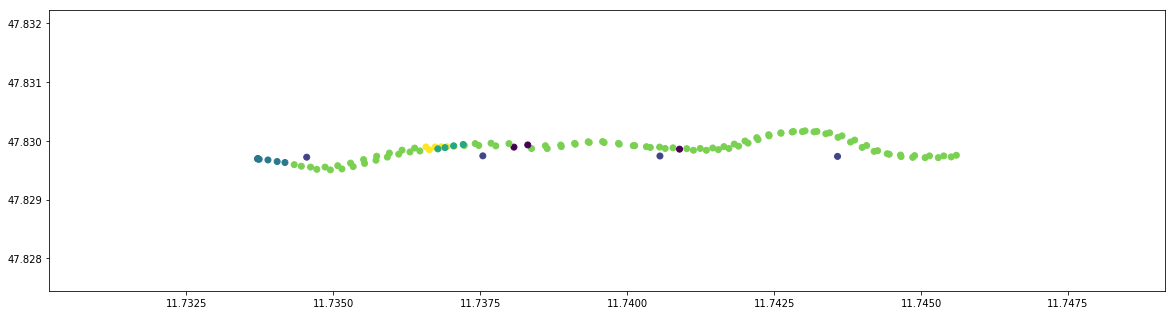

[['score_name', 'score_result'], ['adjusted_rand_score', 0.2126993540796293], ['adjusted_mutual_info_score', 0.13515675298582622], ['homogeneity_score', 0.2226938824261726], ['completeness_score', 0.1570096688089124], ['v_measure_score', 0.1841704804275395], ['fowlkes_mallows_score', 0.7237218732143821], ['silhouette_score', -0.14489245333068318], ['davies_bouldin_score', 4.535054214622805], ['calinski_harabasz_score', 0.9057259550506771]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([  1,   1, 113,   1,   1,   1]))


<Figure size 1200x400 with 0 Axes>

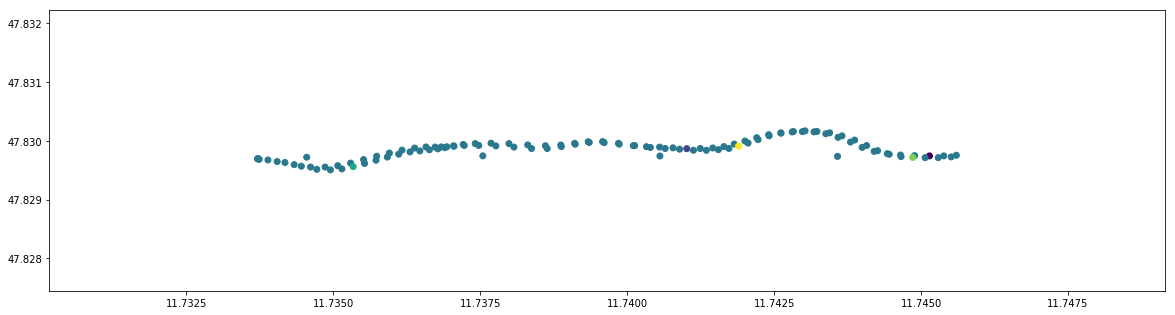

[['score_name', 'score_result'], ['adjusted_rand_score', 0.009307217437695593], ['adjusted_mutual_info_score', 0.023513358016289027], ['homogeneity_score', 0.05856145828662356], ['completeness_score', 0.14311089749109882], ['v_measure_score', 0.08311285720312911], ['fowlkes_mallows_score', 0.7860814994030073], ['silhouette_score', 0.011962030702783271], ['davies_bouldin_score', 0.8913256645218274], ['calinski_harabasz_score', 1.2515219438820204]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 5,  4, 38,  8,  4, 59]))


<Figure size 1200x400 with 0 Axes>

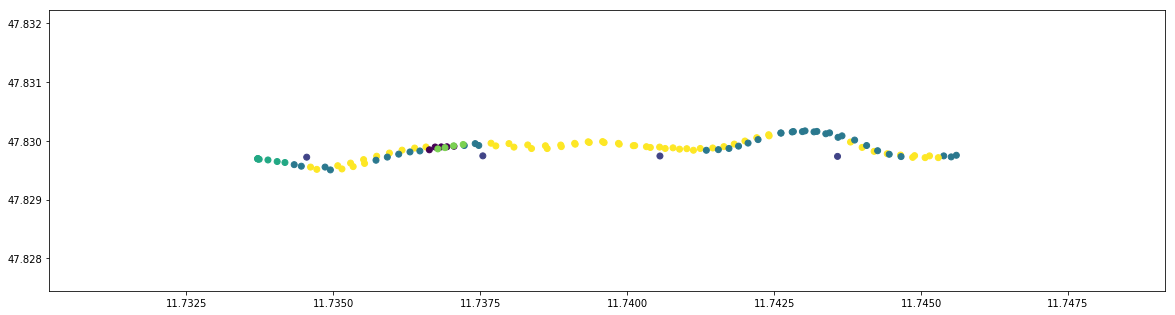

[['score_name', 'score_result'], ['adjusted_rand_score', 0.15789039336131933], ['adjusted_mutual_info_score', 0.1368579296899923], ['homogeneity_score', 0.2750063341797244], ['completeness_score', 0.1302116107671825], ['v_measure_score', 0.1767395456754109], ['fowlkes_mallows_score', 0.5777503836072172], ['silhouette_score', 0.3414016339641887], ['davies_bouldin_score', 0.8102703440797984], ['calinski_harabasz_score', 278.5509596915214]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 75
clusters: 6
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

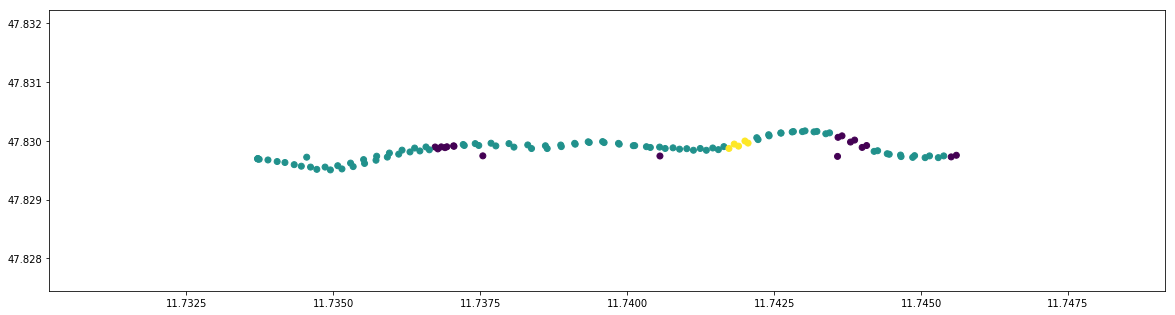


---- Dec ----
...Pretraining...
Pretraining time: 41s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 6)                 60        
Total params: 1,723,070
Trainable

<Figure size 1200x400 with 0 Axes>

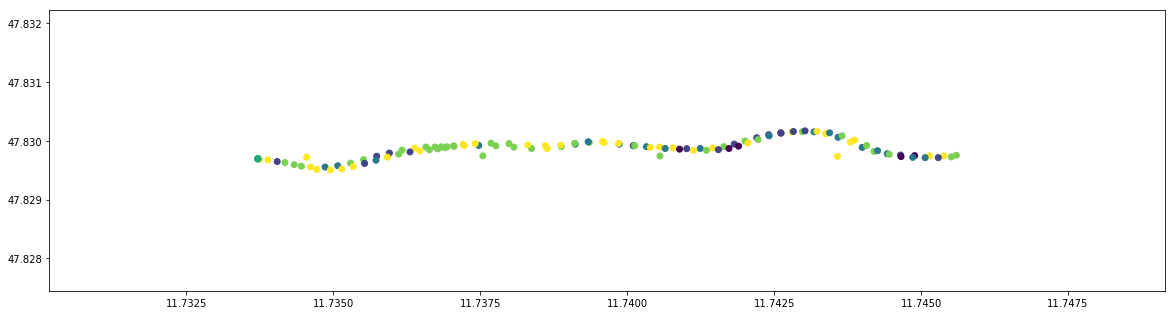

[['score_name', 'score_result'], ['adjusted_rand_score', -0.0011754071220622382], ['adjusted_mutual_info_score', 0.06244582979269384], ['homogeneity_score', 0.18501502430926856], ['completeness_score', 0.07076155617314005], ['v_measure_score', 0.10237020927281962], ['fowlkes_mallows_score', 0.3945536724985307], ['silhouette_score', -0.0012720341334042133], ['davies_bouldin_score', 5.068355013939222], ['calinski_harabasz_score', 1.8512780404264182]]

---- Fidec ----
...Pretraining...
Pretraining time: 41s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 5

<Figure size 1200x400 with 0 Axes>

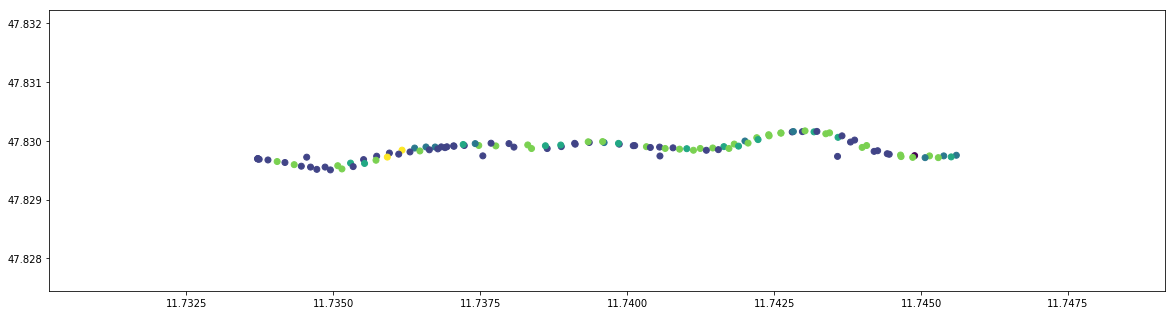

[['score_name', 'score_result'], ['adjusted_rand_score', 0.006253874395643204], ['adjusted_mutual_info_score', 0.015144814015082345], ['homogeneity_score', 0.09011994131456419], ['completeness_score', 0.041993147648724784], ['v_measure_score', 0.05729061414601403], ['fowlkes_mallows_score', 0.4757056572748406], ['silhouette_score', -0.03058620103050479], ['davies_bouldin_score', 4.80083327166571], ['calinski_harabasz_score', 1.2143314605495117]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
___________________________________________________

<Figure size 1200x400 with 0 Axes>

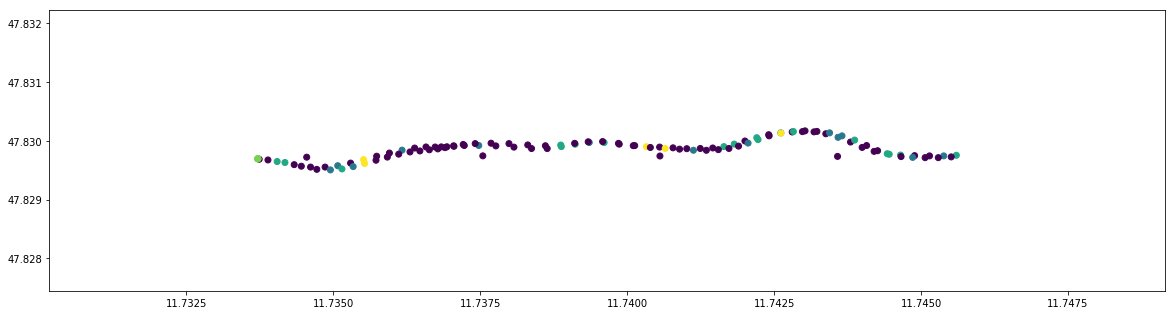

[['score_name', 'score_result'], ['adjusted_rand_score', -0.050106366935444964], ['adjusted_mutual_info_score', -0.019040921625523562], ['homogeneity_score', 0.034393089337148484], ['completeness_score', 0.019419616600031542], ['v_measure_score', 0.0248231564269506], ['fowlkes_mallows_score', 0.5387156118083077], ['silhouette_score', -0.0003443929056945884], ['davies_bouldin_score', 4.7140624131653555], ['calinski_harabasz_score', 1.8709897787677754]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
___________________________________________

<Figure size 1200x400 with 0 Axes>

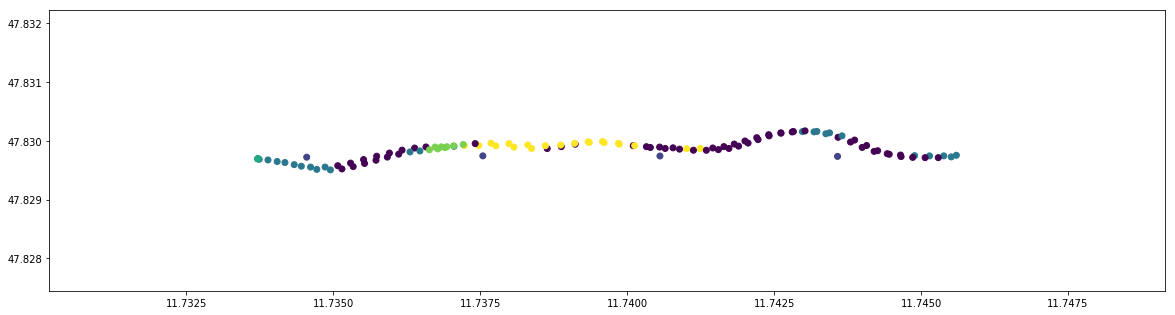

[['score_name', 'score_result'], ['adjusted_rand_score', 0.057313896769180084], ['adjusted_mutual_info_score', 0.12412762222574315], ['homogeneity_score', 0.27179818712742754], ['completeness_score', 0.11676427465808589], ['v_measure_score', 0.16335246604874162], ['fowlkes_mallows_score', 0.4932000578698903], ['silhouette_score', -0.121850429267614], ['davies_bouldin_score', 5.762082659864615], ['calinski_harabasz_score', 1.3218571937649648]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 1, 13, 59,  4,  1, 40]))


<Figure size 1200x400 with 0 Axes>

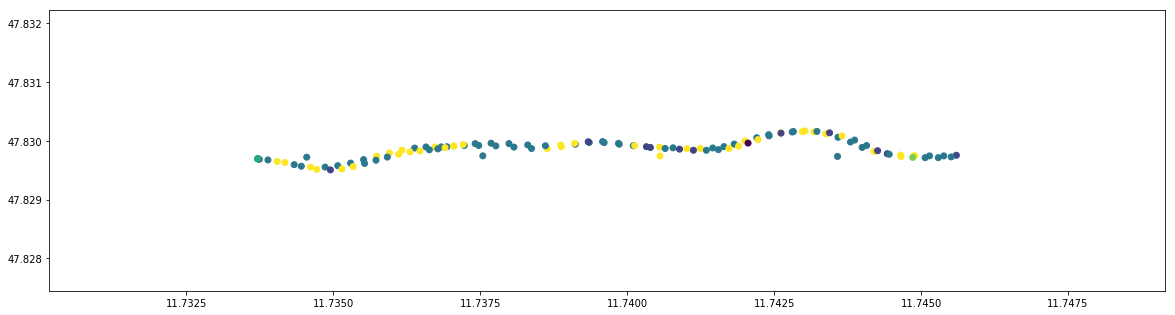

[['score_name', 'score_result'], ['adjusted_rand_score', -0.018860164718867596], ['adjusted_mutual_info_score', 0.020603285364323317], ['homogeneity_score', 0.0914898360635945], ['completeness_score', 0.04728492981411673], ['v_measure_score', 0.06234693245001438], ['fowlkes_mallows_score', 0.4898445898249074], ['silhouette_score', 0.00011296472656319733], ['davies_bouldin_score', 4.201843759364878], ['calinski_harabasz_score', 1.7860311268516293]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([23,  4, 22, 56,  9,  4]))


<Figure size 1200x400 with 0 Axes>

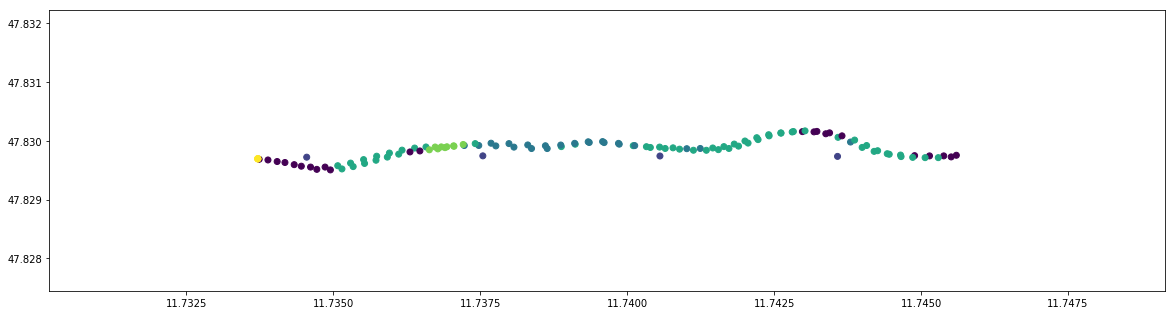

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07234700130040016], ['adjusted_mutual_info_score', 0.12492200359972139], ['homogeneity_score', 0.2759865060091059], ['completeness_score', 0.11641697537539099], ['v_measure_score', 0.16375753936046325], ['fowlkes_mallows_score', 0.4944058945932349], ['silhouette_score', 0.3542817425935886], ['davies_bouldin_score', 0.8269614719798114], ['calinski_harabasz_score', 248.30345664945756]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 150
clusters: 6
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

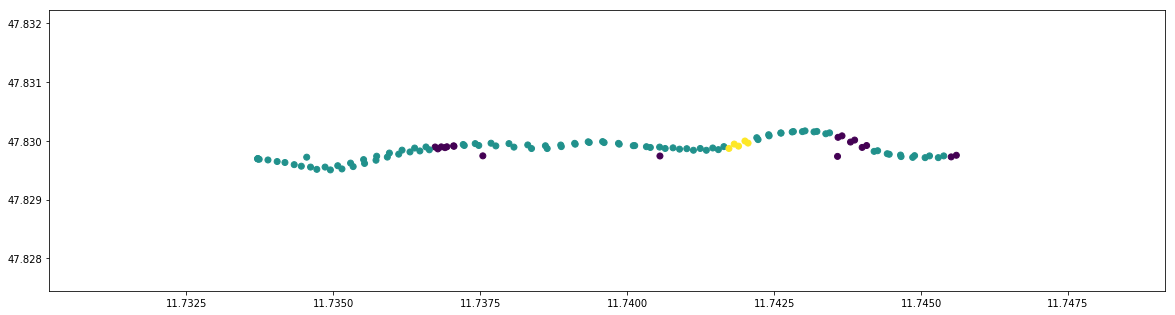


---- Dec ----
...Pretraining...
Pretraining time: 42s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 6)                 60        
Total params: 1,723,070
Trainable

<Figure size 1200x400 with 0 Axes>

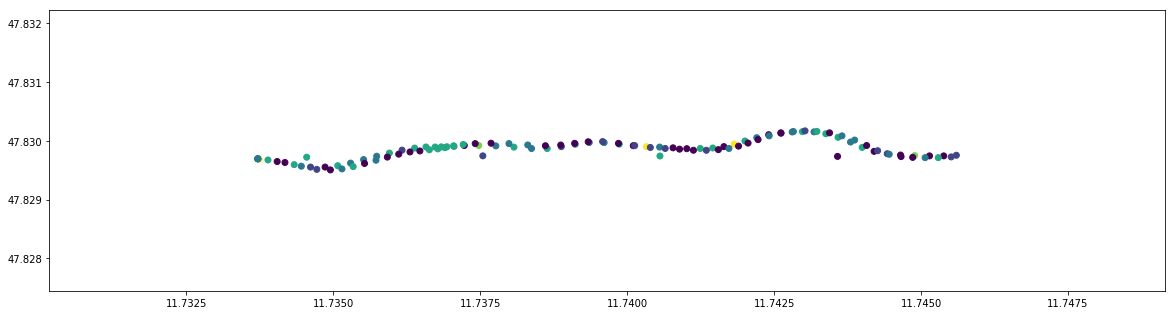

[['score_name', 'score_result'], ['adjusted_rand_score', 0.023347620174240295], ['adjusted_mutual_info_score', 0.018349357128233757], ['homogeneity_score', 0.1026756685169447], ['completeness_score', 0.041199293316098985], ['v_measure_score', 0.05880335160144056], ['fowlkes_mallows_score', 0.4221642163339289], ['silhouette_score', -0.037728756643758715], ['davies_bouldin_score', 5.521102457770933], ['calinski_harabasz_score', 1.2730502558116492]]

---- Fidec ----
...Pretraining...
Pretraining time: 42s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500

<Figure size 1200x400 with 0 Axes>

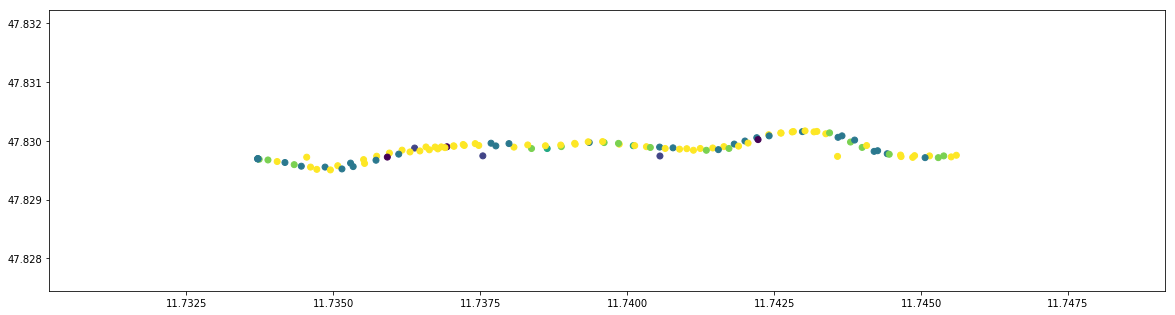

[['score_name', 'score_result'], ['adjusted_rand_score', 0.013693752525887379], ['adjusted_mutual_info_score', -0.01064625990694713], ['homogeneity_score', 0.0520371069103858], ['completeness_score', 0.02553990119447749], ['v_measure_score', 0.034263310777369334], ['fowlkes_mallows_score', 0.504669802738735], ['silhouette_score', -0.12558795897050293], ['davies_bouldin_score', 4.766434368884144], ['calinski_harabasz_score', 1.1021888296926596]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
____________________________________________________

<Figure size 1200x400 with 0 Axes>

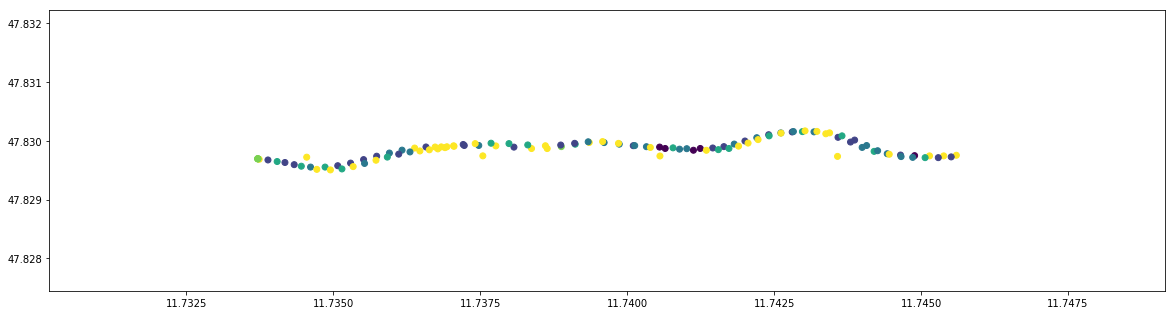

[['score_name', 'score_result'], ['adjusted_rand_score', -0.03484848973150018], ['adjusted_mutual_info_score', -0.0008135551127849347], ['homogeneity_score', 0.07588410516120578], ['completeness_score', 0.028746270226651244], ['v_measure_score', 0.04169697346082167], ['fowlkes_mallows_score', 0.36497607224718404], ['silhouette_score', -0.006100895802663286], ['davies_bouldin_score', 5.467471491007732], ['calinski_harabasz_score', 1.594753349172226]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_____________________________________________

saving model to: results/dcec_model_3540.h5
saving model to: results/dcec_model_3835.h5
delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.
saving model to: results/dcec_model_final.h5
Pretrain time:   9.5367431640625e-07
Clustering time: 218.81650114059448
Total time:      218.8165020942688
Fidcec
y (array([0, 1, 3, 4, 5]), array([ 5,  4, 75,  2, 32]))


<Figure size 1200x400 with 0 Axes>

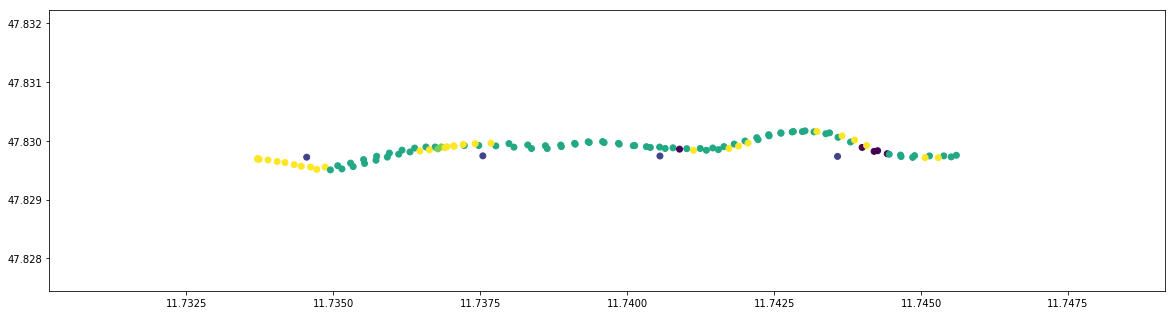

[['score_name', 'score_result'], ['adjusted_rand_score', 0.19936853635748583], ['adjusted_mutual_info_score', 0.09399120349381677], ['homogeneity_score', 0.1717078984610158], ['completeness_score', 0.10651269315915872], ['v_measure_score', 0.1314717260521846], ['fowlkes_mallows_score', 0.6547240789226242], ['silhouette_score', -0.22333537829595054], ['davies_bouldin_score', 5.759349953701805], ['calinski_harabasz_score', 0.8014718135863149]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([  1,   4,   1, 110,   1,   1]))


<Figure size 1200x400 with 0 Axes>

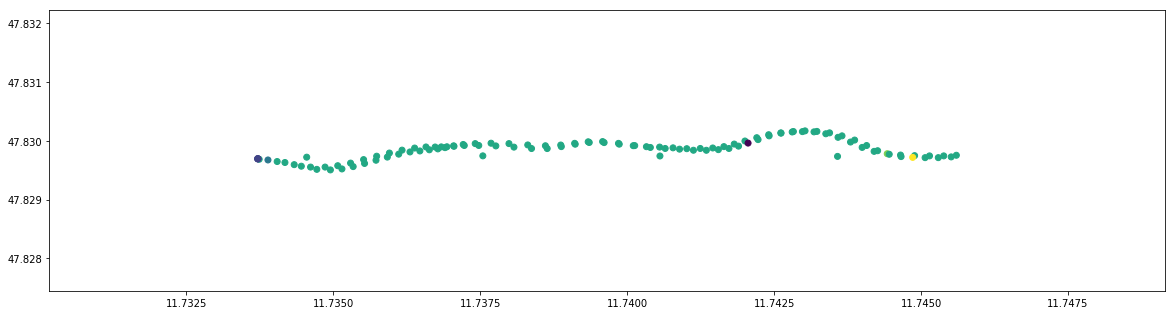

[['score_name', 'score_result'], ['adjusted_rand_score', -0.023442211586633722], ['adjusted_mutual_info_score', 0.027466788037595936], ['homogeneity_score', 0.0679482341147111], ['completeness_score', 0.1183178185367723], ['v_measure_score', 0.08632261992388857], ['fowlkes_mallows_score', 0.7576887197922504], ['silhouette_score', -0.00659452769966754], ['davies_bouldin_score', 0.9410215047316819], ['calinski_harabasz_score', 1.7233674183626475]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5], dtype=int32), array([35, 11, 43,  4,  7, 18]))


<Figure size 1200x400 with 0 Axes>

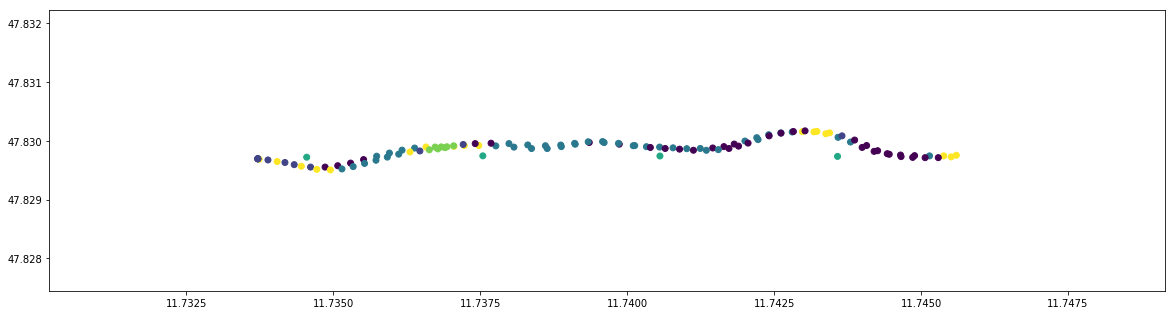

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08775186060234307], ['adjusted_mutual_info_score', 0.11045952921900827], ['homogeneity_score', 0.26452871937404376], ['completeness_score', 0.10369739972789413], ['v_measure_score', 0.14898965026891153], ['fowlkes_mallows_score', 0.4728077868753224], ['silhouette_score', 0.39504520457527587], ['davies_bouldin_score', 0.8195717428663093], ['calinski_harabasz_score', 194.59096065490073]]
----------------------------------------------------------------
window_length: 50
sub_sample_length: 25
clusters: 9
Ground truth
y (array([1., 2., 3.]), array([238, 428,  70]))


<Figure size 1200x400 with 0 Axes>

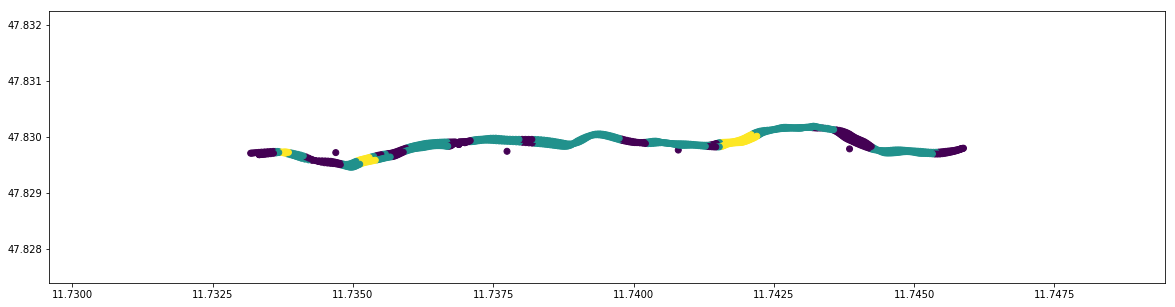


---- Dec ----
...Pretraining...
Pretraining time: 74s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 156)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               78500     
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 9)                 90        
Total params: 1,351,100
Trainable

<Figure size 1200x400 with 0 Axes>

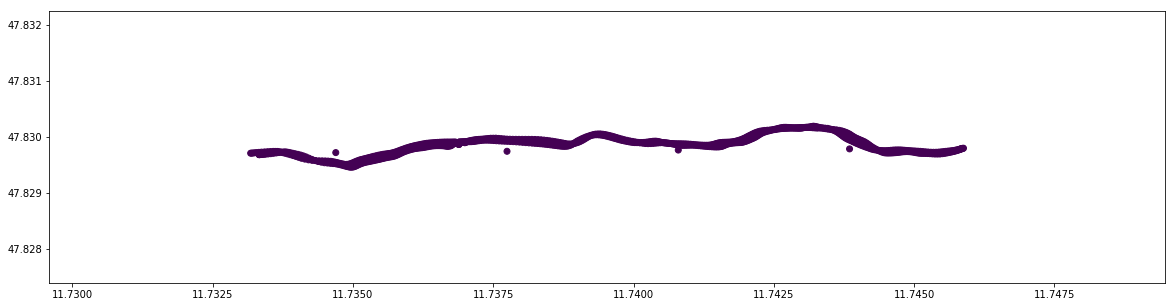

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0], ['adjusted_mutual_info_score', 3.670679701080814e-15], ['homogeneity_score', 1.0131075974986722e-15], ['completeness_score', 1.0], ['v_measure_score', 2.026215194997342e-15], ['fowlkes_mallows_score', 0.6715915400653664], ['silhouette_score', 0], ['davies_bouldin_score', 0], ['calinski_harabasz_score', 0]]

---- Fidec ----
...Pretraining...
Pretraining time: 73s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 156)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)          78500       input[0][0]                      
_______________________

<Figure size 1200x400 with 0 Axes>

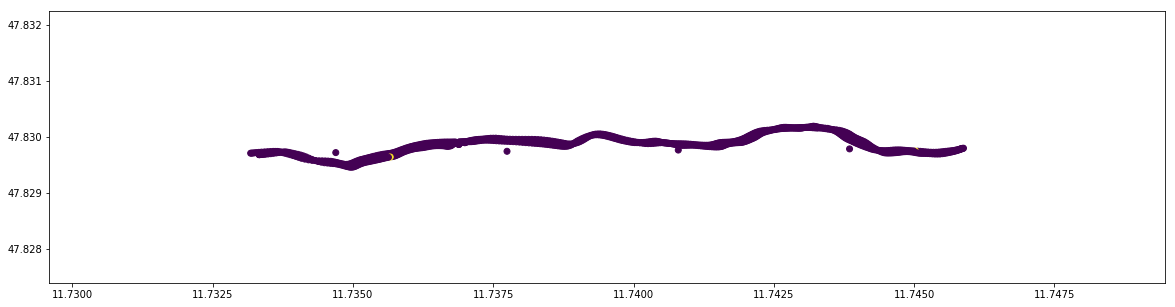

[['score_name', 'score_result'], ['adjusted_rand_score', -0.0025600650519508506], ['adjusted_mutual_info_score', 0.00010724098317503845], ['homogeneity_score', 0.0016323491429051553], ['completeness_score', 0.07863165943870269], ['v_measure_score', 0.0031983033032663226], ['fowlkes_mallows_score', 0.6687184214576716], ['silhouette_score', 0.09292537636361606], ['davies_bouldin_score', 2.0661754665576835], ['calinski_harabasz_score', 1.4701704097694455]]

---- Dcec ----
input_shape (52, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
____________________________________________

saving model to: results/dcec_model_2760.h5
saving model to: results/dcec_model_2875.h5
saving model to: results/dcec_model_2990.h5
saving model to: results/dcec_model_3105.h5
saving model to: results/dcec_model_3220.h5
saving model to: results/dcec_model_3335.h5
saving model to: results/dcec_model_3450.h5
saving model to: results/dcec_model_3565.h5
saving model to: results/dcec_model_3680.h5
saving model to: results/dcec_model_3795.h5
saving model to: results/dcec_model_3910.h5
saving model to: results/dcec_model_4025.h5
saving model to: results/dcec_model_4140.h5
saving model to: results/dcec_model_4255.h5
saving model to: results/dcec_model_4370.h5
saving model to: results/dcec_model_4485.h5
saving model to: results/dcec_model_4600.h5
saving model to: results/dcec_model_4715.h5
saving model to: results/dcec_model_4830.h5
saving model to: results/dcec_model_4945.h5
saving model to: results/dcec_model_5060.h5
saving model to: results/dcec_model_5175.h5
saving model to: results/dcec_mo

<Figure size 1200x400 with 0 Axes>

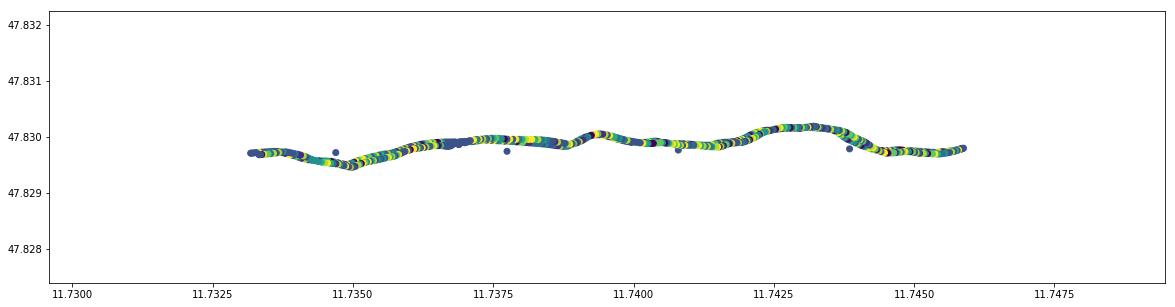

[['score_name', 'score_result'], ['adjusted_rand_score', -0.003931311650496246], ['adjusted_mutual_info_score', 0.013145080427330208], ['homogeneity_score', 0.03344055785478743], ['completeness_score', 0.014950161272776794], ['v_measure_score', 0.020662711445258067], ['fowlkes_mallows_score', 0.2666442764780358], ['silhouette_score', -0.014261241498441183], ['davies_bouldin_score', 5.718540601517061], ['calinski_harabasz_score', 5.624369572310306]]

---- Fidcec ----
input_shape (52, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
_______________________________________________

saving model to: results/dcec_model_1495.h5
saving model to: results/dcec_model_1610.h5
saving model to: results/dcec_model_1725.h5
saving model to: results/dcec_model_1840.h5
saving model to: results/dcec_model_1955.h5
saving model to: results/dcec_model_2070.h5
saving model to: results/dcec_model_2185.h5
saving model to: results/dcec_model_2300.h5
saving model to: results/dcec_model_2415.h5
saving model to: results/dcec_model_2530.h5
saving model to: results/dcec_model_2645.h5
saving model to: results/dcec_model_2760.h5
saving model to: results/dcec_model_2875.h5
saving model to: results/dcec_model_2990.h5
saving model to: results/dcec_model_3105.h5
saving model to: results/dcec_model_3220.h5
saving model to: results/dcec_model_3335.h5
saving model to: results/dcec_model_3450.h5
saving model to: results/dcec_model_3565.h5
saving model to: results/dcec_model_3680.h5
saving model to: results/dcec_model_3795.h5
saving model to: results/dcec_model_3910.h5
saving model to: results/dcec_mo

<Figure size 1200x400 with 0 Axes>

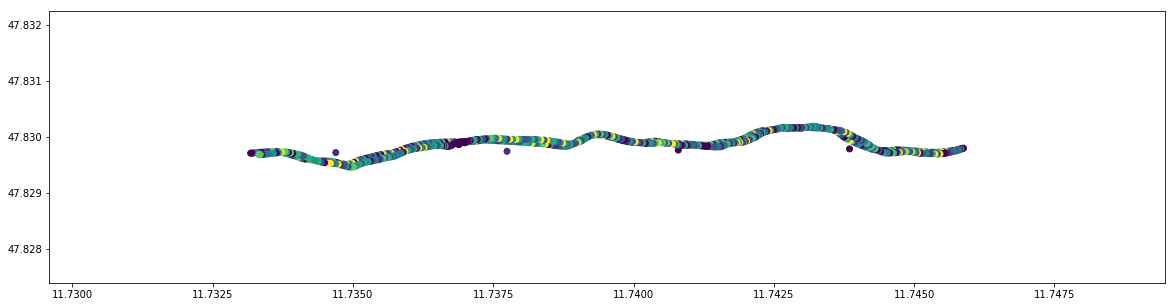

[['score_name', 'score_result'], ['adjusted_rand_score', 0.011045785849865885], ['adjusted_mutual_info_score', 0.011207419421380736], ['homogeneity_score', 0.028722188992008582], ['completeness_score', 0.012856652318833749], ['v_measure_score', 0.017762457349180392], ['fowlkes_mallows_score', 0.26048356614511364], ['silhouette_score', -0.05654809662495981], ['davies_bouldin_score', 11.424800204731255], ['calinski_harabasz_score', 3.1141100844074443]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([  8,  80,   5,  43, 165,  63,  41,  84, 247]))


<Figure size 1200x400 with 0 Axes>

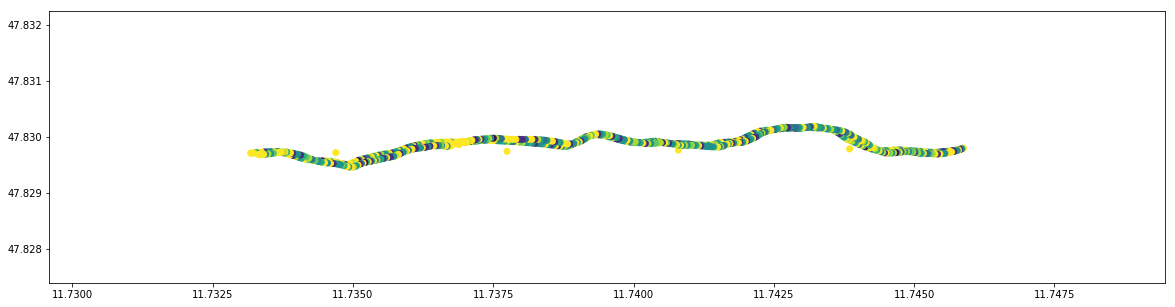

[['score_name', 'score_result'], ['adjusted_rand_score', -0.0004105099050754462], ['adjusted_mutual_info_score', 0.015254777870342335], ['homogeneity_score', 0.03533754009511277], ['completeness_score', 0.017642847832200954], ['v_measure_score', 0.023535306820241537], ['fowlkes_mallows_score', 0.3005091357511645], ['silhouette_score', 0.0002491511516454483], ['davies_bouldin_score', 4.874743058249799], ['calinski_harabasz_score', 6.1316220839879]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([157,   4, 116,  79,  58, 169,   4, 132,  17]))


<Figure size 1200x400 with 0 Axes>

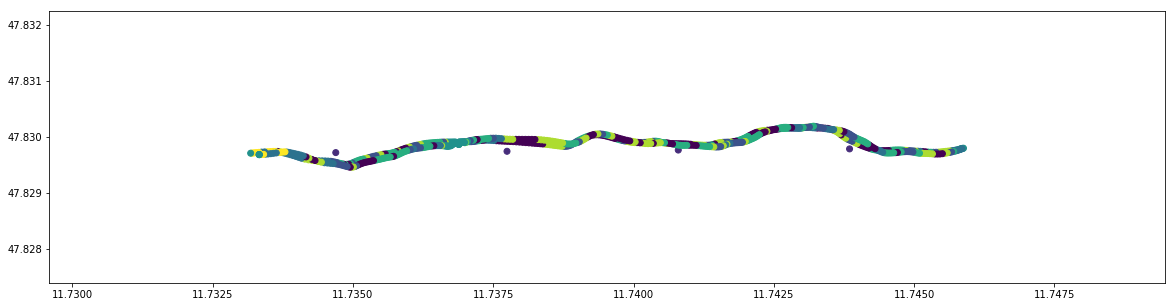

[['score_name', 'score_result'], ['adjusted_rand_score', 0.03839526623037345], ['adjusted_mutual_info_score', 0.05851698866828471], ['homogeneity_score', 0.10104323351328617], ['completeness_score', 0.04937092122904057], ['v_measure_score', 0.06633149029169402], ['fowlkes_mallows_score', 0.31109067970917825], ['silhouette_score', 0.19851368969978878], ['davies_bouldin_score', 1.1466648764319054], ['calinski_harabasz_score', 483.87323470289334]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 25
clusters: 9
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

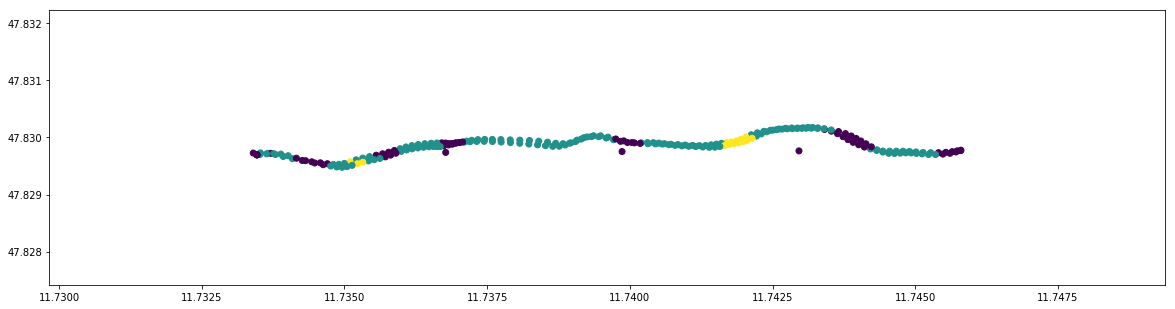


---- Dec ----
...Pretraining...
Pretraining time: 43s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 9)                 90        
Total params: 1,501,100
Trainable

<Figure size 1200x400 with 0 Axes>

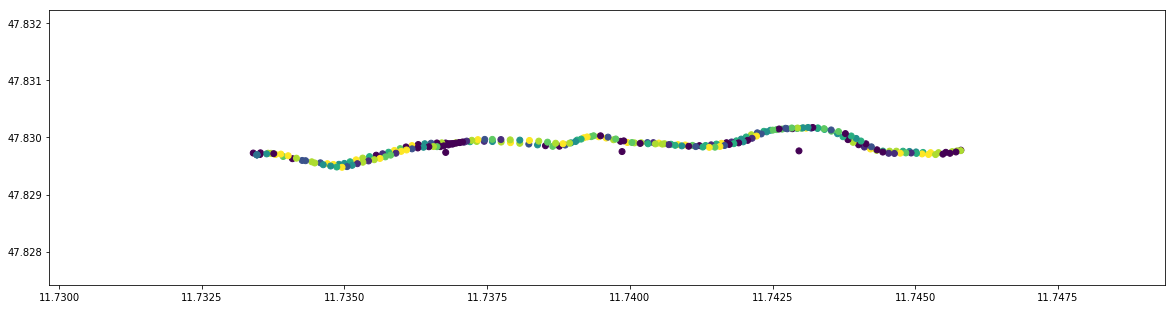

[['score_name', 'score_result'], ['adjusted_rand_score', 0.02180470611968752], ['adjusted_mutual_info_score', 0.05872567349629144], ['homogeneity_score', 0.14635922694460005], ['completeness_score', 0.057546351641459284], ['v_measure_score', 0.08261117325116601], ['fowlkes_mallows_score', 0.28127084744324915], ['silhouette_score', -0.031330428512469505], ['davies_bouldin_score', 5.531451336156258], ['calinski_harabasz_score', 2.04932870302529]]

---- Fidec ----
...Pretraining...
Pretraining time: 43s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500) 

<Figure size 1200x400 with 0 Axes>

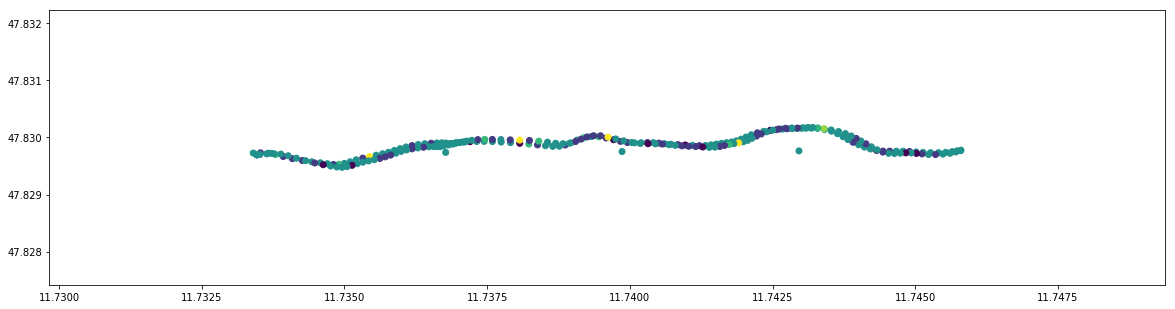

[['score_name', 'score_result'], ['adjusted_rand_score', -0.06363270887861276], ['adjusted_mutual_info_score', 0.05052322446251541], ['homogeneity_score', 0.0809589010721792], ['completeness_score', 0.06660698710535816], ['v_measure_score', 0.07308502725631205], ['fowlkes_mallows_score', 0.4642055551299728], ['silhouette_score', 0.0019277789667262754], ['davies_bouldin_score', 5.717466197754036], ['calinski_harabasz_score', 1.2773697390168928]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
____________________________________________________

<Figure size 1200x400 with 0 Axes>

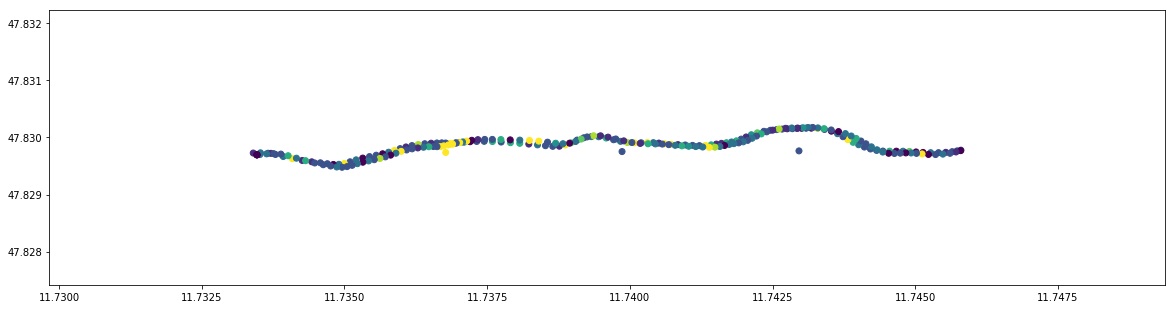

[['score_name', 'score_result'], ['adjusted_rand_score', -0.008730973903704921], ['adjusted_mutual_info_score', 0.005027337792745814], ['homogeneity_score', 0.05230674063226614], ['completeness_score', 0.023124726723227056], ['v_measure_score', 0.03207094135404713], ['fowlkes_mallows_score', 0.3058149816701003], ['silhouette_score', -0.05499788866487135], ['davies_bouldin_score', 6.049861744830969], ['calinski_harabasz_score', 1.4595202034236874]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_______________________________________________

<Figure size 1200x400 with 0 Axes>

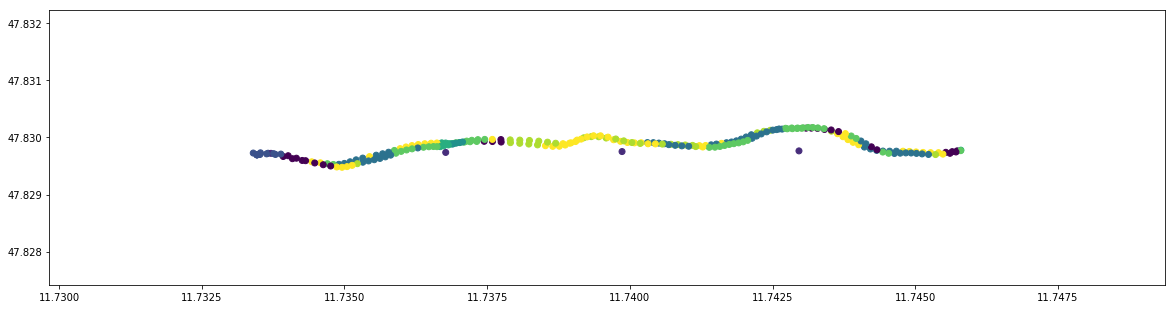

[['score_name', 'score_result'], ['adjusted_rand_score', 0.039912574472428325], ['adjusted_mutual_info_score', 0.08640823991101457], ['homogeneity_score', 0.1850686778993367], ['completeness_score', 0.0788430522164132], ['v_measure_score', 0.1105777255815062], ['fowlkes_mallows_score', 0.3246276755408349], ['silhouette_score', -0.2188187536330345], ['davies_bouldin_score', 7.887690399441066], ['calinski_harabasz_score', 0.8676968830502603]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([  1,   1,   1,   1, 228,   1,   1,   1,   4]))


<Figure size 1200x400 with 0 Axes>

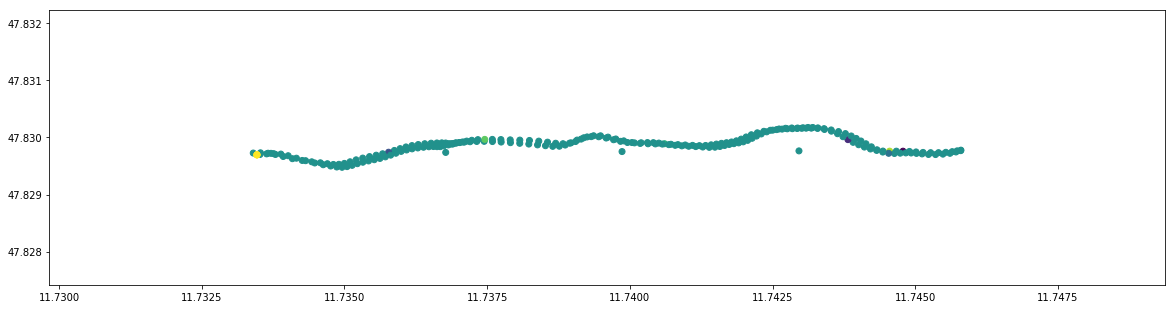

[['score_name', 'score_result'], ['adjusted_rand_score', 0.02078549585460634], ['adjusted_mutual_info_score', 0.023965911021948134], ['homogeneity_score', 0.04996931493202004], ['completeness_score', 0.1484214907719899], ['v_measure_score', 0.0747667734777042], ['fowlkes_mallows_score', 0.6860716261807248], ['silhouette_score', -0.038230596429290824], ['davies_bouldin_score', 0.9437830356865814], ['calinski_harabasz_score', 1.487887166546924]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([10,  4, 29, 45,  4, 12, 52, 41, 42]))


<Figure size 1200x400 with 0 Axes>

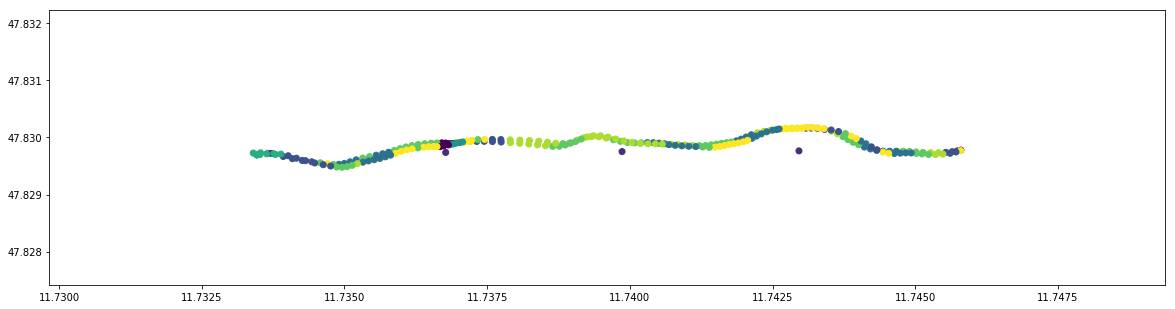

[['score_name', 'score_result'], ['adjusted_rand_score', 0.03985996265657758], ['adjusted_mutual_info_score', 0.0741030148564413], ['homogeneity_score', 0.16592681877674215], ['completeness_score', 0.06991590312751829], ['v_measure_score', 0.09837847268877217], ['fowlkes_mallows_score', 0.3191169926823162], ['silhouette_score', 0.24995230710438882], ['davies_bouldin_score', 0.9817265711716158], ['calinski_harabasz_score', 342.63136681157704]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 75
clusters: 9
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

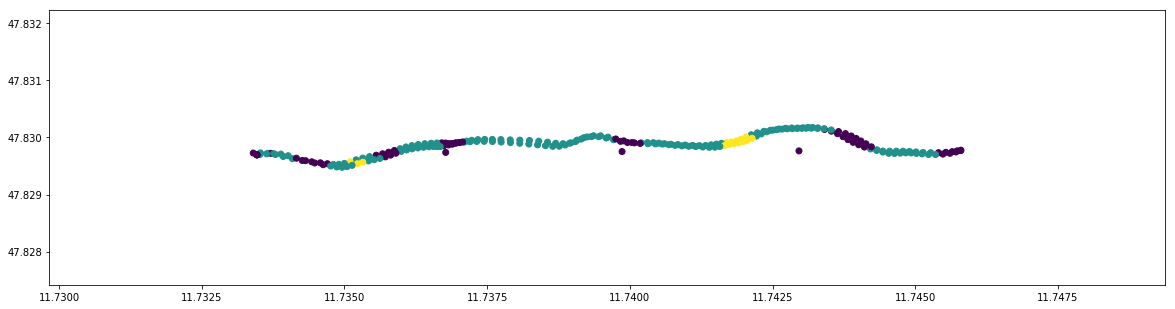


---- Dec ----
...Pretraining...
Pretraining time: 43s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 9)                 90        
Total params: 1,501,100
Trainable

<Figure size 1200x400 with 0 Axes>

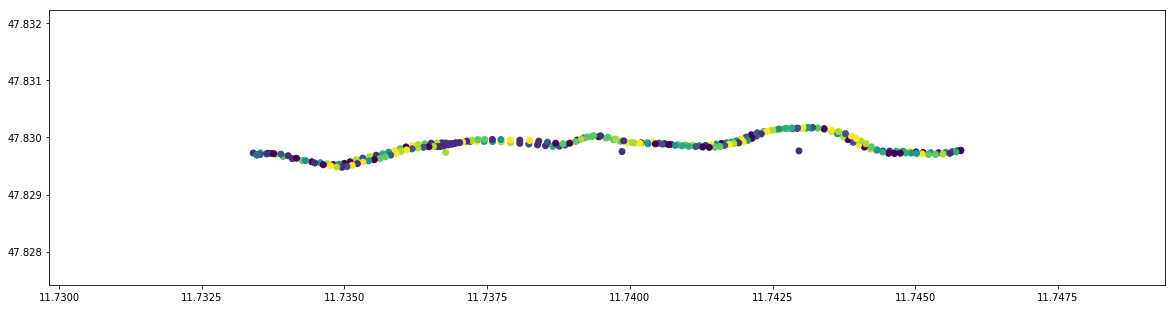

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0070407572300905], ['adjusted_mutual_info_score', 0.025908861374801168], ['homogeneity_score', 0.08978246730608483], ['completeness_score', 0.03513248402023087], ['v_measure_score', 0.050502859176368535], ['fowlkes_mallows_score', 0.26330870639732384], ['silhouette_score', -0.0399212232874944], ['davies_bouldin_score', 5.44714733224833], ['calinski_harabasz_score', 2.0727296168057148]]

---- Fidec ----
...Pretraining...
Pretraining time: 45s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)  

<Figure size 1200x400 with 0 Axes>

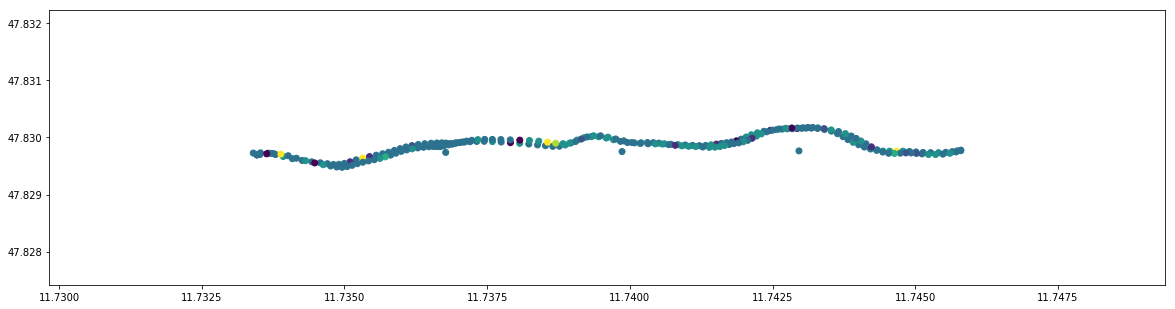

[['score_name', 'score_result'], ['adjusted_rand_score', -0.03808782473252844], ['adjusted_mutual_info_score', 0.03162398788795893], ['homogeneity_score', 0.0713465983652708], ['completeness_score', 0.05584036534242576], ['v_measure_score', 0.06264824636921418], ['fowlkes_mallows_score', 0.4780455368096229], ['silhouette_score', -0.026385701973507973], ['davies_bouldin_score', 4.701146876824384], ['calinski_harabasz_score', 1.2859271004935586]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
____________________________________________________

<Figure size 1200x400 with 0 Axes>

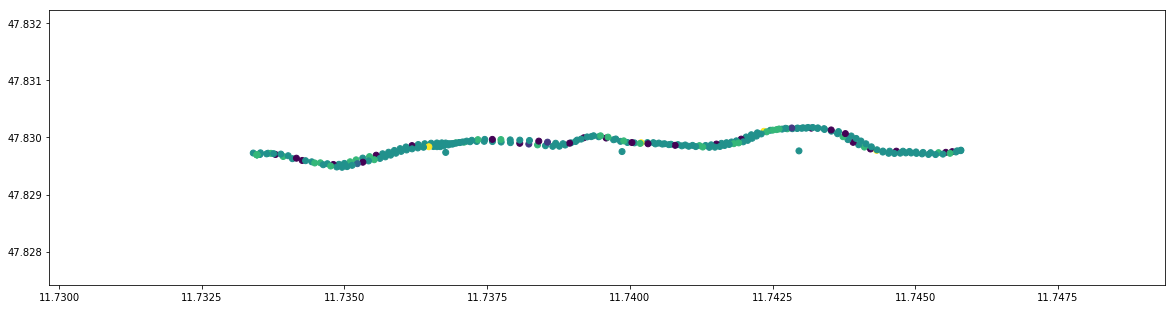

[['score_name', 'score_result'], ['adjusted_rand_score', 0.031954269623043714], ['adjusted_mutual_info_score', 0.011999704549704303], ['homogeneity_score', 0.03831627502982959], ['completeness_score', 0.03419428180688675], ['v_measure_score', 0.03613811735332699], ['fowlkes_mallows_score', 0.5368415786846173], ['silhouette_score', -0.0001456431287623689], ['davies_bouldin_score', 4.940556086479148], ['calinski_harabasz_score', 1.4324049255447397]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_______________________________________________

<Figure size 1200x400 with 0 Axes>

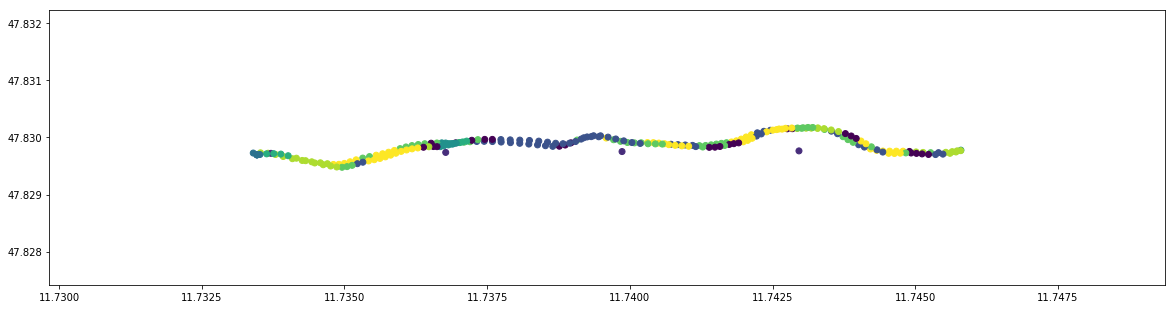

[['score_name', 'score_result'], ['adjusted_rand_score', 0.04194938808795091], ['adjusted_mutual_info_score', 0.07558175134362231], ['homogeneity_score', 0.16762188239956585], ['completeness_score', 0.07130602921952292], ['v_measure_score', 0.10005068694753497], ['fowlkes_mallows_score', 0.3259418987171876], ['silhouette_score', -0.20812444567936858], ['davies_bouldin_score', 7.647724324935707], ['calinski_harabasz_score', 1.0214642773249698]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([  1, 150,  70,   1,   8,   1,   2,   1,   5]))


<Figure size 1200x400 with 0 Axes>

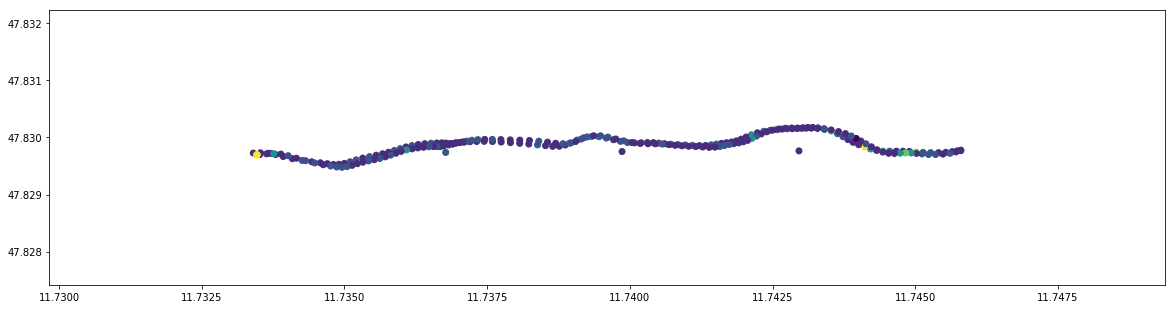

[['score_name', 'score_result'], ['adjusted_rand_score', -0.01501442907320417], ['adjusted_mutual_info_score', 0.03044135431184039], ['homogeneity_score', 0.07047892877799927], ['completeness_score', 0.05858874458151726], ['v_measure_score', 0.06398615314078075], ['fowlkes_mallows_score', 0.48470313136946436], ['silhouette_score', 0.002692446702036469], ['davies_bouldin_score', 3.3111326438560518], ['calinski_harabasz_score', 1.8296398065343007]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([54,  4,  6, 32, 29, 12, 42, 52,  8]))


<Figure size 1200x400 with 0 Axes>

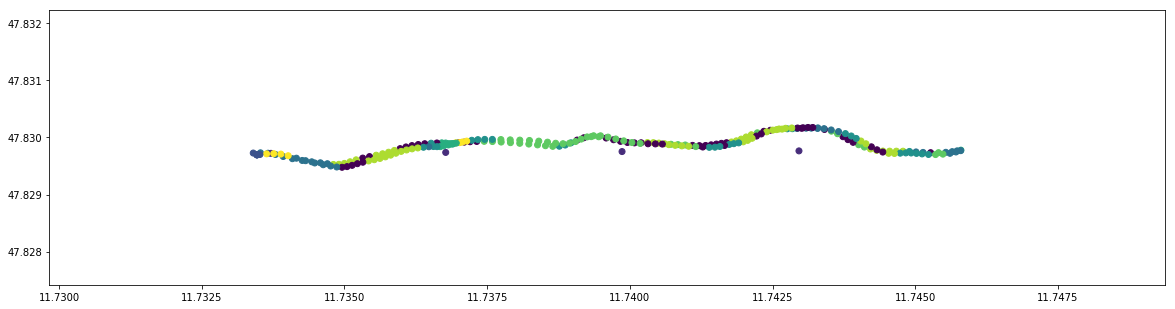

[['score_name', 'score_result'], ['adjusted_rand_score', 0.042077509518279654], ['adjusted_mutual_info_score', 0.08713307336755764], ['homogeneity_score', 0.18712801970240217], ['completeness_score', 0.07911821587213877], ['v_measure_score', 0.11121460573210974], ['fowlkes_mallows_score', 0.32403725360450036], ['silhouette_score', 0.2613460434612861], ['davies_bouldin_score', 1.0649322107800392], ['calinski_harabasz_score', 274.76330475426875]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 150
clusters: 9
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

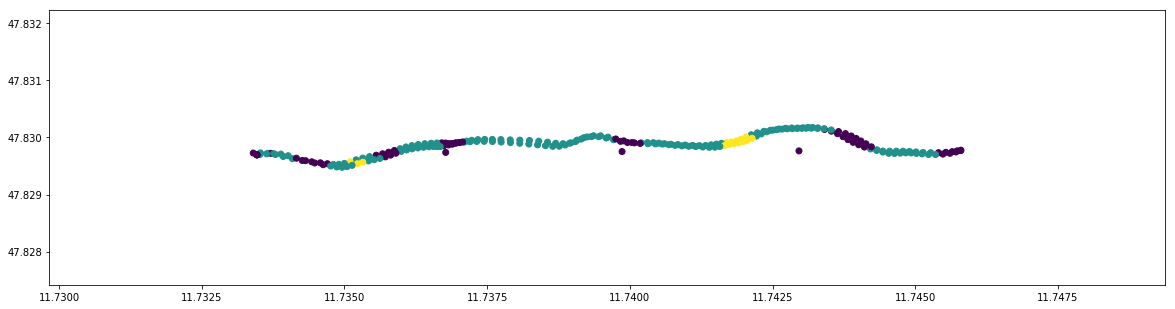


---- Dec ----
...Pretraining...
Pretraining time: 45s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 9)                 90        
Total params: 1,501,100
Trainable

<Figure size 1200x400 with 0 Axes>

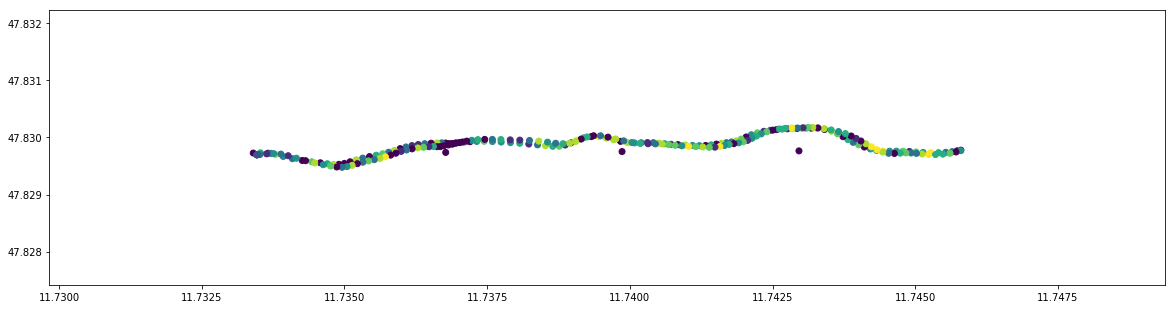

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0004690740222014067], ['adjusted_mutual_info_score', 0.0282236927073179], ['homogeneity_score', 0.09303808905739859], ['completeness_score', 0.03720465360682134], ['v_measure_score', 0.05315382346554398], ['fowlkes_mallows_score', 0.26921879924819386], ['silhouette_score', -0.020943883091717127], ['davies_bouldin_score', 5.3463911265476325], ['calinski_harabasz_score', 2.061116312388673]]

---- Fidec ----
...Pretraining...
Pretraining time: 45s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500

<Figure size 1200x400 with 0 Axes>

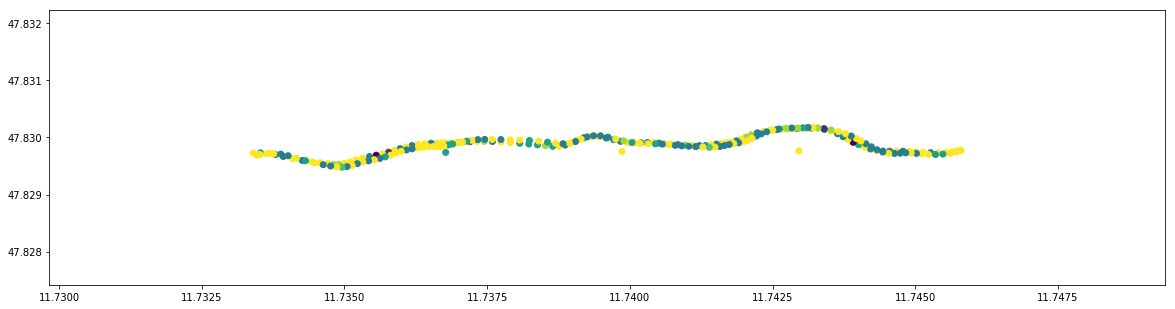

[['score_name', 'score_result'], ['adjusted_rand_score', -0.0013782958427065108], ['adjusted_mutual_info_score', 0.04305657006788289], ['homogeneity_score', 0.08408069950163519], ['completeness_score', 0.05562484913233967], ['v_measure_score', 0.06695476694305978], ['fowlkes_mallows_score', 0.4268174837337134], ['silhouette_score', -0.03783821689973523], ['davies_bouldin_score', 5.3946588301354526], ['calinski_harabasz_score', 1.2850403505203727]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

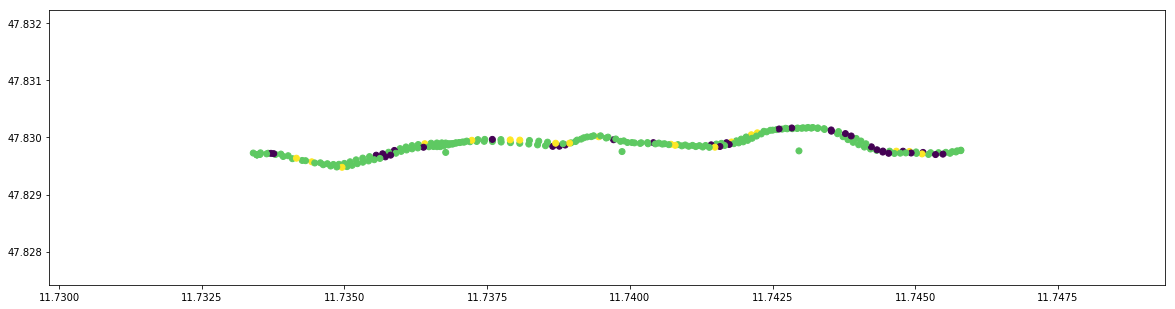

[['score_name', 'score_result'], ['adjusted_rand_score', -0.024952171989579698], ['adjusted_mutual_info_score', -0.00013154775240691594], ['homogeneity_score', 0.01114114387936471], ['completeness_score', 0.013446537819428275], ['v_measure_score', 0.012185761501290594], ['fowlkes_mallows_score', 0.5537960352201476], ['silhouette_score', 0.02825453113843092], ['davies_bouldin_score', 7.562974217792289], ['calinski_harabasz_score', 1.6594332341693425]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
____________________________________________

<Figure size 1200x400 with 0 Axes>

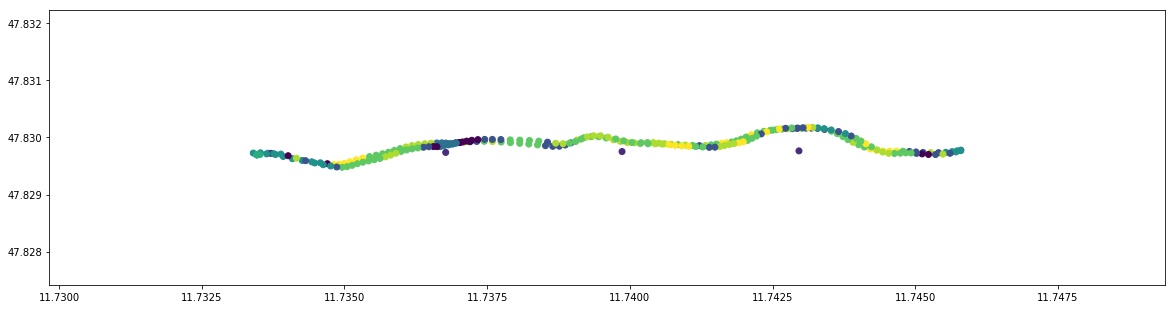

[['score_name', 'score_result'], ['adjusted_rand_score', 0.03211060584255908], ['adjusted_mutual_info_score', 0.07874158603727263], ['homogeneity_score', 0.1720377991521874], ['completeness_score', 0.0739827850841827], ['v_measure_score', 0.10346967966553157], ['fowlkes_mallows_score', 0.32947092917742277], ['silhouette_score', -0.20092920424730787], ['davies_bouldin_score', 7.484642580981391], ['calinski_harabasz_score', 1.1310466447418628]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([126, 103,   1,   1,   1,   4,   1,   1,   1]))


<Figure size 1200x400 with 0 Axes>

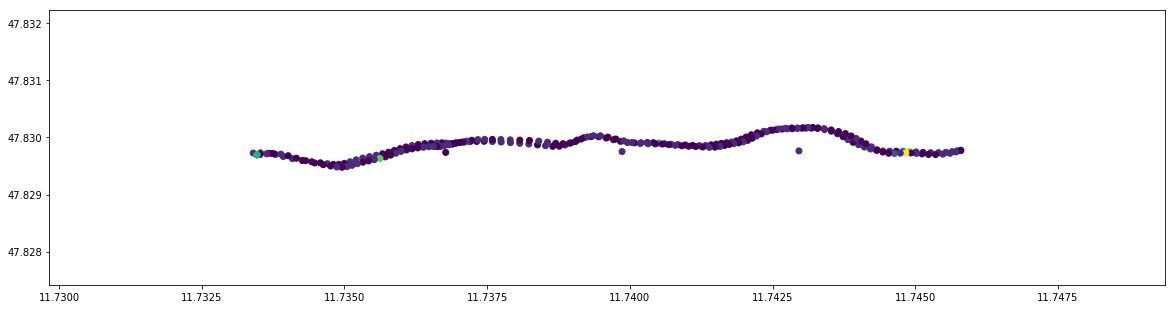

[['score_name', 'score_result'], ['adjusted_rand_score', -0.0056807666089552684], ['adjusted_mutual_info_score', 0.005540938999175112], ['homogeneity_score', 0.04150834687295285], ['completeness_score', 0.037251506955054005], ['v_measure_score', 0.0392648893332698], ['fowlkes_mallows_score', 0.4803665558995987], ['silhouette_score', -0.009432194315219935], ['davies_bouldin_score', 2.793422628188067], ['calinski_harabasz_score', 1.8685439255314105]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([38,  4, 26,  5, 79, 24, 13, 11, 39]))


<Figure size 1200x400 with 0 Axes>

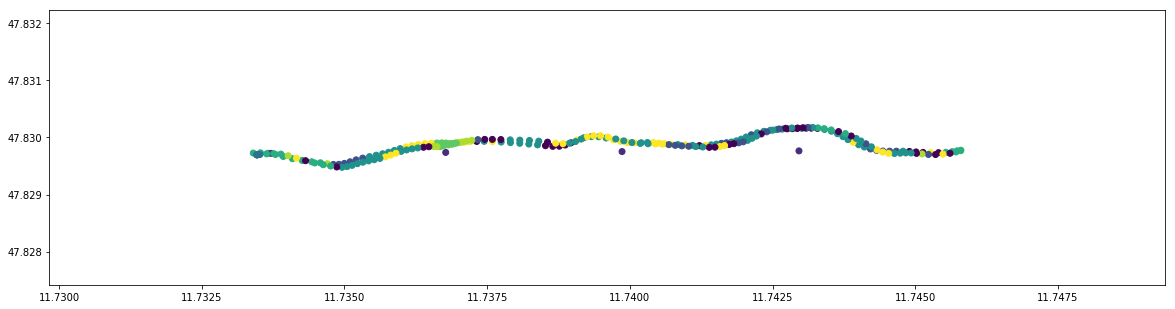

[['score_name', 'score_result'], ['adjusted_rand_score', 0.03487766255182747], ['adjusted_mutual_info_score', 0.07766864747352578], ['homogeneity_score', 0.16951919782272382], ['completeness_score', 0.07350122016518448], ['v_measure_score', 0.10254173690058781], ['fowlkes_mallows_score', 0.3349685455978739], ['silhouette_score', 0.27679972034300704], ['davies_bouldin_score', 0.9627334304700865], ['calinski_harabasz_score', 235.33375500896477]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 25
clusters: 9
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

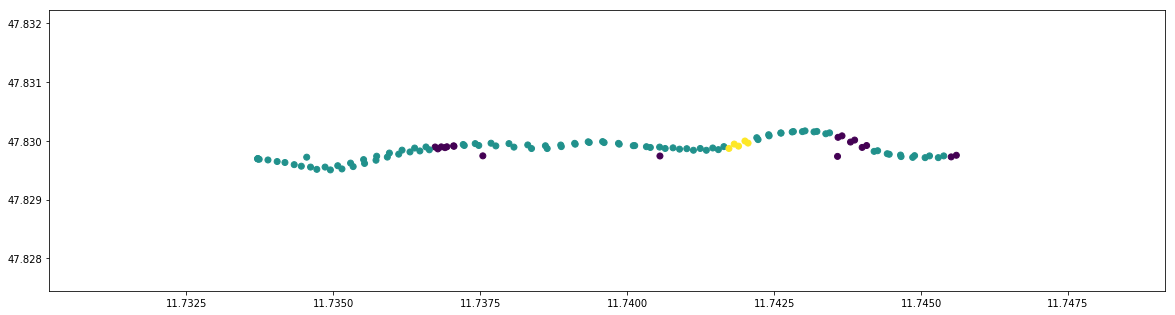


---- Dec ----
...Pretraining...
Pretraining time: 46s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 9)                 90        
Total params: 1,723,100
Trainable

<Figure size 1200x400 with 0 Axes>

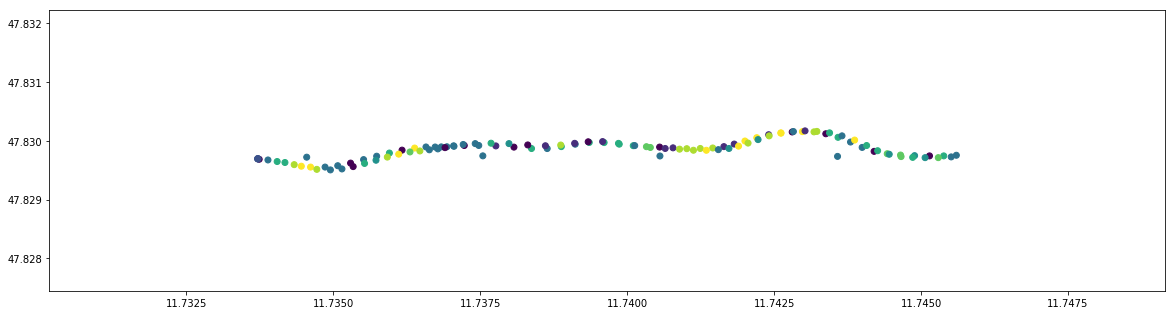

[['score_name', 'score_result'], ['adjusted_rand_score', -0.012925551666653493], ['adjusted_mutual_info_score', 0.07718612542433718], ['homogeneity_score', 0.2854923421639989], ['completeness_score', 0.08339603935394464], ['v_measure_score', 0.12908474105032533], ['fowlkes_mallows_score', 0.2971274961340775], ['silhouette_score', -0.008321427774294394], ['davies_bouldin_score', 4.4727314623287455], ['calinski_harabasz_score', 1.6314005181769364]]

---- Fidec ----
...Pretraining...
Pretraining time: 46s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500

<Figure size 1200x400 with 0 Axes>

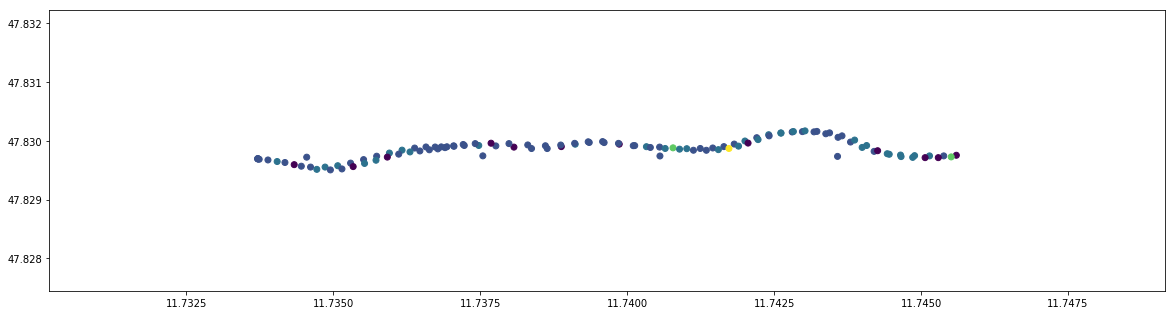

[['score_name', 'score_result'], ['adjusted_rand_score', 0.013353661523134464], ['adjusted_mutual_info_score', 0.027285338416647324], ['homogeneity_score', 0.08684937562275682], ['completeness_score', 0.05097544224765253], ['v_measure_score', 0.06424365944695405], ['fowlkes_mallows_score', 0.5439437671094428], ['silhouette_score', 0.002697244528808669], ['davies_bouldin_score', 4.822128719445344], ['calinski_harabasz_score', 1.2524311939785278]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
___________________________________________________

<Figure size 1200x400 with 0 Axes>

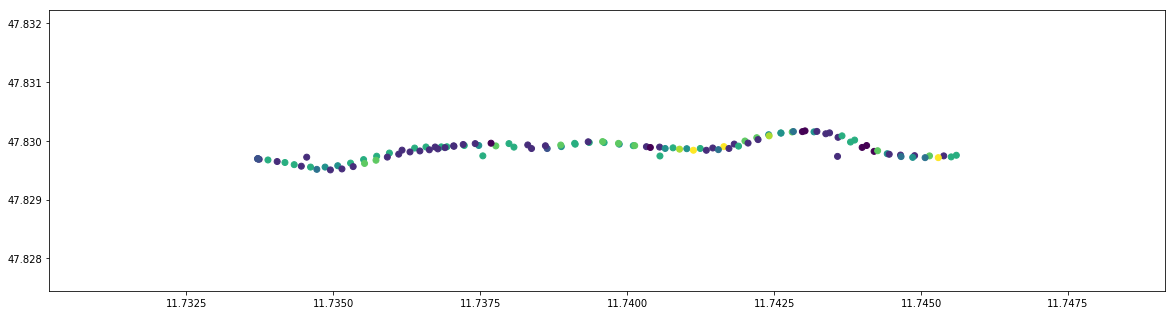

[['score_name', 'score_result'], ['adjusted_rand_score', -0.04318679925539687], ['adjusted_mutual_info_score', 0.022245333822625606], ['homogeneity_score', 0.15643623447129848], ['completeness_score', 0.05228203286337509], ['v_measure_score', 0.07837171567294211], ['fowlkes_mallows_score', 0.3425368839062404], ['silhouette_score', -0.005554197508788347], ['davies_bouldin_score', 4.510177033659693], ['calinski_harabasz_score', 1.4847243041753038]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
________________________________________________

<Figure size 1200x400 with 0 Axes>

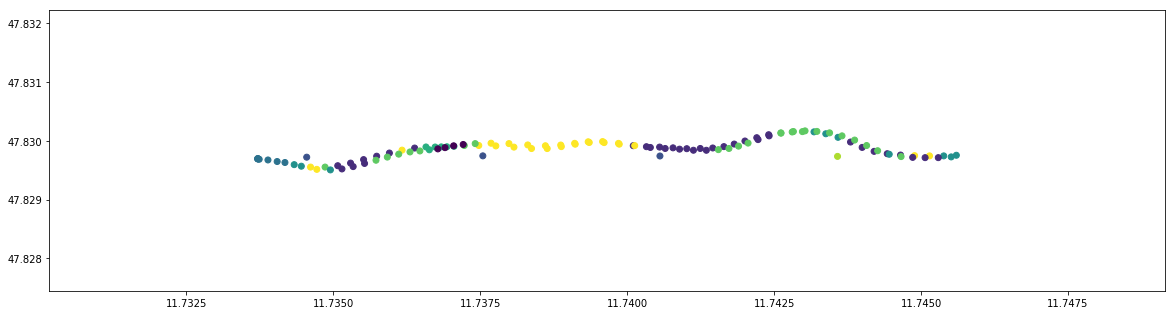

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07104737739600889], ['adjusted_mutual_info_score', 0.11164887519255916], ['homogeneity_score', 0.3259219867770165], ['completeness_score', 0.10712008136586439], ['v_measure_score', 0.16124433310695727], ['fowlkes_mallows_score', 0.41885645904570995], ['silhouette_score', -0.14342625935951253], ['davies_bouldin_score', 5.149207753986617], ['calinski_harabasz_score', 0.9004768760935188]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([89,  1,  1,  1,  4,  1,  1,  1, 19]))


<Figure size 1200x400 with 0 Axes>

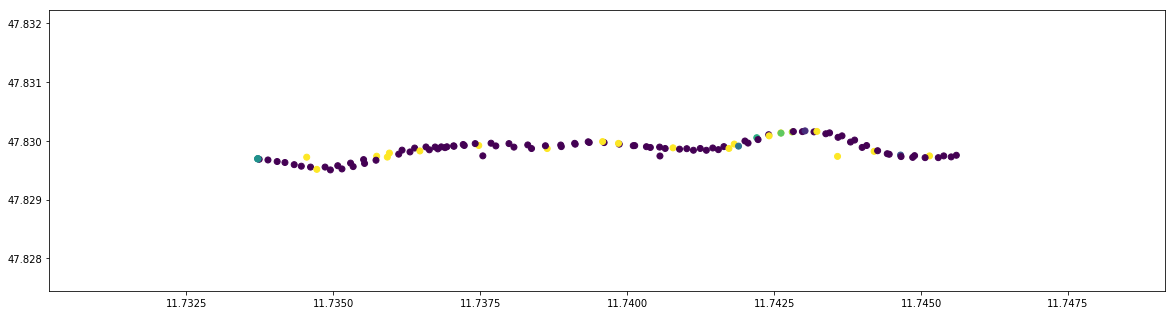

[['score_name', 'score_result'], ['adjusted_rand_score', -0.04026365534898209], ['adjusted_mutual_info_score', 0.0225356438215671], ['homogeneity_score', 0.1068907332560676], ['completeness_score', 0.07364388587114527], ['v_measure_score', 0.08720597743135364], ['fowlkes_mallows_score', 0.615538421016407], ['silhouette_score', 0.002701090299110918], ['davies_bouldin_score', 2.196728651104737], ['calinski_harabasz_score', 1.640254532512011]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([25,  3,  8,  4, 26, 10,  6,  1, 35]))


<Figure size 1200x400 with 0 Axes>

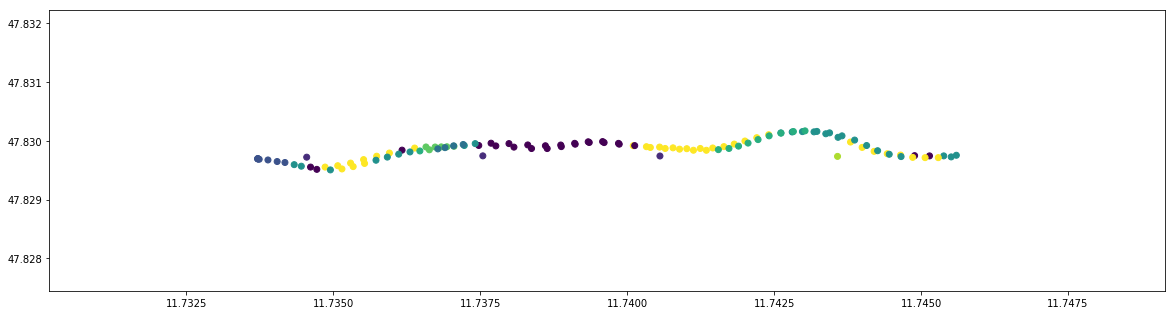

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0727622256140014], ['adjusted_mutual_info_score', 0.1413816899141488], ['homogeneity_score', 0.3830067924199336], ['completeness_score', 0.1256874463470701], ['v_measure_score', 0.1892655430481213], ['fowlkes_mallows_score', 0.4192284883941268], ['silhouette_score', 0.3007102746984633], ['davies_bouldin_score', 0.819381154261375], ['calinski_harabasz_score', 251.41146665053998]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 75
clusters: 9
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

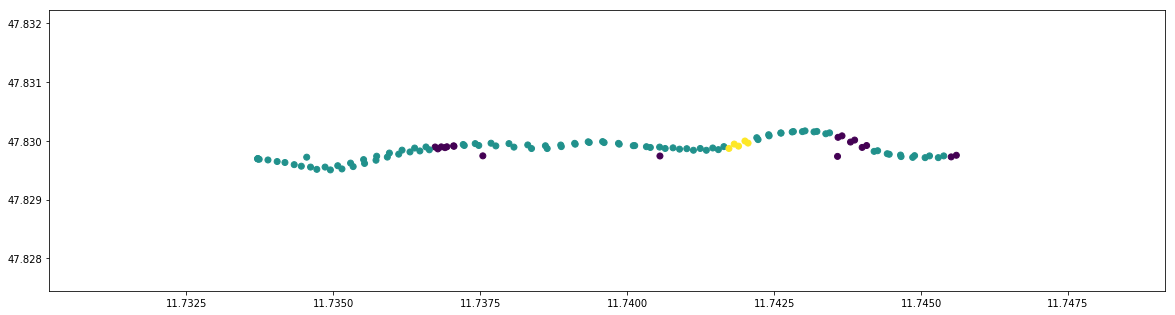


---- Dec ----
...Pretraining...
Pretraining time: 47s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 9)                 90        
Total params: 1,723,100
Trainable

<Figure size 1200x400 with 0 Axes>

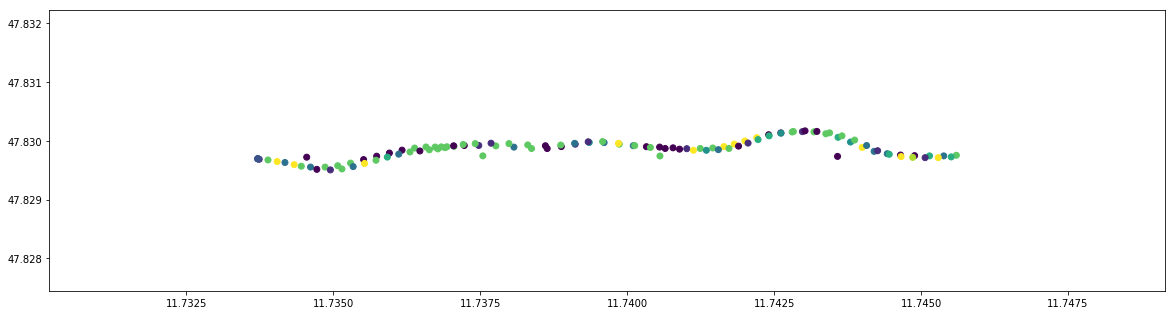

[['score_name', 'score_result'], ['adjusted_rand_score', -0.021801771184893404], ['adjusted_mutual_info_score', 0.006646452811689186], ['homogeneity_score', 0.12764174657066543], ['completeness_score', 0.04151985274770142], ['v_measure_score', 0.0626580328328456], ['fowlkes_mallows_score', 0.3442057575415099], ['silhouette_score', -0.001092689759703634], ['davies_bouldin_score', 4.056493565555283], ['calinski_harabasz_score', 1.6948548877949587]]

---- Fidec ----
...Pretraining...
Pretraining time: 47s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500

<Figure size 1200x400 with 0 Axes>

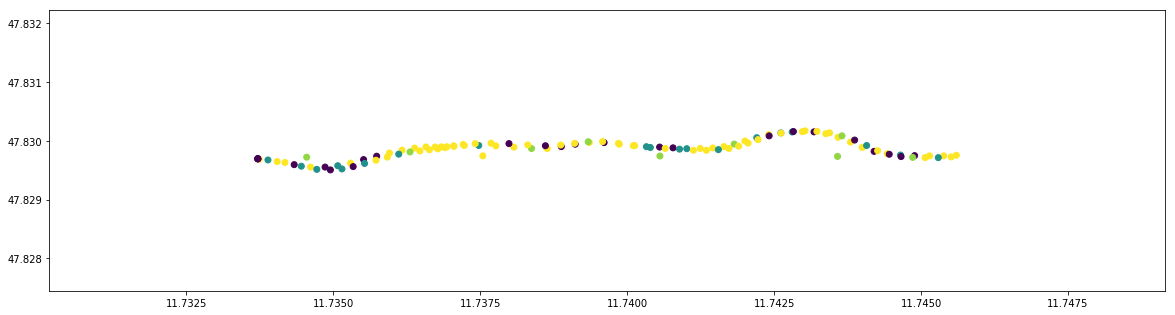

[['score_name', 'score_result'], ['adjusted_rand_score', -0.042929367827908495], ['adjusted_mutual_info_score', 0.037100438007500985], ['homogeneity_score', 0.10067599142601331], ['completeness_score', 0.05222745691548645], ['v_measure_score', 0.06877609447868675], ['fowlkes_mallows_score', 0.47801399930711697], ['silhouette_score', -0.010898582519473666], ['davies_bouldin_score', 6.311508146373571], ['calinski_harabasz_score', 1.2872633766655053]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
________________________________________________

<Figure size 1200x400 with 0 Axes>

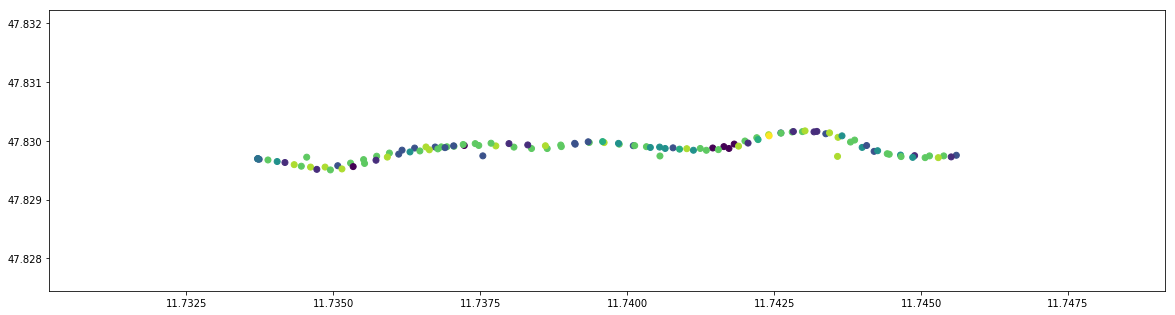

[['score_name', 'score_result'], ['adjusted_rand_score', -0.0003198033209575904], ['adjusted_mutual_info_score', 0.005247923720574434], ['homogeneity_score', 0.12349820517281128], ['completeness_score', 0.04079204937144629], ['v_measure_score', 0.06132737327200648], ['fowlkes_mallows_score', 0.37045327819288015], ['silhouette_score', -0.004570758448298912], ['davies_bouldin_score', 4.383485006832109], ['calinski_harabasz_score', 1.5168624131812354]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_____________________________________________

saving model to: results/dcec_model_3540.h5
saving model to: results/dcec_model_3835.h5
saving model to: results/dcec_model_4130.h5
saving model to: results/dcec_model_4425.h5
delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.
saving model to: results/dcec_model_final.h5
Pretrain time:   0.0
Clustering time: 265.75314116477966
Total time:      265.75314116477966
Fidcec
y (array([2, 3, 4, 6, 7, 8]), array([11,  6, 91,  3,  3,  4]))


<Figure size 1200x400 with 0 Axes>

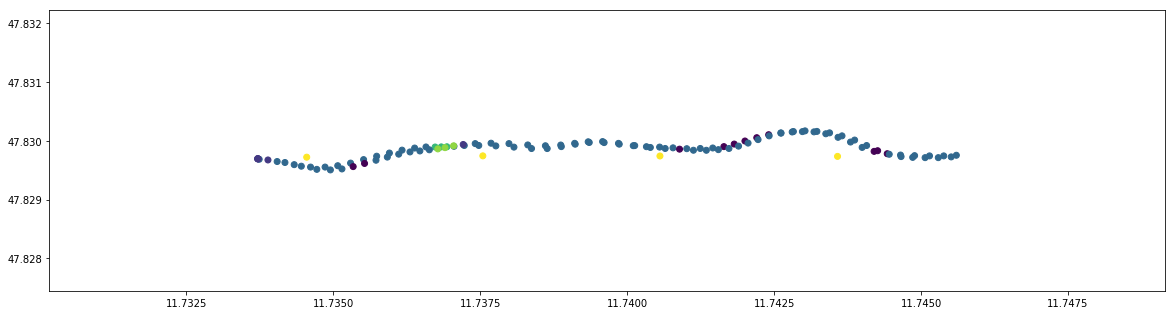

[['score_name', 'score_result'], ['adjusted_rand_score', 0.2375635567942515], ['adjusted_mutual_info_score', 0.19250553968813927], ['homogeneity_score', 0.2925716688527215], ['completeness_score', 0.1991771079098673], ['v_measure_score', 0.23700548577706926], ['fowlkes_mallows_score', 0.7234937043144294], ['silhouette_score', -0.1768228493685496], ['davies_bouldin_score', 4.494677216449256], ['calinski_harabasz_score', 0.9894728187654084]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([  4,   1,   1,   1, 107,   1,   1,   1,   1]))


<Figure size 1200x400 with 0 Axes>

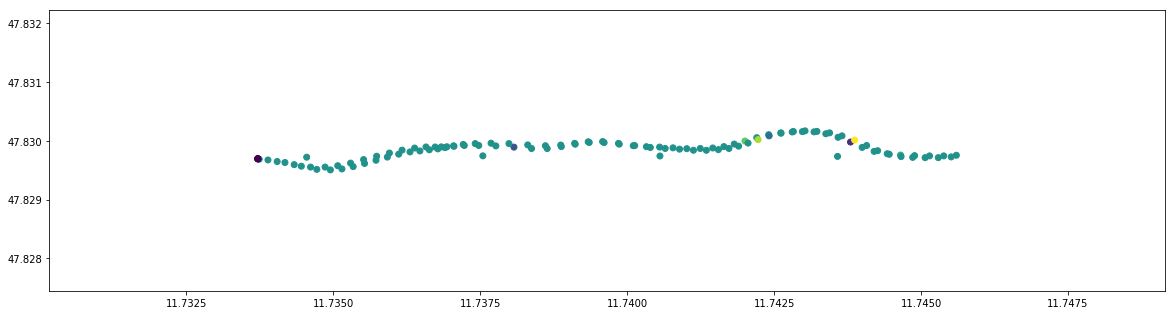

[['score_name', 'score_result'], ['adjusted_rand_score', 0.04972407759535254], ['adjusted_mutual_info_score', 0.06029634736045409], ['homogeneity_score', 0.12379631542262762], ['completeness_score', 0.1514995642860767], ['v_measure_score', 0.13625403959256424], ['fowlkes_mallows_score', 0.7555990004381157], ['silhouette_score', -0.02046233221044907], ['davies_bouldin_score', 0.9434782285553884], ['calinski_harabasz_score', 1.5182723625856966]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([ 7,  4, 15,  4,  6,  4, 42, 18, 18]))


<Figure size 1200x400 with 0 Axes>

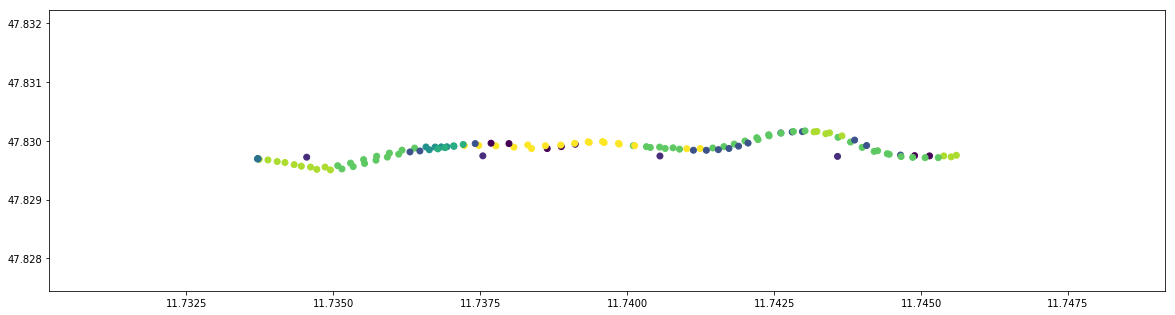

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0627419996374233], ['adjusted_mutual_info_score', 0.10137570046028109], ['homogeneity_score', 0.31619037377608833], ['completeness_score', 0.10083633082308657], ['v_measure_score', 0.1529085633199717], ['fowlkes_mallows_score', 0.41174822399144484], ['silhouette_score', 0.3172060950210094], ['davies_bouldin_score', 0.9343158573584223], ['calinski_harabasz_score', 209.97884685711523]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 150
clusters: 9
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

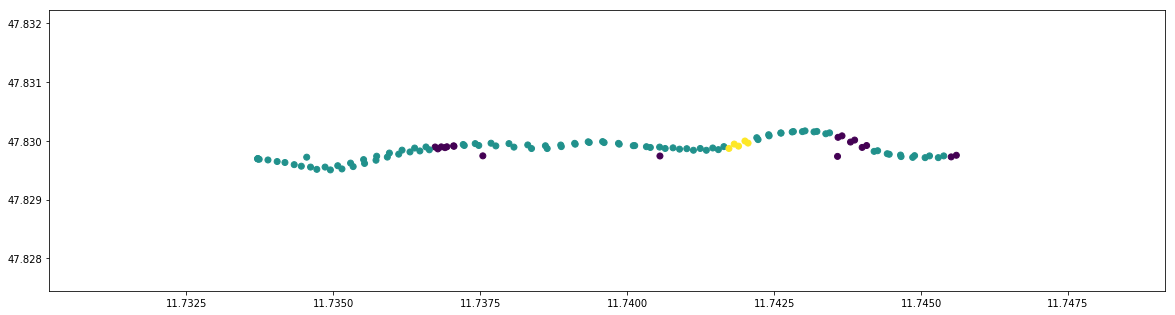


---- Dec ----
...Pretraining...
Pretraining time: 47s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 9)                 90        
Total params: 1,723,100
Trainable

<Figure size 1200x400 with 0 Axes>

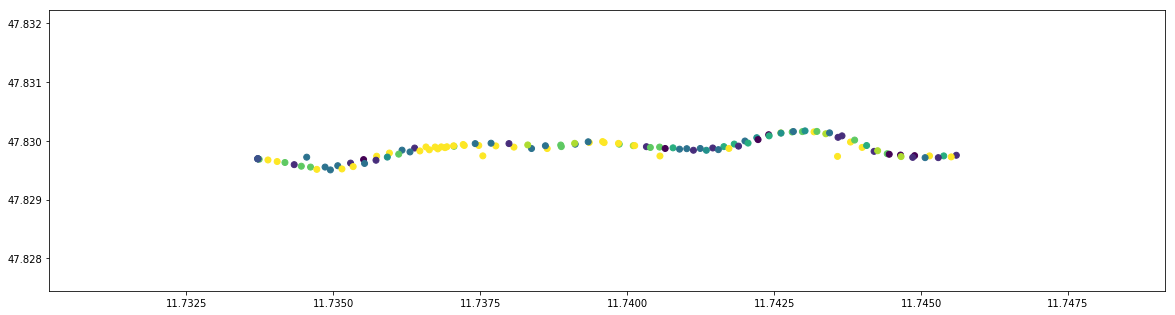

[['score_name', 'score_result'], ['adjusted_rand_score', -0.02028080291361019], ['adjusted_mutual_info_score', 0.048940834971670746], ['homogeneity_score', 0.22051043180410052], ['completeness_score', 0.06718648864356529], ['v_measure_score', 0.10299256313999297], ['fowlkes_mallows_score', 0.31465082792964594], ['silhouette_score', -0.007537712739521306], ['davies_bouldin_score', 4.4106021367258315], ['calinski_harabasz_score', 1.6354016423184587]]

---- Fidec ----
...Pretraining...
Pretraining time: 48s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 5

<Figure size 1200x400 with 0 Axes>

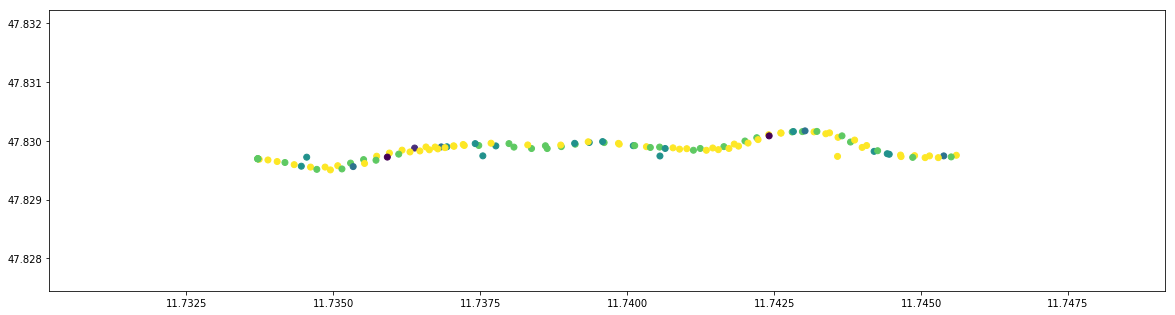

[['score_name', 'score_result'], ['adjusted_rand_score', -0.033606198651256254], ['adjusted_mutual_info_score', -0.012173294574903641], ['homogeneity_score', 0.047294640577437264], ['completeness_score', 0.023386105797867436], ['v_measure_score', 0.03129671162053555], ['fowlkes_mallows_score', 0.4707614879057272], ['silhouette_score', -0.09855929469927692], ['davies_bouldin_score', 4.645317676619425], ['calinski_harabasz_score', 1.1035074526768456]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_______________________________________________

<Figure size 1200x400 with 0 Axes>

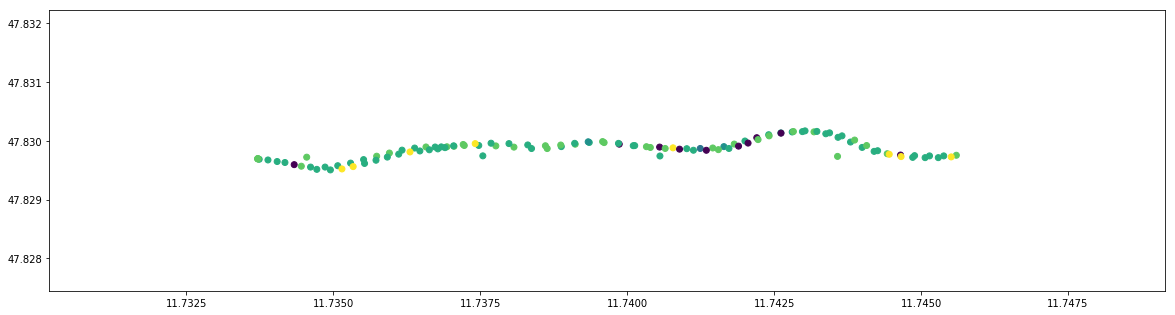

[['score_name', 'score_result'], ['adjusted_rand_score', -0.022781509435094955], ['adjusted_mutual_info_score', -0.0022328497688113885], ['homogeneity_score', 0.0632518447414593], ['completeness_score', 0.031264114586079646], ['v_measure_score', 0.04184505846097292], ['fowlkes_mallows_score', 0.48357111571965256], ['silhouette_score', -0.006671632549209429], ['davies_bouldin_score', 4.8724573498591015], ['calinski_harabasz_score', 1.196363570244979]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
____________________________________________

<Figure size 1200x400 with 0 Axes>

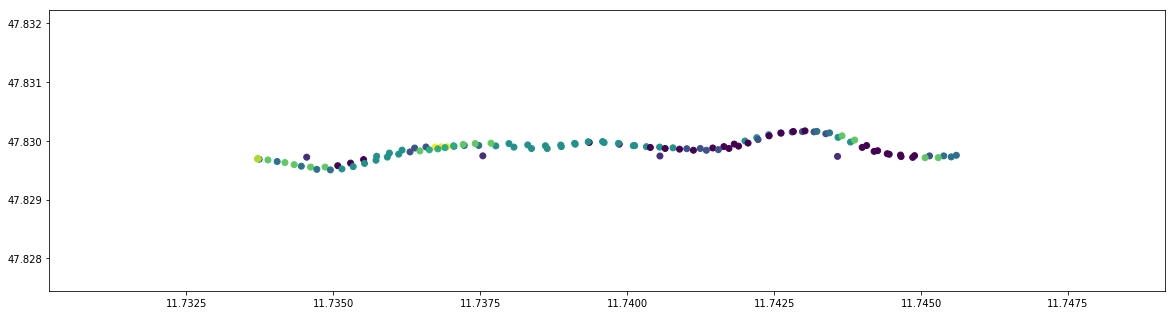

[['score_name', 'score_result'], ['adjusted_rand_score', 0.05134979428657888], ['adjusted_mutual_info_score', 0.10346423309432023], ['homogeneity_score', 0.32009129183063406], ['completeness_score', 0.10136753833062889], ['v_measure_score', 0.15397407277729672], ['fowlkes_mallows_score', 0.39151255613136554], ['silhouette_score', -0.15780941539018198], ['davies_bouldin_score', 5.243898832189349], ['calinski_harabasz_score', 1.1025748594737312]]

---- Classical_raw ----
Classical_raw
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([  1,   1, 107,   1,   4,   1,   1,   1,   1]))


<Figure size 1200x400 with 0 Axes>

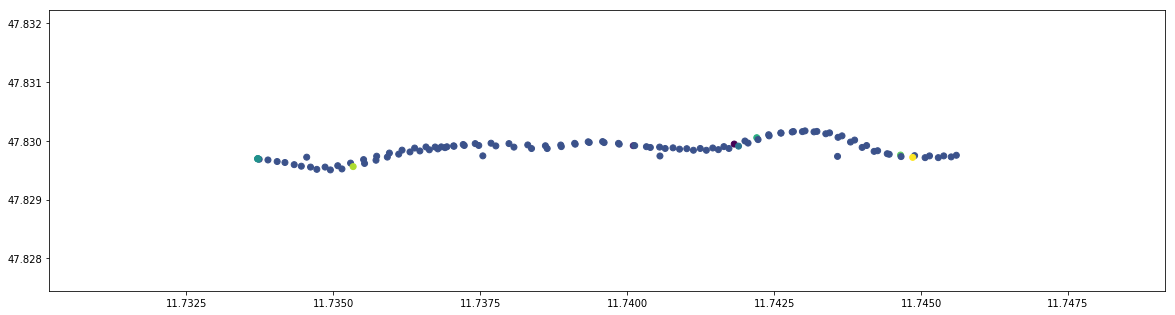

[['score_name', 'score_result'], ['adjusted_rand_score', 0.008133259576860738], ['adjusted_mutual_info_score', 0.05954281269020608], ['homogeneity_score', 0.1231670169388715], ['completeness_score', 0.15072944083151776], ['v_measure_score', 0.13556141428923008], ['fowlkes_mallows_score', 0.7446737373282435], ['silhouette_score', 0.0021868933200257794], ['davies_bouldin_score', 0.8978956056521914], ['calinski_harabasz_score', 1.6269774465922047]]

---- Classical_features ----
Classical_features
y (array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([43,  4, 20, 15, 13,  4,  6,  4,  9]))


<Figure size 1200x400 with 0 Axes>

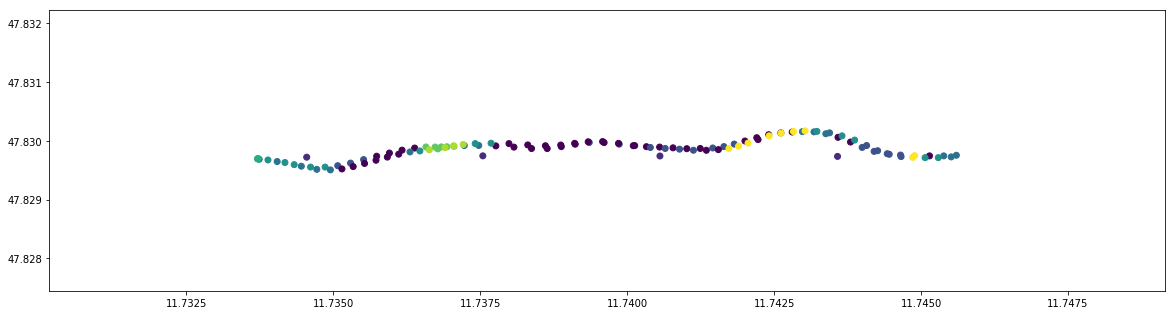

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09126553789188278], ['adjusted_mutual_info_score', 0.10093973426713579], ['homogeneity_score', 0.31558639997963084], ['completeness_score', 0.10069342255054932], ['v_measure_score', 0.1526736248286537], ['fowlkes_mallows_score', 0.4376881826601931], ['silhouette_score', 0.3628402332226075], ['davies_bouldin_score', 0.9120990712549938], ['calinski_harabasz_score', 172.65263919140787]]
----------------------------------------------------------------
window_length: 50
sub_sample_length: 25
clusters: 12
Ground truth
y (array([1., 2., 3.]), array([238, 428,  70]))


<Figure size 1200x400 with 0 Axes>

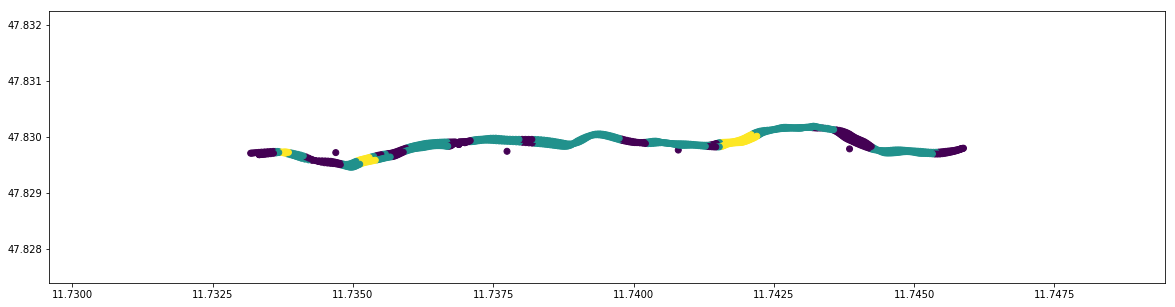


---- Dec ----
...Pretraining...
Pretraining time: 81s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 156)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               78500     
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 12)                120       
Total params: 1,351,130
Trainable

<Figure size 1200x400 with 0 Axes>

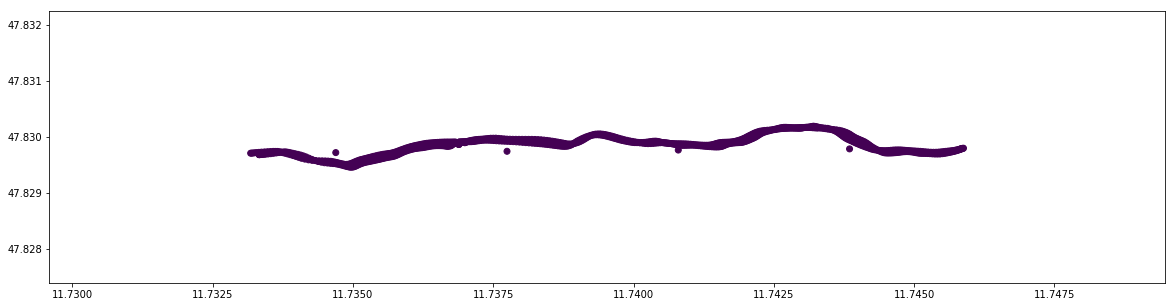

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0], ['adjusted_mutual_info_score', 3.670679701080814e-15], ['homogeneity_score', 1.0131075974986722e-15], ['completeness_score', 1.0], ['v_measure_score', 2.026215194997342e-15], ['fowlkes_mallows_score', 0.6715915400653664], ['silhouette_score', 0], ['davies_bouldin_score', 0], ['calinski_harabasz_score', 0]]

---- Fidec ----
...Pretraining...
Pretraining time: 82s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 156)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)          78500       input[0][0]                      
_______________________

<Figure size 1200x400 with 0 Axes>

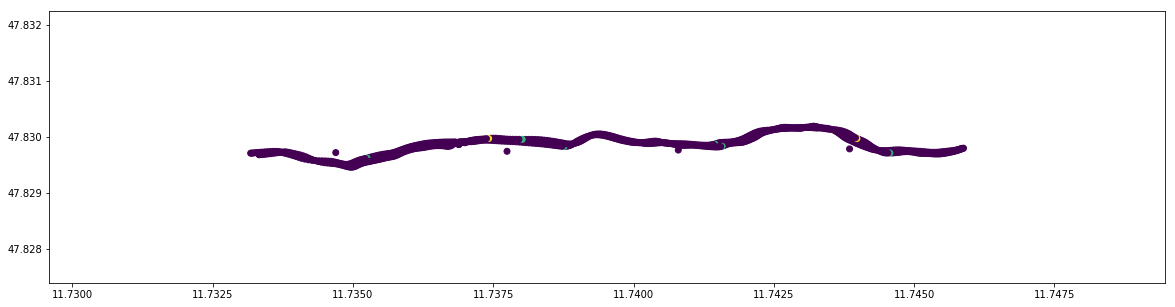

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0056309219120871555], ['adjusted_mutual_info_score', -0.0012793607926400528], ['homogeneity_score', 0.0026613721244685617], ['completeness_score', 0.032607448960140104], ['v_measure_score', 0.004921091947154386], ['fowlkes_mallows_score', 0.6657159113151867], ['silhouette_score', 0.06752073633523004], ['davies_bouldin_score', 3.041112976547451], ['calinski_harabasz_score', 1.803759466378818]]

---- Dcec ----
input_shape (52, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
_______________________________________________

<Figure size 1200x400 with 0 Axes>

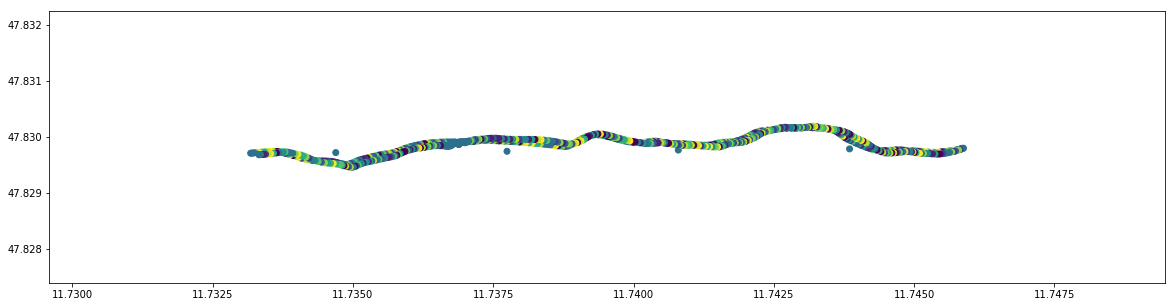

[['score_name', 'score_result'], ['adjusted_rand_score', 0.011029086705497316], ['adjusted_mutual_info_score', 0.019089725501594622], ['homogeneity_score', 0.0516211115529319], ['completeness_score', 0.019421089954427907], ['v_measure_score', 0.02822373827796391], ['fowlkes_mallows_score', 0.2234933367531153], ['silhouette_score', -0.0567352829788685], ['davies_bouldin_score', 5.716578327436519], ['calinski_harabasz_score', 4.791410794162506]]

---- Fidcec ----
input_shape (52, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
____________________________________________________

delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.
saving model to: results/dcec_model_final.h5
Pretrain time:   9.5367431640625e-07
Clustering time: 125.62268280982971
Total time:      125.62268376350403
Fidcec
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([109,  59,  56,   4,  63,  62,  57,  63,  76,  54,  66,  67]))


<Figure size 1200x400 with 0 Axes>

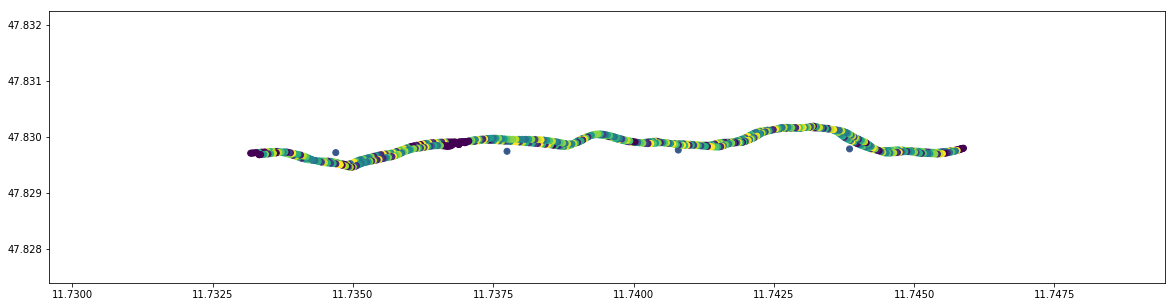

[['score_name', 'score_result'], ['adjusted_rand_score', 0.018786435660003695], ['adjusted_mutual_info_score', 0.03127528299976795], ['homogeneity_score', 0.07363789226139658], ['completeness_score', 0.02776992363824203], ['v_measure_score', 0.0403305924072735], ['fowlkes_mallows_score', 0.22597900757703462], ['silhouette_score', -0.23852164436861964], ['davies_bouldin_score', 5.640258528371213], ['calinski_harabasz_score', 4.581113999146783]]

---- Classical_raw ----
Classical_raw
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([  2,   5, 231,  37, 147,  49,  12,  22,  63,  16,  55,  97]))


<Figure size 1200x400 with 0 Axes>

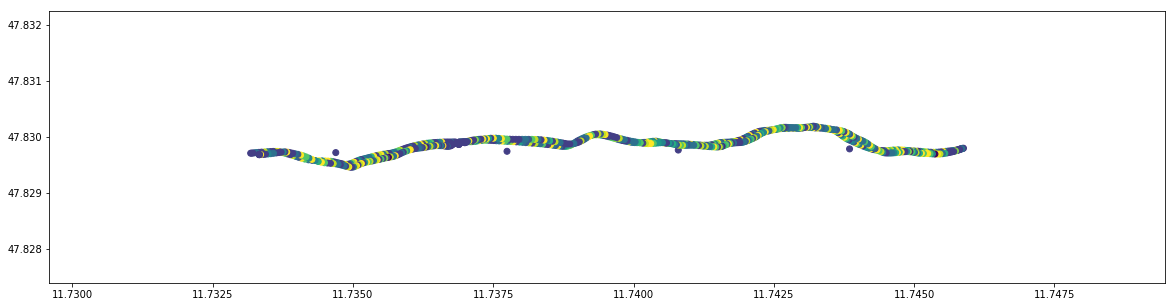

[['score_name', 'score_result'], ['adjusted_rand_score', -0.0050423036658731], ['adjusted_mutual_info_score', 0.012022542752298245], ['homogeneity_score', 0.036543761680598065], ['completeness_score', 0.016579842443943574], ['v_measure_score', 0.02281056870888902], ['fowlkes_mallows_score', 0.2777247739611707], ['silhouette_score', -0.007327276792083076], ['davies_bouldin_score', 4.513416086291751], ['calinski_harabasz_score', 5.39054772223466]]

---- Classical_features ----
Classical_features
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([136,   4,  57,  44,   4, 132,  75,  10,  19, 132,   8, 115]))


<Figure size 1200x400 with 0 Axes>

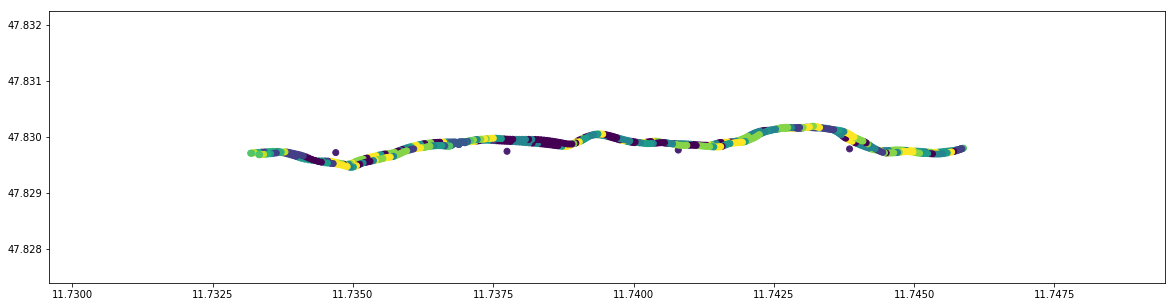

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0350311658392956], ['adjusted_mutual_info_score', 0.06220902299675345], ['homogeneity_score', 0.1190395460982807], ['completeness_score', 0.051832232849809416], ['v_measure_score', 0.07221889430408686], ['fowlkes_mallows_score', 0.2858101055736795], ['silhouette_score', 0.2063783115382474], ['davies_bouldin_score', 1.1670621890190465], ['calinski_harabasz_score', 437.53235246956854]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 25
clusters: 12
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

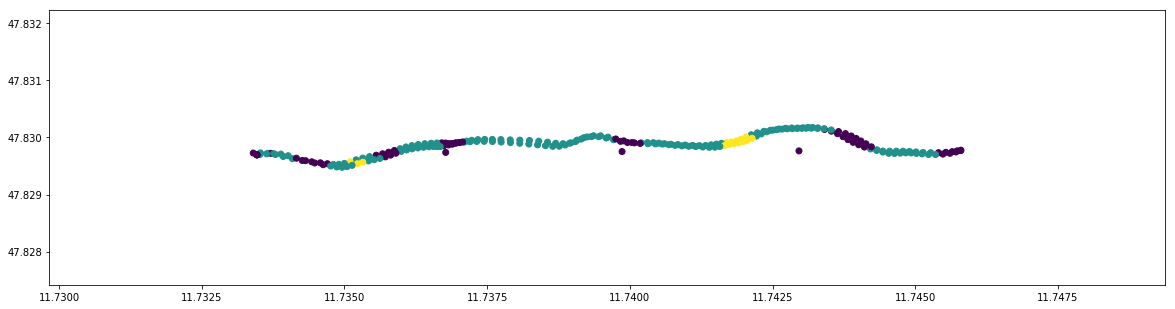


---- Dec ----
...Pretraining...
Pretraining time: 49s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 12)                120       
Total params: 1,501,130
Trainable

<Figure size 1200x400 with 0 Axes>

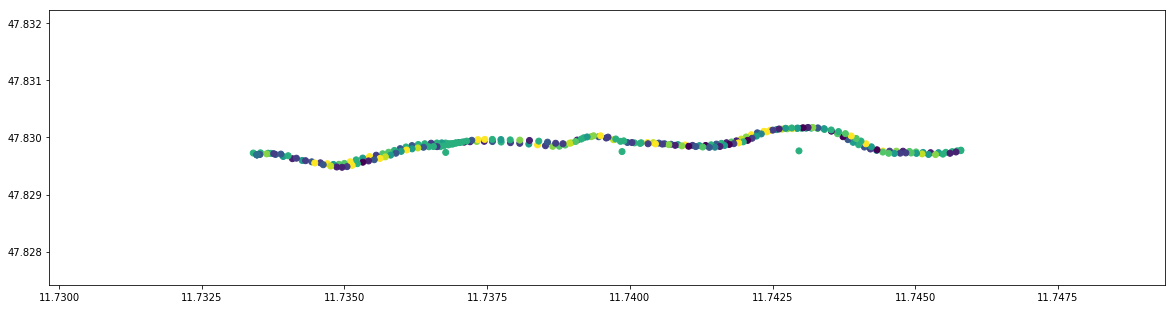

[['score_name', 'score_result'], ['adjusted_rand_score', 0.00947093417013074], ['adjusted_mutual_info_score', 0.047988073660873265], ['homogeneity_score', 0.14895297040168862], ['completeness_score', 0.054010203069773464], ['v_measure_score', 0.07927526990872888], ['fowlkes_mallows_score', 0.2602634814173789], ['silhouette_score', -0.03222889456158373], ['davies_bouldin_score', 4.916512471991744], ['calinski_harabasz_score', 1.9165045429687873]]

---- Fidec ----
...Pretraining...
Pretraining time: 49s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)

<Figure size 1200x400 with 0 Axes>

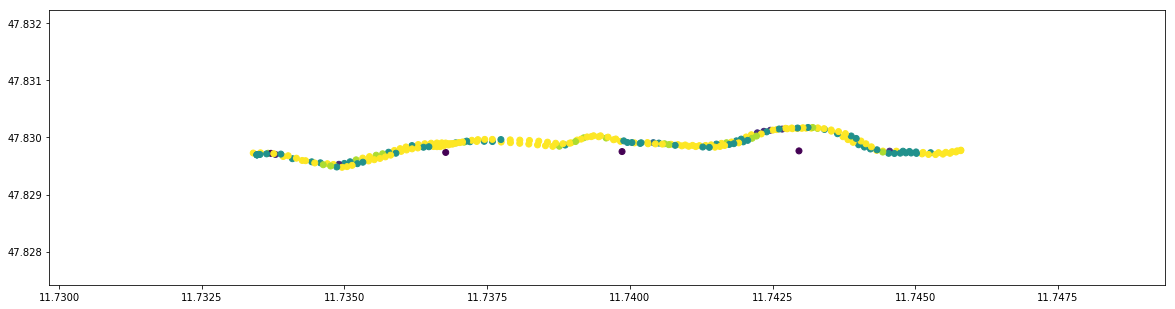

[['score_name', 'score_result'], ['adjusted_rand_score', 0.024739720129415624], ['adjusted_mutual_info_score', 0.039916823597316624], ['homogeneity_score', 0.07104995899725207], ['completeness_score', 0.05464057769549238], ['v_measure_score', 0.06177411453562522], ['fowlkes_mallows_score', 0.48336843491595355], ['silhouette_score', -0.19230018002779875], ['davies_bouldin_score', 5.574333395046966], ['calinski_harabasz_score', 1.3563613442568345]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
__________________________________________________

<Figure size 1200x400 with 0 Axes>

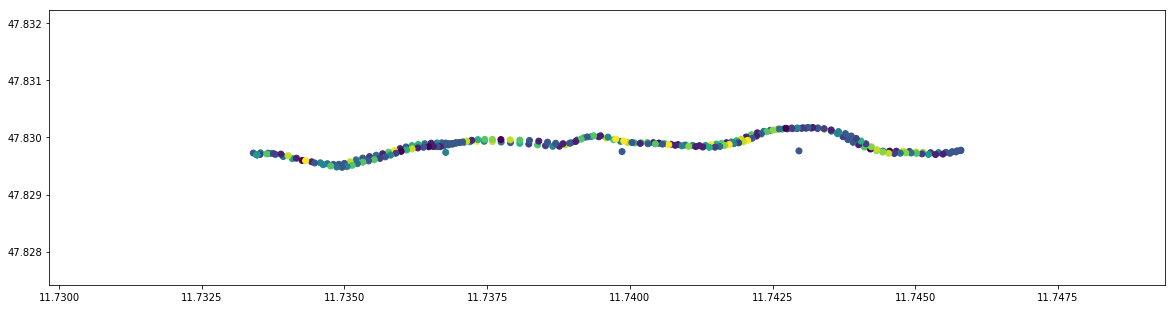

[['score_name', 'score_result'], ['adjusted_rand_score', 0.020877966934759046], ['adjusted_mutual_info_score', 0.034600326433136167], ['homogeneity_score', 0.1263422771255945], ['completeness_score', 0.044807953938626015], ['v_measure_score', 0.06615403203073139], ['fowlkes_mallows_score', 0.2641313180088057], ['silhouette_score', -0.04497899411655923], ['davies_bouldin_score', 5.684665446423967], ['calinski_harabasz_score', 1.5320812773535382]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

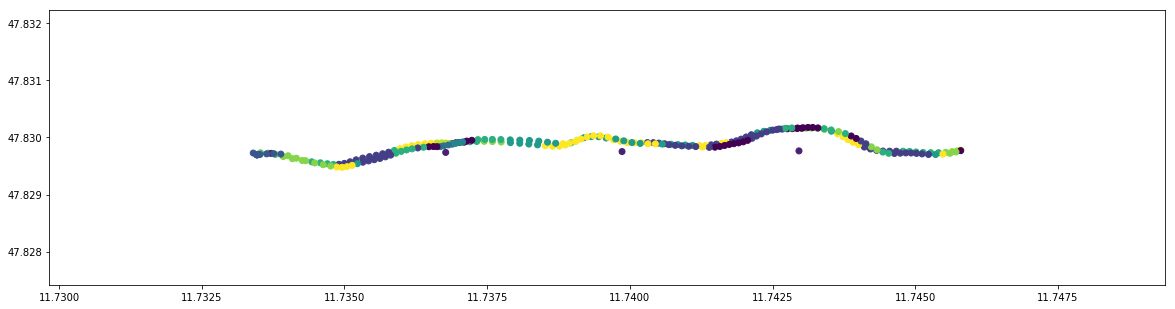

[['score_name', 'score_result'], ['adjusted_rand_score', 0.036362850615913], ['adjusted_mutual_info_score', 0.07634821315974823], ['homogeneity_score', 0.1944748693375203], ['completeness_score', 0.07405518293666755], ['v_measure_score', 0.1072645084109191], ['fowlkes_mallows_score', 0.29855411838216167], ['silhouette_score', -0.21550908014634856], ['davies_bouldin_score', 6.960916616713347], ['calinski_harabasz_score', 0.8795378945204779]]

---- Classical_raw ----
Classical_raw
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([  1,  84,   1,   1,   1,   1,   1,   1,   1, 140,   2,   5]))


<Figure size 1200x400 with 0 Axes>

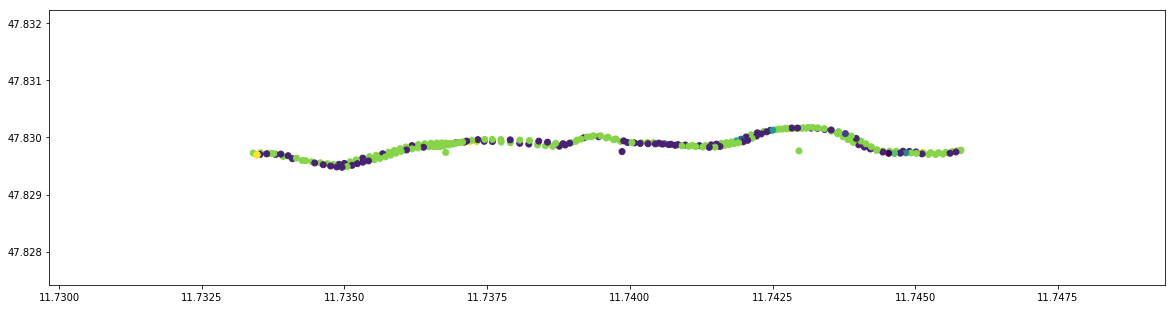

[['score_name', 'score_result'], ['adjusted_rand_score', 0.007663153557242594], ['adjusted_mutual_info_score', 0.035098594660257415], ['homogeneity_score', 0.0863518375448945], ['completeness_score', 0.07129382582928173], ['v_measure_score', 0.07810367547316377], ['fowlkes_mallows_score', 0.48896891326424224], ['silhouette_score', 0.0025024819612204743], ['davies_bouldin_score', 2.448643972436703], ['calinski_harabasz_score', 1.7252733237199551]]

---- Classical_features ----
Classical_features
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([42,  4,  9, 43,  4,  4, 48, 46, 16, 14,  3,  6]))


<Figure size 1200x400 with 0 Axes>

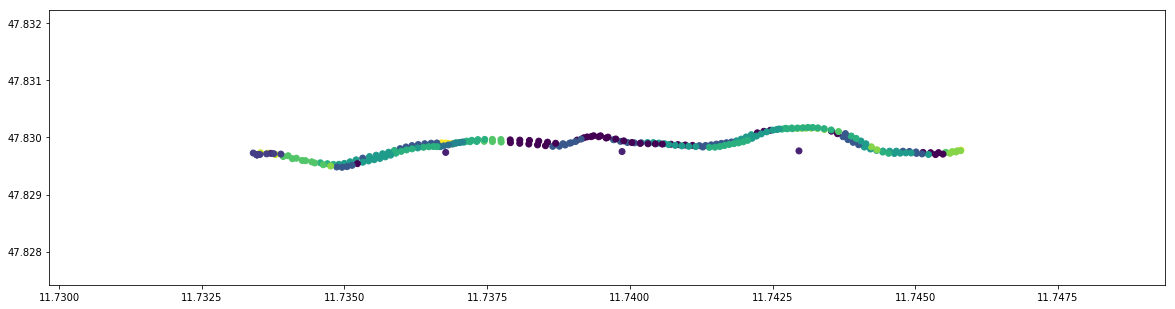

[['score_name', 'score_result'], ['adjusted_rand_score', 0.03815326414751608], ['adjusted_mutual_info_score', 0.07119401781143148], ['homogeneity_score', 0.18260730977075545], ['completeness_score', 0.07149275354653488], ['v_measure_score', 0.10275557764765052], ['fowlkes_mallows_score', 0.30877540135917925], ['silhouette_score', 0.2555966881896869], ['davies_bouldin_score', 0.9899627427685863], ['calinski_harabasz_score', 306.82715338118066]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 75
clusters: 12
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

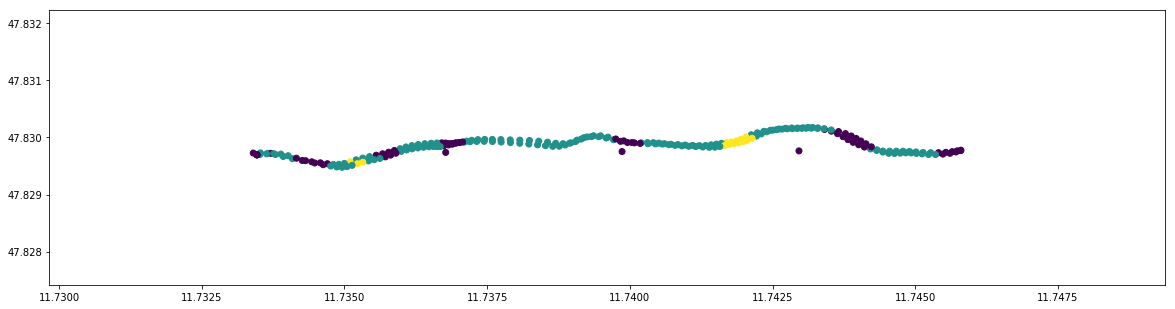


---- Dec ----
...Pretraining...
Pretraining time: 49s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 12)                120       
Total params: 1,501,130
Trainable

<Figure size 1200x400 with 0 Axes>

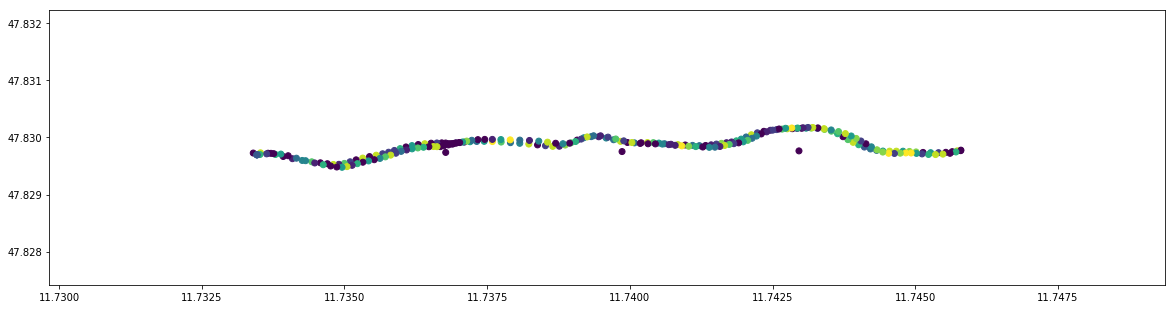

[['score_name', 'score_result'], ['adjusted_rand_score', 0.00020824255096222414], ['adjusted_mutual_info_score', 0.0339002003148898], ['homogeneity_score', 0.1246656768304995], ['completeness_score', 0.044592726857140726], ['v_measure_score', 0.0656887026492616], ['fowlkes_mallows_score', 0.2505571913829571], ['silhouette_score', -0.020378217073710264], ['davies_bouldin_score', 5.113174217955325], ['calinski_harabasz_score', 1.8695839913541403]]

---- Fidec ----
...Pretraining...
Pretraining time: 49s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500)

<Figure size 1200x400 with 0 Axes>

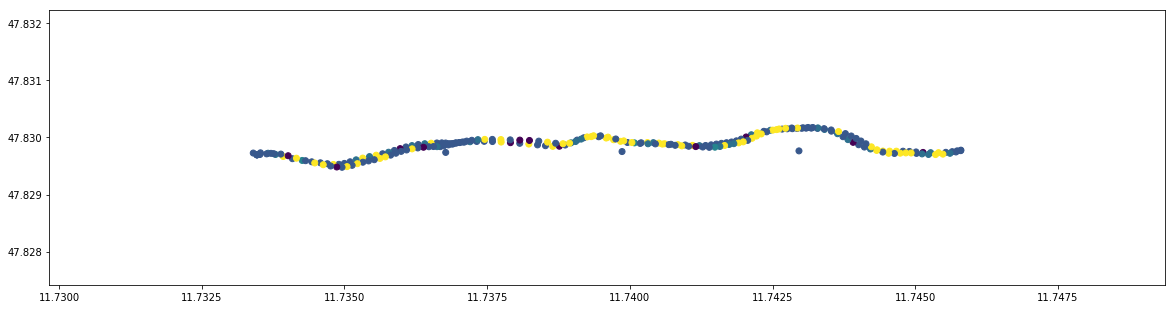

[['score_name', 'score_result'], ['adjusted_rand_score', -0.022000757377258495], ['adjusted_mutual_info_score', 0.014722916930042122], ['homogeneity_score', 0.03924767593615369], ['completeness_score', 0.027835799511236412], ['v_measure_score', 0.032571074511413244], ['fowlkes_mallows_score', 0.42925710556256963], ['silhouette_score', 0.0037709601096867842], ['davies_bouldin_score', 6.687271639110381], ['calinski_harabasz_score', 1.538771683317491]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_______________________________________________

<Figure size 1200x400 with 0 Axes>

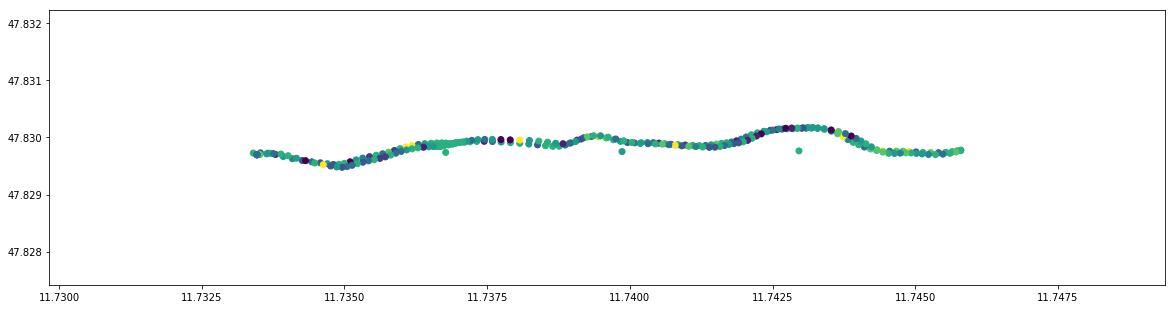

[['score_name', 'score_result'], ['adjusted_rand_score', -0.010899580416966481], ['adjusted_mutual_info_score', 0.00761759111301303], ['homogeneity_score', 0.06811110480454752], ['completeness_score', 0.027911336275335076], ['v_measure_score', 0.03959640952478566], ['fowlkes_mallows_score', 0.288933521317962], ['silhouette_score', -0.01983541676834382], ['davies_bouldin_score', 5.5759797770353074], ['calinski_harabasz_score', 1.428272167169261]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

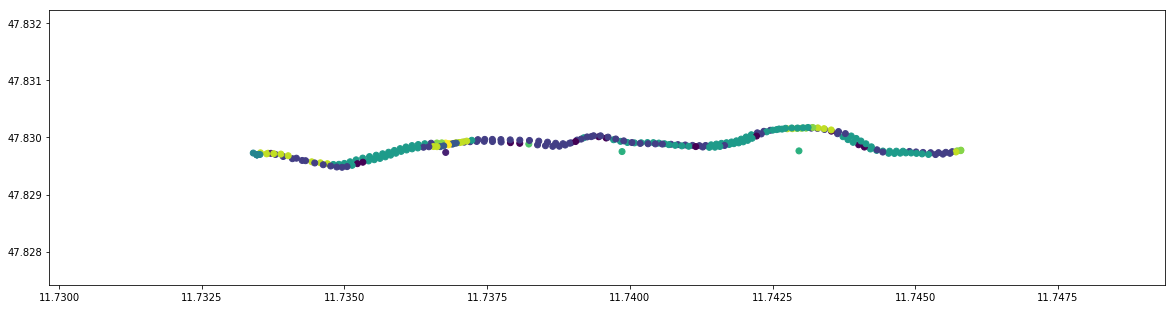

[['score_name', 'score_result'], ['adjusted_rand_score', 0.062091170699834046], ['adjusted_mutual_info_score', 0.07243480609209045], ['homogeneity_score', 0.15591005536142769], ['completeness_score', 0.07985131883058251], ['v_measure_score', 0.10561207137705123], ['fowlkes_mallows_score', 0.4174699584918288], ['silhouette_score', -0.2209301527911719], ['davies_bouldin_score', 6.426949595441652], ['calinski_harabasz_score', 0.8058427522940521]]

---- Classical_raw ----
Classical_raw
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([  4,   1, 225,   1,   1,   1,   1,   1,   1,   1,   1,   1]))


<Figure size 1200x400 with 0 Axes>

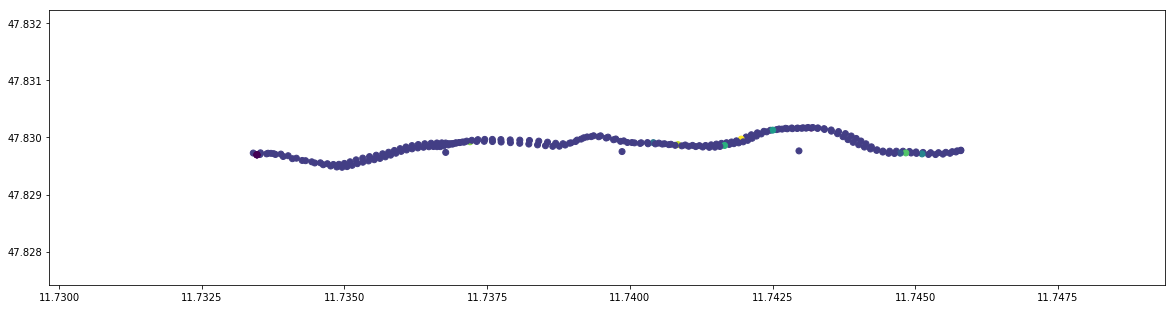

[['score_name', 'score_result'], ['adjusted_rand_score', 0.020624180532454964], ['adjusted_mutual_info_score', 0.03688088495635597], ['homogeneity_score', 0.07213213339783035], ['completeness_score', 0.16551529903139828], ['v_measure_score', 0.10047633594922196], ['fowlkes_mallows_score', 0.67717256151317], ['silhouette_score', -0.046726135208684454], ['davies_bouldin_score', 0.8845726861156776], ['calinski_harabasz_score', 1.5949122173927204]]

---- Classical_features ----
Classical_features
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([24, 54,  2,  6, 17,  3,  6, 43, 24, 53,  2,  5]))


<Figure size 1200x400 with 0 Axes>

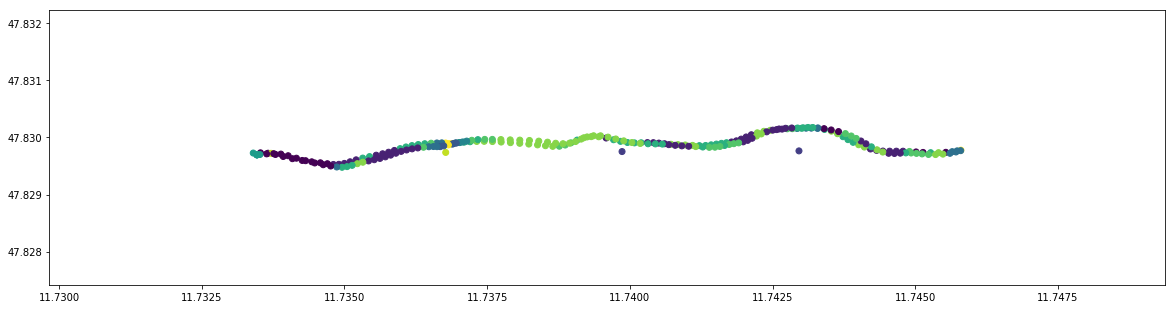

[['score_name', 'score_result'], ['adjusted_rand_score', 0.03831855947169625], ['adjusted_mutual_info_score', 0.0646128703950029], ['homogeneity_score', 0.16857718643476316], ['completeness_score', 0.06756154867776551], ['v_measure_score', 0.09646308795416873], ['fowlkes_mallows_score', 0.31550870049128715], ['silhouette_score', 0.25857465974858834], ['davies_bouldin_score', 1.0063259560965354], ['calinski_harabasz_score', 245.75568551077802]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 150
clusters: 12
Ground truth
y (array([1., 2., 3.]), array([ 69, 155,  15]))


<Figure size 1200x400 with 0 Axes>

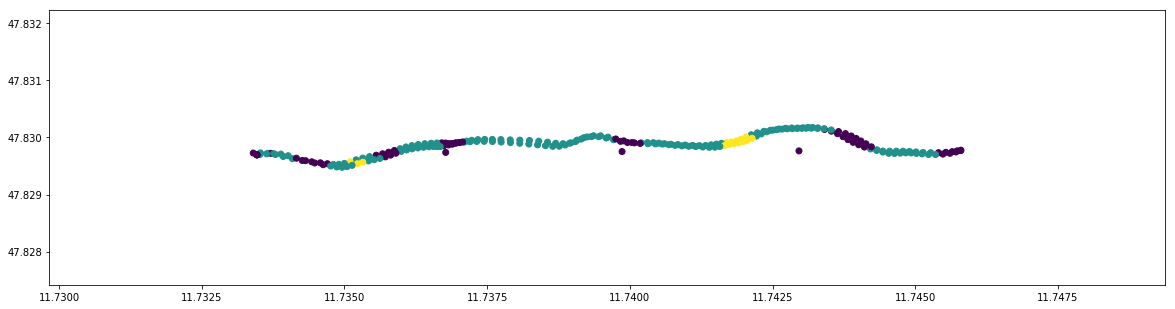


---- Dec ----
...Pretraining...
Pretraining time: 50s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 456)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               228500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 12)                120       
Total params: 1,501,130
Trainable

<Figure size 1200x400 with 0 Axes>

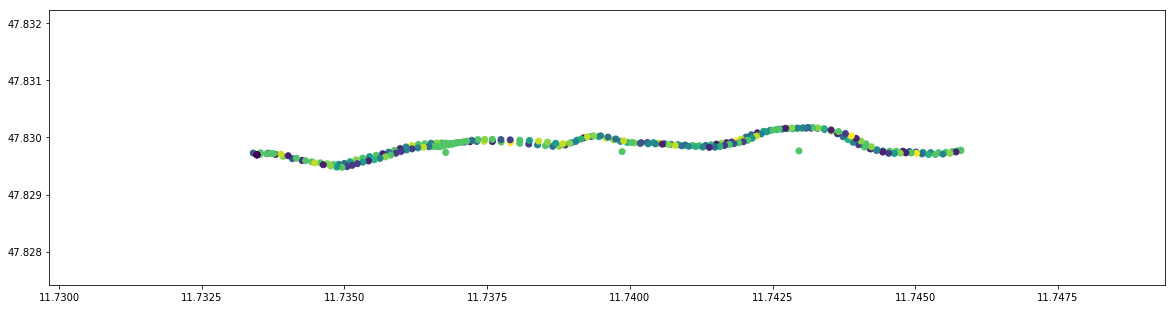

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0032137354116205837], ['adjusted_mutual_info_score', 0.04916298033093379], ['homogeneity_score', 0.1503261278442144], ['completeness_score', 0.05527362200685176], ['v_measure_score', 0.08082762332380038], ['fowlkes_mallows_score', 0.26506945350229805], ['silhouette_score', -0.023294497314232363], ['davies_bouldin_score', 4.903067529706617], ['calinski_harabasz_score', 1.8849477310451812]]

---- Fidec ----
...Pretraining...
Pretraining time: 50s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 456)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500

<Figure size 1200x400 with 0 Axes>

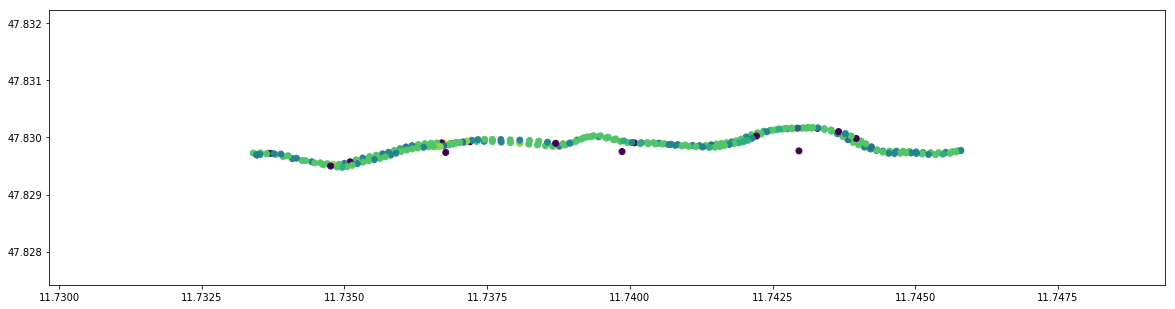

[['score_name', 'score_result'], ['adjusted_rand_score', 0.05498870686158172], ['adjusted_mutual_info_score', 0.01825338549285207], ['homogeneity_score', 0.05924422623099973], ['completeness_score', 0.03765919279101536], ['v_measure_score', 0.04604769903693235], ['fowlkes_mallows_score', 0.466550115421713], ['silhouette_score', -0.2662540111073585], ['davies_bouldin_score', 5.54413323055465], ['calinski_harabasz_score', 1.0119585376710227]]

---- Dcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
________________________________________________________

<Figure size 1200x400 with 0 Axes>

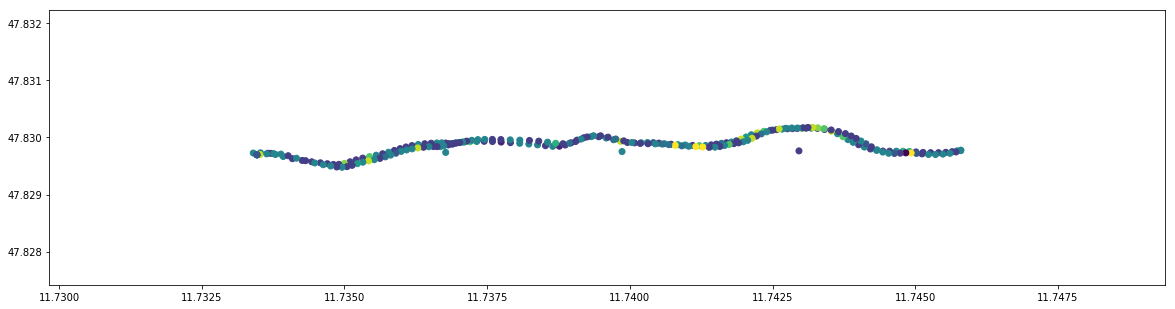

[['score_name', 'score_result'], ['adjusted_rand_score', -0.013867405864467915], ['adjusted_mutual_info_score', 0.018782747197895962], ['homogeneity_score', 0.08481700150216769], ['completeness_score', 0.04390523867037767], ['v_measure_score', 0.057859631548778954], ['fowlkes_mallows_score', 0.3802468054681896], ['silhouette_score', -0.00521023580412476], ['davies_bouldin_score', 4.510883113398575], ['calinski_harabasz_score', 1.54069213603914]]

---- Fidcec ----
input_shape (152, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            512       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

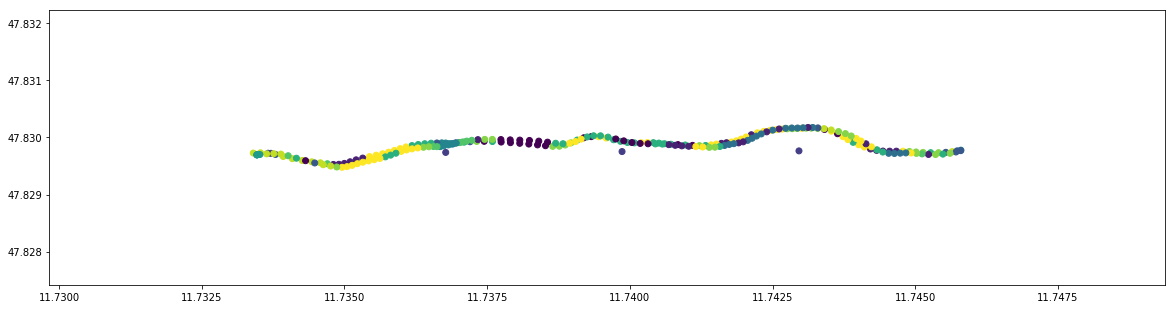

[['score_name', 'score_result'], ['adjusted_rand_score', 0.027869878606223013], ['adjusted_mutual_info_score', 0.09698215400509133], ['homogeneity_score', 0.2402017426999703], ['completeness_score', 0.08579003775755066], ['v_measure_score', 0.12642598869663924], ['fowlkes_mallows_score', 0.2705016566412545], ['silhouette_score', -0.20366832199808452], ['davies_bouldin_score', 6.5559955066783], ['calinski_harabasz_score', 1.1325313989728363]]

---- Classical_raw ----
Classical_raw
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([  1,  31,   1,   1,   1,   1,   4,   9,   1,   8, 180,   1]))


<Figure size 1200x400 with 0 Axes>

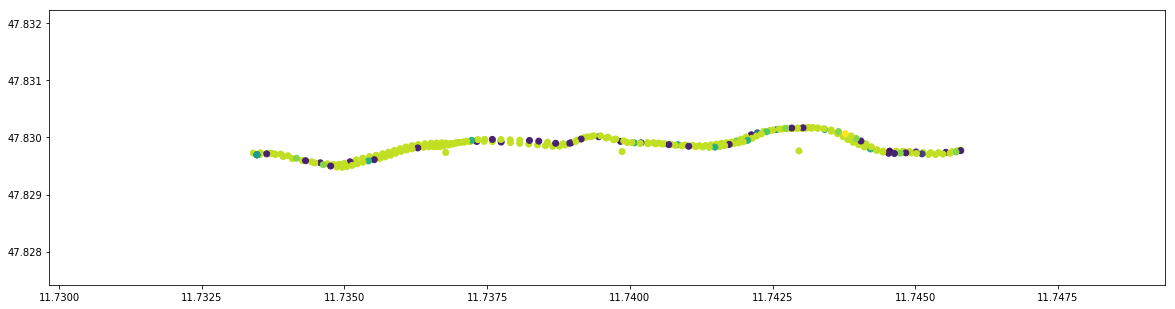

[['score_name', 'score_result'], ['adjusted_rand_score', 0.025456323651719705], ['adjusted_mutual_info_score', 0.01228188205468711], ['homogeneity_score', 0.06429407635383094], ['completeness_score', 0.055361042091258306], ['v_measure_score', 0.05949410461494705], ['fowlkes_mallows_score', 0.555759024431366], ['silhouette_score', -0.006768919108219761], ['davies_bouldin_score', 2.5052027118334443], ['calinski_harabasz_score', 1.7320170783644047]]

---- Classical_features ----
Classical_features
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([ 3, 61,  4, 10, 12,  5, 46, 28, 24, 13, 23, 10]))


<Figure size 1200x400 with 0 Axes>

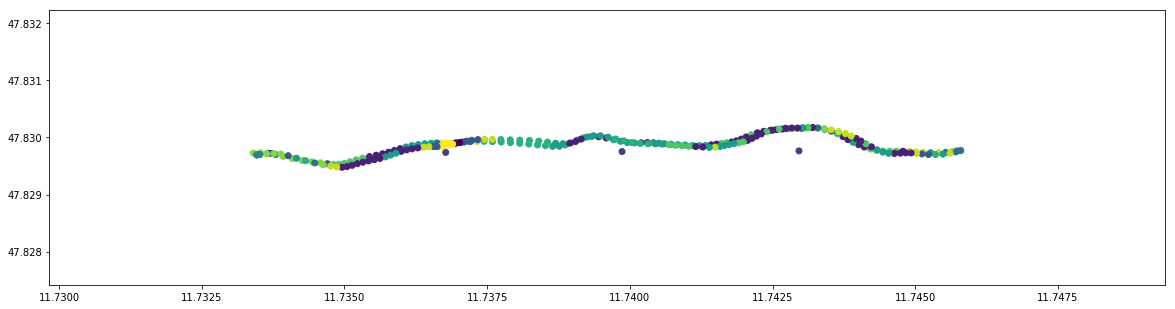

[['score_name', 'score_result'], ['adjusted_rand_score', 0.02734864729558068], ['adjusted_mutual_info_score', 0.07828986139861532], ['homogeneity_score', 0.19918590857658228], ['completeness_score', 0.07529320141987078], ['v_measure_score', 0.10927858761018554], ['fowlkes_mallows_score', 0.29331969175538253], ['silhouette_score', 0.2704904868965493], ['davies_bouldin_score', 1.033297319007953], ['calinski_harabasz_score', 209.85236157845944]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 25
clusters: 12
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

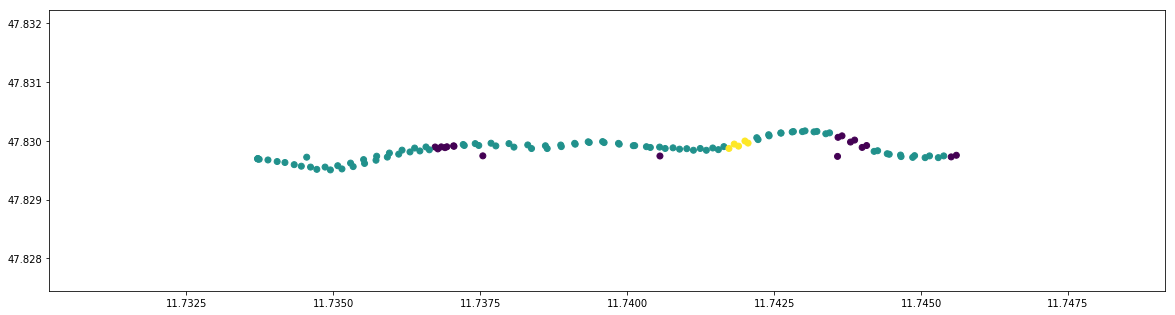


---- Dec ----
...Pretraining...
Pretraining time: 51s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 12)                120       
Total params: 1,723,130
Trainable

<Figure size 1200x400 with 0 Axes>

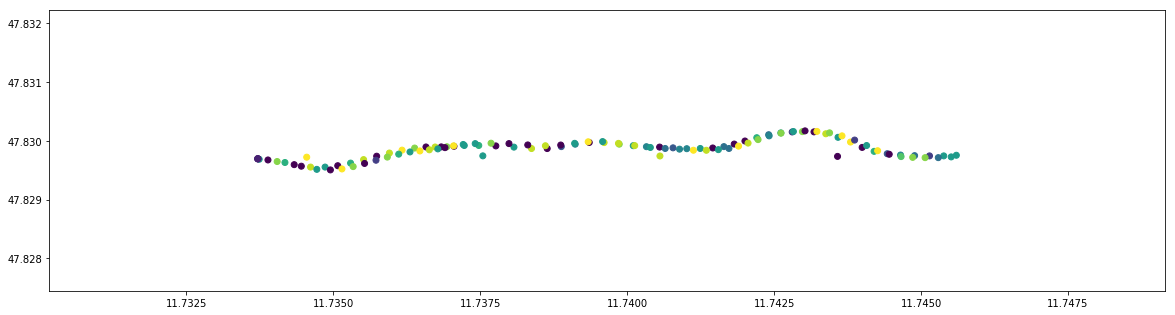

[['score_name', 'score_result'], ['adjusted_rand_score', -0.021839957729114064], ['adjusted_mutual_info_score', -0.005370681104304194], ['homogeneity_score', 0.1447059516808997], ['completeness_score', 0.03919322349404418], ['v_measure_score', 0.061680458324541707], ['fowlkes_mallows_score', 0.2676569215795063], ['silhouette_score', 0.0024422089181777], ['davies_bouldin_score', 3.8296020644190416], ['calinski_harabasz_score', 1.5247127800035247]]

---- Fidec ----
...Pretraining...
Pretraining time: 51s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500

<Figure size 1200x400 with 0 Axes>

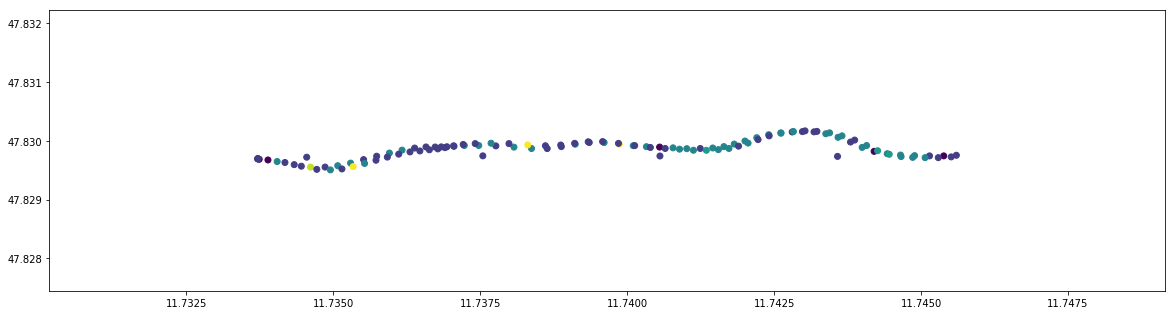

[['score_name', 'score_result'], ['adjusted_rand_score', -0.04527182102700827], ['adjusted_mutual_info_score', 0.01546660759000246], ['homogeneity_score', 0.08345647603044976], ['completeness_score', 0.046560688564606705], ['v_measure_score', 0.05977350761733319], ['fowlkes_mallows_score', 0.503620649475662], ['silhouette_score', -0.027603731902897454], ['davies_bouldin_score', 4.628761415087161], ['calinski_harabasz_score', 1.1218491685938972]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
___________________________________________________

<Figure size 1200x400 with 0 Axes>

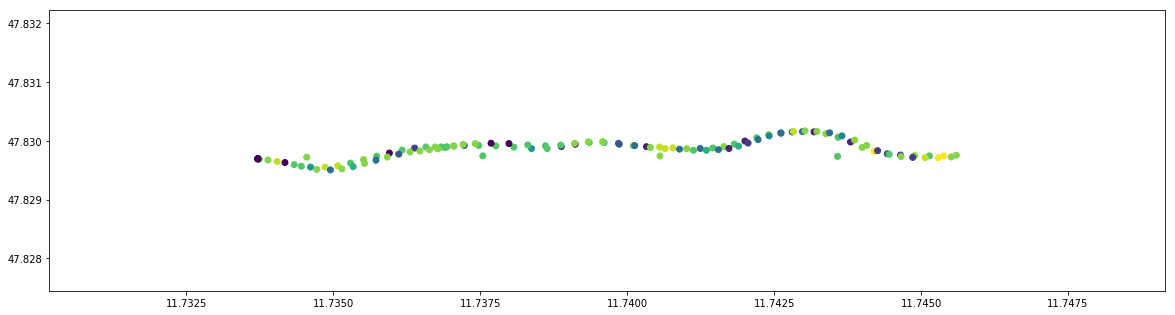

[['score_name', 'score_result'], ['adjusted_rand_score', -0.021039570984238726], ['adjusted_mutual_info_score', 0.0592800010867986], ['homogeneity_score', 0.27643484716114286], ['completeness_score', 0.07959256645270299], ['v_measure_score', 0.12359811689321218], ['fowlkes_mallows_score', 0.312703912314435], ['silhouette_score', -0.010060330131976828], ['davies_bouldin_score', 3.9700658154666253], ['calinski_harabasz_score', 1.3369085237752842]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

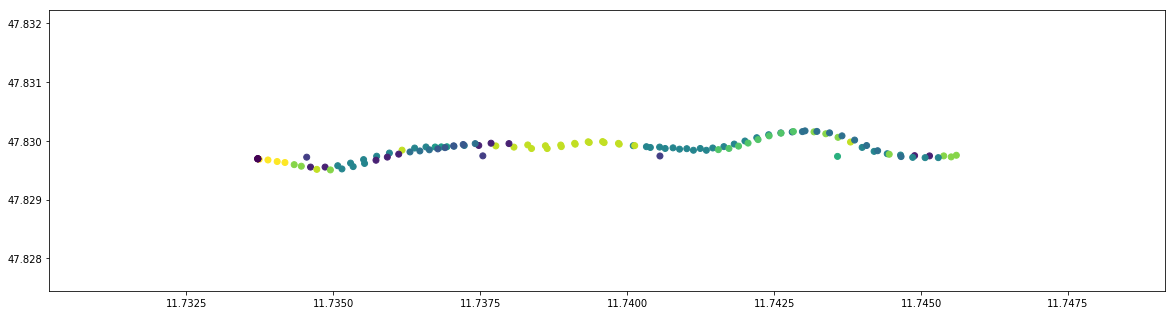

[['score_name', 'score_result'], ['adjusted_rand_score', 0.06178003970555021], ['adjusted_mutual_info_score', 0.1252566161146291], ['homogeneity_score', 0.4183257047403364], ['completeness_score', 0.11799517692098148], ['v_measure_score', 0.18407045941799055], ['fowlkes_mallows_score', 0.37667557076745534], ['silhouette_score', -0.1564258052689426], ['davies_bouldin_score', 4.520937701342654], ['calinski_harabasz_score', 1.0608608426196804]]

---- Classical_raw ----
Classical_raw
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([  1, 104,   4,   1,   1,   1,   1,   1,   1,   1,   1,   1]))


<Figure size 1200x400 with 0 Axes>

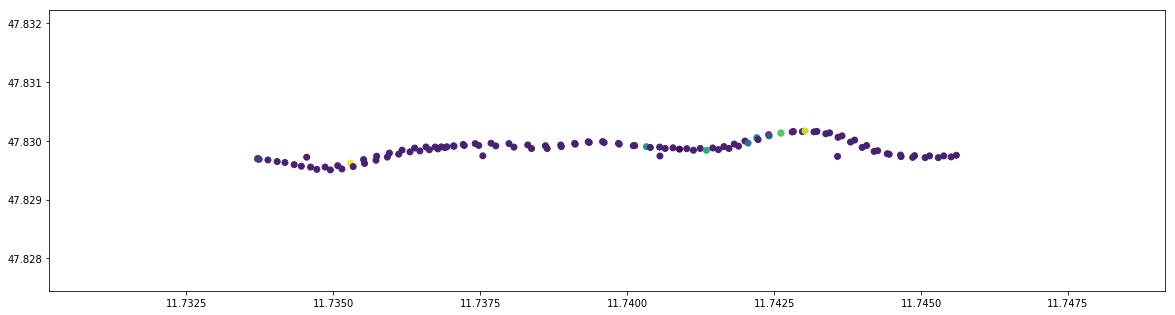

[['score_name', 'score_result'], ['adjusted_rand_score', -0.07775131040400937], ['adjusted_mutual_info_score', -0.012505768212758811], ['homogeneity_score', 0.08761446706973698], ['completeness_score', 0.08274912781939792], ['v_measure_score', 0.08511232389877767], ['fowlkes_mallows_score', 0.699789308239008], ['silhouette_score', 0.0039506856823195505], ['davies_bouldin_score', 0.8839453522462191], ['calinski_harabasz_score', 1.5600336186953663]]

---- Classical_features ----
Classical_features
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([ 8,  2,  6,  4, 45,  3, 14, 20,  2, 10,  2,  2]))


<Figure size 1200x400 with 0 Axes>

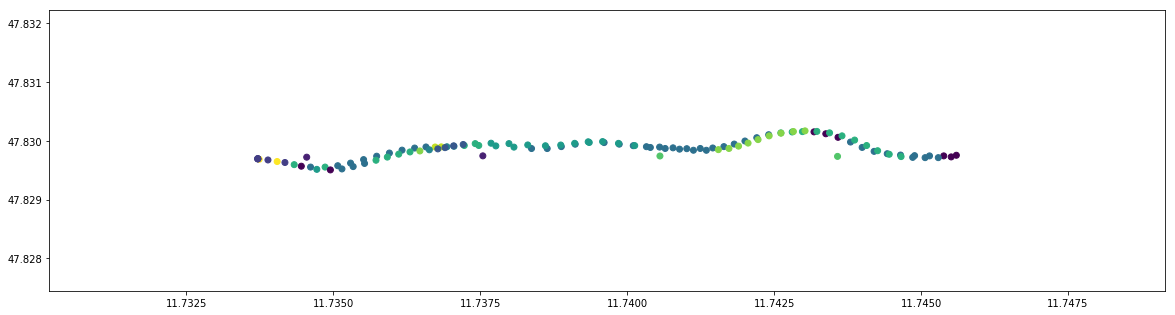

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09189927645921302], ['adjusted_mutual_info_score', 0.1306565286041358], ['homogeneity_score', 0.40680274284312784], ['completeness_score', 0.12425928292898741], ['v_measure_score', 0.19036954128188216], ['fowlkes_mallows_score', 0.4409002327768214], ['silhouette_score', 0.32524123228345203], ['davies_bouldin_score', 0.7996679541745894], ['calinski_harabasz_score', 234.71136978139918]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 75
clusters: 12
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

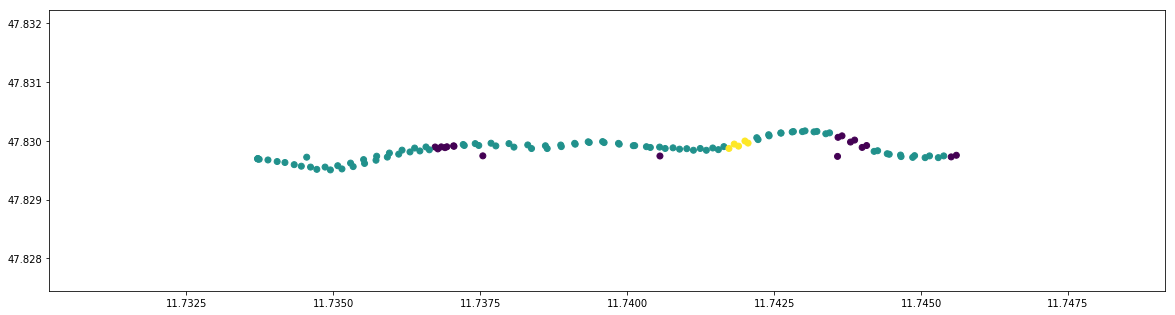


---- Dec ----
...Pretraining...
Pretraining time: 52s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 12)                120       
Total params: 1,723,130
Trainable

<Figure size 1200x400 with 0 Axes>

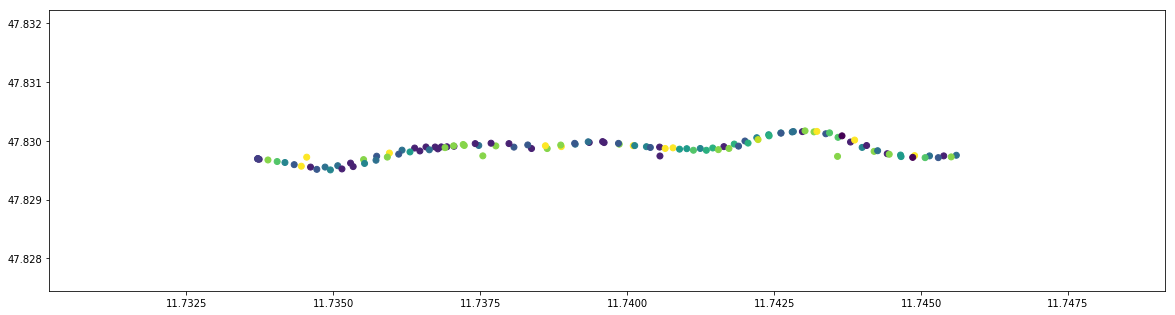

[['score_name', 'score_result'], ['adjusted_rand_score', -0.012435444886887284], ['adjusted_mutual_info_score', 0.030614801403227004], ['homogeneity_score', 0.22336081536980268], ['completeness_score', 0.0604017515898845], ['v_measure_score', 0.09508924753135276], ['fowlkes_mallows_score', 0.27690860094239106], ['silhouette_score', 0.0012881812417810286], ['davies_bouldin_score', 3.7585814977599195], ['calinski_harabasz_score', 1.5737707633238687]]

---- Fidec ----
...Pretraining...
Pretraining time: 52s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 5

<Figure size 1200x400 with 0 Axes>

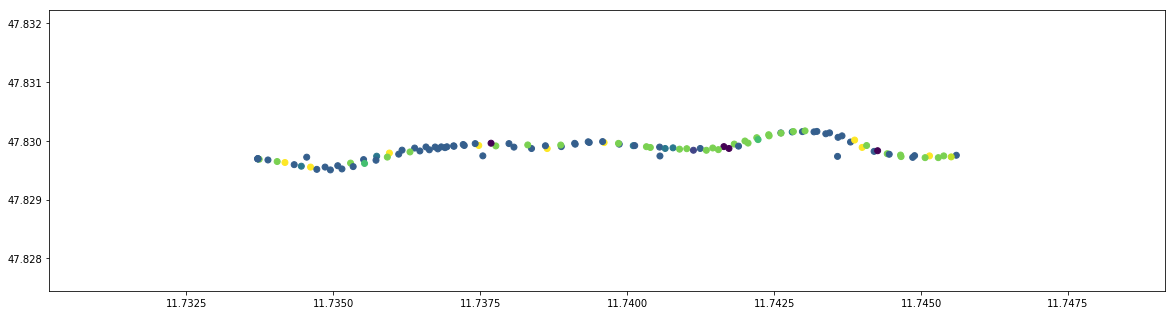

[['score_name', 'score_result'], ['adjusted_rand_score', -0.021081987781610186], ['adjusted_mutual_info_score', 0.04280728560523954], ['homogeneity_score', 0.15193016061217304], ['completeness_score', 0.06950178071769784], ['v_measure_score', 0.0953739252237447], ['fowlkes_mallows_score', 0.4817644380431224], ['silhouette_score', -0.02489284921870304], ['davies_bouldin_score', 3.8537002477204383], ['calinski_harabasz_score', 1.2552004764050724]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
___________________________________________________

<Figure size 1200x400 with 0 Axes>

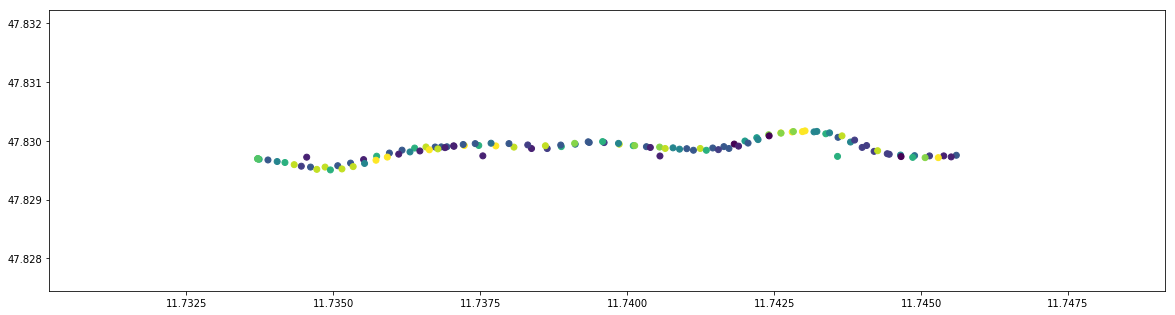

[['score_name', 'score_result'], ['adjusted_rand_score', -0.006774432331249581], ['adjusted_mutual_info_score', 0.03136024505253727], ['homogeneity_score', 0.23125817761046188], ['completeness_score', 0.06025323647658433], ['v_measure_score', 0.09559868320316506], ['fowlkes_mallows_score', 0.26138417662191865], ['silhouette_score', -0.01511882738475798], ['davies_bouldin_score', 4.011552956144928], ['calinski_harabasz_score', 1.443075092714669]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________

<Figure size 1200x400 with 0 Axes>

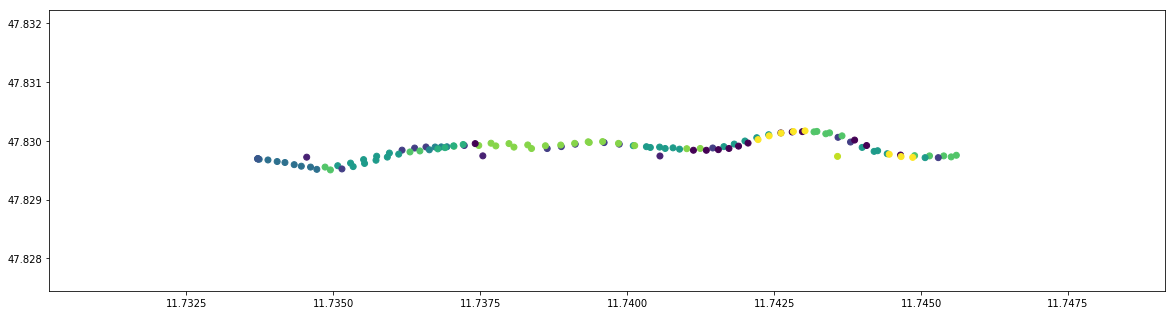

[['score_name', 'score_result'], ['adjusted_rand_score', 0.03692790757180837], ['adjusted_mutual_info_score', 0.09701592428665255], ['homogeneity_score', 0.37075945988552583], ['completeness_score', 0.09953342628468104], ['v_measure_score', 0.15693607305175497], ['fowlkes_mallows_score', 0.32599905685323066], ['silhouette_score', -0.14067017857661732], ['davies_bouldin_score', 4.467826639024297], ['calinski_harabasz_score', 1.0862622391106167]]

---- Classical_raw ----
Classical_raw
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([  1,   1, 104,   4,   1,   1,   1,   1,   1,   1,   1,   1]))


<Figure size 1200x400 with 0 Axes>

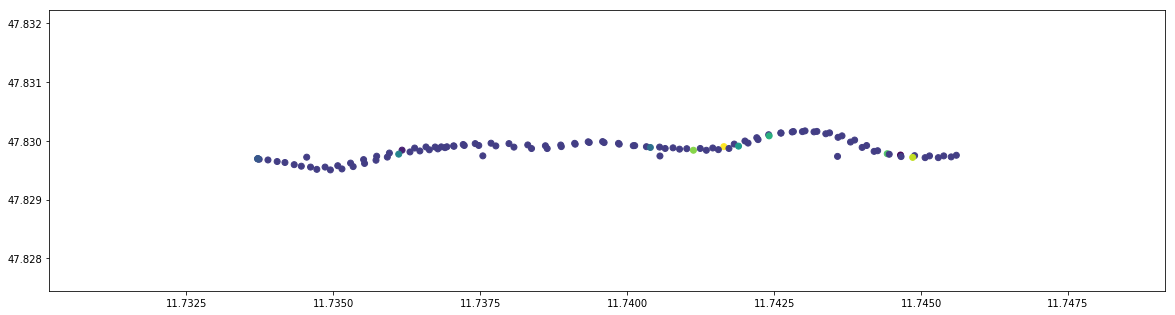

[['score_name', 'score_result'], ['adjusted_rand_score', -0.07775131040400937], ['adjusted_mutual_info_score', -0.012505768212758811], ['homogeneity_score', 0.08761446706973698], ['completeness_score', 0.08274912781939792], ['v_measure_score', 0.08511232389877767], ['fowlkes_mallows_score', 0.699789308239008], ['silhouette_score', -0.016124096735825027], ['davies_bouldin_score', 0.9081289338201896], ['calinski_harabasz_score', 1.5158462990402275]]

---- Classical_features ----
Classical_features
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([36,  3,  9,  4,  4, 17,  5, 14, 13,  4,  1,  8]))


<Figure size 1200x400 with 0 Axes>

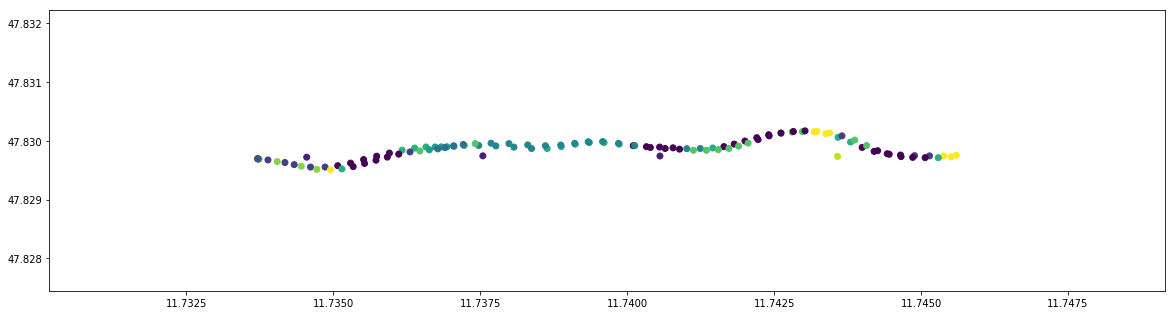

[['score_name', 'score_result'], ['adjusted_rand_score', 0.06521247112553819], ['adjusted_mutual_info_score', 0.10069515279135627], ['homogeneity_score', 0.3693396053965625], ['completeness_score', 0.10333215448623848], ['v_measure_score', 0.16148482055364125], ['fowlkes_mallows_score', 0.3801568364242601], ['silhouette_score', 0.28049167585328594], ['davies_bouldin_score', 0.9786107158857739], ['calinski_harabasz_score', 191.94015243690262]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 150
clusters: 12
Ground truth
y (array([1., 2., 3.]), array([18, 95,  5]))


<Figure size 1200x400 with 0 Axes>

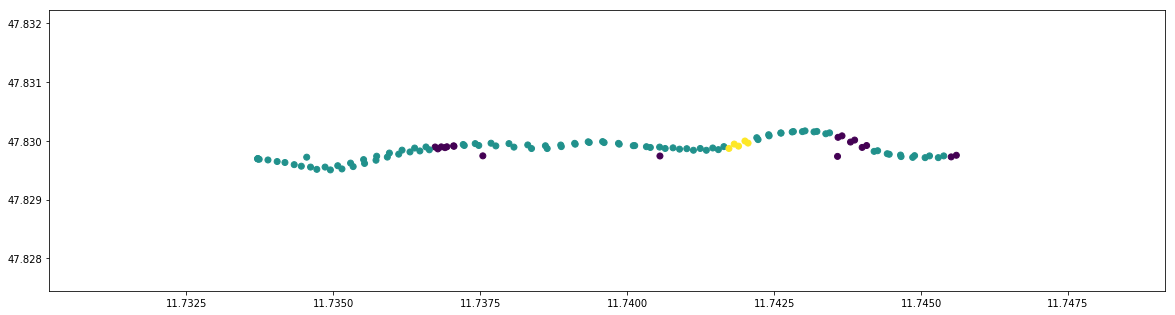


---- Dec ----
...Pretraining...
Pretraining time: 53s
Pretrained weights are saved to results/ae_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 900)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               450500    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 12)                120       
Total params: 1,723,130
Trainable

<Figure size 1200x400 with 0 Axes>

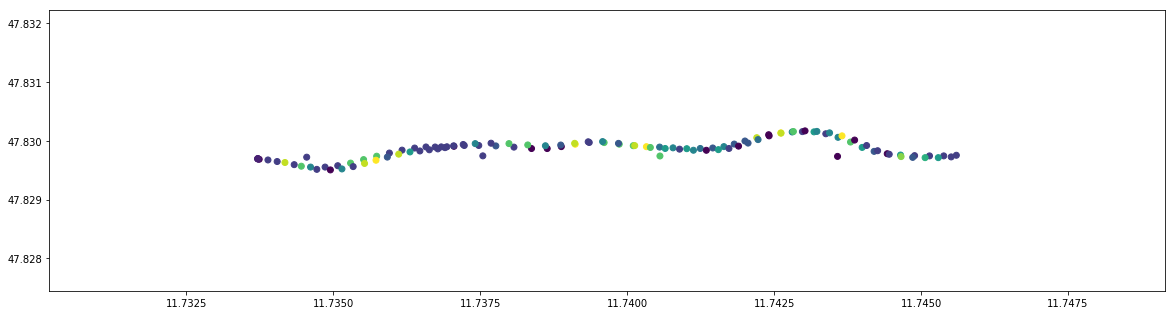

[['score_name', 'score_result'], ['adjusted_rand_score', -0.030752230062574885], ['adjusted_mutual_info_score', 0.00987164263300433], ['homogeneity_score', 0.1722125327001308], ['completeness_score', 0.04935724600399389], ['v_measure_score', 0.0767246904443739], ['fowlkes_mallows_score', 0.30243135997937326], ['silhouette_score', 0.0020735474561961245], ['davies_bouldin_score', 3.5033523700768843], ['calinski_harabasz_score', 1.6264279857841466]]

---- Fidec ----
...Pretraining...
Pretraining time: 53s
Pretrained weights are saved to results/ae_weights.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 900)          0                                            
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 500

<Figure size 1200x400 with 0 Axes>

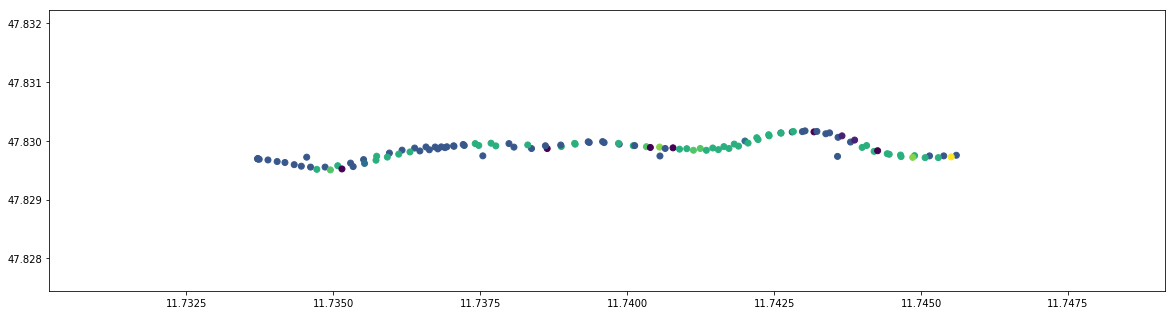

[['score_name', 'score_result'], ['adjusted_rand_score', 0.01829099195775108], ['adjusted_mutual_info_score', 0.10675741105293729], ['homogeneity_score', 0.2392160718583063], ['completeness_score', 0.11569518053285642], ['v_measure_score', 0.1559609419737667], ['fowlkes_mallows_score', 0.5104956581289435], ['silhouette_score', -0.02922705078740248], ['davies_bouldin_score', 3.9956897436244327], ['calinski_harabasz_score', 1.207683517325483]]

---- Dcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_______________________________________________________

<Figure size 1200x400 with 0 Axes>

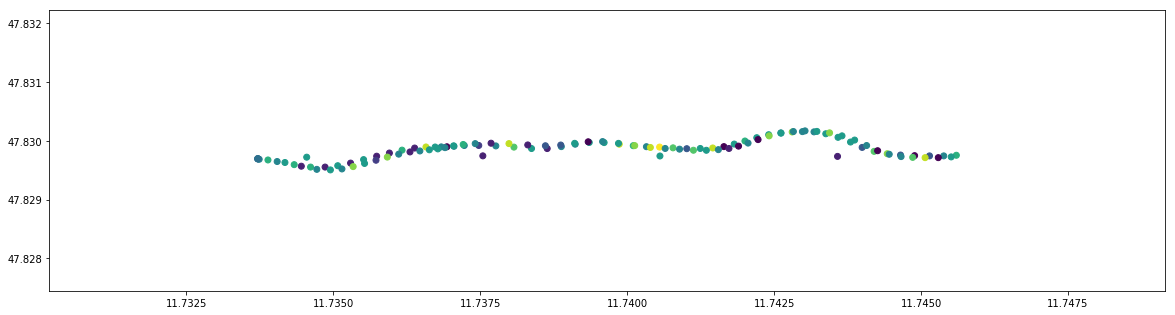

[['score_name', 'score_result'], ['adjusted_rand_score', -0.024201230114858207], ['adjusted_mutual_info_score', -0.011866625225323313], ['homogeneity_score', 0.12922333252865878], ['completeness_score', 0.036177742990204514], ['v_measure_score', 0.056529360500154516], ['fowlkes_mallows_score', 0.2898971802405942], ['silhouette_score', -0.0013709814996023877], ['davies_bouldin_score', 3.981454948838598], ['calinski_harabasz_score', 1.411289032557645]]

---- Fidcec ----
input_shape (300, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           512       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
____________________________________________

<Figure size 1200x400 with 0 Axes>

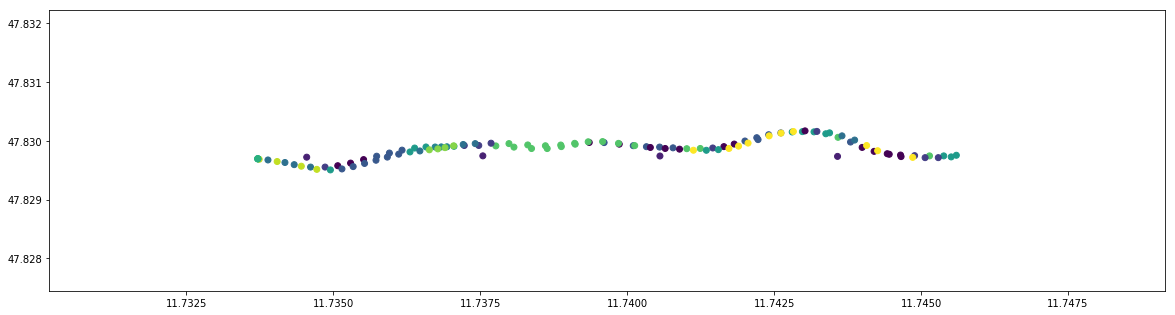

[['score_name', 'score_result'], ['adjusted_rand_score', 0.03514490351104569], ['adjusted_mutual_info_score', 0.08675071237927932], ['homogeneity_score', 0.3579799837381136], ['completeness_score', 0.0930551445679821], ['v_measure_score', 0.14771301412508553], ['fowlkes_mallows_score', 0.31053440526193504], ['silhouette_score', -0.15763266550702332], ['davies_bouldin_score', 4.589629988986439], ['calinski_harabasz_score', 1.0981464650663784]]

---- Classical_raw ----
Classical_raw
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([  1, 104,   1,   1,   1,   1,   1,   1,   1,   4,   1,   1]))


<Figure size 1200x400 with 0 Axes>

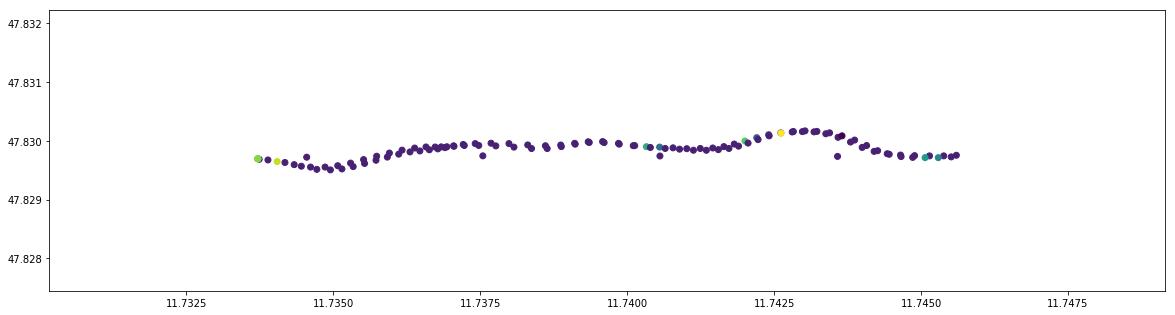

[['score_name', 'score_result'], ['adjusted_rand_score', -0.03132729769608319], ['adjusted_mutual_info_score', 0.01122676710475286], ['homogeneity_score', 0.10968931814316642], ['completeness_score', 0.10359813522836199], ['v_measure_score', 0.10655674897395999], ['fowlkes_mallows_score', 0.7128375885131145], ['silhouette_score', 0.003640897111228702], ['davies_bouldin_score', 0.8898608523384811], ['calinski_harabasz_score', 1.5396203135017559]]

---- Classical_features ----
Classical_features
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([ 4,  4, 16, 14,  8,  5,  4, 11, 12, 24, 14,  2]))


<Figure size 1200x400 with 0 Axes>

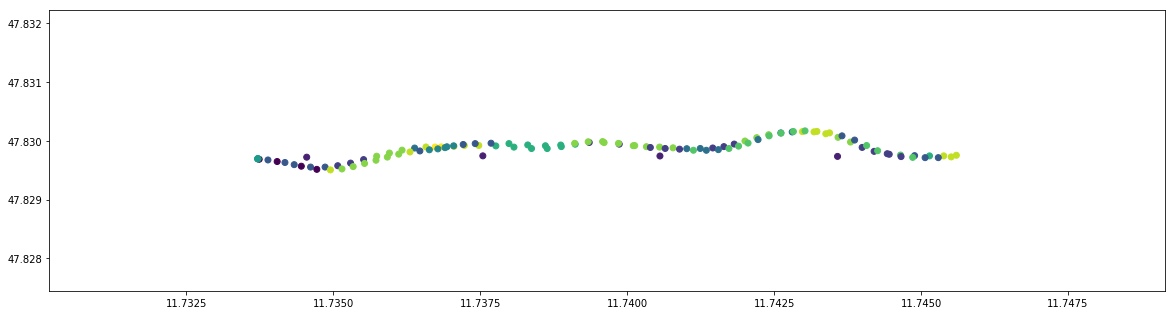

[['score_name', 'score_result'], ['adjusted_rand_score', 0.02569731004312617], ['adjusted_mutual_info_score', 0.08138898134252083], ['homogeneity_score', 0.3448801405573626], ['completeness_score', 0.08989332443146252], ['v_measure_score', 0.14261414212980195], ['fowlkes_mallows_score', 0.30098913714406755], ['silhouette_score', 0.2877143263154438], ['davies_bouldin_score', 1.0098062884282897], ['calinski_harabasz_score', 156.93034334194894]]


In [81]:
from keras.initializers import VarianceScaling
from keras.optimizers import SGD


mtb_classifier.train_and_compare_unsupervised_clusterings(
    mtb_data_provider, 
    nums_clusters=nums_clusters, 
    force_overwrite=True, 
    prefix=prefix, 
    run_dec=True,
    run_fidec=True,
    run_dcec=True,
    run_fidcec=True,
    run_drec=False,
    run_fidrec=False,
    run_classical_raw=True,
    run_classical_features=True,
    dec_dims=[500, 500, 2000, 7],
#    update_interval = 140,
#    pretrain_epochs = 300,
#    init=VarianceScaling(scale=1. / 3., mode='fan_in', distribution='uniform'),
#    pretrain_optimizer=SGD(lr=1, momentum=0.9),
#    maxiter=1,
    window_lengths=window_lengths, 
    sub_sample_lengths=sub_sample_lengths)

### Evaluation

In [82]:
scores = dict()
for num_clusters in nums_clusters:
    for window_length in window_lengths:
        for sub_sample_length in sub_sample_lengths:
            if sub_sample_length >= window_length:
                continue
                
            print("----------------------------------------------------------------")
            print("window_length:", window_length)
            print("sub_sample_length:", sub_sample_length)
            print("clusters:", num_clusters)
            
            # TODO: Write all cluster variations in one table?
            
            experiment_prefix = "%s_%s_%s_%s" % (prefix, str(window_length), str(sub_sample_length), str(num_clusters))
            
            results_complete = None
            eval_prefixes = ['dec', 'fidec', 'dcec', 'fidcec', 'classical_raw', 'classical_features']
            for eval_prefix in eval_prefixes:
                filename_scores = "evaluation/%s_%s_score.csv" % (experiment_prefix, eval_prefix)
                results = pd.read_csv(filename_scores).values.T
                results_complete = results if results_complete is None else np.vstack((results_complete, results[-1]))
            results_complete = results_complete.T
            header = np.hstack(([''], eval_prefixes))
            results_complete = np.insert(results_complete, 0, header, axis=0)
            #print(results_complete)
            #results_complete = np.vstack((np.hstack(([''], eval_prefixes)), ))
            
            print(pd.DataFrame(results_complete.T), "\n\n")
            
            # --------------------- PLOTS ---------------------
            
            if False:
            
                data_prefix = "%s_%s_%s" % (prefix, str(window_length), str(sub_sample_length))
                filename_features = "data/%s_features.npy" % data_prefix
                feature_file = np.load(filename_features)
                filename_raw = "data/%s_raw.npy" % data_prefix
                raw_file = np.load(filename_raw)
                geometry = gpd.points_from_xy(feature_file[:, -1], feature_file[:, -2])

                for eval_prefix in eval_prefixes:
                    filename_y_pred = "evaluation/%s_%s_y_pred.npy" % (experiment_prefix, eval_prefix)
                    y_pred = np.load(filename_y_pred)
                    gdf = GeoDataFrame(geometry=geometry)
                    gdf.plot(c=y_pred, figsize=(20, 30))

                plt.show()


----------------------------------------------------------------
window_length: 50
sub_sample_length: 25
clusters: 3
                    0                    1                           2  \
0                      adjusted_rand_score  adjusted_mutual_info_score   
1                 dec            0.0107688                   0.0108228   
2               fidec                    0                 3.67068e-15   
3                dcec            -0.023961                  0.00223245   
4              fidcec          -0.00967065                  0.00976966   
5       classical_raw            0.0068422                   0.0123221   
6  classical_features             0.061446                   0.0295704   

                   3                   4                5  \
0  homogeneity_score  completeness_score  v_measure_score   
1          0.0149233           0.0123888        0.0135384   
2        1.01311e-15                   1      2.02622e-15   
3         0.00500936           0.0066796      

                    0                    1                           2  \
0                      adjusted_rand_score  adjusted_mutual_info_score   
1                 dec           0.00752905                     0.02044   
2               fidec          -0.00865617                 0.000880407   
3                dcec            -0.029091                   0.0301312   
4              fidcec             0.140656                     0.11059   
5       classical_raw            0.0629207                   0.0136896   
6  classical_features             0.141677                    0.107093   

                   3                   4                5  \
0  homogeneity_score  completeness_score  v_measure_score   
1           0.040487           0.0283298        0.0333345   
2          0.0119278           0.0115999        0.0117616   
3          0.0409523           0.0548667        0.0468992   
4           0.124527            0.125958         0.125239   
5          0.0289678           0.0375619 

                    0                    1                           2  \
0                      adjusted_rand_score  adjusted_mutual_info_score   
1                 dec            0.0233476                   0.0183494   
2               fidec            0.0136938                  -0.0106463   
3                dcec           -0.0348485                -0.000813555   
4              fidcec             0.199369                   0.0939912   
5       classical_raw           -0.0234422                   0.0274668   
6  classical_features            0.0877519                     0.11046   

                   3                   4                5  \
0  homogeneity_score  completeness_score  v_measure_score   
1           0.102676           0.0411993        0.0588034   
2          0.0520371           0.0255399        0.0342633   
3          0.0758841           0.0287463         0.041697   
4           0.171708            0.106513         0.131472   
5          0.0679482            0.118318 

                    0                    1                           2  \
0                      adjusted_rand_score  adjusted_mutual_info_score   
1                 dec           0.00947093                   0.0479881   
2               fidec            0.0247397                   0.0399168   
3                dcec             0.020878                   0.0346003   
4              fidcec            0.0363629                   0.0763482   
5       classical_raw           0.00766315                   0.0350986   
6  classical_features            0.0381533                    0.071194   

                   3                   4                5  \
0  homogeneity_score  completeness_score  v_measure_score   
1           0.148953           0.0540102        0.0792753   
2            0.07105           0.0546406        0.0617741   
3           0.126342            0.044808         0.066154   
4           0.194475           0.0740552         0.107265   
5          0.0863518           0.0712938 

##  Exploration

### Plots

In [ ]:
for i in range(len(columns)):
    figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
    for data_set in [data_s1_1, data_s1_2, data_s2_1]:
        plt.plot(data_set.T[i])
        #Helpers.print_mean_median_max_min(data_set[i], columns[i])
    #plt.legend(['Trail 1', 'Trail 2'])
    plt.ylabel(columns[i])    

## Auto Tagging and Classification

In [ ]:
col_neureuth = ['SensorAccelerationX_HD', 'SensorAccelerationY_HD', 'SensorAccelerationZ_HD','altitude', 'speed', 'heart_rate', 'SensorHeading', LATITUDE_KEY, LONGITUDE_KEY]
data_neureuth = mtb_data_provider.prepare_raw_data(['neureuth'], col_neureuth, SPEED_THRESHOLD)[0, 0]

In [ ]:
latitudes = data_neureuth[1:, -2]
longitudes = data_neureuth[1:, -1]
top_left, bottom_right = mtb_data_tagger.get_bounding_box_for_recording(latitudes, longitudes, mtb_data_provider, padding=0.0)
response_openstreetmap = mtb_data_tagger.fetch_area_from_openstreetmap(top_left, bottom_right)
response_trailforks = mtb_data_tagger.fetch_area_from_trailforks(top_left, bottom_right)

In [ ]:
openstreetmap_meta = mtb_data_tagger.create_openstreetmap_meta(top_left, bottom_right, response_openstreetmap)
trailforks_meta = mtb_data_tagger.create_trailforks_meta(top_left, bottom_right, response_trailforks)
closest_items = mtb_data_tagger.find_meta_data_for_recording(latitudes, longitudes, openstreetmap_meta, trailforks_meta, mtb_data_provider, distance_threshold=10, fill_empties=5)

In [ ]:
# Plot with data from trailforks and OSM
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

trailforks_difficulties = [0]
osm_difficulties = [0]
physical_ratings = [0]

for closest_item in closest_items:
    difficulty = closest_item['difficulty'] if 'difficulty' in closest_item else 0
    mtb_scale = closest_item['mtb:scale'] if 'mtb:scale' in closest_item else 0
    physical_rating = closest_item['physical_rating'] if 'physical_rating' in closest_item else 0
    trailforks_difficulties.append(difficulty)
    osm_difficulties.append(mtb_scale)
    physical_ratings.append(physical_rating)
    
trailforks_difficulty_results = np.array(trailforks_difficulties).astype(int) 
osm_difficulty_results = np.array(osm_difficulties).astype(int) 
physical_ratings_results = np.array(physical_ratings).astype(int) 
acc_x = data_neureuth[:, 0]
acc_y = data_neureuth[:, 1]
acc_z = data_neureuth[:, 2]
altitude = data_neureuth[:, 3]
speed = data_neureuth[:, 4]
heart_rate = data_neureuth[:, 5]
heading = data_neureuth[:, 6]

norm_acc_x = acc_x / acc_x.max(axis=0)
norm_acc_y = acc_y / acc_y.max(axis=0)
norm_acc_z = acc_z / acc_z.max(axis=0)
norm_altitude = altitude / altitude.max(axis=0)
norm_dif_trailforks = np.divide(trailforks_difficulty_results, 11)
norm_dif_osm = osm_difficulty_results / osm_difficulty_results.max(axis=0)
norm_physical_ratings = np.divide(physical_ratings_results, 4)
norm_altitude = altitude / altitude.max(axis=0)
norm_speed = speed / speed.max(axis=0)
if len(heart_rate):
    norm_heart_rate = heart_rate / heart_rate.max(axis=0)

plt.plot(trailforks_difficulty_results)
plt.plot(osm_difficulty_results)
plt.plot(norm_physical_ratings)
plt.plot(norm_speed)
plt.plot(norm_altitude)
if len(heart_rate):
    plt.plot(norm_heart_rate)
plt.plot(norm_acc_x)
plt.legend(['Difficulty Trailforks', 'Difficulty OSM', 'Physical Ratings', 'Speed', 'Altitude', 'Heart Rate', 'AccX', 'AccY', 'AccZ'])
plt.ylabel('Trail Plot')


In [ ]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(-latitudes, longitudes, c=osm_difficulty_results[:len(latitudes)])

In [ ]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(-latitudes, longitudes, c=trailforks_difficulty_results[:len(latitudes)])

### Classification

In [ ]:
X_neureuth_tmp = data_neureuth
y_neureuth_tmp = osm_difficulty_results

X_neureuth = []
y_neureuth = []

# Ignore Sections without difficulty rating
for i in range(len(y_neureuth_tmp)):
    if y_neureuth_tmp[i] > 0:
        X_neureuth.append(X_neureuth_tmp[i])
        y_neureuth.append(y_neureuth_tmp[i])
        

X_neureuth = np.asarray(X_neureuth)
y_neureuth = np.asarray(y_neureuth)

In [ ]:
classifiers = [
KNeighborsClassifier(3),
#LinearSVC(C=0.025),
DecisionTreeClassifier(max_depth=5, random_state=42),
RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
#MLPClassifier(alpha=1, max_iter=20000, random_state=42),
#KMeans(n_clusters=2),
]

names = [
    "Nearest Neighbors", 
#    "Linear SVM", 
    "Decision Tree", 
    "Random Forest", 
#    "Neural Net", 
#   "KMeans",
]

mtb_classifier.run_classification(X_neureuth, y_neureuth, classifiers, names, mtb_data_provider, mtb_visualizer, n_splits=30, clear_outliers=False, print_plots=False)

In [ ]:
X_tmp, y_tmp, _ = mtb_data_provider.create_training_data(data_neureuth, None, window_length=550, step_size=.25, clear_outliers=False, calc_features=True)

altitude_change = X_tmp[:, 8] / X_tmp[:, 8].max(axis=0)
speed_change = X_tmp[:, 9] / X_tmp[:, 9].max(axis=0)
speed_mean = X_tmp[:, 10] / X_tmp[:, 10].max(axis=0)
heading_change = X_tmp[:, 11] / X_tmp[:, 11].max(axis=0)

figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(altitude_change)
#plt.plot(speed_change)
#plt.plot(speed_mean)
#plt.plot(heading_change)
#plt.legend(['altitude change', 'speed change', 'speed_mean', 'heading change', 'heading mean'])

In [ ]:
SPEED_THRESHOLD = .3
LATITUDE_KEY = 'position_lat'
LONGITUDE_KEY = 'position_long'
columns = ['SensorAccelerationX_HD', 'SensorAccelerationY_HD', 'SensorAccelerationZ_HD','altitude', 'speed', 'heart_rate', 'SensorHeading', LATITUDE_KEY, LONGITUDE_KEY]

warngau_files=['neureuth', 'warngaus1_1', 'warngaus1_2', 'warngaus1_3', 'warngaus2_1', 'warngaus2_2']
data_neureuth, data_s1_1, data_s1_2, data_s1_3, data_s2_1, data_s2_2, data_all = mtb_data_provider.prepare_raw_data(warngau_files, columns, SPEED_THRESHOLD)[0]

### CNN

In [ ]:
mtb_classifier.run_cnn_model(X_neureuth, y_neureuth, mtb_data_provider, mtb_visualizer, n_conv_blocks=3)

### Outlier Detection

In [ ]:
#X_train = data_s2_1[:, :3]
X_train = data_neureuth[:, 0:2]
#X_train = np.array((accX_HD_2,accY_HD_2,accZ_HD_2)).T

for w_length in [50, 100, 150]:
    
    X_train_sliced, _ = mtb_data_provider.slice_into_windows(X_train, window_length=w_length)
    
    X_train_windowed, _ = mtb_data_provider.slice_into_windows(X_train, window_length=w_length, step_size=.25)
    X_train_windowed = X_train_windowed.mean(axis=1)
    X_train_windowed = mtb_data_provider.calculate_features(X_train_windowed)
    
    X_train_sliced = X_train_sliced.mean(axis=1)
    X_train_sliced = mtb_data_provider.calculate_features(X_train_sliced)
    
    clf = KNN(contamination=.2, n_neighbors=30, method='mean', radius=1.0)
    clf.fit(X_train_windowed)

    # get outlier scores
    y_outlier_pred = clf.predict(X_train_sliced)
    y_extended = []

    for y in y_outlier_pred:
        for i in range(w_length):
            y_extended.append(y)

    pca = PCA(n_components=2)
    X = pca.fit_transform(X_train_sliced)
    plt.figure(0)
    figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(X[:, 0], X[:, 1], c=y_outlier_pred)
    plt.ylabel('Window Size: ' + str(w_length))

    plt.figure(1)
    figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
    X_train_normed = X_train / X_train.max(axis=0)
    plt.plot(X_train_normed)
    plt.plot(y_extended)
    plt.legend(['X', 'Y', 'Z', 'No Outlier'])#, 'Speed'
    plt.ylabel('Window Size: ' + str(w_length))

### Old dataset

In [ ]:
def prepare_old_data(data_file, label_file):
    acc_data = pd.read_csv(data_file)
    label_annot = pd.read_csv(label_file)
    acc_values = []
    label_values = []
    label_position = 0
    time_dif = int(acc_data.iloc[0]['epoch (ms)'])

    label = label_annot.iloc[label_position]
    label_start = label['start']
    label_end = label['end']
    difficulty = label['difficulty']

    for acc_row in acc_data.iterrows():

        acc_row = acc_row[1]
        acc_abs_timestamp = int(acc_row['epoch (ms)'])
        acc_timestamp = (acc_abs_timestamp - time_dif) / 1000

        if acc_timestamp > label_end and label_position < label_annot.shape[0] -1:
            label_position += 1

        label = label_annot.iloc[label_position]
        label_start = label['start']
        label_end = label['end']
        difficulty = label['difficulty']

    #    if acc_timestamp > label_start and acc_timestamp < label_end:

        if difficulty != 3:
            label_values.append(difficulty)
            acc_values.append(acc_row.values)

    #pd.DataFrame(label_values).to_csv("data/neureuth_labels_1.csv")

    X_n = np.array(acc_values)[:, -3:].astype(float)
    y_n = np.array(label_values).astype(int)
    
    return X_n, y_n

In [ ]:
X_n_1, y_n_1 = prepare_old_data('data/neureuth_acc_1.csv', 'data/neureuth_labels.csv')
X_n_2, y_n_2 = prepare_old_data('data/sachrang_acc_1.csv', 'data/sachrang_labels.csv')

X_n = np.concatenate((X_n_1, X_n_2))
y_n = np.concatenate((y_n_1, y_n_2))

In [ ]:
mtb_classifier.run_classification(X_n, y_n, classifiers, names, mtb_data_provider)